In [1]:
import pandas as pd
import numpy as np

In [10]:
!python -m pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 1.7 MB/s eta 0:00:06
     - -------------------------------------- 0.2/9.2 MB 2.1 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/9.2 MB 3.1 MB/s eta 0:00:03
     ---- ----------------------------------- 1.0/9.2 MB 4.6 MB/s eta 0:00:02
     ------- -------------------------------- 1.6/9.2 MB 6.2 MB/s eta 0:00:02
     ----------- ---------------------------- 2.6/9.2 MB 8.3 MB/s eta 0:00:01
     ----------------- ---------------------- 3.9/9.2 MB 10.9 MB/s eta 0:00:01
     ----------------- ---------------------- 3.9/9.2 MB 10.9 MB/s eta 0:00:01
     ---------------------- ----------------- 5.1/9.2 MB 11.2 MB/s eta 0:00:01
     ------------------------- -------------- 5.7/9.2 MB 11.5 MB/s eta 0:00:01
     --------------------------- ------------ 6.3/9.2 MB 11.9 MB/s eta 0:0

In [11]:
demand_history = pd.read_csv("dataset/Biomass_History.csv")
demand_history.head()

Index  Latitude  Longitude       2010       2011       2012       2013   
0      0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070  \
1      1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2      2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3      3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4      4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   

        2014       2015       2016        2017  
0  10.788374   6.647325   7.387925    5.180296  
1  34.419411  27.361908  40.431847   42.126945  
2  70.917908  42.517117  59.181629   73.203232  
3  93.513924  70.203171  74.536720  101.067352  
4  19.534035  19.165791  16.531315   26.086885

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(demand_history.iloc[0][3:])

(-2.893930331604496,
 0.046058383726039966,
 0,
 7,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733},
 23.08783669609404)

In [14]:
years = demand_history.columns[3:]

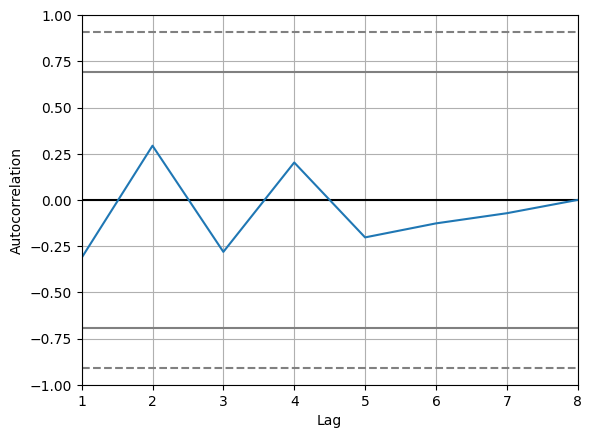

In [15]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(demand_history.iloc[0][3:])
plt.show()

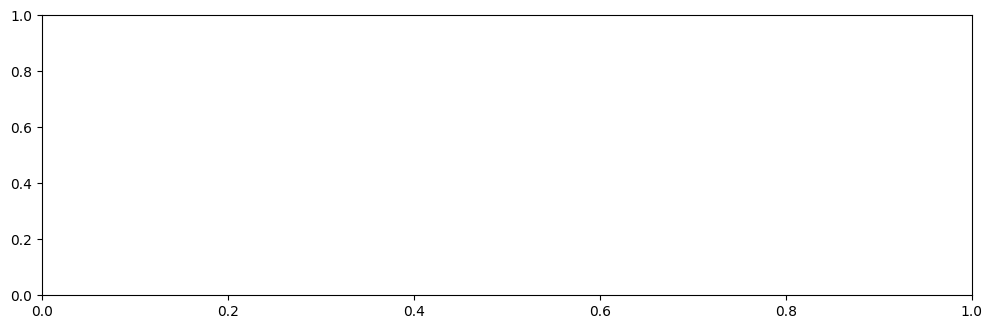

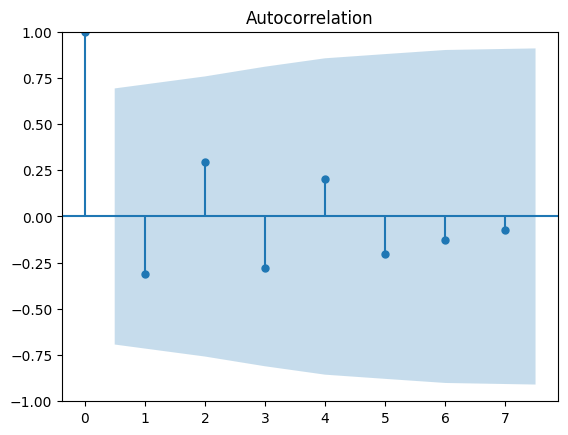

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(demand_history.iloc[0][3:])

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(demand_history.iloc[0][3:],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\olw04\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\olw04\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\olw04\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -14.390
Date:                Wed, 06 Sep 2023   AIC                             34.781
Time:                        20:47:57   BIC                             34.619
Sample:                    01-01-2010   HQIC                            32.775
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6004      0.438     -1.372      0.170      -1.458       0.258
ma.L1         -0.2931      0.552     -0.531      0.596      -1.376       0.790
sigma2         3.1602      2.780      1.137      0.256      -2.288       8.609
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.37   Prob(JB):                         0.77
Heteroskedasticity (H):              21.16   Skew:                             0.25
Prob(H) (two-sided):                  0.09   Kurtosis:                         1.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
model_fit.predict(start=0,end=8)

2010-01-01    0.000000
2011-01-01    8.475700
2012-01-01    8.581491
2013-01-01    8.828210
2014-01-01    8.750972
2015-01-01    7.330132
2016-01-01    9.333860
2017-01-01    7.513678
2018-01-01    7.189812
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(demand_history.iloc[0][3:],model_fit.predict(start=0,end=7))

In [20]:
demand_history[2018] = 0
demand_history[2019] = 0

In [21]:
model_fit.predict(start=7,end=9)

2017-01-01    7.513678
2018-01-01    7.189812
2019-01-01    5.983251
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [26]:
demand_history.loc[2018,0],demand_history.loc[2019,0] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]

In [36]:
demand_history.loc[0,2018] = model_fit.predict(start=9,end=10).iloc[0]

In [37]:
demand_history

Index  Latitude  Longitude       2010       2011       2012       2013  \
0         0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1         1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2         2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3         3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4         4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...     ...       ...        ...        ...        ...        ...        ...   
2413   2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017      2018    2019   0  
0     10.788374   6.647325   7.387925    5.180296  5.983251  6.7077 NaN  
1     34.419411  27.361908  40.431847   42.126945  0.000000  0.0000 NaN  
2     70.917908  42.517117  59.181629   73.203232  0.000000  0.0000 NaN  
3     93.513924  70.203171  74.536720  101.067352  0.000000  0.0000 NaN  
4     19.534035  19.165791  16.531315   26.086885  0.000000  0.0000 NaN  
...         ...        ...        ...         ...       ...     ...  ..  
2413   5.113997   5.301668   6.419223    5.321604  0.000000  0.0000 NaN  
2414   0.121749   0.122467   0.145785    0.120626  0.000000  0.0000 NaN  
2415   0.039241   0.039473   0.046989    0.038879  0.000000  0.0000 NaN  
2416   1.316443   1.324201   1.576338    1.304297  0.000000  0.0000 NaN  
2417   0.229067   0.230417   0.274289    0.226953  0.000000  0.0000 NaN  

[2418 rows x 14 columns]

In [38]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
demand_history.loc[0,2018],demand_history.loc[0,2018] = model_fit.predict(start=7,end=8).iloc[0],model_fit.predict(start=8,end=9).iloc[1]

In [39]:
model_fit.predict(start=7,end=8).iloc[0],model_fit.predict(start=8,end=9).iloc[1]

(7.51367752099229, 5.9832506877330065)

In [40]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
for i in range(len(demand_history)):
    model=ARIMA(demand_history.iloc[i][3:],order=(1,1,1))
    model_fit=model.fit()
    demand_history.loc[i,2018],demand_history.loc[i,2019] = model_fit.predict(start=7,end=8).iloc[0],model_fit.predict(start=8,end=9).iloc[1]

c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and 

In [41]:
demand_history

Index  Latitude  Longitude       2010       2011       2012       2013  \
0         0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1         1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2         2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3         3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4         4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...     ...       ...        ...        ...        ...        ...        ...   
2413   2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017       2018       2019   0  
0     10.788374   6.647325   7.387925    5.180296   7.483670   5.837380 NaN  
1     34.419411  27.361908  40.431847   42.126945  47.519392  -5.522590 NaN  
2     70.917908  42.517117  59.181629   73.203232  57.071377  23.667258 NaN  
3     93.513924  70.203171  74.536720  101.067352  74.989417  31.017123 NaN  
4     19.534035  19.165791  16.531315   26.086885  17.522164   8.424259 NaN  
...         ...        ...        ...         ...        ...        ...  ..  
2413   5.113997   5.301668   6.419223    5.321604   7.138430  -0.167584 NaN  
2414   0.121749   0.122467   0.145785    0.120626   0.150970  -0.028169 NaN  
2415   0.039241   0.039473   0.046989    0.038879   0.048699  -0.009184 NaN  
2416   1.316443   1.324201   1.576338    1.304297   1.700111  -0.599753 NaN  
2417   0.229067   0.230417   0.274289    0.226953   0.299213  -0.138833 NaN  

[2418 rows x 14 columns]

In [40]:
! python -m pip install prophet


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
!pip install prophet --no-binary :all:


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
demand_history.to_csv('forecast_arima_2018-19.csv',index=False)

In [57]:
demand_history = pd.read_csv('forecast_arima_2018-19.csv')

In [58]:
demand_history

Index  Latitude  Longitude       2010       2011       2012       2013   
0         0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070  \
1         1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2         2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3         3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4         4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...     ...       ...        ...        ...        ...        ...        ...   
2413   2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017       2018       2019   0  
0     10.788374   6.647325   7.387925    5.180296   7.483670   5.837380 NaN  
1     34.419411  27.361908  40.431847   42.126945  47.519392  -5.522590 NaN  
2     70.917908  42.517117  59.181629   73.203232  57.071377  23.667258 NaN  
3     93.513924  70.203171  74.536720  101.067352  74.989417  31.017123 NaN  
4     19.534035  19.165791  16.531315   26.086885  17.522164   8.424259 NaN  
...         ...        ...        ...         ...        ...        ...  ..  
2413   5.113997   5.301668   6.419223    5.321604   7.138430  -0.167584 NaN  
2414   0.121749   0.122467   0.145785    0.120626   0.150970  -0.028169 NaN  
2415   0.039241   0.039473   0.046989    0.038879   0.048699  -0.009184 NaN  
2416   1.316443   1.324201   1.576338    1.304297   1.700111  -0.599753 NaN  
2417   0.229067   0.230417   0.274289    0.226953   0.299213  -0.138833 NaN  

[2418 rows x 14 columns]

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# !pip install seaborn

2018_fb


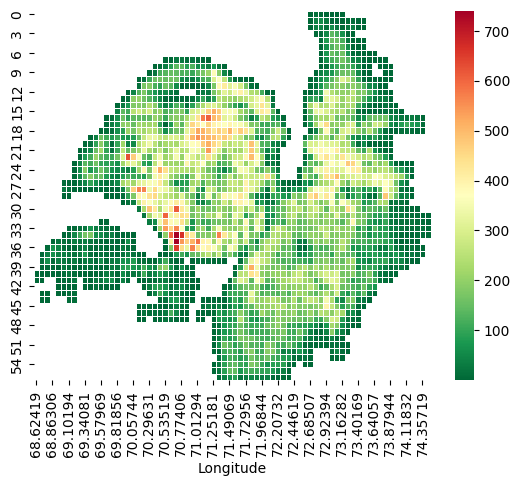

2019_fb


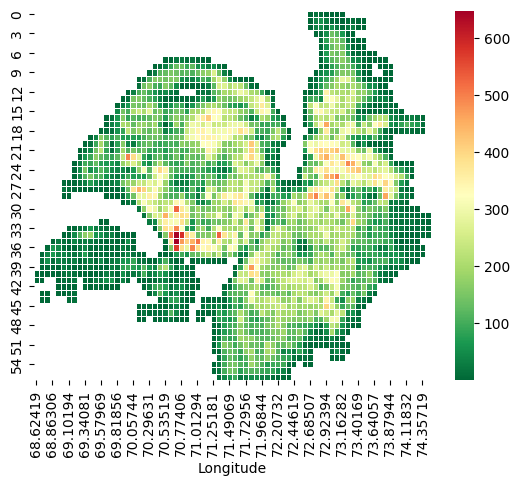

In [37]:
years = ['2018_fb','2019_fb']
for year in years:
    print(year)
    temp  = forecast[['Latitude','Longitude',year]].pivot(index='Latitude', columns='Longitude', values=year).reset_index()
    del temp['Latitude']
    sns.heatmap(temp, cmap='RdYlGn_r', linewidths=0.5)
    plt.show()

In [62]:
demand_history.iloc[10][3:11]

2010     8.916524
2011    16.679886
2012    21.618805
2013    13.550439
2014    15.403367
2015     7.133225
2016     7.732000
2017     9.861409
Name: 10, dtype: float64

In [31]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import time 
def fb_forecast(data):
# Initialize and fit the Prophet model
    s= time.time()
    model = Prophet()
    model.fit(data)
#     print(data)
    # Create a dataframe for future dates (next two years)
    future = model.make_future_dataframe(periods=1,freq='A')  # 365 days/year * 2 years

    # Make predictions for the future dates
    forecast = model.predict(future)
    print(time.time()-s)
#     print(forecast['yhat'][7])
    return forecast['yhat'][7]
    # Plot the forecast
#     fig = model.plot(forecast)
#     plt.title(f'Biomass Production Forecast for Latitude {latitude}, Longitude {longitude}')
#     plt.xlabel('Date')
#     plt.ylabel('Biomass Production')
#     plt.show()

    # Access the forecasted values for the next two years
#     forecast_next_two_years = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(730)  # Last 730 rows are the forecast

    # Save the forecast to a CSV file
#     forecast_next_two_years.to_csv('biomass_forecast.csv', index=False)


In [199]:
data = demand_history.copy()

In [200]:
# del data['Index']

In [201]:
latitude = 24.66818
longitude =	71.33144

In [202]:
data = data[(data['Latitude'] == latitude) & (data['Longitude'] == longitude)].T 

In [203]:
data['ds'] = data.index

In [204]:
data = data.rename(columns={0:'y'})

In [205]:
model = Prophet()
model.fit(data[2:11])

# Create a dataframe for future dates (next two years)
future = model.make_future_dataframe(periods=2,freq='A')

12:39:00 - cmdstanpy - INFO - Chain [1] start processing
12:39:00 - cmdstanpy - INFO - Chain [1] done processing


In [206]:
forecast = model.predict(future)
forecast['yhat']

0     8.644152
1     8.899966
2     9.081739
3     7.254654
4     7.583887
5     7.839701
6     8.021473
7     6.194388
8     6.523622
9     8.118209
10    8.000118
Name: yhat, dtype: float64

In [207]:
fb_forecast(data[2:11])

12:39:02 - cmdstanpy - INFO - Chain [1] start processing
12:39:02 - cmdstanpy - INFO - Chain [1] done processing


(8.118208723195954, 8.000118175668364)

In [ ]:
forecast_2018 = []
forecast_2019 = []

for i, row in demand_history.iterrows():
    lat, long = row['Latitude'], row['Longitude']
    temp = pd.DataFrame(row[2:11])
    temp['ds'] = pd.to_datetime(temp.index)
    temp = temp.rename(columns={i: 'y'})
    
    forecast_2018_i, forecast_2019_i = fb_forecast(temp)
    
    forecast_2018.append(forecast_2018_i)
    forecast_2019.append(forecast_2019_i)

data['2018'] = forecast_2018
data['2019'] = forecast_2019


0.27695751190185547
0.30521178245544434
0.2851574420928955
0.2803177833557129
0.2734198570251465
0.28406763076782227
0.2660331726074219
0.28098344802856445
0.2647278308868408
0.2850613594055176
0.2963869571685791
0.32858991622924805
0.2848491668701172
0.28200507164001465
0.26607584953308105
0.26628994941711426
0.29666924476623535
0.2675604820251465
0.274975061416626
0.28701114654541016
0.28287410736083984
0.2593557834625244
0.2868766784667969
0.2576019763946533
0.2668929100036621
0.27793431282043457


In [216]:
data[:1].apply(lambda row: fb_forecast(temp), axis=1, result_type='expand')


0.31029272079467773


0         1
Latitude  8.118209  8.000118

In [215]:
data

typing.Literal[<no_default>]          y         ds        2018        2019   
Latitude                      24.668180   Latitude         NaN         NaN  \
Longitude                     71.331440  Longitude         NaN         NaN   
2010                           8.475744       2010         NaN         NaN   
2011                           8.868568       2011         NaN         NaN   
2012                           9.202181       2012         NaN         NaN   
...                                 ...        ...         ...         ...   
1626                                NaN        NaN   13.000722   -6.525553   
1627                                NaN        NaN  -29.928129  -70.529795   
1628                                NaN        NaN  -88.273820 -156.014868   
1629                                NaN        NaN -242.557042 -393.524189   
1630                                NaN        NaN -108.995643 -201.141617   

typing.Literal[<no_default>]      2018      2019  
Latitude                      8.118209  8.000118  
Longitude                     8.118209  8.000118  
2010                          8.118209  8.000118  
2011                          8.118209  8.000118  
2012                          8.118209  8.000118  
...                                ...       ...  
1626                               NaN       NaN  
1627                               NaN       NaN  
1628                               NaN       NaN  
1629                               NaN       NaN  
1630                               NaN       NaN  

[1644 rows x 6 columns]

In [22]:
forecast = pd.read_csv("forecast_fb_2018-19.csv")

In [23]:
forecast

Latitude  Longitude       2010       2011       2012       2013   
0     24.66818   71.33144   8.475744   8.868568   9.202181   6.023070  \
1     24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2     24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3     24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4     24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...        ...        ...        ...        ...        ...        ...   
2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017       2018       2019   0   
0     10.788374   6.647325   7.387925    5.180296   7.483670   5.837380 NaN  \
1     34.419411  27.361908  40.431847   42.126945  47.519392  -5.522590 NaN   
2     70.917908  42.517117  59.181629   73.203232  57.071377  23.667258 NaN   
3     93.513924  70.203171  74.536720  101.067352  74.989417  31.017123 NaN   
4     19.534035  19.165791  16.531315   26.086885  17.522164   8.424259 NaN   
...         ...        ...        ...         ...        ...        ...  ..   
2413   5.113997   5.301668   6.419223    5.321604   7.138430  -0.167584 NaN   
2414   0.121749   0.122467   0.145785    0.120626   0.150970  -0.028169 NaN   
2415   0.039241   0.039473   0.046989    0.038879   0.048699  -0.009184 NaN   
2416   1.316443   1.324201   1.576338    1.304297   1.700111  -0.599753 NaN   
2417   0.229067   0.230417   0.274289    0.226953   0.299213  -0.138833 NaN   

        2018_fb    2019_fb  Index  
0      5.924414   6.091918      0  
1     41.303931  44.512163      1  
2     65.808111  65.843568      2  
3     92.240744  94.265768      3  
4     22.655331  22.857172      4  
...         ...        ...    ...  
2413   5.624157   6.268325   2413  
2414   0.130214   0.135290   2414  
2415   0.041970   0.043606   2415  
2416   1.103394   0.911135   2416  
2417   0.160470   0.101025   2417  

[2418 rows x 16 columns]

In [32]:
forecast_2017 = []
# forecast_2019 = []

for i, row in demand_history.iterrows():
    lat, long = row['Latitude'], row['Longitude']
    temp = pd.DataFrame(row[3:10])
    print(i)
    temp['ds'] = pd.to_datetime(temp.index)
    temp = temp.rename(columns={i: 'y'})
    
    forecast_2017_i = fb_forecast(temp)
    
    forecast_2017.append(forecast_2017_i)
#     forecast_2019.append(forecast_2019_i)

data['2017_fb'] = forecast_2017


20:53:36 - cmdstanpy - INFO - Chain [1] start processing


0


20:53:36 - cmdstanpy - INFO - Chain [1] done processing
20:53:36 - cmdstanpy - INFO - Chain [1] start processing


0.2535252571105957
1


20:53:36 - cmdstanpy - INFO - Chain [1] done processing
20:53:36 - cmdstanpy - INFO - Chain [1] start processing


0.23210406303405762
2


20:53:36 - cmdstanpy - INFO - Chain [1] done processing
20:53:36 - cmdstanpy - INFO - Chain [1] start processing


0.24295258522033691
3


20:53:37 - cmdstanpy - INFO - Chain [1] done processing
20:53:37 - cmdstanpy - INFO - Chain [1] start processing


0.2418968677520752
4


20:53:37 - cmdstanpy - INFO - Chain [1] done processing
20:53:37 - cmdstanpy - INFO - Chain [1] start processing


0.24151921272277832
5


20:53:37 - cmdstanpy - INFO - Chain [1] done processing
20:53:37 - cmdstanpy - INFO - Chain [1] start processing


0.22330069541931152
6


20:53:37 - cmdstanpy - INFO - Chain [1] done processing
20:53:37 - cmdstanpy - INFO - Chain [1] start processing


0.237321138381958
7


20:53:38 - cmdstanpy - INFO - Chain [1] done processing
20:53:38 - cmdstanpy - INFO - Chain [1] start processing
20:53:38 - cmdstanpy - INFO - Chain [1] done processing


0.25079345703125
8


20:53:38 - cmdstanpy - INFO - Chain [1] start processing


0.24088120460510254
9


20:53:38 - cmdstanpy - INFO - Chain [1] done processing
20:53:39 - cmdstanpy - INFO - Chain [1] start processing


0.6915040016174316
10


20:53:39 - cmdstanpy - INFO - Chain [1] done processing
20:53:39 - cmdstanpy - INFO - Chain [1] start processing


0.24488091468811035
11


20:53:39 - cmdstanpy - INFO - Chain [1] done processing
20:53:39 - cmdstanpy - INFO - Chain [1] start processing


0.27947092056274414
12


20:53:39 - cmdstanpy - INFO - Chain [1] done processing
20:53:39 - cmdstanpy - INFO - Chain [1] start processing


0.2295083999633789
13


20:53:39 - cmdstanpy - INFO - Chain [1] done processing
20:53:40 - cmdstanpy - INFO - Chain [1] start processing


0.25357842445373535
14


20:53:40 - cmdstanpy - INFO - Chain [1] done processing
20:53:40 - cmdstanpy - INFO - Chain [1] start processing


0.23238348960876465
15


20:53:40 - cmdstanpy - INFO - Chain [1] done processing
20:53:40 - cmdstanpy - INFO - Chain [1] start processing
20:53:40 - cmdstanpy - INFO - Chain [1] done processing


0.242326021194458
16


20:53:40 - cmdstanpy - INFO - Chain [1] start processing


0.2217392921447754
17


20:53:40 - cmdstanpy - INFO - Chain [1] done processing
20:53:41 - cmdstanpy - INFO - Chain [1] start processing


0.2703566551208496
18


20:53:41 - cmdstanpy - INFO - Chain [1] done processing
20:53:41 - cmdstanpy - INFO - Chain [1] start processing
20:53:41 - cmdstanpy - INFO - Chain [1] done processing


0.26633310317993164
19


20:53:41 - cmdstanpy - INFO - Chain [1] start processing


0.25172924995422363
20


20:53:41 - cmdstanpy - INFO - Chain [1] done processing
20:53:41 - cmdstanpy - INFO - Chain [1] start processing


0.23382806777954102
21


20:53:41 - cmdstanpy - INFO - Chain [1] done processing
20:53:42 - cmdstanpy - INFO - Chain [1] start processing
20:53:42 - cmdstanpy - INFO - Chain [1] done processing


0.22972345352172852
22
0.20594072341918945
23


20:53:42 - cmdstanpy - INFO - Chain [1] start processing
20:53:42 - cmdstanpy - INFO - Chain [1] done processing
20:53:42 - cmdstanpy - INFO - Chain [1] start processing
20:53:42 - cmdstanpy - INFO - Chain [1] done processing


0.237443208694458
24


20:53:42 - cmdstanpy - INFO - Chain [1] start processing


0.2499682903289795
25


20:53:42 - cmdstanpy - INFO - Chain [1] done processing
20:53:43 - cmdstanpy - INFO - Chain [1] start processing


0.24950051307678223
26


20:53:43 - cmdstanpy - INFO - Chain [1] done processing
20:53:43 - cmdstanpy - INFO - Chain [1] start processing


0.2749605178833008
27


20:53:43 - cmdstanpy - INFO - Chain [1] done processing
20:53:43 - cmdstanpy - INFO - Chain [1] start processing


0.223222017288208
28


20:53:43 - cmdstanpy - INFO - Chain [1] done processing
20:53:43 - cmdstanpy - INFO - Chain [1] start processing


0.2519383430480957
29


20:53:43 - cmdstanpy - INFO - Chain [1] done processing
20:53:44 - cmdstanpy - INFO - Chain [1] start processing
20:53:44 - cmdstanpy - INFO - Chain [1] done processing


0.25367069244384766
30
0.22086858749389648
31


20:53:44 - cmdstanpy - INFO - Chain [1] start processing
20:53:44 - cmdstanpy - INFO - Chain [1] done processing
20:53:44 - cmdstanpy - INFO - Chain [1] start processing


0.24236202239990234
32


20:53:44 - cmdstanpy - INFO - Chain [1] done processing
20:53:44 - cmdstanpy - INFO - Chain [1] start processing


0.2270200252532959
33


20:53:44 - cmdstanpy - INFO - Chain [1] done processing
20:53:44 - cmdstanpy - INFO - Chain [1] start processing


0.2410883903503418
34


20:53:45 - cmdstanpy - INFO - Chain [1] done processing
20:53:45 - cmdstanpy - INFO - Chain [1] start processing


0.22385334968566895
35


20:53:45 - cmdstanpy - INFO - Chain [1] done processing
20:53:45 - cmdstanpy - INFO - Chain [1] start processing


0.2651047706604004
36


20:53:45 - cmdstanpy - INFO - Chain [1] done processing
20:53:45 - cmdstanpy - INFO - Chain [1] start processing
20:53:45 - cmdstanpy - INFO - Chain [1] done processing


0.25168776512145996
37


20:53:45 - cmdstanpy - INFO - Chain [1] start processing


0.2118070125579834
38


20:53:46 - cmdstanpy - INFO - Chain [1] done processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] done processing


0.23224163055419922
39


20:53:46 - cmdstanpy - INFO - Chain [1] start processing


0.23676586151123047
40


20:53:46 - cmdstanpy - INFO - Chain [1] done processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] done processing


0.2421720027923584
41


20:53:46 - cmdstanpy - INFO - Chain [1] start processing


0.20593571662902832
42


20:53:46 - cmdstanpy - INFO - Chain [1] done processing
20:53:47 - cmdstanpy - INFO - Chain [1] start processing
20:53:47 - cmdstanpy - INFO - Chain [1] done processing


0.24555015563964844
43
0.22043347358703613
44


20:53:47 - cmdstanpy - INFO - Chain [1] start processing
20:53:47 - cmdstanpy - INFO - Chain [1] done processing
20:53:47 - cmdstanpy - INFO - Chain [1] start processing


0.24320650100708008
45


20:53:47 - cmdstanpy - INFO - Chain [1] done processing
20:53:47 - cmdstanpy - INFO - Chain [1] start processing


0.2680208683013916
46


20:53:47 - cmdstanpy - INFO - Chain [1] done processing
20:53:48 - cmdstanpy - INFO - Chain [1] start processing


0.313948392868042
47


20:53:48 - cmdstanpy - INFO - Chain [1] done processing
20:53:48 - cmdstanpy - INFO - Chain [1] start processing


0.27674102783203125
48


20:53:48 - cmdstanpy - INFO - Chain [1] done processing
20:53:48 - cmdstanpy - INFO - Chain [1] start processing


0.20417022705078125
49


20:53:48 - cmdstanpy - INFO - Chain [1] done processing
20:53:48 - cmdstanpy - INFO - Chain [1] start processing
20:53:48 - cmdstanpy - INFO - Chain [1] done processing


0.2166459560394287
50


20:53:49 - cmdstanpy - INFO - Chain [1] start processing


0.22309494018554688
51


20:53:49 - cmdstanpy - INFO - Chain [1] done processing
20:53:49 - cmdstanpy - INFO - Chain [1] start processing
20:53:49 - cmdstanpy - INFO - Chain [1] done processing


0.6750035285949707
52


20:53:50 - cmdstanpy - INFO - Chain [1] start processing


0.23603200912475586
53


20:53:50 - cmdstanpy - INFO - Chain [1] done processing
20:53:50 - cmdstanpy - INFO - Chain [1] start processing


0.22922039031982422
54


20:53:50 - cmdstanpy - INFO - Chain [1] done processing
20:53:50 - cmdstanpy - INFO - Chain [1] start processing


0.23198437690734863
55


20:53:50 - cmdstanpy - INFO - Chain [1] done processing
20:53:50 - cmdstanpy - INFO - Chain [1] start processing


0.300229549407959
56


20:53:50 - cmdstanpy - INFO - Chain [1] done processing
20:53:51 - cmdstanpy - INFO - Chain [1] start processing


0.28203606605529785
57


20:53:51 - cmdstanpy - INFO - Chain [1] done processing
20:53:51 - cmdstanpy - INFO - Chain [1] start processing
20:53:51 - cmdstanpy - INFO - Chain [1] done processing


0.6162784099578857
58


20:53:51 - cmdstanpy - INFO - Chain [1] start processing


0.22805118560791016
59


20:53:51 - cmdstanpy - INFO - Chain [1] done processing
20:53:52 - cmdstanpy - INFO - Chain [1] start processing


0.23528671264648438
60


20:53:52 - cmdstanpy - INFO - Chain [1] done processing
20:53:52 - cmdstanpy - INFO - Chain [1] start processing


0.2723219394683838
61


20:53:52 - cmdstanpy - INFO - Chain [1] done processing
20:53:52 - cmdstanpy - INFO - Chain [1] start processing
20:53:52 - cmdstanpy - INFO - Chain [1] done processing


0.25199031829833984
62
0.21857547760009766
63


20:53:52 - cmdstanpy - INFO - Chain [1] start processing
20:53:53 - cmdstanpy - INFO - Chain [1] done processing
20:53:53 - cmdstanpy - INFO - Chain [1] start processing


0.2531149387359619
64


20:53:53 - cmdstanpy - INFO - Chain [1] done processing
20:53:53 - cmdstanpy - INFO - Chain [1] start processing
20:53:53 - cmdstanpy - INFO - Chain [1] done processing


0.24858427047729492
65


20:53:53 - cmdstanpy - INFO - Chain [1] start processing


0.24950265884399414
66


20:53:53 - cmdstanpy - INFO - Chain [1] done processing
20:53:53 - cmdstanpy - INFO - Chain [1] start processing


0.2491157054901123
67


20:53:54 - cmdstanpy - INFO - Chain [1] done processing
20:53:54 - cmdstanpy - INFO - Chain [1] start processing


0.25008177757263184
68


20:53:54 - cmdstanpy - INFO - Chain [1] done processing
20:53:54 - cmdstanpy - INFO - Chain [1] start processing


0.7068588733673096
69


20:53:54 - cmdstanpy - INFO - Chain [1] done processing
20:53:55 - cmdstanpy - INFO - Chain [1] start processing


0.26177215576171875
70


20:53:55 - cmdstanpy - INFO - Chain [1] done processing
20:53:55 - cmdstanpy - INFO - Chain [1] start processing


0.24549388885498047
71


20:53:55 - cmdstanpy - INFO - Chain [1] done processing
20:53:55 - cmdstanpy - INFO - Chain [1] start processing
20:53:55 - cmdstanpy - INFO - Chain [1] done processing


0.2756035327911377
72


20:53:55 - cmdstanpy - INFO - Chain [1] start processing


0.28800153732299805
73


20:53:56 - cmdstanpy - INFO - Chain [1] done processing
20:53:56 - cmdstanpy - INFO - Chain [1] start processing


0.33692026138305664
74


20:53:56 - cmdstanpy - INFO - Chain [1] done processing
20:53:56 - cmdstanpy - INFO - Chain [1] start processing


0.3417980670928955
75


20:53:56 - cmdstanpy - INFO - Chain [1] done processing
20:53:57 - cmdstanpy - INFO - Chain [1] start processing


0.4172649383544922
76


20:53:57 - cmdstanpy - INFO - Chain [1] done processing


0.41045355796813965
77


20:53:57 - cmdstanpy - INFO - Chain [1] start processing
20:53:57 - cmdstanpy - INFO - Chain [1] done processing


0.417102575302124
78


20:53:58 - cmdstanpy - INFO - Chain [1] start processing
20:53:58 - cmdstanpy - INFO - Chain [1] done processing
20:53:58 - cmdstanpy - INFO - Chain [1] start processing


0.41446590423583984
79


20:53:58 - cmdstanpy - INFO - Chain [1] done processing
20:53:58 - cmdstanpy - INFO - Chain [1] start processing


0.38394832611083984
80


20:53:58 - cmdstanpy - INFO - Chain [1] done processing
20:53:59 - cmdstanpy - INFO - Chain [1] start processing


0.4336264133453369
81


20:53:59 - cmdstanpy - INFO - Chain [1] done processing
20:53:59 - cmdstanpy - INFO - Chain [1] start processing


0.3592798709869385
82


20:53:59 - cmdstanpy - INFO - Chain [1] done processing
20:54:00 - cmdstanpy - INFO - Chain [1] start processing


0.38495492935180664
83


20:54:00 - cmdstanpy - INFO - Chain [1] done processing
20:54:00 - cmdstanpy - INFO - Chain [1] start processing


0.3678295612335205
84


20:54:00 - cmdstanpy - INFO - Chain [1] done processing
20:54:00 - cmdstanpy - INFO - Chain [1] start processing


0.3330826759338379
85


20:54:00 - cmdstanpy - INFO - Chain [1] done processing
20:54:01 - cmdstanpy - INFO - Chain [1] start processing


0.37940216064453125
86


20:54:01 - cmdstanpy - INFO - Chain [1] done processing
20:54:01 - cmdstanpy - INFO - Chain [1] start processing


0.36591148376464844
87


20:54:01 - cmdstanpy - INFO - Chain [1] done processing
20:54:01 - cmdstanpy - INFO - Chain [1] start processing


0.33452463150024414
88


20:54:01 - cmdstanpy - INFO - Chain [1] done processing
20:54:02 - cmdstanpy - INFO - Chain [1] start processing


0.33170080184936523
89


20:54:02 - cmdstanpy - INFO - Chain [1] done processing
20:54:02 - cmdstanpy - INFO - Chain [1] start processing


0.3349592685699463
90


20:54:02 - cmdstanpy - INFO - Chain [1] done processing
20:54:02 - cmdstanpy - INFO - Chain [1] start processing


0.36714720726013184
91


20:54:02 - cmdstanpy - INFO - Chain [1] done processing
20:54:03 - cmdstanpy - INFO - Chain [1] start processing


0.33144402503967285
92


20:54:03 - cmdstanpy - INFO - Chain [1] done processing
20:54:03 - cmdstanpy - INFO - Chain [1] start processing


0.3133702278137207
93


20:54:03 - cmdstanpy - INFO - Chain [1] done processing
20:54:03 - cmdstanpy - INFO - Chain [1] start processing


0.35142993927001953
94


20:54:03 - cmdstanpy - INFO - Chain [1] done processing
20:54:04 - cmdstanpy - INFO - Chain [1] start processing


0.32324862480163574
95


20:54:04 - cmdstanpy - INFO - Chain [1] done processing
20:54:04 - cmdstanpy - INFO - Chain [1] start processing


0.3456759452819824
96


20:54:04 - cmdstanpy - INFO - Chain [1] done processing
20:54:04 - cmdstanpy - INFO - Chain [1] start processing


0.36989712715148926
97


20:54:05 - cmdstanpy - INFO - Chain [1] done processing
20:54:05 - cmdstanpy - INFO - Chain [1] start processing


0.3626687526702881
98


20:54:05 - cmdstanpy - INFO - Chain [1] done processing
20:54:05 - cmdstanpy - INFO - Chain [1] start processing


0.345752477645874
99


20:54:05 - cmdstanpy - INFO - Chain [1] done processing
20:54:06 - cmdstanpy - INFO - Chain [1] start processing


0.35004162788391113
100


20:54:06 - cmdstanpy - INFO - Chain [1] done processing
20:54:06 - cmdstanpy - INFO - Chain [1] start processing


0.3990459442138672
101


20:54:06 - cmdstanpy - INFO - Chain [1] done processing
20:54:06 - cmdstanpy - INFO - Chain [1] start processing


0.3171834945678711
102


20:54:06 - cmdstanpy - INFO - Chain [1] done processing
20:54:07 - cmdstanpy - INFO - Chain [1] start processing


0.339052677154541
103


20:54:07 - cmdstanpy - INFO - Chain [1] done processing
20:54:07 - cmdstanpy - INFO - Chain [1] start processing


0.3619241714477539
104


20:54:07 - cmdstanpy - INFO - Chain [1] done processing
20:54:07 - cmdstanpy - INFO - Chain [1] start processing


0.3367440700531006
105


20:54:07 - cmdstanpy - INFO - Chain [1] done processing
20:54:08 - cmdstanpy - INFO - Chain [1] start processing


0.37642836570739746
106


20:54:08 - cmdstanpy - INFO - Chain [1] done processing


0.3326137065887451
107


20:54:08 - cmdstanpy - INFO - Chain [1] start processing
20:54:08 - cmdstanpy - INFO - Chain [1] done processing
20:54:08 - cmdstanpy - INFO - Chain [1] start processing


0.4517652988433838
108


20:54:09 - cmdstanpy - INFO - Chain [1] done processing
20:54:09 - cmdstanpy - INFO - Chain [1] start processing


0.38422679901123047
109


20:54:09 - cmdstanpy - INFO - Chain [1] done processing
20:54:09 - cmdstanpy - INFO - Chain [1] start processing


0.40727710723876953
110


20:54:09 - cmdstanpy - INFO - Chain [1] done processing
20:54:10 - cmdstanpy - INFO - Chain [1] start processing


0.3882260322570801
111


20:54:10 - cmdstanpy - INFO - Chain [1] done processing
20:54:10 - cmdstanpy - INFO - Chain [1] start processing


0.3246169090270996
112


20:54:10 - cmdstanpy - INFO - Chain [1] done processing
20:54:10 - cmdstanpy - INFO - Chain [1] start processing


0.38356900215148926
113


20:54:10 - cmdstanpy - INFO - Chain [1] done processing
20:54:11 - cmdstanpy - INFO - Chain [1] start processing


0.36692333221435547
114


20:54:11 - cmdstanpy - INFO - Chain [1] done processing
20:54:12 - cmdstanpy - INFO - Chain [1] start processing


1.0609502792358398
115


20:54:12 - cmdstanpy - INFO - Chain [1] done processing
20:54:12 - cmdstanpy - INFO - Chain [1] start processing


0.29580211639404297
116


20:54:12 - cmdstanpy - INFO - Chain [1] done processing
20:54:12 - cmdstanpy - INFO - Chain [1] start processing


0.3588683605194092
117


20:54:12 - cmdstanpy - INFO - Chain [1] done processing
20:54:13 - cmdstanpy - INFO - Chain [1] start processing


0.3364989757537842
118


20:54:13 - cmdstanpy - INFO - Chain [1] done processing
20:54:13 - cmdstanpy - INFO - Chain [1] start processing


0.33675146102905273
119


20:54:13 - cmdstanpy - INFO - Chain [1] done processing
20:54:13 - cmdstanpy - INFO - Chain [1] start processing


0.3551948070526123
120


20:54:14 - cmdstanpy - INFO - Chain [1] done processing
20:54:14 - cmdstanpy - INFO - Chain [1] start processing


0.32819032669067383
121


20:54:14 - cmdstanpy - INFO - Chain [1] done processing
20:54:14 - cmdstanpy - INFO - Chain [1] start processing


0.3470499515533447
122


20:54:14 - cmdstanpy - INFO - Chain [1] done processing
20:54:14 - cmdstanpy - INFO - Chain [1] start processing


0.35398244857788086
123


20:54:15 - cmdstanpy - INFO - Chain [1] done processing
20:54:15 - cmdstanpy - INFO - Chain [1] start processing


0.36717915534973145
124


20:54:15 - cmdstanpy - INFO - Chain [1] done processing
20:54:15 - cmdstanpy - INFO - Chain [1] start processing


0.4027554988861084
125


20:54:15 - cmdstanpy - INFO - Chain [1] done processing
20:54:16 - cmdstanpy - INFO - Chain [1] start processing


0.37393856048583984
126


20:54:16 - cmdstanpy - INFO - Chain [1] done processing
20:54:16 - cmdstanpy - INFO - Chain [1] start processing


0.33518147468566895
127


20:54:16 - cmdstanpy - INFO - Chain [1] done processing
20:54:16 - cmdstanpy - INFO - Chain [1] start processing


0.3829641342163086
128


20:54:16 - cmdstanpy - INFO - Chain [1] done processing
20:54:17 - cmdstanpy - INFO - Chain [1] start processing


0.3535897731781006
129


20:54:17 - cmdstanpy - INFO - Chain [1] done processing
20:54:17 - cmdstanpy - INFO - Chain [1] start processing


0.333707332611084
130


20:54:17 - cmdstanpy - INFO - Chain [1] done processing
20:54:17 - cmdstanpy - INFO - Chain [1] start processing


0.31671619415283203
131


20:54:17 - cmdstanpy - INFO - Chain [1] done processing
20:54:18 - cmdstanpy - INFO - Chain [1] start processing


0.33327436447143555
132


20:54:18 - cmdstanpy - INFO - Chain [1] done processing
20:54:18 - cmdstanpy - INFO - Chain [1] start processing


0.3347353935241699
133


20:54:18 - cmdstanpy - INFO - Chain [1] done processing
20:54:18 - cmdstanpy - INFO - Chain [1] start processing


0.31114721298217773
134


20:54:18 - cmdstanpy - INFO - Chain [1] done processing
20:54:19 - cmdstanpy - INFO - Chain [1] start processing


0.3110940456390381
135


20:54:19 - cmdstanpy - INFO - Chain [1] done processing
20:54:19 - cmdstanpy - INFO - Chain [1] start processing


0.29929518699645996
136


20:54:19 - cmdstanpy - INFO - Chain [1] done processing
20:54:19 - cmdstanpy - INFO - Chain [1] start processing


0.31827878952026367
137


20:54:19 - cmdstanpy - INFO - Chain [1] done processing
20:54:20 - cmdstanpy - INFO - Chain [1] start processing


0.31920361518859863
138


20:54:20 - cmdstanpy - INFO - Chain [1] done processing
20:54:20 - cmdstanpy - INFO - Chain [1] start processing


0.32503461837768555
139


20:54:20 - cmdstanpy - INFO - Chain [1] done processing
20:54:20 - cmdstanpy - INFO - Chain [1] start processing


0.3408958911895752
140


20:54:20 - cmdstanpy - INFO - Chain [1] done processing
20:54:21 - cmdstanpy - INFO - Chain [1] start processing


0.3788290023803711
141


20:54:21 - cmdstanpy - INFO - Chain [1] done processing
20:54:21 - cmdstanpy - INFO - Chain [1] start processing


0.3538022041320801
142


20:54:21 - cmdstanpy - INFO - Chain [1] done processing
20:54:21 - cmdstanpy - INFO - Chain [1] start processing


0.29801392555236816
143


20:54:21 - cmdstanpy - INFO - Chain [1] done processing
20:54:22 - cmdstanpy - INFO - Chain [1] start processing


0.3157482147216797
144


20:54:22 - cmdstanpy - INFO - Chain [1] done processing
20:54:22 - cmdstanpy - INFO - Chain [1] start processing


0.2999002933502197
145


20:54:22 - cmdstanpy - INFO - Chain [1] done processing
20:54:22 - cmdstanpy - INFO - Chain [1] start processing


0.31557559967041016
146


20:54:22 - cmdstanpy - INFO - Chain [1] done processing
20:54:23 - cmdstanpy - INFO - Chain [1] start processing


0.33319592475891113
147


20:54:23 - cmdstanpy - INFO - Chain [1] done processing
20:54:23 - cmdstanpy - INFO - Chain [1] start processing


0.31858396530151367
148


20:54:23 - cmdstanpy - INFO - Chain [1] done processing
20:54:23 - cmdstanpy - INFO - Chain [1] start processing


0.33202266693115234
149


20:54:23 - cmdstanpy - INFO - Chain [1] done processing
20:54:24 - cmdstanpy - INFO - Chain [1] start processing


0.3343377113342285
150


20:54:24 - cmdstanpy - INFO - Chain [1] done processing
20:54:24 - cmdstanpy - INFO - Chain [1] start processing


0.3273453712463379
151


20:54:24 - cmdstanpy - INFO - Chain [1] done processing


0.42554569244384766
152


20:54:24 - cmdstanpy - INFO - Chain [1] start processing
20:54:25 - cmdstanpy - INFO - Chain [1] done processing
20:54:25 - cmdstanpy - INFO - Chain [1] start processing


0.41156530380249023
153


20:54:25 - cmdstanpy - INFO - Chain [1] done processing
20:54:25 - cmdstanpy - INFO - Chain [1] start processing


0.3542001247406006
154


20:54:25 - cmdstanpy - INFO - Chain [1] done processing
20:54:25 - cmdstanpy - INFO - Chain [1] start processing


0.34915995597839355
155


20:54:26 - cmdstanpy - INFO - Chain [1] done processing
20:54:26 - cmdstanpy - INFO - Chain [1] start processing


0.36667776107788086
156


20:54:26 - cmdstanpy - INFO - Chain [1] done processing
20:54:26 - cmdstanpy - INFO - Chain [1] start processing


0.3499891757965088
157


20:54:26 - cmdstanpy - INFO - Chain [1] done processing
20:54:27 - cmdstanpy - INFO - Chain [1] start processing


0.36571788787841797
158


20:54:27 - cmdstanpy - INFO - Chain [1] done processing
20:54:27 - cmdstanpy - INFO - Chain [1] start processing


0.3084745407104492
159


20:54:27 - cmdstanpy - INFO - Chain [1] done processing
20:54:27 - cmdstanpy - INFO - Chain [1] start processing


0.31729578971862793
160


20:54:27 - cmdstanpy - INFO - Chain [1] done processing
20:54:28 - cmdstanpy - INFO - Chain [1] start processing


0.3201117515563965
161


20:54:28 - cmdstanpy - INFO - Chain [1] done processing
20:54:28 - cmdstanpy - INFO - Chain [1] start processing


0.3812739849090576
162


20:54:28 - cmdstanpy - INFO - Chain [1] done processing
20:54:28 - cmdstanpy - INFO - Chain [1] start processing


0.39990782737731934
163


20:54:28 - cmdstanpy - INFO - Chain [1] done processing


0.399489164352417
164


20:54:29 - cmdstanpy - INFO - Chain [1] start processing
20:54:29 - cmdstanpy - INFO - Chain [1] done processing
20:54:29 - cmdstanpy - INFO - Chain [1] start processing


0.4400904178619385
165


20:54:29 - cmdstanpy - INFO - Chain [1] done processing
20:54:30 - cmdstanpy - INFO - Chain [1] start processing


0.4059450626373291
166


20:54:30 - cmdstanpy - INFO - Chain [1] done processing
20:54:30 - cmdstanpy - INFO - Chain [1] start processing


0.4152522087097168
167


20:54:30 - cmdstanpy - INFO - Chain [1] done processing
20:54:30 - cmdstanpy - INFO - Chain [1] start processing


0.41832923889160156
168


20:54:31 - cmdstanpy - INFO - Chain [1] done processing
20:54:31 - cmdstanpy - INFO - Chain [1] start processing


0.4166135787963867
169


20:54:31 - cmdstanpy - INFO - Chain [1] done processing
20:54:31 - cmdstanpy - INFO - Chain [1] start processing


0.414900541305542
170


20:54:31 - cmdstanpy - INFO - Chain [1] done processing


0.4766254425048828
171


20:54:32 - cmdstanpy - INFO - Chain [1] start processing
20:54:32 - cmdstanpy - INFO - Chain [1] done processing
20:54:32 - cmdstanpy - INFO - Chain [1] start processing


0.447847843170166
172


20:54:32 - cmdstanpy - INFO - Chain [1] done processing
20:54:33 - cmdstanpy - INFO - Chain [1] start processing


0.38352394104003906
173


20:54:33 - cmdstanpy - INFO - Chain [1] done processing
20:54:33 - cmdstanpy - INFO - Chain [1] start processing


0.36784958839416504
174


20:54:33 - cmdstanpy - INFO - Chain [1] done processing
20:54:33 - cmdstanpy - INFO - Chain [1] start processing


0.4173262119293213
175


20:54:34 - cmdstanpy - INFO - Chain [1] done processing


0.399991512298584
176


20:54:34 - cmdstanpy - INFO - Chain [1] start processing
20:54:34 - cmdstanpy - INFO - Chain [1] done processing
20:54:34 - cmdstanpy - INFO - Chain [1] start processing


0.4403207302093506
177


20:54:34 - cmdstanpy - INFO - Chain [1] done processing


0.497164249420166
178


20:54:35 - cmdstanpy - INFO - Chain [1] start processing
20:54:35 - cmdstanpy - INFO - Chain [1] done processing


0.3685953617095947
179


20:54:35 - cmdstanpy - INFO - Chain [1] start processing
20:54:35 - cmdstanpy - INFO - Chain [1] done processing
20:54:36 - cmdstanpy - INFO - Chain [1] start processing


0.40080857276916504
180


20:54:36 - cmdstanpy - INFO - Chain [1] done processing
20:54:36 - cmdstanpy - INFO - Chain [1] start processing


0.3628368377685547
181


20:54:36 - cmdstanpy - INFO - Chain [1] done processing
20:54:36 - cmdstanpy - INFO - Chain [1] start processing


0.4012272357940674
182


20:54:36 - cmdstanpy - INFO - Chain [1] done processing
20:54:37 - cmdstanpy - INFO - Chain [1] start processing


0.3735542297363281
183


20:54:37 - cmdstanpy - INFO - Chain [1] done processing
20:54:37 - cmdstanpy - INFO - Chain [1] start processing


0.36983823776245117
184


20:54:37 - cmdstanpy - INFO - Chain [1] done processing
20:54:37 - cmdstanpy - INFO - Chain [1] start processing


0.34551191329956055
185


20:54:38 - cmdstanpy - INFO - Chain [1] done processing
20:54:38 - cmdstanpy - INFO - Chain [1] start processing


0.4004557132720947
186


20:54:38 - cmdstanpy - INFO - Chain [1] done processing
20:54:38 - cmdstanpy - INFO - Chain [1] start processing


0.34348177909851074
187


20:54:38 - cmdstanpy - INFO - Chain [1] done processing
20:54:39 - cmdstanpy - INFO - Chain [1] start processing


0.3588449954986572
188


20:54:39 - cmdstanpy - INFO - Chain [1] done processing
20:54:39 - cmdstanpy - INFO - Chain [1] start processing


0.3831801414489746
189


20:54:39 - cmdstanpy - INFO - Chain [1] done processing
20:54:39 - cmdstanpy - INFO - Chain [1] start processing


0.37558841705322266
190


20:54:39 - cmdstanpy - INFO - Chain [1] done processing
20:54:40 - cmdstanpy - INFO - Chain [1] start processing


0.37027525901794434
191


20:54:40 - cmdstanpy - INFO - Chain [1] done processing
20:54:40 - cmdstanpy - INFO - Chain [1] start processing


0.3798182010650635
192


20:54:40 - cmdstanpy - INFO - Chain [1] done processing
20:54:40 - cmdstanpy - INFO - Chain [1] start processing


0.3227498531341553
193


20:54:40 - cmdstanpy - INFO - Chain [1] done processing
20:54:41 - cmdstanpy - INFO - Chain [1] start processing


0.3638803958892822
194


20:54:41 - cmdstanpy - INFO - Chain [1] done processing
20:54:41 - cmdstanpy - INFO - Chain [1] start processing


0.36528754234313965
195


20:54:41 - cmdstanpy - INFO - Chain [1] done processing
20:54:41 - cmdstanpy - INFO - Chain [1] start processing


0.36668848991394043
196


20:54:42 - cmdstanpy - INFO - Chain [1] done processing
20:54:42 - cmdstanpy - INFO - Chain [1] start processing


0.38280320167541504
197


20:54:42 - cmdstanpy - INFO - Chain [1] done processing
20:54:42 - cmdstanpy - INFO - Chain [1] start processing


0.39028477668762207
198


20:54:42 - cmdstanpy - INFO - Chain [1] done processing
20:54:43 - cmdstanpy - INFO - Chain [1] start processing


0.331071138381958
199


20:54:43 - cmdstanpy - INFO - Chain [1] done processing
20:54:43 - cmdstanpy - INFO - Chain [1] start processing


0.3498823642730713
200


20:54:43 - cmdstanpy - INFO - Chain [1] done processing
20:54:43 - cmdstanpy - INFO - Chain [1] start processing


0.3471345901489258
201


20:54:43 - cmdstanpy - INFO - Chain [1] done processing
20:54:44 - cmdstanpy - INFO - Chain [1] start processing


0.3418700695037842
202


20:54:44 - cmdstanpy - INFO - Chain [1] done processing
20:54:44 - cmdstanpy - INFO - Chain [1] start processing


0.3206915855407715
203


20:54:44 - cmdstanpy - INFO - Chain [1] done processing
20:54:44 - cmdstanpy - INFO - Chain [1] start processing


0.4164292812347412
204


20:54:44 - cmdstanpy - INFO - Chain [1] done processing
20:54:45 - cmdstanpy - INFO - Chain [1] start processing


0.36058759689331055
205


20:54:45 - cmdstanpy - INFO - Chain [1] done processing
20:54:45 - cmdstanpy - INFO - Chain [1] start processing


0.3498079776763916
206


20:54:45 - cmdstanpy - INFO - Chain [1] done processing
20:54:45 - cmdstanpy - INFO - Chain [1] start processing


0.37045955657958984
207


20:54:46 - cmdstanpy - INFO - Chain [1] done processing
20:54:46 - cmdstanpy - INFO - Chain [1] start processing


0.3457496166229248
208


20:54:46 - cmdstanpy - INFO - Chain [1] done processing
20:54:46 - cmdstanpy - INFO - Chain [1] start processing


0.37886881828308105
209


20:54:46 - cmdstanpy - INFO - Chain [1] done processing
20:54:47 - cmdstanpy - INFO - Chain [1] start processing


0.3494393825531006
210


20:54:47 - cmdstanpy - INFO - Chain [1] done processing
20:54:47 - cmdstanpy - INFO - Chain [1] start processing


0.3328816890716553
211


20:54:47 - cmdstanpy - INFO - Chain [1] done processing
20:54:47 - cmdstanpy - INFO - Chain [1] start processing


0.35140275955200195
212


20:54:47 - cmdstanpy - INFO - Chain [1] done processing
20:54:48 - cmdstanpy - INFO - Chain [1] start processing


0.3212296962738037
213


20:54:48 - cmdstanpy - INFO - Chain [1] done processing
20:54:48 - cmdstanpy - INFO - Chain [1] start processing


0.31325674057006836
214


20:54:48 - cmdstanpy - INFO - Chain [1] done processing
20:54:48 - cmdstanpy - INFO - Chain [1] start processing


0.4617033004760742
215


20:54:49 - cmdstanpy - INFO - Chain [1] done processing
20:54:49 - cmdstanpy - INFO - Chain [1] start processing


0.3910386562347412
216


20:54:49 - cmdstanpy - INFO - Chain [1] done processing
20:54:49 - cmdstanpy - INFO - Chain [1] start processing


0.36092400550842285
217


20:54:49 - cmdstanpy - INFO - Chain [1] done processing
20:54:49 - cmdstanpy - INFO - Chain [1] start processing


0.35078907012939453
218


20:54:50 - cmdstanpy - INFO - Chain [1] done processing
20:54:50 - cmdstanpy - INFO - Chain [1] start processing


0.3164231777191162
219


20:54:50 - cmdstanpy - INFO - Chain [1] done processing
20:54:50 - cmdstanpy - INFO - Chain [1] start processing


0.33330488204956055
220


20:54:50 - cmdstanpy - INFO - Chain [1] done processing
20:54:50 - cmdstanpy - INFO - Chain [1] start processing


0.3331880569458008
221


20:54:51 - cmdstanpy - INFO - Chain [1] done processing
20:54:51 - cmdstanpy - INFO - Chain [1] start processing


0.29892420768737793
222


20:54:51 - cmdstanpy - INFO - Chain [1] done processing
20:54:51 - cmdstanpy - INFO - Chain [1] start processing


0.3344142436981201
223


20:54:51 - cmdstanpy - INFO - Chain [1] done processing
20:54:51 - cmdstanpy - INFO - Chain [1] start processing


0.34780335426330566
224


20:54:52 - cmdstanpy - INFO - Chain [1] done processing
20:54:52 - cmdstanpy - INFO - Chain [1] start processing


0.36437177658081055
225


20:54:52 - cmdstanpy - INFO - Chain [1] done processing
20:54:52 - cmdstanpy - INFO - Chain [1] start processing


0.37207746505737305
226


20:54:52 - cmdstanpy - INFO - Chain [1] done processing
20:54:53 - cmdstanpy - INFO - Chain [1] start processing


0.3457505702972412
227


20:54:53 - cmdstanpy - INFO - Chain [1] done processing
20:54:53 - cmdstanpy - INFO - Chain [1] start processing


0.3095228672027588
228


20:54:53 - cmdstanpy - INFO - Chain [1] done processing
20:54:53 - cmdstanpy - INFO - Chain [1] start processing


0.4378221035003662
229


20:54:53 - cmdstanpy - INFO - Chain [1] done processing
20:54:54 - cmdstanpy - INFO - Chain [1] start processing


0.34523963928222656
230


20:54:54 - cmdstanpy - INFO - Chain [1] done processing
20:54:54 - cmdstanpy - INFO - Chain [1] start processing


0.33356690406799316
231


20:54:54 - cmdstanpy - INFO - Chain [1] done processing
20:54:54 - cmdstanpy - INFO - Chain [1] start processing


0.31389951705932617
232


20:54:54 - cmdstanpy - INFO - Chain [1] done processing
20:54:55 - cmdstanpy - INFO - Chain [1] start processing


0.32251644134521484
233


20:54:55 - cmdstanpy - INFO - Chain [1] done processing
20:54:55 - cmdstanpy - INFO - Chain [1] start processing


0.3597545623779297
234


20:54:55 - cmdstanpy - INFO - Chain [1] done processing
20:54:55 - cmdstanpy - INFO - Chain [1] start processing


0.36945581436157227
235


20:54:55 - cmdstanpy - INFO - Chain [1] done processing
20:54:56 - cmdstanpy - INFO - Chain [1] start processing


0.3502388000488281
236


20:54:56 - cmdstanpy - INFO - Chain [1] done processing
20:54:56 - cmdstanpy - INFO - Chain [1] start processing


0.369004487991333
237


20:54:56 - cmdstanpy - INFO - Chain [1] done processing
20:54:56 - cmdstanpy - INFO - Chain [1] start processing


0.3289351463317871
238


20:54:57 - cmdstanpy - INFO - Chain [1] done processing
20:54:57 - cmdstanpy - INFO - Chain [1] start processing


0.3300747871398926
239


20:54:57 - cmdstanpy - INFO - Chain [1] done processing
20:54:57 - cmdstanpy - INFO - Chain [1] start processing


0.30837321281433105
240


20:54:57 - cmdstanpy - INFO - Chain [1] done processing
20:54:57 - cmdstanpy - INFO - Chain [1] start processing


0.3605630397796631
241


20:54:58 - cmdstanpy - INFO - Chain [1] done processing
20:54:58 - cmdstanpy - INFO - Chain [1] start processing


0.36782050132751465
242


20:54:58 - cmdstanpy - INFO - Chain [1] done processing
20:54:58 - cmdstanpy - INFO - Chain [1] start processing


0.3452463150024414
243


20:54:58 - cmdstanpy - INFO - Chain [1] done processing
20:54:59 - cmdstanpy - INFO - Chain [1] start processing


0.36736273765563965
244


20:54:59 - cmdstanpy - INFO - Chain [1] done processing
20:54:59 - cmdstanpy - INFO - Chain [1] start processing


0.31800293922424316
245


20:54:59 - cmdstanpy - INFO - Chain [1] done processing
20:54:59 - cmdstanpy - INFO - Chain [1] start processing


0.31890392303466797
246


20:54:59 - cmdstanpy - INFO - Chain [1] done processing
20:54:59 - cmdstanpy - INFO - Chain [1] start processing


0.2979762554168701
247


20:55:00 - cmdstanpy - INFO - Chain [1] done processing
20:55:00 - cmdstanpy - INFO - Chain [1] start processing


0.3176231384277344
248


20:55:00 - cmdstanpy - INFO - Chain [1] done processing
20:55:00 - cmdstanpy - INFO - Chain [1] start processing


0.3321402072906494
249


20:55:00 - cmdstanpy - INFO - Chain [1] done processing
20:55:00 - cmdstanpy - INFO - Chain [1] start processing


0.31770849227905273
250


20:55:01 - cmdstanpy - INFO - Chain [1] done processing
20:55:01 - cmdstanpy - INFO - Chain [1] start processing


0.3571467399597168
251


20:55:01 - cmdstanpy - INFO - Chain [1] done processing
20:55:01 - cmdstanpy - INFO - Chain [1] start processing


0.3414952754974365
252


20:55:01 - cmdstanpy - INFO - Chain [1] done processing
20:55:01 - cmdstanpy - INFO - Chain [1] start processing


0.3012840747833252
253


20:55:02 - cmdstanpy - INFO - Chain [1] done processing
20:55:02 - cmdstanpy - INFO - Chain [1] start processing


0.4330897331237793
254


20:55:02 - cmdstanpy - INFO - Chain [1] done processing
20:55:02 - cmdstanpy - INFO - Chain [1] start processing


0.3110771179199219
255


20:55:02 - cmdstanpy - INFO - Chain [1] done processing
20:55:03 - cmdstanpy - INFO - Chain [1] start processing


0.2849273681640625
256


20:55:03 - cmdstanpy - INFO - Chain [1] done processing
20:55:03 - cmdstanpy - INFO - Chain [1] start processing


0.29886960983276367
257


20:55:03 - cmdstanpy - INFO - Chain [1] done processing
20:55:03 - cmdstanpy - INFO - Chain [1] start processing


0.3655991554260254
258


20:55:03 - cmdstanpy - INFO - Chain [1] done processing
20:55:03 - cmdstanpy - INFO - Chain [1] start processing


0.3028886318206787
259


20:55:04 - cmdstanpy - INFO - Chain [1] done processing
20:55:04 - cmdstanpy - INFO - Chain [1] start processing


0.3184945583343506
260


20:55:04 - cmdstanpy - INFO - Chain [1] done processing
20:55:04 - cmdstanpy - INFO - Chain [1] start processing


0.34052014350891113
261


20:55:04 - cmdstanpy - INFO - Chain [1] done processing
20:55:05 - cmdstanpy - INFO - Chain [1] start processing


0.37546801567077637
262


20:55:05 - cmdstanpy - INFO - Chain [1] done processing
20:55:05 - cmdstanpy - INFO - Chain [1] start processing


0.3400118350982666
263


20:55:05 - cmdstanpy - INFO - Chain [1] done processing


0.3833584785461426
264


20:55:05 - cmdstanpy - INFO - Chain [1] start processing
20:55:05 - cmdstanpy - INFO - Chain [1] done processing
20:55:06 - cmdstanpy - INFO - Chain [1] start processing


0.38369059562683105
265


20:55:06 - cmdstanpy - INFO - Chain [1] done processing
20:55:06 - cmdstanpy - INFO - Chain [1] start processing


0.4312164783477783
266


20:55:06 - cmdstanpy - INFO - Chain [1] done processing
20:55:07 - cmdstanpy - INFO - Chain [1] start processing


0.3924736976623535
267


20:55:07 - cmdstanpy - INFO - Chain [1] done processing
20:55:07 - cmdstanpy - INFO - Chain [1] start processing


0.41493773460388184
268


20:55:07 - cmdstanpy - INFO - Chain [1] done processing
20:55:07 - cmdstanpy - INFO - Chain [1] start processing


0.38339948654174805
269


20:55:07 - cmdstanpy - INFO - Chain [1] done processing
20:55:08 - cmdstanpy - INFO - Chain [1] start processing


0.37535953521728516
270


20:55:08 - cmdstanpy - INFO - Chain [1] done processing
20:55:08 - cmdstanpy - INFO - Chain [1] start processing


0.3623392581939697
271


20:55:08 - cmdstanpy - INFO - Chain [1] done processing
20:55:08 - cmdstanpy - INFO - Chain [1] start processing


0.3841819763183594
272


20:55:09 - cmdstanpy - INFO - Chain [1] done processing


0.4320638179779053
273


20:55:09 - cmdstanpy - INFO - Chain [1] start processing
20:55:09 - cmdstanpy - INFO - Chain [1] done processing
20:55:09 - cmdstanpy - INFO - Chain [1] start processing


0.4528186321258545
274


20:55:09 - cmdstanpy - INFO - Chain [1] done processing
20:55:10 - cmdstanpy - INFO - Chain [1] start processing


0.3647918701171875
275


20:55:10 - cmdstanpy - INFO - Chain [1] done processing
20:55:10 - cmdstanpy - INFO - Chain [1] start processing


0.40932798385620117
276


20:55:10 - cmdstanpy - INFO - Chain [1] done processing
20:55:11 - cmdstanpy - INFO - Chain [1] start processing


0.3928701877593994
277


20:55:11 - cmdstanpy - INFO - Chain [1] done processing
20:55:11 - cmdstanpy - INFO - Chain [1] start processing


0.39027905464172363
278


20:55:11 - cmdstanpy - INFO - Chain [1] done processing
20:55:11 - cmdstanpy - INFO - Chain [1] start processing


0.3652653694152832
279


20:55:11 - cmdstanpy - INFO - Chain [1] done processing
20:55:12 - cmdstanpy - INFO - Chain [1] start processing


0.34479451179504395
280


20:55:12 - cmdstanpy - INFO - Chain [1] done processing
20:55:12 - cmdstanpy - INFO - Chain [1] start processing


0.36041951179504395
281


20:55:12 - cmdstanpy - INFO - Chain [1] done processing
20:55:12 - cmdstanpy - INFO - Chain [1] start processing


0.3679318428039551
282


20:55:13 - cmdstanpy - INFO - Chain [1] done processing
20:55:13 - cmdstanpy - INFO - Chain [1] start processing


0.39919042587280273
283


20:55:13 - cmdstanpy - INFO - Chain [1] done processing
20:55:13 - cmdstanpy - INFO - Chain [1] start processing


0.3559529781341553
284


20:55:13 - cmdstanpy - INFO - Chain [1] done processing
20:55:14 - cmdstanpy - INFO - Chain [1] start processing


0.38145995140075684
285


20:55:14 - cmdstanpy - INFO - Chain [1] done processing
20:55:14 - cmdstanpy - INFO - Chain [1] start processing


0.335529088973999
286


20:55:14 - cmdstanpy - INFO - Chain [1] done processing
20:55:14 - cmdstanpy - INFO - Chain [1] start processing


0.3434293270111084
287


20:55:14 - cmdstanpy - INFO - Chain [1] done processing
20:55:15 - cmdstanpy - INFO - Chain [1] start processing


0.3501615524291992
288


20:55:15 - cmdstanpy - INFO - Chain [1] done processing
20:55:15 - cmdstanpy - INFO - Chain [1] start processing


0.34535956382751465
289


20:55:15 - cmdstanpy - INFO - Chain [1] done processing
20:55:15 - cmdstanpy - INFO - Chain [1] start processing


0.34972715377807617
290


20:55:15 - cmdstanpy - INFO - Chain [1] done processing
20:55:16 - cmdstanpy - INFO - Chain [1] start processing


0.3725712299346924
291


20:55:16 - cmdstanpy - INFO - Chain [1] done processing
20:55:16 - cmdstanpy - INFO - Chain [1] start processing


0.38225293159484863
292


20:55:16 - cmdstanpy - INFO - Chain [1] done processing
20:55:16 - cmdstanpy - INFO - Chain [1] start processing


0.4022681713104248
293


20:55:17 - cmdstanpy - INFO - Chain [1] done processing
20:55:17 - cmdstanpy - INFO - Chain [1] start processing


0.381591796875
294


20:55:17 - cmdstanpy - INFO - Chain [1] done processing
20:55:17 - cmdstanpy - INFO - Chain [1] start processing


0.4325222969055176
295


20:55:17 - cmdstanpy - INFO - Chain [1] done processing
20:55:18 - cmdstanpy - INFO - Chain [1] start processing


0.3656744956970215
296


20:55:18 - cmdstanpy - INFO - Chain [1] done processing
20:55:18 - cmdstanpy - INFO - Chain [1] start processing


0.3826274871826172
297


20:55:18 - cmdstanpy - INFO - Chain [1] done processing
20:55:18 - cmdstanpy - INFO - Chain [1] start processing


0.3489656448364258
298


20:55:19 - cmdstanpy - INFO - Chain [1] done processing
20:55:19 - cmdstanpy - INFO - Chain [1] start processing


0.44182395935058594
299


20:55:19 - cmdstanpy - INFO - Chain [1] done processing
20:55:19 - cmdstanpy - INFO - Chain [1] start processing


0.3609445095062256
300


20:55:19 - cmdstanpy - INFO - Chain [1] done processing
20:55:20 - cmdstanpy - INFO - Chain [1] start processing


0.37374138832092285
301


20:55:20 - cmdstanpy - INFO - Chain [1] done processing
20:55:20 - cmdstanpy - INFO - Chain [1] start processing


0.33557701110839844
302


20:55:20 - cmdstanpy - INFO - Chain [1] done processing
20:55:20 - cmdstanpy - INFO - Chain [1] start processing


0.40111875534057617
303


20:55:20 - cmdstanpy - INFO - Chain [1] done processing
20:55:21 - cmdstanpy - INFO - Chain [1] start processing


0.3959989547729492
304


20:55:21 - cmdstanpy - INFO - Chain [1] done processing
20:55:21 - cmdstanpy - INFO - Chain [1] start processing


0.3822147846221924
305


20:55:21 - cmdstanpy - INFO - Chain [1] done processing
20:55:21 - cmdstanpy - INFO - Chain [1] start processing


0.4110705852508545
306


20:55:22 - cmdstanpy - INFO - Chain [1] done processing
20:55:22 - cmdstanpy - INFO - Chain [1] start processing


0.3877534866333008
307


20:55:22 - cmdstanpy - INFO - Chain [1] done processing
20:55:22 - cmdstanpy - INFO - Chain [1] start processing


0.35001039505004883
308


20:55:22 - cmdstanpy - INFO - Chain [1] done processing
20:55:23 - cmdstanpy - INFO - Chain [1] start processing


0.34766650199890137
309


20:55:23 - cmdstanpy - INFO - Chain [1] done processing
20:55:23 - cmdstanpy - INFO - Chain [1] start processing


0.3494911193847656
310


20:55:23 - cmdstanpy - INFO - Chain [1] done processing
20:55:23 - cmdstanpy - INFO - Chain [1] start processing


0.31832408905029297
311


20:55:23 - cmdstanpy - INFO - Chain [1] done processing
20:55:24 - cmdstanpy - INFO - Chain [1] start processing


0.3714148998260498
312


20:55:24 - cmdstanpy - INFO - Chain [1] done processing
20:55:24 - cmdstanpy - INFO - Chain [1] start processing


0.35226941108703613
313


20:55:24 - cmdstanpy - INFO - Chain [1] done processing
20:55:24 - cmdstanpy - INFO - Chain [1] start processing


0.4284980297088623
314


20:55:25 - cmdstanpy - INFO - Chain [1] done processing
20:55:25 - cmdstanpy - INFO - Chain [1] start processing


0.4080049991607666
315


20:55:25 - cmdstanpy - INFO - Chain [1] done processing
20:55:25 - cmdstanpy - INFO - Chain [1] start processing


0.3477649688720703
316


20:55:25 - cmdstanpy - INFO - Chain [1] done processing
20:55:26 - cmdstanpy - INFO - Chain [1] start processing


0.3610091209411621
317


20:55:26 - cmdstanpy - INFO - Chain [1] done processing
20:55:26 - cmdstanpy - INFO - Chain [1] start processing


0.37932753562927246
318


20:55:26 - cmdstanpy - INFO - Chain [1] done processing
20:55:26 - cmdstanpy - INFO - Chain [1] start processing


0.32728099822998047
319


20:55:26 - cmdstanpy - INFO - Chain [1] done processing
20:55:27 - cmdstanpy - INFO - Chain [1] start processing


0.336688756942749
320


20:55:27 - cmdstanpy - INFO - Chain [1] done processing
20:55:27 - cmdstanpy - INFO - Chain [1] start processing


0.2993316650390625
321


20:55:27 - cmdstanpy - INFO - Chain [1] done processing
20:55:27 - cmdstanpy - INFO - Chain [1] start processing


0.3361482620239258
322


20:55:27 - cmdstanpy - INFO - Chain [1] done processing
20:55:28 - cmdstanpy - INFO - Chain [1] start processing


0.36988353729248047
323


20:55:28 - cmdstanpy - INFO - Chain [1] done processing
20:55:28 - cmdstanpy - INFO - Chain [1] start processing


0.3572998046875
324


20:55:28 - cmdstanpy - INFO - Chain [1] done processing
20:55:28 - cmdstanpy - INFO - Chain [1] start processing


0.35369324684143066
325


20:55:28 - cmdstanpy - INFO - Chain [1] done processing
20:55:29 - cmdstanpy - INFO - Chain [1] start processing


0.3673841953277588
326


20:55:29 - cmdstanpy - INFO - Chain [1] done processing
20:55:29 - cmdstanpy - INFO - Chain [1] start processing


0.3632793426513672
327


20:55:29 - cmdstanpy - INFO - Chain [1] done processing
20:55:29 - cmdstanpy - INFO - Chain [1] start processing


0.35134243965148926
328


20:55:30 - cmdstanpy - INFO - Chain [1] done processing
20:55:30 - cmdstanpy - INFO - Chain [1] start processing


0.39165520668029785
329


20:55:30 - cmdstanpy - INFO - Chain [1] done processing
20:55:30 - cmdstanpy - INFO - Chain [1] start processing


0.3925285339355469
330


20:55:30 - cmdstanpy - INFO - Chain [1] done processing
20:55:31 - cmdstanpy - INFO - Chain [1] start processing


0.3440220355987549
331


20:55:31 - cmdstanpy - INFO - Chain [1] done processing
20:55:31 - cmdstanpy - INFO - Chain [1] start processing


0.3633115291595459
332


20:55:31 - cmdstanpy - INFO - Chain [1] done processing


0.4128589630126953
333


20:55:31 - cmdstanpy - INFO - Chain [1] start processing
20:55:32 - cmdstanpy - INFO - Chain [1] done processing
20:55:32 - cmdstanpy - INFO - Chain [1] start processing


0.3864002227783203
334


20:55:32 - cmdstanpy - INFO - Chain [1] done processing


0.4791707992553711
335


20:55:32 - cmdstanpy - INFO - Chain [1] start processing
20:55:32 - cmdstanpy - INFO - Chain [1] done processing
20:55:33 - cmdstanpy - INFO - Chain [1] start processing


0.4573488235473633
336


20:55:33 - cmdstanpy - INFO - Chain [1] done processing


0.42812490463256836
337


20:55:33 - cmdstanpy - INFO - Chain [1] start processing
20:55:33 - cmdstanpy - INFO - Chain [1] done processing
20:55:34 - cmdstanpy - INFO - Chain [1] start processing


0.5032343864440918
338


20:55:34 - cmdstanpy - INFO - Chain [1] done processing
20:55:34 - cmdstanpy - INFO - Chain [1] start processing


0.5022790431976318
339


20:55:34 - cmdstanpy - INFO - Chain [1] done processing


0.4203808307647705
340


20:55:35 - cmdstanpy - INFO - Chain [1] start processing
20:55:35 - cmdstanpy - INFO - Chain [1] done processing
20:55:35 - cmdstanpy - INFO - Chain [1] start processing


0.45742177963256836
341


20:55:35 - cmdstanpy - INFO - Chain [1] done processing
20:55:35 - cmdstanpy - INFO - Chain [1] start processing


0.39106106758117676
342


20:55:36 - cmdstanpy - INFO - Chain [1] done processing
20:55:36 - cmdstanpy - INFO - Chain [1] start processing


0.3144822120666504
343


20:55:36 - cmdstanpy - INFO - Chain [1] done processing
20:55:36 - cmdstanpy - INFO - Chain [1] start processing


0.3783583641052246
344


20:55:36 - cmdstanpy - INFO - Chain [1] done processing
20:55:36 - cmdstanpy - INFO - Chain [1] start processing


0.331392765045166
345


20:55:37 - cmdstanpy - INFO - Chain [1] done processing
20:55:37 - cmdstanpy - INFO - Chain [1] start processing


0.31212544441223145
346


20:55:37 - cmdstanpy - INFO - Chain [1] done processing
20:55:37 - cmdstanpy - INFO - Chain [1] start processing


0.35031580924987793
347


20:55:37 - cmdstanpy - INFO - Chain [1] done processing
20:55:37 - cmdstanpy - INFO - Chain [1] start processing


0.3509654998779297
348


20:55:38 - cmdstanpy - INFO - Chain [1] done processing
20:55:38 - cmdstanpy - INFO - Chain [1] start processing


0.3464987277984619
349


20:55:38 - cmdstanpy - INFO - Chain [1] done processing
20:55:38 - cmdstanpy - INFO - Chain [1] start processing


0.3542776107788086
350


20:55:38 - cmdstanpy - INFO - Chain [1] done processing
20:55:38 - cmdstanpy - INFO - Chain [1] start processing


0.34410953521728516
351


20:55:39 - cmdstanpy - INFO - Chain [1] done processing
20:55:39 - cmdstanpy - INFO - Chain [1] start processing


0.35500073432922363
352


20:55:39 - cmdstanpy - INFO - Chain [1] done processing
20:55:39 - cmdstanpy - INFO - Chain [1] start processing


0.3433547019958496
353


20:55:39 - cmdstanpy - INFO - Chain [1] done processing
20:55:40 - cmdstanpy - INFO - Chain [1] start processing


0.33986663818359375
354


20:55:40 - cmdstanpy - INFO - Chain [1] done processing
20:55:40 - cmdstanpy - INFO - Chain [1] start processing


0.38613128662109375
355


20:55:40 - cmdstanpy - INFO - Chain [1] done processing
20:55:40 - cmdstanpy - INFO - Chain [1] start processing


0.44585490226745605
356


20:55:41 - cmdstanpy - INFO - Chain [1] done processing
20:55:41 - cmdstanpy - INFO - Chain [1] start processing


0.46756410598754883
357


20:55:41 - cmdstanpy - INFO - Chain [1] done processing


0.43552517890930176
358


20:55:41 - cmdstanpy - INFO - Chain [1] start processing
20:55:42 - cmdstanpy - INFO - Chain [1] done processing
20:55:42 - cmdstanpy - INFO - Chain [1] start processing


0.4624812602996826
359


20:55:42 - cmdstanpy - INFO - Chain [1] done processing
20:55:42 - cmdstanpy - INFO - Chain [1] start processing


0.4077272415161133
360


20:55:42 - cmdstanpy - INFO - Chain [1] done processing
20:55:43 - cmdstanpy - INFO - Chain [1] start processing


0.3457911014556885
361


20:55:43 - cmdstanpy - INFO - Chain [1] done processing
20:55:43 - cmdstanpy - INFO - Chain [1] start processing


0.3475170135498047
362


20:55:43 - cmdstanpy - INFO - Chain [1] done processing
20:55:43 - cmdstanpy - INFO - Chain [1] start processing


0.32369327545166016
363


20:55:43 - cmdstanpy - INFO - Chain [1] done processing
20:55:44 - cmdstanpy - INFO - Chain [1] start processing


0.3590402603149414
364


20:55:44 - cmdstanpy - INFO - Chain [1] done processing


0.41463541984558105
365


20:55:44 - cmdstanpy - INFO - Chain [1] start processing
20:55:44 - cmdstanpy - INFO - Chain [1] done processing


0.460662841796875
366


20:55:45 - cmdstanpy - INFO - Chain [1] start processing
20:55:45 - cmdstanpy - INFO - Chain [1] done processing


0.8236267566680908
367


20:55:45 - cmdstanpy - INFO - Chain [1] start processing
20:55:46 - cmdstanpy - INFO - Chain [1] done processing


0.644906759262085
368


20:55:46 - cmdstanpy - INFO - Chain [1] start processing
20:55:46 - cmdstanpy - INFO - Chain [1] done processing
20:55:47 - cmdstanpy - INFO - Chain [1] start processing


0.5058853626251221
369


20:55:47 - cmdstanpy - INFO - Chain [1] done processing
20:55:47 - cmdstanpy - INFO - Chain [1] start processing


0.44182252883911133
370


20:55:47 - cmdstanpy - INFO - Chain [1] done processing
20:55:47 - cmdstanpy - INFO - Chain [1] start processing


0.3881826400756836
371


20:55:47 - cmdstanpy - INFO - Chain [1] done processing
20:55:48 - cmdstanpy - INFO - Chain [1] start processing


0.3406193256378174
372


20:55:48 - cmdstanpy - INFO - Chain [1] done processing
20:55:48 - cmdstanpy - INFO - Chain [1] start processing


0.4010806083679199
373


20:55:48 - cmdstanpy - INFO - Chain [1] done processing
20:55:48 - cmdstanpy - INFO - Chain [1] start processing


0.33635997772216797
374


20:55:48 - cmdstanpy - INFO - Chain [1] done processing
20:55:49 - cmdstanpy - INFO - Chain [1] start processing


0.30423688888549805
375


20:55:49 - cmdstanpy - INFO - Chain [1] done processing
20:55:49 - cmdstanpy - INFO - Chain [1] start processing


0.3326573371887207
376


20:55:49 - cmdstanpy - INFO - Chain [1] done processing
20:55:49 - cmdstanpy - INFO - Chain [1] start processing


0.344329833984375
377


20:55:50 - cmdstanpy - INFO - Chain [1] done processing
20:55:50 - cmdstanpy - INFO - Chain [1] start processing


0.3791840076446533
378


20:55:50 - cmdstanpy - INFO - Chain [1] done processing


0.39406633377075195
379


20:55:50 - cmdstanpy - INFO - Chain [1] start processing
20:55:50 - cmdstanpy - INFO - Chain [1] done processing


0.5221693515777588
380


20:55:51 - cmdstanpy - INFO - Chain [1] start processing
20:55:51 - cmdstanpy - INFO - Chain [1] done processing
20:55:51 - cmdstanpy - INFO - Chain [1] start processing


0.6041815280914307
381


20:55:51 - cmdstanpy - INFO - Chain [1] done processing
20:55:52 - cmdstanpy - INFO - Chain [1] start processing


0.3938741683959961
382


20:55:52 - cmdstanpy - INFO - Chain [1] done processing
20:55:52 - cmdstanpy - INFO - Chain [1] start processing


0.38541555404663086
383


20:55:52 - cmdstanpy - INFO - Chain [1] done processing
20:55:53 - cmdstanpy - INFO - Chain [1] start processing


0.4035961627960205
384


20:55:53 - cmdstanpy - INFO - Chain [1] done processing
20:55:53 - cmdstanpy - INFO - Chain [1] start processing


0.38476037979125977
385


20:55:53 - cmdstanpy - INFO - Chain [1] done processing
20:55:53 - cmdstanpy - INFO - Chain [1] start processing


0.31529879570007324
386


20:55:53 - cmdstanpy - INFO - Chain [1] done processing
20:55:54 - cmdstanpy - INFO - Chain [1] start processing


0.3375380039215088
387


20:55:54 - cmdstanpy - INFO - Chain [1] done processing
20:55:54 - cmdstanpy - INFO - Chain [1] start processing


0.3549916744232178
388


20:55:54 - cmdstanpy - INFO - Chain [1] done processing
20:55:54 - cmdstanpy - INFO - Chain [1] start processing


0.35633254051208496
389


20:55:54 - cmdstanpy - INFO - Chain [1] done processing
20:55:55 - cmdstanpy - INFO - Chain [1] start processing


0.35430216789245605
390


20:55:55 - cmdstanpy - INFO - Chain [1] done processing
20:55:55 - cmdstanpy - INFO - Chain [1] start processing


0.31887006759643555
391


20:55:55 - cmdstanpy - INFO - Chain [1] done processing
20:55:55 - cmdstanpy - INFO - Chain [1] start processing


0.3706529140472412
392


20:55:55 - cmdstanpy - INFO - Chain [1] done processing
20:55:56 - cmdstanpy - INFO - Chain [1] start processing


0.35327839851379395
393


20:55:56 - cmdstanpy - INFO - Chain [1] done processing
20:55:56 - cmdstanpy - INFO - Chain [1] start processing


0.37962961196899414
394


20:55:56 - cmdstanpy - INFO - Chain [1] done processing
20:55:56 - cmdstanpy - INFO - Chain [1] start processing


0.35858845710754395
395


20:55:56 - cmdstanpy - INFO - Chain [1] done processing
20:55:57 - cmdstanpy - INFO - Chain [1] start processing


0.3133249282836914
396


20:55:57 - cmdstanpy - INFO - Chain [1] done processing
20:55:57 - cmdstanpy - INFO - Chain [1] start processing


0.3218817710876465
397


20:55:57 - cmdstanpy - INFO - Chain [1] done processing
20:55:57 - cmdstanpy - INFO - Chain [1] start processing


0.3015758991241455
398


20:55:57 - cmdstanpy - INFO - Chain [1] done processing
20:55:58 - cmdstanpy - INFO - Chain [1] start processing


0.3036661148071289
399


20:55:58 - cmdstanpy - INFO - Chain [1] done processing
20:55:58 - cmdstanpy - INFO - Chain [1] start processing


0.3958439826965332
400


20:55:58 - cmdstanpy - INFO - Chain [1] done processing
20:55:58 - cmdstanpy - INFO - Chain [1] start processing


0.3844878673553467
401


20:55:59 - cmdstanpy - INFO - Chain [1] done processing
20:55:59 - cmdstanpy - INFO - Chain [1] start processing


0.3784961700439453
402


20:55:59 - cmdstanpy - INFO - Chain [1] done processing
20:55:59 - cmdstanpy - INFO - Chain [1] start processing


0.3459360599517822
403


20:55:59 - cmdstanpy - INFO - Chain [1] done processing
20:56:00 - cmdstanpy - INFO - Chain [1] start processing


0.3707921504974365
404


20:56:00 - cmdstanpy - INFO - Chain [1] done processing
20:56:00 - cmdstanpy - INFO - Chain [1] start processing


0.43694448471069336
405


20:56:00 - cmdstanpy - INFO - Chain [1] done processing


0.46587300300598145
406


20:56:01 - cmdstanpy - INFO - Chain [1] start processing
20:56:01 - cmdstanpy - INFO - Chain [1] done processing


0.5577671527862549
407


20:56:01 - cmdstanpy - INFO - Chain [1] start processing
20:56:01 - cmdstanpy - INFO - Chain [1] done processing
20:56:02 - cmdstanpy - INFO - Chain [1] start processing


0.577951192855835
408


20:56:02 - cmdstanpy - INFO - Chain [1] done processing
20:56:02 - cmdstanpy - INFO - Chain [1] start processing


0.48324060440063477
409


20:56:02 - cmdstanpy - INFO - Chain [1] done processing
20:56:03 - cmdstanpy - INFO - Chain [1] start processing


0.42753028869628906
410


20:56:03 - cmdstanpy - INFO - Chain [1] done processing
20:56:03 - cmdstanpy - INFO - Chain [1] start processing


0.3762397766113281
411


20:56:03 - cmdstanpy - INFO - Chain [1] done processing
20:56:03 - cmdstanpy - INFO - Chain [1] start processing


0.310880184173584
412


20:56:03 - cmdstanpy - INFO - Chain [1] done processing
20:56:04 - cmdstanpy - INFO - Chain [1] start processing


0.3725895881652832
413


20:56:04 - cmdstanpy - INFO - Chain [1] done processing
20:56:04 - cmdstanpy - INFO - Chain [1] start processing


0.358853816986084
414


20:56:04 - cmdstanpy - INFO - Chain [1] done processing
20:56:04 - cmdstanpy - INFO - Chain [1] start processing


0.38175344467163086
415


20:56:04 - cmdstanpy - INFO - Chain [1] done processing
20:56:05 - cmdstanpy - INFO - Chain [1] start processing


0.33635640144348145
416


20:56:05 - cmdstanpy - INFO - Chain [1] done processing
20:56:05 - cmdstanpy - INFO - Chain [1] start processing


0.34395408630371094
417


20:56:05 - cmdstanpy - INFO - Chain [1] done processing
20:56:05 - cmdstanpy - INFO - Chain [1] start processing


0.3914973735809326
418


20:56:06 - cmdstanpy - INFO - Chain [1] done processing
20:56:06 - cmdstanpy - INFO - Chain [1] start processing


0.38320279121398926
419


20:56:06 - cmdstanpy - INFO - Chain [1] done processing


0.42421889305114746
420


20:56:06 - cmdstanpy - INFO - Chain [1] start processing
20:56:06 - cmdstanpy - INFO - Chain [1] done processing
20:56:07 - cmdstanpy - INFO - Chain [1] start processing


0.43093013763427734
421


20:56:07 - cmdstanpy - INFO - Chain [1] done processing
20:56:07 - cmdstanpy - INFO - Chain [1] start processing


0.3870723247528076
422


20:56:07 - cmdstanpy - INFO - Chain [1] done processing
20:56:07 - cmdstanpy - INFO - Chain [1] start processing


0.3606274127960205
423


20:56:08 - cmdstanpy - INFO - Chain [1] done processing
20:56:08 - cmdstanpy - INFO - Chain [1] start processing


0.3473069667816162
424


20:56:08 - cmdstanpy - INFO - Chain [1] done processing
20:56:08 - cmdstanpy - INFO - Chain [1] start processing


0.33089733123779297
425


20:56:08 - cmdstanpy - INFO - Chain [1] done processing
20:56:09 - cmdstanpy - INFO - Chain [1] start processing


0.34818434715270996
426


20:56:09 - cmdstanpy - INFO - Chain [1] done processing
20:56:09 - cmdstanpy - INFO - Chain [1] start processing


0.3332648277282715
427


20:56:09 - cmdstanpy - INFO - Chain [1] done processing
20:56:09 - cmdstanpy - INFO - Chain [1] start processing


0.3268547058105469
428


20:56:09 - cmdstanpy - INFO - Chain [1] done processing
20:56:09 - cmdstanpy - INFO - Chain [1] start processing


0.33093976974487305
429


20:56:10 - cmdstanpy - INFO - Chain [1] done processing
20:56:10 - cmdstanpy - INFO - Chain [1] start processing


0.30669069290161133
430


20:56:10 - cmdstanpy - INFO - Chain [1] done processing
20:56:10 - cmdstanpy - INFO - Chain [1] start processing


0.33772826194763184
431


20:56:10 - cmdstanpy - INFO - Chain [1] done processing
20:56:10 - cmdstanpy - INFO - Chain [1] start processing


0.3088710308074951
432


20:56:11 - cmdstanpy - INFO - Chain [1] done processing
20:56:11 - cmdstanpy - INFO - Chain [1] start processing


0.34778690338134766
433


20:56:11 - cmdstanpy - INFO - Chain [1] done processing
20:56:11 - cmdstanpy - INFO - Chain [1] start processing


0.38442468643188477
434


20:56:11 - cmdstanpy - INFO - Chain [1] done processing
20:56:12 - cmdstanpy - INFO - Chain [1] start processing


0.37564754486083984
435


20:56:12 - cmdstanpy - INFO - Chain [1] done processing
20:56:12 - cmdstanpy - INFO - Chain [1] start processing


0.3147256374359131
436


20:56:12 - cmdstanpy - INFO - Chain [1] done processing
20:56:12 - cmdstanpy - INFO - Chain [1] start processing


0.40103936195373535
437


20:56:12 - cmdstanpy - INFO - Chain [1] done processing
20:56:13 - cmdstanpy - INFO - Chain [1] start processing


0.3679947853088379
438


20:56:13 - cmdstanpy - INFO - Chain [1] done processing


0.498415470123291
439


20:56:13 - cmdstanpy - INFO - Chain [1] start processing
20:56:13 - cmdstanpy - INFO - Chain [1] done processing


0.457690954208374
440


20:56:14 - cmdstanpy - INFO - Chain [1] start processing
20:56:14 - cmdstanpy - INFO - Chain [1] done processing
20:56:14 - cmdstanpy - INFO - Chain [1] start processing


0.4633193016052246
441


20:56:14 - cmdstanpy - INFO - Chain [1] done processing
20:56:15 - cmdstanpy - INFO - Chain [1] start processing


0.45404791831970215
442


20:56:15 - cmdstanpy - INFO - Chain [1] done processing


0.41942620277404785
443


20:56:15 - cmdstanpy - INFO - Chain [1] start processing
20:56:15 - cmdstanpy - INFO - Chain [1] done processing
20:56:15 - cmdstanpy - INFO - Chain [1] start processing


0.48974037170410156
444


20:56:16 - cmdstanpy - INFO - Chain [1] done processing
20:56:16 - cmdstanpy - INFO - Chain [1] start processing


0.415067195892334
445


20:56:16 - cmdstanpy - INFO - Chain [1] done processing
20:56:16 - cmdstanpy - INFO - Chain [1] start processing


0.41521430015563965
446


20:56:16 - cmdstanpy - INFO - Chain [1] done processing
20:56:17 - cmdstanpy - INFO - Chain [1] start processing


0.3270270824432373
447


20:56:17 - cmdstanpy - INFO - Chain [1] done processing
20:56:17 - cmdstanpy - INFO - Chain [1] start processing


0.41702818870544434
448


20:56:17 - cmdstanpy - INFO - Chain [1] done processing
20:56:17 - cmdstanpy - INFO - Chain [1] start processing


0.39979028701782227
449


20:56:18 - cmdstanpy - INFO - Chain [1] done processing
20:56:18 - cmdstanpy - INFO - Chain [1] start processing


0.37822532653808594
450


20:56:18 - cmdstanpy - INFO - Chain [1] done processing
20:56:18 - cmdstanpy - INFO - Chain [1] start processing


0.42676353454589844
451


20:56:18 - cmdstanpy - INFO - Chain [1] done processing
20:56:19 - cmdstanpy - INFO - Chain [1] start processing


0.34609317779541016
452


20:56:19 - cmdstanpy - INFO - Chain [1] done processing
20:56:19 - cmdstanpy - INFO - Chain [1] start processing


0.3377373218536377
453


20:56:19 - cmdstanpy - INFO - Chain [1] done processing
20:56:19 - cmdstanpy - INFO - Chain [1] start processing


0.3356893062591553
454


20:56:19 - cmdstanpy - INFO - Chain [1] done processing
20:56:20 - cmdstanpy - INFO - Chain [1] start processing


0.3622152805328369
455


20:56:20 - cmdstanpy - INFO - Chain [1] done processing
20:56:20 - cmdstanpy - INFO - Chain [1] start processing


0.3803229331970215
456


20:56:20 - cmdstanpy - INFO - Chain [1] done processing
20:56:20 - cmdstanpy - INFO - Chain [1] start processing


0.3754260540008545
457


20:56:21 - cmdstanpy - INFO - Chain [1] done processing
20:56:21 - cmdstanpy - INFO - Chain [1] start processing


0.3310985565185547
458


20:56:21 - cmdstanpy - INFO - Chain [1] done processing
20:56:21 - cmdstanpy - INFO - Chain [1] start processing


0.3460094928741455
459


20:56:21 - cmdstanpy - INFO - Chain [1] done processing
20:56:22 - cmdstanpy - INFO - Chain [1] start processing


0.36185240745544434
460


20:56:22 - cmdstanpy - INFO - Chain [1] done processing
20:56:22 - cmdstanpy - INFO - Chain [1] start processing


0.3930542469024658
461


20:56:22 - cmdstanpy - INFO - Chain [1] done processing
20:56:22 - cmdstanpy - INFO - Chain [1] start processing


0.3708951473236084
462


20:56:22 - cmdstanpy - INFO - Chain [1] done processing
20:56:23 - cmdstanpy - INFO - Chain [1] start processing


0.32617688179016113
463


20:56:23 - cmdstanpy - INFO - Chain [1] done processing
20:56:23 - cmdstanpy - INFO - Chain [1] start processing


0.4133455753326416
464


20:56:23 - cmdstanpy - INFO - Chain [1] done processing
20:56:23 - cmdstanpy - INFO - Chain [1] start processing


0.3948197364807129
465


20:56:24 - cmdstanpy - INFO - Chain [1] done processing


0.40478968620300293
466


20:56:24 - cmdstanpy - INFO - Chain [1] start processing
20:56:24 - cmdstanpy - INFO - Chain [1] done processing


0.46526002883911133
467


20:56:24 - cmdstanpy - INFO - Chain [1] start processing
20:56:24 - cmdstanpy - INFO - Chain [1] done processing
20:56:25 - cmdstanpy - INFO - Chain [1] start processing


0.476590633392334
468


20:56:25 - cmdstanpy - INFO - Chain [1] done processing


0.4570927619934082
469


20:56:25 - cmdstanpy - INFO - Chain [1] start processing
20:56:25 - cmdstanpy - INFO - Chain [1] done processing


0.514822244644165
470


20:56:26 - cmdstanpy - INFO - Chain [1] start processing
20:56:26 - cmdstanpy - INFO - Chain [1] done processing


0.5134382247924805
471


20:56:26 - cmdstanpy - INFO - Chain [1] start processing
20:56:27 - cmdstanpy - INFO - Chain [1] done processing


0.5746414661407471
472


20:56:27 - cmdstanpy - INFO - Chain [1] start processing
20:56:27 - cmdstanpy - INFO - Chain [1] done processing
20:56:27 - cmdstanpy - INFO - Chain [1] start processing


0.5927150249481201
473


20:56:28 - cmdstanpy - INFO - Chain [1] done processing
20:56:28 - cmdstanpy - INFO - Chain [1] start processing


0.40901613235473633
474


20:56:28 - cmdstanpy - INFO - Chain [1] done processing
20:56:28 - cmdstanpy - INFO - Chain [1] start processing


0.4119534492492676
475


20:56:28 - cmdstanpy - INFO - Chain [1] done processing
20:56:29 - cmdstanpy - INFO - Chain [1] start processing


0.41839075088500977
476


20:56:29 - cmdstanpy - INFO - Chain [1] done processing
20:56:29 - cmdstanpy - INFO - Chain [1] start processing


0.37906694412231445
477


20:56:29 - cmdstanpy - INFO - Chain [1] done processing
20:56:29 - cmdstanpy - INFO - Chain [1] start processing


0.38085317611694336
478


20:56:30 - cmdstanpy - INFO - Chain [1] done processing
20:56:30 - cmdstanpy - INFO - Chain [1] start processing


0.3418557643890381
479


20:56:30 - cmdstanpy - INFO - Chain [1] done processing
20:56:30 - cmdstanpy - INFO - Chain [1] start processing


0.3417179584503174
480


20:56:30 - cmdstanpy - INFO - Chain [1] done processing
20:56:31 - cmdstanpy - INFO - Chain [1] start processing


0.3255760669708252
481


20:56:31 - cmdstanpy - INFO - Chain [1] done processing
20:56:31 - cmdstanpy - INFO - Chain [1] start processing


0.3651137351989746
482


20:56:31 - cmdstanpy - INFO - Chain [1] done processing
20:56:31 - cmdstanpy - INFO - Chain [1] start processing


0.34629344940185547
483


20:56:31 - cmdstanpy - INFO - Chain [1] done processing
20:56:32 - cmdstanpy - INFO - Chain [1] start processing


0.3412613868713379
484


20:56:32 - cmdstanpy - INFO - Chain [1] done processing
20:56:32 - cmdstanpy - INFO - Chain [1] start processing


0.410233736038208
485


20:56:32 - cmdstanpy - INFO - Chain [1] done processing
20:56:32 - cmdstanpy - INFO - Chain [1] start processing


0.3670194149017334
486


20:56:33 - cmdstanpy - INFO - Chain [1] done processing


0.4439656734466553
487


20:56:33 - cmdstanpy - INFO - Chain [1] start processing
20:56:33 - cmdstanpy - INFO - Chain [1] done processing


0.5314850807189941
488


20:56:33 - cmdstanpy - INFO - Chain [1] start processing
20:56:34 - cmdstanpy - INFO - Chain [1] done processing
20:56:34 - cmdstanpy - INFO - Chain [1] start processing


0.44399118423461914
489


20:56:34 - cmdstanpy - INFO - Chain [1] done processing


0.47289180755615234
490


20:56:34 - cmdstanpy - INFO - Chain [1] start processing
20:56:35 - cmdstanpy - INFO - Chain [1] done processing


0.5630717277526855
491


20:56:35 - cmdstanpy - INFO - Chain [1] start processing
20:56:35 - cmdstanpy - INFO - Chain [1] done processing


0.7008528709411621
492


20:56:36 - cmdstanpy - INFO - Chain [1] start processing
20:56:36 - cmdstanpy - INFO - Chain [1] done processing


0.7132081985473633
493


20:56:36 - cmdstanpy - INFO - Chain [1] start processing
20:56:37 - cmdstanpy - INFO - Chain [1] done processing


0.7345311641693115
494


20:56:37 - cmdstanpy - INFO - Chain [1] start processing
20:56:37 - cmdstanpy - INFO - Chain [1] done processing


0.5703961849212646
495


20:56:38 - cmdstanpy - INFO - Chain [1] start processing
20:56:38 - cmdstanpy - INFO - Chain [1] done processing


0.5324971675872803
496


20:56:38 - cmdstanpy - INFO - Chain [1] start processing
20:56:38 - cmdstanpy - INFO - Chain [1] done processing


0.5018336772918701
497


20:56:39 - cmdstanpy - INFO - Chain [1] start processing
20:56:39 - cmdstanpy - INFO - Chain [1] done processing
20:56:39 - cmdstanpy - INFO - Chain [1] start processing


0.45975518226623535
498


20:56:39 - cmdstanpy - INFO - Chain [1] done processing


0.44217681884765625
499


20:56:40 - cmdstanpy - INFO - Chain [1] start processing
20:56:40 - cmdstanpy - INFO - Chain [1] done processing
20:56:40 - cmdstanpy - INFO - Chain [1] start processing


0.43285393714904785
500


20:56:40 - cmdstanpy - INFO - Chain [1] done processing
20:56:40 - cmdstanpy - INFO - Chain [1] start processing


0.4097905158996582
501


20:56:41 - cmdstanpy - INFO - Chain [1] done processing
20:56:41 - cmdstanpy - INFO - Chain [1] start processing


0.3871474266052246
502


20:56:41 - cmdstanpy - INFO - Chain [1] done processing
20:56:41 - cmdstanpy - INFO - Chain [1] start processing


0.4103889465332031
503


20:56:41 - cmdstanpy - INFO - Chain [1] done processing
20:56:42 - cmdstanpy - INFO - Chain [1] start processing


0.38135647773742676
504


20:56:42 - cmdstanpy - INFO - Chain [1] done processing
20:56:42 - cmdstanpy - INFO - Chain [1] start processing


0.3844881057739258
505


20:56:42 - cmdstanpy - INFO - Chain [1] done processing
20:56:42 - cmdstanpy - INFO - Chain [1] start processing


0.3695380687713623
506


20:56:43 - cmdstanpy - INFO - Chain [1] done processing
20:56:43 - cmdstanpy - INFO - Chain [1] start processing


0.4290306568145752
507


20:56:43 - cmdstanpy - INFO - Chain [1] done processing
20:56:43 - cmdstanpy - INFO - Chain [1] start processing


0.43865180015563965
508


20:56:43 - cmdstanpy - INFO - Chain [1] done processing
20:56:44 - cmdstanpy - INFO - Chain [1] start processing


0.4183213710784912
509


20:56:44 - cmdstanpy - INFO - Chain [1] done processing
20:56:44 - cmdstanpy - INFO - Chain [1] start processing


0.40961694717407227
510


20:56:44 - cmdstanpy - INFO - Chain [1] done processing
20:56:44 - cmdstanpy - INFO - Chain [1] start processing


0.36393237113952637
511


20:56:45 - cmdstanpy - INFO - Chain [1] done processing
20:56:45 - cmdstanpy - INFO - Chain [1] start processing


0.3593766689300537
512


20:56:45 - cmdstanpy - INFO - Chain [1] done processing
20:56:45 - cmdstanpy - INFO - Chain [1] start processing


0.36284732818603516
513


20:56:45 - cmdstanpy - INFO - Chain [1] done processing
20:56:45 - cmdstanpy - INFO - Chain [1] start processing


0.33110475540161133
514


20:56:46 - cmdstanpy - INFO - Chain [1] done processing
20:56:46 - cmdstanpy - INFO - Chain [1] start processing


0.3349301815032959
515


20:56:46 - cmdstanpy - INFO - Chain [1] done processing
20:56:46 - cmdstanpy - INFO - Chain [1] start processing


0.3246438503265381
516


20:56:46 - cmdstanpy - INFO - Chain [1] done processing
20:56:46 - cmdstanpy - INFO - Chain [1] start processing


0.3443291187286377
517


20:56:47 - cmdstanpy - INFO - Chain [1] done processing
20:56:47 - cmdstanpy - INFO - Chain [1] start processing


0.3531067371368408
518


20:56:47 - cmdstanpy - INFO - Chain [1] done processing
20:56:47 - cmdstanpy - INFO - Chain [1] start processing


0.3469233512878418
519


20:56:47 - cmdstanpy - INFO - Chain [1] done processing
20:56:48 - cmdstanpy - INFO - Chain [1] start processing


0.3528938293457031
520


20:56:48 - cmdstanpy - INFO - Chain [1] done processing
20:56:48 - cmdstanpy - INFO - Chain [1] start processing


0.3545246124267578
521


20:56:48 - cmdstanpy - INFO - Chain [1] done processing
20:56:48 - cmdstanpy - INFO - Chain [1] start processing


0.29953598976135254
522


20:56:48 - cmdstanpy - INFO - Chain [1] done processing
20:56:49 - cmdstanpy - INFO - Chain [1] start processing


0.3323023319244385
523


20:56:49 - cmdstanpy - INFO - Chain [1] done processing
20:56:49 - cmdstanpy - INFO - Chain [1] start processing


0.33058977127075195
524


20:56:49 - cmdstanpy - INFO - Chain [1] done processing
20:56:49 - cmdstanpy - INFO - Chain [1] start processing


0.36347365379333496
525


20:56:49 - cmdstanpy - INFO - Chain [1] done processing
20:56:50 - cmdstanpy - INFO - Chain [1] start processing


0.4005601406097412
526


20:56:50 - cmdstanpy - INFO - Chain [1] done processing
20:56:50 - cmdstanpy - INFO - Chain [1] start processing


0.37714290618896484
527


20:56:50 - cmdstanpy - INFO - Chain [1] done processing
20:56:50 - cmdstanpy - INFO - Chain [1] start processing


0.35970568656921387
528


20:56:51 - cmdstanpy - INFO - Chain [1] done processing
20:56:51 - cmdstanpy - INFO - Chain [1] start processing


0.39193010330200195
529


20:56:51 - cmdstanpy - INFO - Chain [1] done processing
20:56:51 - cmdstanpy - INFO - Chain [1] start processing


0.33541274070739746
530


20:56:51 - cmdstanpy - INFO - Chain [1] done processing
20:56:52 - cmdstanpy - INFO - Chain [1] start processing


0.4105665683746338
531


20:56:52 - cmdstanpy - INFO - Chain [1] done processing
20:56:52 - cmdstanpy - INFO - Chain [1] start processing


0.34854841232299805
532


20:56:52 - cmdstanpy - INFO - Chain [1] done processing
20:56:52 - cmdstanpy - INFO - Chain [1] start processing


0.3484311103820801
533


20:56:52 - cmdstanpy - INFO - Chain [1] done processing
20:56:53 - cmdstanpy - INFO - Chain [1] start processing


0.31707215309143066
534


20:56:53 - cmdstanpy - INFO - Chain [1] done processing
20:56:53 - cmdstanpy - INFO - Chain [1] start processing


0.34314799308776855
535


20:56:53 - cmdstanpy - INFO - Chain [1] done processing
20:56:53 - cmdstanpy - INFO - Chain [1] start processing


0.378629207611084
536


20:56:53 - cmdstanpy - INFO - Chain [1] done processing
20:56:54 - cmdstanpy - INFO - Chain [1] start processing


0.3991680145263672
537


20:56:54 - cmdstanpy - INFO - Chain [1] done processing
20:56:54 - cmdstanpy - INFO - Chain [1] start processing


0.411388635635376
538


20:56:54 - cmdstanpy - INFO - Chain [1] done processing
20:56:54 - cmdstanpy - INFO - Chain [1] start processing


0.35518717765808105
539


20:56:55 - cmdstanpy - INFO - Chain [1] done processing
20:56:55 - cmdstanpy - INFO - Chain [1] start processing


0.33112645149230957
540


20:56:56 - cmdstanpy - INFO - Chain [1] done processing
20:56:56 - cmdstanpy - INFO - Chain [1] start processing


1.0005443096160889
541


20:56:56 - cmdstanpy - INFO - Chain [1] done processing
20:56:56 - cmdstanpy - INFO - Chain [1] start processing


0.31321191787719727
542


20:56:56 - cmdstanpy - INFO - Chain [1] done processing
20:56:57 - cmdstanpy - INFO - Chain [1] start processing


0.39932703971862793
543


20:56:57 - cmdstanpy - INFO - Chain [1] done processing
20:56:57 - cmdstanpy - INFO - Chain [1] start processing


0.3510305881500244
544


20:56:57 - cmdstanpy - INFO - Chain [1] done processing
20:56:57 - cmdstanpy - INFO - Chain [1] start processing


0.33214259147644043
545


20:56:57 - cmdstanpy - INFO - Chain [1] done processing
20:56:58 - cmdstanpy - INFO - Chain [1] start processing


0.3574237823486328
546


20:56:58 - cmdstanpy - INFO - Chain [1] done processing
20:56:58 - cmdstanpy - INFO - Chain [1] start processing


0.3457674980163574
547


20:56:58 - cmdstanpy - INFO - Chain [1] done processing
20:56:58 - cmdstanpy - INFO - Chain [1] start processing


0.3327815532684326
548


20:56:58 - cmdstanpy - INFO - Chain [1] done processing
20:56:59 - cmdstanpy - INFO - Chain [1] start processing


0.3536553382873535
549


20:56:59 - cmdstanpy - INFO - Chain [1] done processing
20:56:59 - cmdstanpy - INFO - Chain [1] start processing


0.33762097358703613
550


20:56:59 - cmdstanpy - INFO - Chain [1] done processing
20:56:59 - cmdstanpy - INFO - Chain [1] start processing


0.3101527690887451
551


20:56:59 - cmdstanpy - INFO - Chain [1] done processing
20:57:00 - cmdstanpy - INFO - Chain [1] start processing


0.33716917037963867
552


20:57:00 - cmdstanpy - INFO - Chain [1] done processing
20:57:00 - cmdstanpy - INFO - Chain [1] start processing


0.33825135231018066
553


20:57:00 - cmdstanpy - INFO - Chain [1] done processing
20:57:00 - cmdstanpy - INFO - Chain [1] start processing


0.33104753494262695
554


20:57:00 - cmdstanpy - INFO - Chain [1] done processing
20:57:01 - cmdstanpy - INFO - Chain [1] start processing


0.3356044292449951
555


20:57:01 - cmdstanpy - INFO - Chain [1] done processing
20:57:01 - cmdstanpy - INFO - Chain [1] start processing


0.2870194911956787
556


20:57:01 - cmdstanpy - INFO - Chain [1] done processing
20:57:01 - cmdstanpy - INFO - Chain [1] start processing


0.33181190490722656
557


20:57:01 - cmdstanpy - INFO - Chain [1] done processing
20:57:02 - cmdstanpy - INFO - Chain [1] start processing


0.3215217590332031
558


20:57:02 - cmdstanpy - INFO - Chain [1] done processing
20:57:02 - cmdstanpy - INFO - Chain [1] start processing


0.35478782653808594
559


20:57:02 - cmdstanpy - INFO - Chain [1] done processing
20:57:02 - cmdstanpy - INFO - Chain [1] start processing


0.3672313690185547
560


20:57:03 - cmdstanpy - INFO - Chain [1] done processing
20:57:03 - cmdstanpy - INFO - Chain [1] start processing


0.3949754238128662
561


20:57:03 - cmdstanpy - INFO - Chain [1] done processing


0.39703869819641113
562


20:57:03 - cmdstanpy - INFO - Chain [1] start processing
20:57:03 - cmdstanpy - INFO - Chain [1] done processing
20:57:04 - cmdstanpy - INFO - Chain [1] start processing


0.36734676361083984
563


20:57:04 - cmdstanpy - INFO - Chain [1] done processing
20:57:04 - cmdstanpy - INFO - Chain [1] start processing


0.3302745819091797
564


20:57:04 - cmdstanpy - INFO - Chain [1] done processing
20:57:04 - cmdstanpy - INFO - Chain [1] start processing


0.3788483142852783
565


20:57:04 - cmdstanpy - INFO - Chain [1] done processing
20:57:05 - cmdstanpy - INFO - Chain [1] start processing


0.33814477920532227
566


20:57:05 - cmdstanpy - INFO - Chain [1] done processing
20:57:05 - cmdstanpy - INFO - Chain [1] start processing


0.39609265327453613
567


20:57:05 - cmdstanpy - INFO - Chain [1] done processing
20:57:05 - cmdstanpy - INFO - Chain [1] start processing


0.3496737480163574
568


20:57:05 - cmdstanpy - INFO - Chain [1] done processing
20:57:06 - cmdstanpy - INFO - Chain [1] start processing


0.30149412155151367
569


20:57:06 - cmdstanpy - INFO - Chain [1] done processing
20:57:06 - cmdstanpy - INFO - Chain [1] start processing


0.3837132453918457
570


20:57:06 - cmdstanpy - INFO - Chain [1] done processing
20:57:06 - cmdstanpy - INFO - Chain [1] start processing


0.35164618492126465
571


20:57:06 - cmdstanpy - INFO - Chain [1] done processing
20:57:07 - cmdstanpy - INFO - Chain [1] start processing


0.3569657802581787
572


20:57:07 - cmdstanpy - INFO - Chain [1] done processing
20:57:07 - cmdstanpy - INFO - Chain [1] start processing


0.3581569194793701
573


20:57:07 - cmdstanpy - INFO - Chain [1] done processing
20:57:07 - cmdstanpy - INFO - Chain [1] start processing


0.3398864269256592
574


20:57:08 - cmdstanpy - INFO - Chain [1] done processing


0.43502330780029297
575


20:57:08 - cmdstanpy - INFO - Chain [1] start processing
20:57:08 - cmdstanpy - INFO - Chain [1] done processing


0.39567089080810547
576


20:57:08 - cmdstanpy - INFO - Chain [1] start processing
20:57:08 - cmdstanpy - INFO - Chain [1] done processing
20:57:09 - cmdstanpy - INFO - Chain [1] start processing


0.44138264656066895
577


20:57:09 - cmdstanpy - INFO - Chain [1] done processing
20:57:09 - cmdstanpy - INFO - Chain [1] start processing


0.4122591018676758
578


20:57:09 - cmdstanpy - INFO - Chain [1] done processing
20:57:10 - cmdstanpy - INFO - Chain [1] start processing


0.40427732467651367
579


20:57:10 - cmdstanpy - INFO - Chain [1] done processing
20:57:10 - cmdstanpy - INFO - Chain [1] start processing


0.3000667095184326
580


20:57:10 - cmdstanpy - INFO - Chain [1] done processing
20:57:10 - cmdstanpy - INFO - Chain [1] start processing


0.3355600833892822
581


20:57:10 - cmdstanpy - INFO - Chain [1] done processing
20:57:11 - cmdstanpy - INFO - Chain [1] start processing


0.31035923957824707
582


20:57:11 - cmdstanpy - INFO - Chain [1] done processing
20:57:11 - cmdstanpy - INFO - Chain [1] start processing


0.38338232040405273
583


20:57:11 - cmdstanpy - INFO - Chain [1] done processing
20:57:11 - cmdstanpy - INFO - Chain [1] start processing


0.3416714668273926
584


20:57:11 - cmdstanpy - INFO - Chain [1] done processing


0.43035078048706055
585


20:57:12 - cmdstanpy - INFO - Chain [1] start processing
20:57:12 - cmdstanpy - INFO - Chain [1] done processing
20:57:12 - cmdstanpy - INFO - Chain [1] start processing


0.45981907844543457
586


20:57:12 - cmdstanpy - INFO - Chain [1] done processing
20:57:13 - cmdstanpy - INFO - Chain [1] start processing


0.44957852363586426
587


20:57:13 - cmdstanpy - INFO - Chain [1] done processing
20:57:13 - cmdstanpy - INFO - Chain [1] start processing


0.460202693939209
588


20:57:13 - cmdstanpy - INFO - Chain [1] done processing
20:57:13 - cmdstanpy - INFO - Chain [1] start processing


0.40619659423828125
589


20:57:14 - cmdstanpy - INFO - Chain [1] done processing
20:57:14 - cmdstanpy - INFO - Chain [1] start processing


0.36845946311950684
590


20:57:14 - cmdstanpy - INFO - Chain [1] done processing
20:57:14 - cmdstanpy - INFO - Chain [1] start processing


0.4018988609313965
591


20:57:14 - cmdstanpy - INFO - Chain [1] done processing
20:57:15 - cmdstanpy - INFO - Chain [1] start processing


0.38585615158081055
592


20:57:15 - cmdstanpy - INFO - Chain [1] done processing
20:57:15 - cmdstanpy - INFO - Chain [1] start processing


0.3784024715423584
593


20:57:15 - cmdstanpy - INFO - Chain [1] done processing
20:57:15 - cmdstanpy - INFO - Chain [1] start processing


0.3663008213043213
594


20:57:15 - cmdstanpy - INFO - Chain [1] done processing
20:57:16 - cmdstanpy - INFO - Chain [1] start processing


0.32997703552246094
595


20:57:16 - cmdstanpy - INFO - Chain [1] done processing
20:57:16 - cmdstanpy - INFO - Chain [1] start processing


0.2994692325592041
596


20:57:16 - cmdstanpy - INFO - Chain [1] done processing
20:57:16 - cmdstanpy - INFO - Chain [1] start processing


0.3147299289703369
597


20:57:16 - cmdstanpy - INFO - Chain [1] done processing
20:57:17 - cmdstanpy - INFO - Chain [1] start processing


0.33840155601501465
598


20:57:17 - cmdstanpy - INFO - Chain [1] done processing
20:57:17 - cmdstanpy - INFO - Chain [1] start processing


0.33527708053588867
599


20:57:17 - cmdstanpy - INFO - Chain [1] done processing
20:57:17 - cmdstanpy - INFO - Chain [1] start processing


0.38764262199401855
600


20:57:18 - cmdstanpy - INFO - Chain [1] done processing
20:57:18 - cmdstanpy - INFO - Chain [1] start processing


0.3406202793121338
601


20:57:18 - cmdstanpy - INFO - Chain [1] done processing
20:57:18 - cmdstanpy - INFO - Chain [1] start processing


0.39443540573120117
602


20:57:18 - cmdstanpy - INFO - Chain [1] done processing
20:57:18 - cmdstanpy - INFO - Chain [1] start processing


0.3469972610473633
603


20:57:19 - cmdstanpy - INFO - Chain [1] done processing
20:57:19 - cmdstanpy - INFO - Chain [1] start processing


0.34893107414245605
604


20:57:19 - cmdstanpy - INFO - Chain [1] done processing
20:57:19 - cmdstanpy - INFO - Chain [1] start processing


0.33011794090270996
605


20:57:19 - cmdstanpy - INFO - Chain [1] done processing
20:57:20 - cmdstanpy - INFO - Chain [1] start processing


0.333681583404541
606


20:57:20 - cmdstanpy - INFO - Chain [1] done processing
20:57:20 - cmdstanpy - INFO - Chain [1] start processing


0.3882136344909668
607


20:57:20 - cmdstanpy - INFO - Chain [1] done processing
20:57:20 - cmdstanpy - INFO - Chain [1] start processing


0.36548829078674316
608


20:57:20 - cmdstanpy - INFO - Chain [1] done processing
20:57:21 - cmdstanpy - INFO - Chain [1] start processing


0.365764856338501
609


20:57:21 - cmdstanpy - INFO - Chain [1] done processing
20:57:21 - cmdstanpy - INFO - Chain [1] start processing


0.4106602668762207
610


20:57:21 - cmdstanpy - INFO - Chain [1] done processing
20:57:21 - cmdstanpy - INFO - Chain [1] start processing


0.37827634811401367
611


20:57:22 - cmdstanpy - INFO - Chain [1] done processing
20:57:22 - cmdstanpy - INFO - Chain [1] start processing


0.39997005462646484
612


20:57:22 - cmdstanpy - INFO - Chain [1] done processing
20:57:22 - cmdstanpy - INFO - Chain [1] start processing


0.4251255989074707
613


20:57:22 - cmdstanpy - INFO - Chain [1] done processing
20:57:23 - cmdstanpy - INFO - Chain [1] start processing


0.3708784580230713
614


20:57:23 - cmdstanpy - INFO - Chain [1] done processing
20:57:23 - cmdstanpy - INFO - Chain [1] start processing


0.3457174301147461
615


20:57:23 - cmdstanpy - INFO - Chain [1] done processing
20:57:23 - cmdstanpy - INFO - Chain [1] start processing


0.33197665214538574
616


20:57:23 - cmdstanpy - INFO - Chain [1] done processing
20:57:24 - cmdstanpy - INFO - Chain [1] start processing


0.36284518241882324
617


20:57:24 - cmdstanpy - INFO - Chain [1] done processing
20:57:24 - cmdstanpy - INFO - Chain [1] start processing


0.35640716552734375
618


20:57:24 - cmdstanpy - INFO - Chain [1] done processing
20:57:24 - cmdstanpy - INFO - Chain [1] start processing


0.3966677188873291
619


20:57:25 - cmdstanpy - INFO - Chain [1] done processing
20:57:25 - cmdstanpy - INFO - Chain [1] start processing


0.3339250087738037
620


20:57:25 - cmdstanpy - INFO - Chain [1] done processing
20:57:25 - cmdstanpy - INFO - Chain [1] start processing


0.39495229721069336
621


20:57:25 - cmdstanpy - INFO - Chain [1] done processing
20:57:25 - cmdstanpy - INFO - Chain [1] start processing


0.30472350120544434
622


20:57:26 - cmdstanpy - INFO - Chain [1] done processing
20:57:26 - cmdstanpy - INFO - Chain [1] start processing


0.33101320266723633
623


20:57:26 - cmdstanpy - INFO - Chain [1] done processing
20:57:26 - cmdstanpy - INFO - Chain [1] start processing


0.3461494445800781
624


20:57:26 - cmdstanpy - INFO - Chain [1] done processing
20:57:26 - cmdstanpy - INFO - Chain [1] start processing


0.3242459297180176
625


20:57:27 - cmdstanpy - INFO - Chain [1] done processing
20:57:27 - cmdstanpy - INFO - Chain [1] start processing


0.299635648727417
626


20:57:27 - cmdstanpy - INFO - Chain [1] done processing
20:57:27 - cmdstanpy - INFO - Chain [1] start processing


0.3255298137664795
627


20:57:27 - cmdstanpy - INFO - Chain [1] done processing
20:57:27 - cmdstanpy - INFO - Chain [1] start processing


0.3167917728424072
628


20:57:28 - cmdstanpy - INFO - Chain [1] done processing
20:57:28 - cmdstanpy - INFO - Chain [1] start processing


0.3670940399169922
629


20:57:28 - cmdstanpy - INFO - Chain [1] done processing
20:57:28 - cmdstanpy - INFO - Chain [1] start processing


0.440488338470459
630


20:57:28 - cmdstanpy - INFO - Chain [1] done processing
20:57:29 - cmdstanpy - INFO - Chain [1] start processing


0.3711566925048828
631


20:57:29 - cmdstanpy - INFO - Chain [1] done processing
20:57:29 - cmdstanpy - INFO - Chain [1] start processing


0.41962599754333496
632


20:57:29 - cmdstanpy - INFO - Chain [1] done processing
20:57:29 - cmdstanpy - INFO - Chain [1] start processing


0.3949437141418457
633


20:57:30 - cmdstanpy - INFO - Chain [1] done processing


0.3900578022003174
634


20:57:30 - cmdstanpy - INFO - Chain [1] start processing
20:57:30 - cmdstanpy - INFO - Chain [1] done processing


0.48151326179504395
635


20:57:30 - cmdstanpy - INFO - Chain [1] start processing
20:57:31 - cmdstanpy - INFO - Chain [1] done processing


0.523869514465332
636


20:57:31 - cmdstanpy - INFO - Chain [1] start processing
20:57:31 - cmdstanpy - INFO - Chain [1] done processing


0.7502565383911133
637


20:57:32 - cmdstanpy - INFO - Chain [1] start processing
20:57:32 - cmdstanpy - INFO - Chain [1] done processing
20:57:32 - cmdstanpy - INFO - Chain [1] start processing


0.5774414539337158
638


20:57:32 - cmdstanpy - INFO - Chain [1] done processing
20:57:33 - cmdstanpy - INFO - Chain [1] start processing


0.42494845390319824
639


20:57:33 - cmdstanpy - INFO - Chain [1] done processing
20:57:33 - cmdstanpy - INFO - Chain [1] start processing


0.5213351249694824
640


20:57:33 - cmdstanpy - INFO - Chain [1] done processing
20:57:34 - cmdstanpy - INFO - Chain [1] start processing


0.39326977729797363
641


20:57:34 - cmdstanpy - INFO - Chain [1] done processing
20:57:34 - cmdstanpy - INFO - Chain [1] start processing


0.3692176342010498
642


20:57:34 - cmdstanpy - INFO - Chain [1] done processing
20:57:34 - cmdstanpy - INFO - Chain [1] start processing


0.373502254486084
643


20:57:34 - cmdstanpy - INFO - Chain [1] done processing
20:57:35 - cmdstanpy - INFO - Chain [1] start processing


0.4039885997772217
644


20:57:35 - cmdstanpy - INFO - Chain [1] done processing
20:57:35 - cmdstanpy - INFO - Chain [1] start processing


0.35605430603027344
645


20:57:35 - cmdstanpy - INFO - Chain [1] done processing
20:57:35 - cmdstanpy - INFO - Chain [1] start processing


0.35739850997924805
646


20:57:36 - cmdstanpy - INFO - Chain [1] done processing


0.3821256160736084
647


20:57:36 - cmdstanpy - INFO - Chain [1] start processing
20:57:36 - cmdstanpy - INFO - Chain [1] done processing
20:57:36 - cmdstanpy - INFO - Chain [1] start processing


0.48655176162719727
648


20:57:36 - cmdstanpy - INFO - Chain [1] done processing


0.3504455089569092
649


20:57:37 - cmdstanpy - INFO - Chain [1] start processing
20:57:37 - cmdstanpy - INFO - Chain [1] done processing
20:57:37 - cmdstanpy - INFO - Chain [1] start processing


0.4233527183532715
650


20:57:37 - cmdstanpy - INFO - Chain [1] done processing
20:57:37 - cmdstanpy - INFO - Chain [1] start processing


0.3494439125061035
651


20:57:38 - cmdstanpy - INFO - Chain [1] done processing
20:57:38 - cmdstanpy - INFO - Chain [1] start processing


0.36578941345214844
652


20:57:38 - cmdstanpy - INFO - Chain [1] done processing


0.40200018882751465
653


20:57:38 - cmdstanpy - INFO - Chain [1] start processing
20:57:38 - cmdstanpy - INFO - Chain [1] done processing
20:57:39 - cmdstanpy - INFO - Chain [1] start processing


0.41660642623901367
654


20:57:39 - cmdstanpy - INFO - Chain [1] done processing
20:57:39 - cmdstanpy - INFO - Chain [1] start processing


0.3635082244873047
655


20:57:39 - cmdstanpy - INFO - Chain [1] done processing
20:57:39 - cmdstanpy - INFO - Chain [1] start processing


0.3274531364440918
656


20:57:39 - cmdstanpy - INFO - Chain [1] done processing
20:57:40 - cmdstanpy - INFO - Chain [1] start processing


0.395139217376709
657


20:57:40 - cmdstanpy - INFO - Chain [1] done processing
20:57:40 - cmdstanpy - INFO - Chain [1] start processing


0.3711225986480713
658


20:57:40 - cmdstanpy - INFO - Chain [1] done processing
20:57:40 - cmdstanpy - INFO - Chain [1] start processing


0.32245421409606934
659


20:57:41 - cmdstanpy - INFO - Chain [1] done processing
20:57:41 - cmdstanpy - INFO - Chain [1] start processing


0.3050882816314697
660


20:57:41 - cmdstanpy - INFO - Chain [1] done processing
20:57:41 - cmdstanpy - INFO - Chain [1] start processing


0.35300445556640625
661


20:57:41 - cmdstanpy - INFO - Chain [1] done processing
20:57:41 - cmdstanpy - INFO - Chain [1] start processing


0.3251347541809082
662


20:57:42 - cmdstanpy - INFO - Chain [1] done processing
20:57:42 - cmdstanpy - INFO - Chain [1] start processing


0.3258056640625
663


20:57:42 - cmdstanpy - INFO - Chain [1] done processing
20:57:42 - cmdstanpy - INFO - Chain [1] start processing


0.3367776870727539
664


20:57:42 - cmdstanpy - INFO - Chain [1] done processing
20:57:42 - cmdstanpy - INFO - Chain [1] start processing


0.36264657974243164
665


20:57:43 - cmdstanpy - INFO - Chain [1] done processing
20:57:43 - cmdstanpy - INFO - Chain [1] start processing


0.36231517791748047
666


20:57:43 - cmdstanpy - INFO - Chain [1] done processing
20:57:43 - cmdstanpy - INFO - Chain [1] start processing


0.3767662048339844
667


20:57:43 - cmdstanpy - INFO - Chain [1] done processing
20:57:44 - cmdstanpy - INFO - Chain [1] start processing


0.3250269889831543
668


20:57:44 - cmdstanpy - INFO - Chain [1] done processing
20:57:44 - cmdstanpy - INFO - Chain [1] start processing


0.313906192779541
669


20:57:44 - cmdstanpy - INFO - Chain [1] done processing
20:57:44 - cmdstanpy - INFO - Chain [1] start processing


0.32956933975219727
670


20:57:44 - cmdstanpy - INFO - Chain [1] done processing
20:57:45 - cmdstanpy - INFO - Chain [1] start processing


0.33278894424438477
671


20:57:45 - cmdstanpy - INFO - Chain [1] done processing
20:57:45 - cmdstanpy - INFO - Chain [1] start processing


0.3806288242340088
672


20:57:45 - cmdstanpy - INFO - Chain [1] done processing
20:57:45 - cmdstanpy - INFO - Chain [1] start processing


0.3778860569000244
673


20:57:45 - cmdstanpy - INFO - Chain [1] done processing
20:57:46 - cmdstanpy - INFO - Chain [1] start processing


0.3256378173828125
674


20:57:46 - cmdstanpy - INFO - Chain [1] done processing
20:57:46 - cmdstanpy - INFO - Chain [1] start processing


0.37549829483032227
675


20:57:46 - cmdstanpy - INFO - Chain [1] done processing
20:57:46 - cmdstanpy - INFO - Chain [1] start processing


0.3422060012817383
676


20:57:46 - cmdstanpy - INFO - Chain [1] done processing
20:57:47 - cmdstanpy - INFO - Chain [1] start processing


0.31782960891723633
677


20:57:47 - cmdstanpy - INFO - Chain [1] done processing
20:57:47 - cmdstanpy - INFO - Chain [1] start processing


0.34023022651672363
678


20:57:47 - cmdstanpy - INFO - Chain [1] done processing
20:57:47 - cmdstanpy - INFO - Chain [1] start processing


0.37747645378112793
679


20:57:47 - cmdstanpy - INFO - Chain [1] done processing
20:57:48 - cmdstanpy - INFO - Chain [1] start processing


0.33327555656433105
680


20:57:48 - cmdstanpy - INFO - Chain [1] done processing
20:57:48 - cmdstanpy - INFO - Chain [1] start processing


0.33819580078125
681


20:57:48 - cmdstanpy - INFO - Chain [1] done processing
20:57:48 - cmdstanpy - INFO - Chain [1] start processing


0.3623933792114258
682


20:57:49 - cmdstanpy - INFO - Chain [1] done processing
20:57:49 - cmdstanpy - INFO - Chain [1] start processing


0.3710465431213379
683


20:57:49 - cmdstanpy - INFO - Chain [1] done processing
20:57:49 - cmdstanpy - INFO - Chain [1] start processing


0.3590409755706787
684


20:57:49 - cmdstanpy - INFO - Chain [1] done processing
20:57:50 - cmdstanpy - INFO - Chain [1] start processing


0.3161928653717041
685


20:57:50 - cmdstanpy - INFO - Chain [1] done processing
20:57:50 - cmdstanpy - INFO - Chain [1] start processing


0.36362338066101074
686


20:57:50 - cmdstanpy - INFO - Chain [1] done processing


0.373920202255249
687


20:57:50 - cmdstanpy - INFO - Chain [1] start processing
20:57:50 - cmdstanpy - INFO - Chain [1] done processing
20:57:51 - cmdstanpy - INFO - Chain [1] start processing


0.4327104091644287
688


20:57:51 - cmdstanpy - INFO - Chain [1] done processing
20:57:51 - cmdstanpy - INFO - Chain [1] start processing


0.38631677627563477
689


20:57:51 - cmdstanpy - INFO - Chain [1] done processing
20:57:51 - cmdstanpy - INFO - Chain [1] start processing


0.3275146484375
690


20:57:52 - cmdstanpy - INFO - Chain [1] done processing
20:57:52 - cmdstanpy - INFO - Chain [1] start processing


0.3522312641143799
691


20:57:52 - cmdstanpy - INFO - Chain [1] done processing
20:57:52 - cmdstanpy - INFO - Chain [1] start processing


0.36467623710632324
692


20:57:52 - cmdstanpy - INFO - Chain [1] done processing
20:57:53 - cmdstanpy - INFO - Chain [1] start processing


0.3703439235687256
693


20:57:53 - cmdstanpy - INFO - Chain [1] done processing
20:57:53 - cmdstanpy - INFO - Chain [1] start processing


0.4296107292175293
694


20:57:53 - cmdstanpy - INFO - Chain [1] done processing
20:57:53 - cmdstanpy - INFO - Chain [1] start processing


0.38112640380859375
695


20:57:53 - cmdstanpy - INFO - Chain [1] done processing
20:57:54 - cmdstanpy - INFO - Chain [1] start processing


0.33806824684143066
696


20:57:54 - cmdstanpy - INFO - Chain [1] done processing
20:57:54 - cmdstanpy - INFO - Chain [1] start processing


0.36608099937438965
697


20:57:54 - cmdstanpy - INFO - Chain [1] done processing
20:57:54 - cmdstanpy - INFO - Chain [1] start processing


0.3958742618560791
698


20:57:55 - cmdstanpy - INFO - Chain [1] done processing
20:57:55 - cmdstanpy - INFO - Chain [1] start processing


0.3626368045806885
699


20:57:55 - cmdstanpy - INFO - Chain [1] done processing
20:57:55 - cmdstanpy - INFO - Chain [1] start processing


0.3347620964050293
700


20:57:55 - cmdstanpy - INFO - Chain [1] done processing
20:57:56 - cmdstanpy - INFO - Chain [1] start processing


0.3637847900390625
701


20:57:56 - cmdstanpy - INFO - Chain [1] done processing
20:57:56 - cmdstanpy - INFO - Chain [1] start processing


0.550400972366333
702


20:57:56 - cmdstanpy - INFO - Chain [1] done processing


0.40117883682250977
703


20:57:56 - cmdstanpy - INFO - Chain [1] start processing
20:57:57 - cmdstanpy - INFO - Chain [1] done processing
20:57:57 - cmdstanpy - INFO - Chain [1] start processing


0.42988061904907227
704


20:57:57 - cmdstanpy - INFO - Chain [1] done processing
20:57:57 - cmdstanpy - INFO - Chain [1] start processing


0.41279029846191406
705


20:57:58 - cmdstanpy - INFO - Chain [1] done processing
20:57:59 - cmdstanpy - INFO - Chain [1] start processing


1.225008249282837
706


20:57:59 - cmdstanpy - INFO - Chain [1] done processing
20:57:59 - cmdstanpy - INFO - Chain [1] start processing


0.34404492378234863
707


20:57:59 - cmdstanpy - INFO - Chain [1] done processing
20:57:59 - cmdstanpy - INFO - Chain [1] start processing


0.3730897903442383
708


20:57:59 - cmdstanpy - INFO - Chain [1] done processing
20:58:00 - cmdstanpy - INFO - Chain [1] start processing


0.3814103603363037
709


20:58:00 - cmdstanpy - INFO - Chain [1] done processing


0.4013066291809082
710


20:58:00 - cmdstanpy - INFO - Chain [1] start processing
20:58:00 - cmdstanpy - INFO - Chain [1] done processing
20:58:01 - cmdstanpy - INFO - Chain [1] start processing


0.4743499755859375
711


20:58:01 - cmdstanpy - INFO - Chain [1] done processing


0.49600768089294434
712


20:58:01 - cmdstanpy - INFO - Chain [1] start processing
20:58:01 - cmdstanpy - INFO - Chain [1] done processing


0.4156622886657715
713


20:58:01 - cmdstanpy - INFO - Chain [1] start processing
20:58:02 - cmdstanpy - INFO - Chain [1] done processing


0.40856170654296875
714


20:58:02 - cmdstanpy - INFO - Chain [1] start processing
20:58:02 - cmdstanpy - INFO - Chain [1] done processing


0.466137170791626
715


20:58:02 - cmdstanpy - INFO - Chain [1] start processing
20:58:03 - cmdstanpy - INFO - Chain [1] done processing
20:58:03 - cmdstanpy - INFO - Chain [1] start processing


0.4639408588409424
716


20:58:03 - cmdstanpy - INFO - Chain [1] done processing
20:58:03 - cmdstanpy - INFO - Chain [1] start processing


0.41281652450561523
717


20:58:03 - cmdstanpy - INFO - Chain [1] done processing
20:58:04 - cmdstanpy - INFO - Chain [1] start processing


0.3975412845611572
718


20:58:04 - cmdstanpy - INFO - Chain [1] done processing
20:58:04 - cmdstanpy - INFO - Chain [1] start processing


0.42290830612182617
719


20:58:04 - cmdstanpy - INFO - Chain [1] done processing


0.40982675552368164
720


20:58:05 - cmdstanpy - INFO - Chain [1] start processing
20:58:05 - cmdstanpy - INFO - Chain [1] done processing
20:58:05 - cmdstanpy - INFO - Chain [1] start processing


0.4454934597015381
721


20:58:05 - cmdstanpy - INFO - Chain [1] done processing
20:58:05 - cmdstanpy - INFO - Chain [1] start processing


0.43140387535095215
722


20:58:05 - cmdstanpy - INFO - Chain [1] done processing
20:58:06 - cmdstanpy - INFO - Chain [1] start processing


0.35266995429992676
723


20:58:06 - cmdstanpy - INFO - Chain [1] done processing
20:58:06 - cmdstanpy - INFO - Chain [1] start processing


0.45897984504699707
724


20:58:06 - cmdstanpy - INFO - Chain [1] done processing


0.4271068572998047
725


20:58:07 - cmdstanpy - INFO - Chain [1] start processing
20:58:07 - cmdstanpy - INFO - Chain [1] done processing
20:58:07 - cmdstanpy - INFO - Chain [1] start processing


0.5191185474395752
726


20:58:07 - cmdstanpy - INFO - Chain [1] done processing


0.449359655380249
727


20:58:08 - cmdstanpy - INFO - Chain [1] start processing
20:58:08 - cmdstanpy - INFO - Chain [1] done processing


0.540874719619751
728


20:58:08 - cmdstanpy - INFO - Chain [1] start processing
20:58:08 - cmdstanpy - INFO - Chain [1] done processing


0.5020017623901367
729


20:58:09 - cmdstanpy - INFO - Chain [1] start processing
20:58:09 - cmdstanpy - INFO - Chain [1] done processing
20:58:09 - cmdstanpy - INFO - Chain [1] start processing


0.4618806838989258
730


20:58:09 - cmdstanpy - INFO - Chain [1] done processing


0.6012842655181885
731


20:58:10 - cmdstanpy - INFO - Chain [1] start processing
20:58:10 - cmdstanpy - INFO - Chain [1] done processing
20:58:10 - cmdstanpy - INFO - Chain [1] start processing


0.503650426864624
732


20:58:10 - cmdstanpy - INFO - Chain [1] done processing


0.46305418014526367
733


20:58:11 - cmdstanpy - INFO - Chain [1] start processing
20:58:11 - cmdstanpy - INFO - Chain [1] done processing


0.46805858612060547
734


20:58:11 - cmdstanpy - INFO - Chain [1] start processing
20:58:11 - cmdstanpy - INFO - Chain [1] done processing


0.5842313766479492
735


20:58:12 - cmdstanpy - INFO - Chain [1] start processing
20:58:12 - cmdstanpy - INFO - Chain [1] done processing


0.4912557601928711
736


20:58:12 - cmdstanpy - INFO - Chain [1] start processing
20:58:12 - cmdstanpy - INFO - Chain [1] done processing
20:58:13 - cmdstanpy - INFO - Chain [1] start processing


0.41259050369262695
737


20:58:13 - cmdstanpy - INFO - Chain [1] done processing


0.4495673179626465
738


20:58:13 - cmdstanpy - INFO - Chain [1] start processing
20:58:13 - cmdstanpy - INFO - Chain [1] done processing
20:58:14 - cmdstanpy - INFO - Chain [1] start processing


0.5401015281677246
739


20:58:14 - cmdstanpy - INFO - Chain [1] done processing
20:58:14 - cmdstanpy - INFO - Chain [1] start processing


0.45415663719177246
740


20:58:14 - cmdstanpy - INFO - Chain [1] done processing


0.43161487579345703
741


20:58:15 - cmdstanpy - INFO - Chain [1] start processing
20:58:15 - cmdstanpy - INFO - Chain [1] done processing


0.415665864944458
742


20:58:15 - cmdstanpy - INFO - Chain [1] start processing
20:58:15 - cmdstanpy - INFO - Chain [1] done processing
20:58:15 - cmdstanpy - INFO - Chain [1] start processing


0.45536303520202637
743


20:58:16 - cmdstanpy - INFO - Chain [1] done processing
20:58:16 - cmdstanpy - INFO - Chain [1] start processing


0.4053916931152344
744


20:58:16 - cmdstanpy - INFO - Chain [1] done processing
20:58:16 - cmdstanpy - INFO - Chain [1] start processing


0.44530773162841797
745


20:58:16 - cmdstanpy - INFO - Chain [1] done processing


0.4343373775482178
746


20:58:17 - cmdstanpy - INFO - Chain [1] start processing
20:58:17 - cmdstanpy - INFO - Chain [1] done processing
20:58:17 - cmdstanpy - INFO - Chain [1] start processing


0.48511338233947754
747


20:58:17 - cmdstanpy - INFO - Chain [1] done processing
20:58:18 - cmdstanpy - INFO - Chain [1] start processing


0.4051239490509033
748


20:58:18 - cmdstanpy - INFO - Chain [1] done processing
20:58:18 - cmdstanpy - INFO - Chain [1] start processing


0.39026355743408203
749


20:58:18 - cmdstanpy - INFO - Chain [1] done processing
20:58:18 - cmdstanpy - INFO - Chain [1] start processing


0.3315262794494629
750


20:58:18 - cmdstanpy - INFO - Chain [1] done processing
20:58:19 - cmdstanpy - INFO - Chain [1] start processing


0.3132028579711914
751


20:58:19 - cmdstanpy - INFO - Chain [1] done processing
20:58:19 - cmdstanpy - INFO - Chain [1] start processing


0.31790924072265625
752


20:58:19 - cmdstanpy - INFO - Chain [1] done processing
20:58:19 - cmdstanpy - INFO - Chain [1] start processing


0.4208393096923828
753


20:58:20 - cmdstanpy - INFO - Chain [1] done processing


0.4242570400238037
754


20:58:20 - cmdstanpy - INFO - Chain [1] start processing
20:58:20 - cmdstanpy - INFO - Chain [1] done processing
20:58:20 - cmdstanpy - INFO - Chain [1] start processing


0.44702792167663574
755


20:58:20 - cmdstanpy - INFO - Chain [1] done processing
20:58:21 - cmdstanpy - INFO - Chain [1] start processing


0.3941004276275635
756


20:58:21 - cmdstanpy - INFO - Chain [1] done processing
20:58:21 - cmdstanpy - INFO - Chain [1] start processing


0.4362814426422119
757


20:58:21 - cmdstanpy - INFO - Chain [1] done processing
20:58:22 - cmdstanpy - INFO - Chain [1] start processing


0.40930724143981934
758


20:58:22 - cmdstanpy - INFO - Chain [1] done processing
20:58:22 - cmdstanpy - INFO - Chain [1] start processing


0.3534393310546875
759


20:58:22 - cmdstanpy - INFO - Chain [1] done processing
20:58:22 - cmdstanpy - INFO - Chain [1] start processing


0.40148019790649414
760


20:58:22 - cmdstanpy - INFO - Chain [1] done processing
20:58:23 - cmdstanpy - INFO - Chain [1] start processing


0.3806593418121338
761


20:58:23 - cmdstanpy - INFO - Chain [1] done processing
20:58:23 - cmdstanpy - INFO - Chain [1] start processing


0.3673832416534424
762


20:58:23 - cmdstanpy - INFO - Chain [1] done processing
20:58:23 - cmdstanpy - INFO - Chain [1] start processing


0.38083314895629883
763


20:58:24 - cmdstanpy - INFO - Chain [1] done processing


0.39145851135253906
764


20:58:24 - cmdstanpy - INFO - Chain [1] start processing
20:58:24 - cmdstanpy - INFO - Chain [1] done processing
20:58:24 - cmdstanpy - INFO - Chain [1] start processing


0.447188138961792
765


20:58:24 - cmdstanpy - INFO - Chain [1] done processing
20:58:25 - cmdstanpy - INFO - Chain [1] start processing


0.3500998020172119
766


20:58:25 - cmdstanpy - INFO - Chain [1] done processing
20:58:25 - cmdstanpy - INFO - Chain [1] start processing


0.3546013832092285
767


20:58:25 - cmdstanpy - INFO - Chain [1] done processing
20:58:25 - cmdstanpy - INFO - Chain [1] start processing


0.3171508312225342
768


20:58:25 - cmdstanpy - INFO - Chain [1] done processing
20:58:26 - cmdstanpy - INFO - Chain [1] start processing


0.2943744659423828
769


20:58:26 - cmdstanpy - INFO - Chain [1] done processing
20:58:26 - cmdstanpy - INFO - Chain [1] start processing


0.3589813709259033
770


20:58:26 - cmdstanpy - INFO - Chain [1] done processing
20:58:26 - cmdstanpy - INFO - Chain [1] start processing


0.34586524963378906
771


20:58:26 - cmdstanpy - INFO - Chain [1] done processing
20:58:27 - cmdstanpy - INFO - Chain [1] start processing


0.31467461585998535
772


20:58:27 - cmdstanpy - INFO - Chain [1] done processing
20:58:27 - cmdstanpy - INFO - Chain [1] start processing


0.31492090225219727
773


20:58:27 - cmdstanpy - INFO - Chain [1] done processing
20:58:27 - cmdstanpy - INFO - Chain [1] start processing


0.3194153308868408
774


20:58:27 - cmdstanpy - INFO - Chain [1] done processing
20:58:28 - cmdstanpy - INFO - Chain [1] start processing


0.33516836166381836
775


20:58:28 - cmdstanpy - INFO - Chain [1] done processing
20:58:28 - cmdstanpy - INFO - Chain [1] start processing


0.3461151123046875
776


20:58:28 - cmdstanpy - INFO - Chain [1] done processing
20:58:28 - cmdstanpy - INFO - Chain [1] start processing


0.31832194328308105
777


20:58:28 - cmdstanpy - INFO - Chain [1] done processing
20:58:29 - cmdstanpy - INFO - Chain [1] start processing


0.30974841117858887
778


20:58:29 - cmdstanpy - INFO - Chain [1] done processing
20:58:29 - cmdstanpy - INFO - Chain [1] start processing


0.314403772354126
779


20:58:29 - cmdstanpy - INFO - Chain [1] done processing
20:58:29 - cmdstanpy - INFO - Chain [1] start processing


0.3344762325286865
780


20:58:29 - cmdstanpy - INFO - Chain [1] done processing
20:58:30 - cmdstanpy - INFO - Chain [1] start processing


0.3568904399871826
781


20:58:30 - cmdstanpy - INFO - Chain [1] done processing
20:58:30 - cmdstanpy - INFO - Chain [1] start processing


0.3612360954284668
782


20:58:30 - cmdstanpy - INFO - Chain [1] done processing
20:58:30 - cmdstanpy - INFO - Chain [1] start processing


0.34035754203796387
783


20:58:30 - cmdstanpy - INFO - Chain [1] done processing
20:58:31 - cmdstanpy - INFO - Chain [1] start processing


0.3638463020324707
784


20:58:31 - cmdstanpy - INFO - Chain [1] done processing
20:58:31 - cmdstanpy - INFO - Chain [1] start processing


0.34742093086242676
785


20:58:31 - cmdstanpy - INFO - Chain [1] done processing
20:58:31 - cmdstanpy - INFO - Chain [1] start processing


0.34860754013061523
786


20:58:32 - cmdstanpy - INFO - Chain [1] done processing
20:58:32 - cmdstanpy - INFO - Chain [1] start processing


0.3497023582458496
787


20:58:32 - cmdstanpy - INFO - Chain [1] done processing
20:58:32 - cmdstanpy - INFO - Chain [1] start processing


0.3854539394378662
788


20:58:32 - cmdstanpy - INFO - Chain [1] done processing
20:58:32 - cmdstanpy - INFO - Chain [1] start processing


0.3463761806488037
789


20:58:33 - cmdstanpy - INFO - Chain [1] done processing
20:58:33 - cmdstanpy - INFO - Chain [1] start processing


0.33482956886291504
790


20:58:33 - cmdstanpy - INFO - Chain [1] done processing
20:58:33 - cmdstanpy - INFO - Chain [1] start processing


0.3515207767486572
791


20:58:33 - cmdstanpy - INFO - Chain [1] done processing
20:58:34 - cmdstanpy - INFO - Chain [1] start processing


0.369279146194458
792


20:58:34 - cmdstanpy - INFO - Chain [1] done processing
20:58:34 - cmdstanpy - INFO - Chain [1] start processing


0.33574628829956055
793


20:58:34 - cmdstanpy - INFO - Chain [1] done processing
20:58:34 - cmdstanpy - INFO - Chain [1] start processing


0.3640289306640625
794


20:58:34 - cmdstanpy - INFO - Chain [1] done processing
20:58:35 - cmdstanpy - INFO - Chain [1] start processing


0.36030077934265137
795


20:58:35 - cmdstanpy - INFO - Chain [1] done processing


0.41613149642944336
796


20:58:35 - cmdstanpy - INFO - Chain [1] start processing
20:58:35 - cmdstanpy - INFO - Chain [1] done processing
20:58:35 - cmdstanpy - INFO - Chain [1] start processing


0.38756370544433594
797


20:58:36 - cmdstanpy - INFO - Chain [1] done processing
20:58:36 - cmdstanpy - INFO - Chain [1] start processing


0.3411896228790283
798


20:58:36 - cmdstanpy - INFO - Chain [1] done processing


0.36824965476989746
799


20:58:36 - cmdstanpy - INFO - Chain [1] start processing
20:58:36 - cmdstanpy - INFO - Chain [1] done processing
20:58:37 - cmdstanpy - INFO - Chain [1] start processing


0.45833325386047363
800


20:58:37 - cmdstanpy - INFO - Chain [1] done processing


0.43451738357543945
801


20:58:37 - cmdstanpy - INFO - Chain [1] start processing
20:58:37 - cmdstanpy - INFO - Chain [1] done processing


0.5355715751647949
802


20:58:38 - cmdstanpy - INFO - Chain [1] start processing
20:58:38 - cmdstanpy - INFO - Chain [1] done processing
20:58:38 - cmdstanpy - INFO - Chain [1] start processing


0.48938655853271484
803


20:58:38 - cmdstanpy - INFO - Chain [1] done processing
20:58:39 - cmdstanpy - INFO - Chain [1] start processing


0.3981332778930664
804


20:58:39 - cmdstanpy - INFO - Chain [1] done processing
20:58:39 - cmdstanpy - INFO - Chain [1] start processing


0.3984525203704834
805


20:58:39 - cmdstanpy - INFO - Chain [1] done processing
20:58:39 - cmdstanpy - INFO - Chain [1] start processing


0.34536027908325195
806


20:58:39 - cmdstanpy - INFO - Chain [1] done processing
20:58:40 - cmdstanpy - INFO - Chain [1] start processing


0.3619050979614258
807


20:58:40 - cmdstanpy - INFO - Chain [1] done processing
20:58:40 - cmdstanpy - INFO - Chain [1] start processing


0.3149721622467041
808


20:58:40 - cmdstanpy - INFO - Chain [1] done processing
20:58:40 - cmdstanpy - INFO - Chain [1] start processing


0.3363969326019287
809


20:58:40 - cmdstanpy - INFO - Chain [1] done processing
20:58:41 - cmdstanpy - INFO - Chain [1] start processing


0.33031678199768066
810


20:58:41 - cmdstanpy - INFO - Chain [1] done processing
20:58:41 - cmdstanpy - INFO - Chain [1] start processing


0.35383009910583496
811


20:58:41 - cmdstanpy - INFO - Chain [1] done processing
20:58:41 - cmdstanpy - INFO - Chain [1] start processing


0.411099910736084
812


20:58:42 - cmdstanpy - INFO - Chain [1] done processing


0.4366576671600342
813


20:58:42 - cmdstanpy - INFO - Chain [1] start processing
20:58:42 - cmdstanpy - INFO - Chain [1] done processing
20:58:42 - cmdstanpy - INFO - Chain [1] start processing


0.4040517807006836
814


20:58:42 - cmdstanpy - INFO - Chain [1] done processing
20:58:43 - cmdstanpy - INFO - Chain [1] start processing


0.45767760276794434
815


20:58:43 - cmdstanpy - INFO - Chain [1] done processing
20:58:43 - cmdstanpy - INFO - Chain [1] start processing


0.4309992790222168
816


20:58:43 - cmdstanpy - INFO - Chain [1] done processing
20:58:44 - cmdstanpy - INFO - Chain [1] start processing


0.36195874214172363
817


20:58:44 - cmdstanpy - INFO - Chain [1] done processing
20:58:44 - cmdstanpy - INFO - Chain [1] start processing


0.3269689083099365
818


20:58:44 - cmdstanpy - INFO - Chain [1] done processing
20:58:44 - cmdstanpy - INFO - Chain [1] start processing


0.35704994201660156
819


20:58:44 - cmdstanpy - INFO - Chain [1] done processing
20:58:45 - cmdstanpy - INFO - Chain [1] start processing


0.3319380283355713
820


20:58:45 - cmdstanpy - INFO - Chain [1] done processing
20:58:45 - cmdstanpy - INFO - Chain [1] start processing


0.34467577934265137
821


20:58:45 - cmdstanpy - INFO - Chain [1] done processing
20:58:45 - cmdstanpy - INFO - Chain [1] start processing


0.3725244998931885
822


20:58:45 - cmdstanpy - INFO - Chain [1] done processing
20:58:46 - cmdstanpy - INFO - Chain [1] start processing


0.34436798095703125
823


20:58:46 - cmdstanpy - INFO - Chain [1] done processing
20:58:46 - cmdstanpy - INFO - Chain [1] start processing


0.34240245819091797
824


20:58:46 - cmdstanpy - INFO - Chain [1] done processing
20:58:46 - cmdstanpy - INFO - Chain [1] start processing


0.32855749130249023
825


20:58:46 - cmdstanpy - INFO - Chain [1] done processing
20:58:47 - cmdstanpy - INFO - Chain [1] start processing


0.33231401443481445
826


20:58:47 - cmdstanpy - INFO - Chain [1] done processing
20:58:47 - cmdstanpy - INFO - Chain [1] start processing


0.3228738307952881
827


20:58:47 - cmdstanpy - INFO - Chain [1] done processing
20:58:47 - cmdstanpy - INFO - Chain [1] start processing


0.4519336223602295
828


20:58:48 - cmdstanpy - INFO - Chain [1] done processing
20:58:48 - cmdstanpy - INFO - Chain [1] start processing


0.30878233909606934
829


20:58:48 - cmdstanpy - INFO - Chain [1] done processing
20:58:48 - cmdstanpy - INFO - Chain [1] start processing


0.3768637180328369
830


20:58:48 - cmdstanpy - INFO - Chain [1] done processing
20:58:48 - cmdstanpy - INFO - Chain [1] start processing


0.36008143424987793
831


20:58:49 - cmdstanpy - INFO - Chain [1] done processing
20:58:49 - cmdstanpy - INFO - Chain [1] start processing


0.3418693542480469
832


20:58:49 - cmdstanpy - INFO - Chain [1] done processing
20:58:49 - cmdstanpy - INFO - Chain [1] start processing


0.322007417678833
833


20:58:49 - cmdstanpy - INFO - Chain [1] done processing
20:58:50 - cmdstanpy - INFO - Chain [1] start processing


0.368762731552124
834


20:58:50 - cmdstanpy - INFO - Chain [1] done processing
20:58:50 - cmdstanpy - INFO - Chain [1] start processing


0.35814571380615234
835


20:58:50 - cmdstanpy - INFO - Chain [1] done processing
20:58:50 - cmdstanpy - INFO - Chain [1] start processing


0.36823010444641113
836


20:58:50 - cmdstanpy - INFO - Chain [1] done processing
20:58:51 - cmdstanpy - INFO - Chain [1] start processing


0.3459293842315674
837


20:58:51 - cmdstanpy - INFO - Chain [1] done processing
20:58:51 - cmdstanpy - INFO - Chain [1] start processing


0.399507999420166
838


20:58:51 - cmdstanpy - INFO - Chain [1] done processing


0.48516297340393066
839


20:58:52 - cmdstanpy - INFO - Chain [1] start processing
20:58:52 - cmdstanpy - INFO - Chain [1] done processing


0.4453768730163574
840


20:58:52 - cmdstanpy - INFO - Chain [1] start processing
20:58:52 - cmdstanpy - INFO - Chain [1] done processing


0.5700862407684326
841


20:58:53 - cmdstanpy - INFO - Chain [1] start processing
20:58:53 - cmdstanpy - INFO - Chain [1] done processing


0.6096422672271729
842


20:58:53 - cmdstanpy - INFO - Chain [1] start processing
20:58:54 - cmdstanpy - INFO - Chain [1] done processing


0.8244307041168213
843


20:58:54 - cmdstanpy - INFO - Chain [1] start processing
20:58:55 - cmdstanpy - INFO - Chain [1] done processing


0.9062469005584717
844


20:58:55 - cmdstanpy - INFO - Chain [1] start processing
20:58:55 - cmdstanpy - INFO - Chain [1] done processing


0.8563196659088135
845


20:58:56 - cmdstanpy - INFO - Chain [1] start processing
20:58:56 - cmdstanpy - INFO - Chain [1] done processing


0.6790368556976318
846


20:58:57 - cmdstanpy - INFO - Chain [1] start processing
20:58:57 - cmdstanpy - INFO - Chain [1] done processing


0.5078644752502441
847


20:58:57 - cmdstanpy - INFO - Chain [1] start processing
20:58:57 - cmdstanpy - INFO - Chain [1] done processing


0.5692117214202881
848


20:58:58 - cmdstanpy - INFO - Chain [1] start processing
20:58:58 - cmdstanpy - INFO - Chain [1] done processing


0.45899271965026855
849


20:58:58 - cmdstanpy - INFO - Chain [1] start processing
20:58:58 - cmdstanpy - INFO - Chain [1] done processing
20:58:58 - cmdstanpy - INFO - Chain [1] start processing


0.42731285095214844
850


20:58:59 - cmdstanpy - INFO - Chain [1] done processing
20:58:59 - cmdstanpy - INFO - Chain [1] start processing


0.36844396591186523
851


20:58:59 - cmdstanpy - INFO - Chain [1] done processing
20:58:59 - cmdstanpy - INFO - Chain [1] start processing


0.3583533763885498
852


20:58:59 - cmdstanpy - INFO - Chain [1] done processing
20:59:00 - cmdstanpy - INFO - Chain [1] start processing


0.3711507320404053
853


20:59:00 - cmdstanpy - INFO - Chain [1] done processing
20:59:00 - cmdstanpy - INFO - Chain [1] start processing


0.40937161445617676
854


20:59:00 - cmdstanpy - INFO - Chain [1] done processing
20:59:00 - cmdstanpy - INFO - Chain [1] start processing


0.3778512477874756
855


20:59:00 - cmdstanpy - INFO - Chain [1] done processing
20:59:01 - cmdstanpy - INFO - Chain [1] start processing


0.43105554580688477
856


20:59:01 - cmdstanpy - INFO - Chain [1] done processing
20:59:01 - cmdstanpy - INFO - Chain [1] start processing


0.3950510025024414
857


20:59:01 - cmdstanpy - INFO - Chain [1] done processing
20:59:01 - cmdstanpy - INFO - Chain [1] start processing


0.3779754638671875
858


20:59:02 - cmdstanpy - INFO - Chain [1] done processing
20:59:02 - cmdstanpy - INFO - Chain [1] start processing


0.34815144538879395
859


20:59:02 - cmdstanpy - INFO - Chain [1] done processing
20:59:02 - cmdstanpy - INFO - Chain [1] start processing


0.3465592861175537
860


20:59:02 - cmdstanpy - INFO - Chain [1] done processing
20:59:03 - cmdstanpy - INFO - Chain [1] start processing


0.3478658199310303
861


20:59:03 - cmdstanpy - INFO - Chain [1] done processing
20:59:03 - cmdstanpy - INFO - Chain [1] start processing


0.38015055656433105
862


20:59:03 - cmdstanpy - INFO - Chain [1] done processing


0.4091305732727051
863


20:59:03 - cmdstanpy - INFO - Chain [1] start processing
20:59:04 - cmdstanpy - INFO - Chain [1] done processing
20:59:04 - cmdstanpy - INFO - Chain [1] start processing


0.42586398124694824
864


20:59:04 - cmdstanpy - INFO - Chain [1] done processing
20:59:04 - cmdstanpy - INFO - Chain [1] start processing


0.4022636413574219
865


20:59:04 - cmdstanpy - INFO - Chain [1] done processing
20:59:05 - cmdstanpy - INFO - Chain [1] start processing


0.37879443168640137
866


20:59:05 - cmdstanpy - INFO - Chain [1] done processing
20:59:05 - cmdstanpy - INFO - Chain [1] start processing


0.37848949432373047
867


20:59:05 - cmdstanpy - INFO - Chain [1] done processing
20:59:05 - cmdstanpy - INFO - Chain [1] start processing


0.3785364627838135
868


20:59:06 - cmdstanpy - INFO - Chain [1] done processing
20:59:06 - cmdstanpy - INFO - Chain [1] start processing


0.3651313781738281
869


20:59:06 - cmdstanpy - INFO - Chain [1] done processing
20:59:06 - cmdstanpy - INFO - Chain [1] start processing


0.37936830520629883
870


20:59:06 - cmdstanpy - INFO - Chain [1] done processing
20:59:06 - cmdstanpy - INFO - Chain [1] start processing


0.33332157135009766
871


20:59:07 - cmdstanpy - INFO - Chain [1] done processing
20:59:07 - cmdstanpy - INFO - Chain [1] start processing
20:59:07 - cmdstanpy - INFO - Chain [1] done processing


0.2377028465270996
872


20:59:07 - cmdstanpy - INFO - Chain [1] start processing


0.2232375144958496
873


20:59:07 - cmdstanpy - INFO - Chain [1] done processing
20:59:07 - cmdstanpy - INFO - Chain [1] start processing


0.2691464424133301
874


20:59:07 - cmdstanpy - INFO - Chain [1] done processing
20:59:07 - cmdstanpy - INFO - Chain [1] start processing


0.23607182502746582
875


20:59:07 - cmdstanpy - INFO - Chain [1] done processing
20:59:08 - cmdstanpy - INFO - Chain [1] start processing


0.2218320369720459
876


20:59:08 - cmdstanpy - INFO - Chain [1] done processing
20:59:08 - cmdstanpy - INFO - Chain [1] start processing
20:59:08 - cmdstanpy - INFO - Chain [1] done processing


0.23665118217468262
877
0.18901824951171875
878


20:59:08 - cmdstanpy - INFO - Chain [1] start processing
20:59:08 - cmdstanpy - INFO - Chain [1] done processing
20:59:08 - cmdstanpy - INFO - Chain [1] start processing


0.2207784652709961
879


20:59:08 - cmdstanpy - INFO - Chain [1] done processing
20:59:09 - cmdstanpy - INFO - Chain [1] start processing


0.252734899520874
880


20:59:09 - cmdstanpy - INFO - Chain [1] done processing
20:59:09 - cmdstanpy - INFO - Chain [1] start processing


0.2215406894683838
881


20:59:09 - cmdstanpy - INFO - Chain [1] done processing
20:59:09 - cmdstanpy - INFO - Chain [1] start processing


0.22072601318359375
882


20:59:09 - cmdstanpy - INFO - Chain [1] done processing
20:59:09 - cmdstanpy - INFO - Chain [1] start processing


0.24621891975402832
883


20:59:09 - cmdstanpy - INFO - Chain [1] done processing
20:59:09 - cmdstanpy - INFO - Chain [1] start processing


0.21296072006225586
884


20:59:09 - cmdstanpy - INFO - Chain [1] done processing
20:59:10 - cmdstanpy - INFO - Chain [1] start processing


0.22130632400512695
885


20:59:10 - cmdstanpy - INFO - Chain [1] done processing
20:59:10 - cmdstanpy - INFO - Chain [1] start processing


0.27223992347717285
886


20:59:10 - cmdstanpy - INFO - Chain [1] done processing
20:59:10 - cmdstanpy - INFO - Chain [1] start processing


0.2239975929260254
887


20:59:10 - cmdstanpy - INFO - Chain [1] done processing
20:59:10 - cmdstanpy - INFO - Chain [1] start processing


0.20676755905151367
888


20:59:10 - cmdstanpy - INFO - Chain [1] done processing
20:59:11 - cmdstanpy - INFO - Chain [1] start processing
20:59:11 - cmdstanpy - INFO - Chain [1] done processing


0.23682022094726562
889


20:59:11 - cmdstanpy - INFO - Chain [1] start processing


0.23787760734558105
890


20:59:11 - cmdstanpy - INFO - Chain [1] done processing
20:59:11 - cmdstanpy - INFO - Chain [1] start processing
20:59:11 - cmdstanpy - INFO - Chain [1] done processing


0.3167257308959961
891


20:59:11 - cmdstanpy - INFO - Chain [1] start processing


0.20599150657653809
892


20:59:11 - cmdstanpy - INFO - Chain [1] done processing
20:59:12 - cmdstanpy - INFO - Chain [1] start processing


0.2365868091583252
893


20:59:12 - cmdstanpy - INFO - Chain [1] done processing
20:59:12 - cmdstanpy - INFO - Chain [1] start processing
20:59:12 - cmdstanpy - INFO - Chain [1] done processing


0.23705649375915527
894


20:59:12 - cmdstanpy - INFO - Chain [1] start processing


0.23641562461853027
895


20:59:12 - cmdstanpy - INFO - Chain [1] done processing
20:59:12 - cmdstanpy - INFO - Chain [1] start processing


0.3782844543457031
896


20:59:13 - cmdstanpy - INFO - Chain [1] done processing
20:59:13 - cmdstanpy - INFO - Chain [1] start processing


0.22141504287719727
897


20:59:13 - cmdstanpy - INFO - Chain [1] done processing
20:59:13 - cmdstanpy - INFO - Chain [1] start processing


0.2214982509613037
898


20:59:13 - cmdstanpy - INFO - Chain [1] done processing
20:59:13 - cmdstanpy - INFO - Chain [1] start processing


0.298919677734375
899


20:59:13 - cmdstanpy - INFO - Chain [1] done processing
20:59:13 - cmdstanpy - INFO - Chain [1] start processing


0.27263975143432617
900


20:59:14 - cmdstanpy - INFO - Chain [1] done processing
20:59:14 - cmdstanpy - INFO - Chain [1] start processing


0.2540926933288574
901


20:59:14 - cmdstanpy - INFO - Chain [1] done processing
20:59:14 - cmdstanpy - INFO - Chain [1] start processing


0.310133695602417
902


20:59:14 - cmdstanpy - INFO - Chain [1] done processing
20:59:14 - cmdstanpy - INFO - Chain [1] start processing


0.3316171169281006
903


20:59:15 - cmdstanpy - INFO - Chain [1] done processing
20:59:15 - cmdstanpy - INFO - Chain [1] start processing


0.30095601081848145
904


20:59:15 - cmdstanpy - INFO - Chain [1] done processing
20:59:15 - cmdstanpy - INFO - Chain [1] start processing


0.36130380630493164
905


20:59:15 - cmdstanpy - INFO - Chain [1] done processing
20:59:15 - cmdstanpy - INFO - Chain [1] start processing


0.33287763595581055
906


20:59:16 - cmdstanpy - INFO - Chain [1] done processing
20:59:16 - cmdstanpy - INFO - Chain [1] start processing


0.28836894035339355
907


20:59:16 - cmdstanpy - INFO - Chain [1] done processing
20:59:16 - cmdstanpy - INFO - Chain [1] start processing


0.2999765872955322
908


20:59:16 - cmdstanpy - INFO - Chain [1] done processing
20:59:16 - cmdstanpy - INFO - Chain [1] start processing


0.25314974784851074
909


20:59:16 - cmdstanpy - INFO - Chain [1] done processing
20:59:17 - cmdstanpy - INFO - Chain [1] start processing


0.2527885437011719
910


20:59:17 - cmdstanpy - INFO - Chain [1] done processing
20:59:17 - cmdstanpy - INFO - Chain [1] start processing
20:59:17 - cmdstanpy - INFO - Chain [1] done processing


0.2442917823791504
911


20:59:17 - cmdstanpy - INFO - Chain [1] start processing


0.2357323169708252
912


20:59:17 - cmdstanpy - INFO - Chain [1] done processing
20:59:17 - cmdstanpy - INFO - Chain [1] start processing


0.23685312271118164
913


20:59:17 - cmdstanpy - INFO - Chain [1] done processing
20:59:17 - cmdstanpy - INFO - Chain [1] start processing


0.2366170883178711
914


20:59:18 - cmdstanpy - INFO - Chain [1] done processing
20:59:18 - cmdstanpy - INFO - Chain [1] start processing


0.22172069549560547
915


20:59:18 - cmdstanpy - INFO - Chain [1] done processing
20:59:18 - cmdstanpy - INFO - Chain [1] start processing
20:59:18 - cmdstanpy - INFO - Chain [1] done processing


0.2352006435394287
916


20:59:18 - cmdstanpy - INFO - Chain [1] start processing


0.20630502700805664
917


20:59:18 - cmdstanpy - INFO - Chain [1] done processing
20:59:18 - cmdstanpy - INFO - Chain [1] start processing


0.23739361763000488
918


20:59:18 - cmdstanpy - INFO - Chain [1] done processing
20:59:19 - cmdstanpy - INFO - Chain [1] start processing


0.2856283187866211
919


20:59:19 - cmdstanpy - INFO - Chain [1] done processing
20:59:19 - cmdstanpy - INFO - Chain [1] start processing
20:59:19 - cmdstanpy - INFO - Chain [1] done processing


0.25380444526672363
920


20:59:19 - cmdstanpy - INFO - Chain [1] start processing


0.22295475006103516
921


20:59:19 - cmdstanpy - INFO - Chain [1] done processing
20:59:19 - cmdstanpy - INFO - Chain [1] start processing
20:59:19 - cmdstanpy - INFO - Chain [1] done processing


0.20509576797485352
922
0.18959641456604004
923


20:59:20 - cmdstanpy - INFO - Chain [1] start processing
20:59:20 - cmdstanpy - INFO - Chain [1] done processing
20:59:20 - cmdstanpy - INFO - Chain [1] start processing


0.23742127418518066
924


20:59:20 - cmdstanpy - INFO - Chain [1] done processing
20:59:20 - cmdstanpy - INFO - Chain [1] start processing


0.25398802757263184
925


20:59:20 - cmdstanpy - INFO - Chain [1] done processing
20:59:20 - cmdstanpy - INFO - Chain [1] start processing


0.2547483444213867
926


20:59:20 - cmdstanpy - INFO - Chain [1] done processing
20:59:21 - cmdstanpy - INFO - Chain [1] start processing


0.23900341987609863
927


20:59:21 - cmdstanpy - INFO - Chain [1] done processing
20:59:21 - cmdstanpy - INFO - Chain [1] start processing


0.25321078300476074
928


20:59:21 - cmdstanpy - INFO - Chain [1] done processing
20:59:21 - cmdstanpy - INFO - Chain [1] start processing


0.23809170722961426
929


20:59:21 - cmdstanpy - INFO - Chain [1] done processing
20:59:21 - cmdstanpy - INFO - Chain [1] start processing


0.25481462478637695
930


20:59:21 - cmdstanpy - INFO - Chain [1] done processing
20:59:22 - cmdstanpy - INFO - Chain [1] start processing
20:59:22 - cmdstanpy - INFO - Chain [1] done processing


0.23781251907348633
931


20:59:22 - cmdstanpy - INFO - Chain [1] start processing


0.22143101692199707
932


20:59:22 - cmdstanpy - INFO - Chain [1] done processing
20:59:22 - cmdstanpy - INFO - Chain [1] start processing


0.23708772659301758
933


20:59:22 - cmdstanpy - INFO - Chain [1] done processing
20:59:22 - cmdstanpy - INFO - Chain [1] start processing


0.23706841468811035
934


20:59:22 - cmdstanpy - INFO - Chain [1] done processing
20:59:23 - cmdstanpy - INFO - Chain [1] start processing


0.27077817916870117
935


20:59:23 - cmdstanpy - INFO - Chain [1] done processing
20:59:23 - cmdstanpy - INFO - Chain [1] start processing


0.26645398139953613
936


20:59:23 - cmdstanpy - INFO - Chain [1] done processing
20:59:23 - cmdstanpy - INFO - Chain [1] start processing


0.2532687187194824
937


20:59:23 - cmdstanpy - INFO - Chain [1] done processing
20:59:23 - cmdstanpy - INFO - Chain [1] start processing


0.28459858894348145
938


20:59:23 - cmdstanpy - INFO - Chain [1] done processing
20:59:24 - cmdstanpy - INFO - Chain [1] start processing


0.26990318298339844
939


20:59:24 - cmdstanpy - INFO - Chain [1] done processing
20:59:24 - cmdstanpy - INFO - Chain [1] start processing


0.24235200881958008
940


20:59:24 - cmdstanpy - INFO - Chain [1] done processing
20:59:24 - cmdstanpy - INFO - Chain [1] start processing


0.3135700225830078
941


20:59:24 - cmdstanpy - INFO - Chain [1] done processing
20:59:24 - cmdstanpy - INFO - Chain [1] start processing


0.27170705795288086
942


20:59:24 - cmdstanpy - INFO - Chain [1] done processing
20:59:25 - cmdstanpy - INFO - Chain [1] start processing


0.21776366233825684
943


20:59:25 - cmdstanpy - INFO - Chain [1] done processing
20:59:25 - cmdstanpy - INFO - Chain [1] start processing


0.20833921432495117
944


20:59:25 - cmdstanpy - INFO - Chain [1] done processing
20:59:25 - cmdstanpy - INFO - Chain [1] start processing
20:59:25 - cmdstanpy - INFO - Chain [1] done processing


0.23337054252624512
945
0.20465326309204102
946


20:59:25 - cmdstanpy - INFO - Chain [1] start processing
20:59:25 - cmdstanpy - INFO - Chain [1] done processing
20:59:26 - cmdstanpy - INFO - Chain [1] start processing


0.2536599636077881
947


20:59:26 - cmdstanpy - INFO - Chain [1] done processing
20:59:26 - cmdstanpy - INFO - Chain [1] start processing
20:59:26 - cmdstanpy - INFO - Chain [1] done processing


0.22088956832885742
948


20:59:26 - cmdstanpy - INFO - Chain [1] start processing


0.221510648727417
949


20:59:26 - cmdstanpy - INFO - Chain [1] done processing
20:59:26 - cmdstanpy - INFO - Chain [1] start processing


0.20605158805847168
950


20:59:26 - cmdstanpy - INFO - Chain [1] done processing
20:59:26 - cmdstanpy - INFO - Chain [1] start processing
20:59:26 - cmdstanpy - INFO - Chain [1] done processing


0.20551347732543945
951


20:59:27 - cmdstanpy - INFO - Chain [1] start processing


0.21630382537841797
952


20:59:27 - cmdstanpy - INFO - Chain [1] done processing
20:59:27 - cmdstanpy - INFO - Chain [1] start processing
20:59:27 - cmdstanpy - INFO - Chain [1] done processing


0.21107816696166992
953


20:59:27 - cmdstanpy - INFO - Chain [1] start processing
20:59:27 - cmdstanpy - INFO - Chain [1] done processing


0.20557284355163574
954


20:59:27 - cmdstanpy - INFO - Chain [1] start processing


0.2057352066040039
955


20:59:27 - cmdstanpy - INFO - Chain [1] done processing
20:59:27 - cmdstanpy - INFO - Chain [1] start processing


0.22223162651062012
956


20:59:28 - cmdstanpy - INFO - Chain [1] done processing
20:59:28 - cmdstanpy - INFO - Chain [1] start processing


0.2053513526916504
957


20:59:28 - cmdstanpy - INFO - Chain [1] done processing
20:59:28 - cmdstanpy - INFO - Chain [1] start processing
20:59:28 - cmdstanpy - INFO - Chain [1] done processing


0.23712873458862305
958


20:59:28 - cmdstanpy - INFO - Chain [1] start processing


0.20596098899841309
959


20:59:28 - cmdstanpy - INFO - Chain [1] done processing
20:59:28 - cmdstanpy - INFO - Chain [1] start processing
20:59:28 - cmdstanpy - INFO - Chain [1] done processing


0.22141170501708984
960
0.1902921199798584
961


20:59:29 - cmdstanpy - INFO - Chain [1] start processing
20:59:29 - cmdstanpy - INFO - Chain [1] done processing
20:59:29 - cmdstanpy - INFO - Chain [1] start processing


0.20579028129577637
962


20:59:29 - cmdstanpy - INFO - Chain [1] done processing
20:59:29 - cmdstanpy - INFO - Chain [1] start processing


0.23740100860595703
963


20:59:29 - cmdstanpy - INFO - Chain [1] done processing
20:59:29 - cmdstanpy - INFO - Chain [1] start processing


0.22440648078918457
964


20:59:29 - cmdstanpy - INFO - Chain [1] done processing
20:59:29 - cmdstanpy - INFO - Chain [1] start processing
20:59:29 - cmdstanpy - INFO - Chain [1] done processing


0.21617698669433594
965


20:59:30 - cmdstanpy - INFO - Chain [1] start processing


0.20734620094299316
966


20:59:30 - cmdstanpy - INFO - Chain [1] done processing
20:59:30 - cmdstanpy - INFO - Chain [1] start processing


0.23038482666015625
967


20:59:30 - cmdstanpy - INFO - Chain [1] done processing
20:59:30 - cmdstanpy - INFO - Chain [1] start processing


0.221480131149292
968


20:59:30 - cmdstanpy - INFO - Chain [1] done processing
20:59:30 - cmdstanpy - INFO - Chain [1] start processing
20:59:30 - cmdstanpy - INFO - Chain [1] done processing


0.20585227012634277
969
0.20040249824523926
970


20:59:31 - cmdstanpy - INFO - Chain [1] start processing
20:59:31 - cmdstanpy - INFO - Chain [1] done processing
20:59:31 - cmdstanpy - INFO - Chain [1] start processing
20:59:31 - cmdstanpy - INFO - Chain [1] done processing


0.20575618743896484
971
0.19220519065856934
972


20:59:31 - cmdstanpy - INFO - Chain [1] start processing
20:59:31 - cmdstanpy - INFO - Chain [1] done processing
20:59:31 - cmdstanpy - INFO - Chain [1] start processing


0.2337329387664795
973


20:59:31 - cmdstanpy - INFO - Chain [1] done processing
20:59:31 - cmdstanpy - INFO - Chain [1] start processing


0.22041845321655273
974


20:59:31 - cmdstanpy - INFO - Chain [1] done processing
20:59:32 - cmdstanpy - INFO - Chain [1] start processing


0.22040915489196777
975


20:59:32 - cmdstanpy - INFO - Chain [1] done processing
20:59:32 - cmdstanpy - INFO - Chain [1] start processing
20:59:32 - cmdstanpy - INFO - Chain [1] done processing


0.22732806205749512
976
0.18460464477539062
977


20:59:32 - cmdstanpy - INFO - Chain [1] start processing
20:59:32 - cmdstanpy - INFO - Chain [1] done processing
20:59:32 - cmdstanpy - INFO - Chain [1] start processing
20:59:32 - cmdstanpy - INFO - Chain [1] done processing


0.18930721282958984
978


20:59:32 - cmdstanpy - INFO - Chain [1] start processing


0.22003626823425293
979


20:59:33 - cmdstanpy - INFO - Chain [1] done processing
20:59:33 - cmdstanpy - INFO - Chain [1] start processing


0.22273659706115723
980


20:59:33 - cmdstanpy - INFO - Chain [1] done processing
20:59:33 - cmdstanpy - INFO - Chain [1] start processing


0.3002028465270996
981


20:59:33 - cmdstanpy - INFO - Chain [1] done processing
20:59:33 - cmdstanpy - INFO - Chain [1] start processing
20:59:33 - cmdstanpy - INFO - Chain [1] done processing


0.23634886741638184
982


20:59:33 - cmdstanpy - INFO - Chain [1] start processing


0.21674513816833496
983


20:59:34 - cmdstanpy - INFO - Chain [1] done processing
20:59:34 - cmdstanpy - INFO - Chain [1] start processing


0.2250514030456543
984


20:59:34 - cmdstanpy - INFO - Chain [1] done processing
20:59:34 - cmdstanpy - INFO - Chain [1] start processing


0.23507142066955566
985


20:59:34 - cmdstanpy - INFO - Chain [1] done processing
20:59:34 - cmdstanpy - INFO - Chain [1] start processing
20:59:34 - cmdstanpy - INFO - Chain [1] done processing


0.2210702896118164
986


20:59:34 - cmdstanpy - INFO - Chain [1] start processing


0.2206125259399414
987


20:59:34 - cmdstanpy - INFO - Chain [1] done processing
20:59:35 - cmdstanpy - INFO - Chain [1] start processing


0.23537373542785645
988


20:59:35 - cmdstanpy - INFO - Chain [1] done processing
20:59:35 - cmdstanpy - INFO - Chain [1] start processing


0.2220289707183838
989


20:59:35 - cmdstanpy - INFO - Chain [1] done processing
20:59:35 - cmdstanpy - INFO - Chain [1] start processing
20:59:35 - cmdstanpy - INFO - Chain [1] done processing


0.24341225624084473
990


20:59:35 - cmdstanpy - INFO - Chain [1] start processing
20:59:35 - cmdstanpy - INFO - Chain [1] done processing


0.21624422073364258
991
0.2063450813293457
992


20:59:35 - cmdstanpy - INFO - Chain [1] start processing
20:59:36 - cmdstanpy - INFO - Chain [1] done processing
20:59:36 - cmdstanpy - INFO - Chain [1] start processing
20:59:36 - cmdstanpy - INFO - Chain [1] done processing


0.22096872329711914
993


20:59:36 - cmdstanpy - INFO - Chain [1] start processing
20:59:36 - cmdstanpy - INFO - Chain [1] done processing


0.20467710494995117
994


20:59:36 - cmdstanpy - INFO - Chain [1] start processing
20:59:36 - cmdstanpy - INFO - Chain [1] done processing


0.20530200004577637
995


20:59:36 - cmdstanpy - INFO - Chain [1] start processing
20:59:36 - cmdstanpy - INFO - Chain [1] done processing


0.20490574836730957
996
0.20435547828674316
997


20:59:36 - cmdstanpy - INFO - Chain [1] start processing
20:59:37 - cmdstanpy - INFO - Chain [1] done processing
20:59:37 - cmdstanpy - INFO - Chain [1] start processing


0.2071230411529541
998


20:59:37 - cmdstanpy - INFO - Chain [1] done processing
20:59:37 - cmdstanpy - INFO - Chain [1] start processing
20:59:37 - cmdstanpy - INFO - Chain [1] done processing


0.20321369171142578
999


20:59:37 - cmdstanpy - INFO - Chain [1] start processing


0.18944120407104492
1000


20:59:37 - cmdstanpy - INFO - Chain [1] done processing
20:59:37 - cmdstanpy - INFO - Chain [1] start processing
20:59:37 - cmdstanpy - INFO - Chain [1] done processing


0.22376084327697754
1001


20:59:38 - cmdstanpy - INFO - Chain [1] start processing
20:59:38 - cmdstanpy - INFO - Chain [1] done processing


0.20149779319763184
1002


20:59:38 - cmdstanpy - INFO - Chain [1] start processing


0.20442724227905273
1003


20:59:38 - cmdstanpy - INFO - Chain [1] done processing
20:59:39 - cmdstanpy - INFO - Chain [1] start processing
20:59:39 - cmdstanpy - INFO - Chain [1] done processing


0.7791750431060791
1004


20:59:39 - cmdstanpy - INFO - Chain [1] start processing


0.21604442596435547
1005


20:59:39 - cmdstanpy - INFO - Chain [1] done processing
20:59:39 - cmdstanpy - INFO - Chain [1] start processing
20:59:39 - cmdstanpy - INFO - Chain [1] done processing


0.22112798690795898
1006


20:59:39 - cmdstanpy - INFO - Chain [1] start processing


0.22083806991577148
1007


20:59:39 - cmdstanpy - INFO - Chain [1] done processing
20:59:39 - cmdstanpy - INFO - Chain [1] start processing
20:59:39 - cmdstanpy - INFO - Chain [1] done processing


0.20570063591003418
1008


20:59:40 - cmdstanpy - INFO - Chain [1] start processing


0.20563316345214844
1009


20:59:40 - cmdstanpy - INFO - Chain [1] done processing
20:59:40 - cmdstanpy - INFO - Chain [1] start processing
20:59:40 - cmdstanpy - INFO - Chain [1] done processing


0.20516180992126465
1010


20:59:40 - cmdstanpy - INFO - Chain [1] start processing


0.2220001220703125
1011


20:59:40 - cmdstanpy - INFO - Chain [1] done processing
20:59:40 - cmdstanpy - INFO - Chain [1] start processing


0.2053675651550293
1012


20:59:40 - cmdstanpy - INFO - Chain [1] done processing
20:59:40 - cmdstanpy - INFO - Chain [1] start processing


0.22062325477600098
1013


20:59:41 - cmdstanpy - INFO - Chain [1] done processing
20:59:41 - cmdstanpy - INFO - Chain [1] start processing


0.22118163108825684
1014


20:59:41 - cmdstanpy - INFO - Chain [1] done processing
20:59:41 - cmdstanpy - INFO - Chain [1] start processing


0.2216806411743164
1015


20:59:41 - cmdstanpy - INFO - Chain [1] done processing
20:59:41 - cmdstanpy - INFO - Chain [1] start processing


0.23682451248168945
1016


20:59:41 - cmdstanpy - INFO - Chain [1] done processing
20:59:41 - cmdstanpy - INFO - Chain [1] start processing


0.20479416847229004
1017


20:59:41 - cmdstanpy - INFO - Chain [1] done processing
20:59:42 - cmdstanpy - INFO - Chain [1] start processing


0.22222161293029785
1018


20:59:42 - cmdstanpy - INFO - Chain [1] done processing
20:59:42 - cmdstanpy - INFO - Chain [1] start processing


0.23833799362182617
1019


20:59:42 - cmdstanpy - INFO - Chain [1] done processing
20:59:42 - cmdstanpy - INFO - Chain [1] start processing
20:59:42 - cmdstanpy - INFO - Chain [1] done processing


0.22945380210876465
1020
0.18962478637695312
1021


20:59:42 - cmdstanpy - INFO - Chain [1] start processing
20:59:42 - cmdstanpy - INFO - Chain [1] done processing
20:59:42 - cmdstanpy - INFO - Chain [1] start processing


0.22085928916931152
1022


20:59:43 - cmdstanpy - INFO - Chain [1] done processing
20:59:43 - cmdstanpy - INFO - Chain [1] start processing
20:59:43 - cmdstanpy - INFO - Chain [1] done processing


0.22179961204528809
1023
0.18961858749389648
1024


20:59:43 - cmdstanpy - INFO - Chain [1] start processing
20:59:43 - cmdstanpy - INFO - Chain [1] done processing
20:59:43 - cmdstanpy - INFO - Chain [1] start processing


0.2041473388671875
1025


20:59:43 - cmdstanpy - INFO - Chain [1] done processing
20:59:43 - cmdstanpy - INFO - Chain [1] start processing
20:59:43 - cmdstanpy - INFO - Chain [1] done processing


0.21529698371887207
1026


20:59:44 - cmdstanpy - INFO - Chain [1] start processing
20:59:44 - cmdstanpy - INFO - Chain [1] done processing


0.20552492141723633
1027
0.19110894203186035
1028


20:59:44 - cmdstanpy - INFO - Chain [1] start processing
20:59:44 - cmdstanpy - INFO - Chain [1] done processing
20:59:44 - cmdstanpy - INFO - Chain [1] start processing


0.23551249504089355
1029


20:59:44 - cmdstanpy - INFO - Chain [1] done processing
20:59:44 - cmdstanpy - INFO - Chain [1] start processing


0.22032713890075684
1030


20:59:44 - cmdstanpy - INFO - Chain [1] done processing
20:59:44 - cmdstanpy - INFO - Chain [1] start processing


0.2451796531677246
1031


20:59:45 - cmdstanpy - INFO - Chain [1] done processing
20:59:45 - cmdstanpy - INFO - Chain [1] start processing


0.21233844757080078
1032


20:59:45 - cmdstanpy - INFO - Chain [1] done processing
20:59:45 - cmdstanpy - INFO - Chain [1] start processing


0.22292232513427734
1033


20:59:45 - cmdstanpy - INFO - Chain [1] done processing
20:59:45 - cmdstanpy - INFO - Chain [1] start processing


0.22845911979675293
1034


20:59:45 - cmdstanpy - INFO - Chain [1] done processing
20:59:45 - cmdstanpy - INFO - Chain [1] start processing
20:59:45 - cmdstanpy - INFO - Chain [1] done processing


0.23420977592468262
1035
0.1827380657196045
1036


20:59:46 - cmdstanpy - INFO - Chain [1] start processing
20:59:46 - cmdstanpy - INFO - Chain [1] done processing
20:59:46 - cmdstanpy - INFO - Chain [1] start processing


0.2199108600616455
1037


20:59:46 - cmdstanpy - INFO - Chain [1] done processing
20:59:46 - cmdstanpy - INFO - Chain [1] start processing
20:59:46 - cmdstanpy - INFO - Chain [1] done processing


0.2202904224395752
1038


20:59:46 - cmdstanpy - INFO - Chain [1] start processing


0.20459842681884766
1039


20:59:46 - cmdstanpy - INFO - Chain [1] done processing
20:59:46 - cmdstanpy - INFO - Chain [1] start processing


0.23525714874267578
1040


20:59:47 - cmdstanpy - INFO - Chain [1] done processing
20:59:47 - cmdstanpy - INFO - Chain [1] start processing


0.22535109519958496
1041


20:59:47 - cmdstanpy - INFO - Chain [1] done processing
20:59:47 - cmdstanpy - INFO - Chain [1] start processing


0.2155308723449707
1042


20:59:47 - cmdstanpy - INFO - Chain [1] done processing
20:59:47 - cmdstanpy - INFO - Chain [1] start processing


0.25219154357910156
1043


20:59:47 - cmdstanpy - INFO - Chain [1] done processing
20:59:47 - cmdstanpy - INFO - Chain [1] start processing


0.23646068572998047
1044


20:59:47 - cmdstanpy - INFO - Chain [1] done processing
20:59:48 - cmdstanpy - INFO - Chain [1] start processing


0.23676466941833496
1045


20:59:48 - cmdstanpy - INFO - Chain [1] done processing
20:59:48 - cmdstanpy - INFO - Chain [1] start processing
20:59:48 - cmdstanpy - INFO - Chain [1] done processing


0.3890206813812256
1046
0.19333577156066895
1047


20:59:48 - cmdstanpy - INFO - Chain [1] start processing
20:59:48 - cmdstanpy - INFO - Chain [1] done processing
20:59:48 - cmdstanpy - INFO - Chain [1] start processing


0.20449352264404297
1048


20:59:48 - cmdstanpy - INFO - Chain [1] done processing
20:59:49 - cmdstanpy - INFO - Chain [1] start processing


0.22048497200012207
1049


20:59:49 - cmdstanpy - INFO - Chain [1] done processing
20:59:49 - cmdstanpy - INFO - Chain [1] start processing
20:59:49 - cmdstanpy - INFO - Chain [1] done processing


0.22077083587646484
1050
0.20624375343322754
1051


20:59:49 - cmdstanpy - INFO - Chain [1] start processing
20:59:49 - cmdstanpy - INFO - Chain [1] done processing
20:59:49 - cmdstanpy - INFO - Chain [1] start processing
20:59:49 - cmdstanpy - INFO - Chain [1] done processing


0.2294473648071289
1052
0.2130742073059082
1053


20:59:49 - cmdstanpy - INFO - Chain [1] start processing
20:59:50 - cmdstanpy - INFO - Chain [1] done processing
20:59:50 - cmdstanpy - INFO - Chain [1] start processing


0.2200791835784912
1054


20:59:50 - cmdstanpy - INFO - Chain [1] done processing
20:59:50 - cmdstanpy - INFO - Chain [1] start processing
20:59:50 - cmdstanpy - INFO - Chain [1] done processing


0.20481324195861816
1055


20:59:50 - cmdstanpy - INFO - Chain [1] start processing
20:59:50 - cmdstanpy - INFO - Chain [1] done processing


0.2204136848449707
1056
0.20561790466308594
1057


20:59:50 - cmdstanpy - INFO - Chain [1] start processing
20:59:50 - cmdstanpy - INFO - Chain [1] done processing
20:59:51 - cmdstanpy - INFO - Chain [1] start processing


0.2201249599456787
1058


20:59:51 - cmdstanpy - INFO - Chain [1] done processing
20:59:51 - cmdstanpy - INFO - Chain [1] start processing
20:59:51 - cmdstanpy - INFO - Chain [1] done processing


0.3187074661254883
1059


20:59:51 - cmdstanpy - INFO - Chain [1] start processing


0.2024686336517334
1060


20:59:51 - cmdstanpy - INFO - Chain [1] done processing
20:59:51 - cmdstanpy - INFO - Chain [1] start processing


0.25415492057800293
1061


20:59:51 - cmdstanpy - INFO - Chain [1] done processing
20:59:52 - cmdstanpy - INFO - Chain [1] start processing


0.269437313079834
1062


20:59:52 - cmdstanpy - INFO - Chain [1] done processing
20:59:52 - cmdstanpy - INFO - Chain [1] start processing


0.26589512825012207
1063


20:59:52 - cmdstanpy - INFO - Chain [1] done processing
20:59:52 - cmdstanpy - INFO - Chain [1] start processing


0.2557833194732666
1064


20:59:52 - cmdstanpy - INFO - Chain [1] done processing
20:59:52 - cmdstanpy - INFO - Chain [1] start processing


0.28009581565856934
1065


20:59:52 - cmdstanpy - INFO - Chain [1] done processing
20:59:53 - cmdstanpy - INFO - Chain [1] start processing
20:59:53 - cmdstanpy - INFO - Chain [1] done processing


0.23491120338439941
1066
0.19483017921447754
1067


20:59:53 - cmdstanpy - INFO - Chain [1] start processing
20:59:53 - cmdstanpy - INFO - Chain [1] done processing
20:59:53 - cmdstanpy - INFO - Chain [1] start processing
20:59:53 - cmdstanpy - INFO - Chain [1] done processing


0.2110598087310791
1068


20:59:53 - cmdstanpy - INFO - Chain [1] start processing
20:59:53 - cmdstanpy - INFO - Chain [1] done processing


0.20433545112609863
1069


20:59:53 - cmdstanpy - INFO - Chain [1] start processing


0.20740318298339844
1070


20:59:54 - cmdstanpy - INFO - Chain [1] done processing
20:59:54 - cmdstanpy - INFO - Chain [1] start processing


0.20334267616271973
1071


20:59:54 - cmdstanpy - INFO - Chain [1] done processing
20:59:54 - cmdstanpy - INFO - Chain [1] start processing


0.2202751636505127
1072


20:59:54 - cmdstanpy - INFO - Chain [1] done processing
20:59:54 - cmdstanpy - INFO - Chain [1] start processing


0.22236967086791992
1073


20:59:54 - cmdstanpy - INFO - Chain [1] done processing
20:59:54 - cmdstanpy - INFO - Chain [1] start processing


0.2206568717956543
1074


20:59:54 - cmdstanpy - INFO - Chain [1] done processing
20:59:55 - cmdstanpy - INFO - Chain [1] start processing


0.25421595573425293
1075


20:59:55 - cmdstanpy - INFO - Chain [1] done processing
20:59:55 - cmdstanpy - INFO - Chain [1] start processing


0.22188830375671387
1076


20:59:55 - cmdstanpy - INFO - Chain [1] done processing
20:59:55 - cmdstanpy - INFO - Chain [1] start processing


0.23780536651611328
1077


20:59:55 - cmdstanpy - INFO - Chain [1] done processing
20:59:55 - cmdstanpy - INFO - Chain [1] start processing


0.20546340942382812
1078


20:59:55 - cmdstanpy - INFO - Chain [1] done processing
20:59:56 - cmdstanpy - INFO - Chain [1] start processing


0.2513425350189209
1079


20:59:56 - cmdstanpy - INFO - Chain [1] done processing
20:59:56 - cmdstanpy - INFO - Chain [1] start processing


0.2691192626953125
1080


20:59:56 - cmdstanpy - INFO - Chain [1] done processing
20:59:56 - cmdstanpy - INFO - Chain [1] start processing


0.23665452003479004
1081


20:59:56 - cmdstanpy - INFO - Chain [1] done processing
20:59:56 - cmdstanpy - INFO - Chain [1] start processing


0.2277846336364746
1082


20:59:56 - cmdstanpy - INFO - Chain [1] done processing
20:59:56 - cmdstanpy - INFO - Chain [1] start processing


0.2205362319946289
1083


20:59:57 - cmdstanpy - INFO - Chain [1] done processing
20:59:57 - cmdstanpy - INFO - Chain [1] start processing


0.20647430419921875
1084


20:59:57 - cmdstanpy - INFO - Chain [1] done processing
20:59:57 - cmdstanpy - INFO - Chain [1] start processing


0.25286293029785156
1085


20:59:57 - cmdstanpy - INFO - Chain [1] done processing
20:59:57 - cmdstanpy - INFO - Chain [1] start processing


0.22186756134033203
1086


20:59:57 - cmdstanpy - INFO - Chain [1] done processing
20:59:57 - cmdstanpy - INFO - Chain [1] start processing


0.26863932609558105
1087


20:59:58 - cmdstanpy - INFO - Chain [1] done processing
20:59:58 - cmdstanpy - INFO - Chain [1] start processing
20:59:58 - cmdstanpy - INFO - Chain [1] done processing


0.2327868938446045
1088


20:59:58 - cmdstanpy - INFO - Chain [1] start processing
20:59:58 - cmdstanpy - INFO - Chain [1] done processing


0.22091054916381836
1089


20:59:58 - cmdstanpy - INFO - Chain [1] start processing


0.20534110069274902
1090


20:59:58 - cmdstanpy - INFO - Chain [1] done processing
20:59:58 - cmdstanpy - INFO - Chain [1] start processing


0.2051372528076172
1091


20:59:58 - cmdstanpy - INFO - Chain [1] done processing
20:59:59 - cmdstanpy - INFO - Chain [1] start processing


0.2369086742401123
1092


20:59:59 - cmdstanpy - INFO - Chain [1] done processing
20:59:59 - cmdstanpy - INFO - Chain [1] start processing


0.23774051666259766
1093


20:59:59 - cmdstanpy - INFO - Chain [1] done processing
20:59:59 - cmdstanpy - INFO - Chain [1] start processing


0.26827359199523926
1094


20:59:59 - cmdstanpy - INFO - Chain [1] done processing
20:59:59 - cmdstanpy - INFO - Chain [1] start processing


0.2198929786682129
1095


20:59:59 - cmdstanpy - INFO - Chain [1] done processing
21:00:00 - cmdstanpy - INFO - Chain [1] start processing


0.2616395950317383
1096


21:00:00 - cmdstanpy - INFO - Chain [1] done processing
21:00:00 - cmdstanpy - INFO - Chain [1] start processing
21:00:00 - cmdstanpy - INFO - Chain [1] done processing


0.23750567436218262
1097


21:00:00 - cmdstanpy - INFO - Chain [1] start processing


0.20536398887634277
1098


21:00:00 - cmdstanpy - INFO - Chain [1] done processing
21:00:00 - cmdstanpy - INFO - Chain [1] start processing


0.22058486938476562
1099


21:00:00 - cmdstanpy - INFO - Chain [1] done processing
21:00:00 - cmdstanpy - INFO - Chain [1] start processing


0.23167753219604492
1100


21:00:01 - cmdstanpy - INFO - Chain [1] done processing
21:00:01 - cmdstanpy - INFO - Chain [1] start processing


0.22060704231262207
1101


21:00:01 - cmdstanpy - INFO - Chain [1] done processing
21:00:01 - cmdstanpy - INFO - Chain [1] start processing
21:00:01 - cmdstanpy - INFO - Chain [1] done processing


0.25224876403808594
1102


21:00:01 - cmdstanpy - INFO - Chain [1] start processing


0.2055976390838623
1103


21:00:01 - cmdstanpy - INFO - Chain [1] done processing
21:00:01 - cmdstanpy - INFO - Chain [1] start processing


0.23571348190307617
1104


21:00:01 - cmdstanpy - INFO - Chain [1] done processing
21:00:02 - cmdstanpy - INFO - Chain [1] start processing


0.22098636627197266
1105


21:00:02 - cmdstanpy - INFO - Chain [1] done processing
21:00:02 - cmdstanpy - INFO - Chain [1] start processing


0.2202160358428955
1106


21:00:02 - cmdstanpy - INFO - Chain [1] done processing
21:00:02 - cmdstanpy - INFO - Chain [1] start processing


0.26729583740234375
1107


21:00:02 - cmdstanpy - INFO - Chain [1] done processing
21:00:02 - cmdstanpy - INFO - Chain [1] start processing


0.2682185173034668
1108


21:00:02 - cmdstanpy - INFO - Chain [1] done processing
21:00:03 - cmdstanpy - INFO - Chain [1] start processing
21:00:03 - cmdstanpy - INFO - Chain [1] done processing


0.2373340129852295
1109


21:00:03 - cmdstanpy - INFO - Chain [1] start processing


0.20557713508605957
1110


21:00:03 - cmdstanpy - INFO - Chain [1] done processing
21:00:03 - cmdstanpy - INFO - Chain [1] start processing


0.25312304496765137
1111


21:00:03 - cmdstanpy - INFO - Chain [1] done processing
21:00:03 - cmdstanpy - INFO - Chain [1] start processing


0.22066473960876465
1112


21:00:03 - cmdstanpy - INFO - Chain [1] done processing
21:00:04 - cmdstanpy - INFO - Chain [1] start processing


0.2193012237548828
1113


21:00:04 - cmdstanpy - INFO - Chain [1] done processing
21:00:04 - cmdstanpy - INFO - Chain [1] start processing


0.2371807098388672
1114


21:00:04 - cmdstanpy - INFO - Chain [1] done processing
21:00:04 - cmdstanpy - INFO - Chain [1] start processing


0.21985602378845215
1115


21:00:04 - cmdstanpy - INFO - Chain [1] done processing
21:00:04 - cmdstanpy - INFO - Chain [1] start processing


0.2530977725982666
1116


21:00:04 - cmdstanpy - INFO - Chain [1] done processing
21:00:04 - cmdstanpy - INFO - Chain [1] start processing


0.2367875576019287
1117


21:00:05 - cmdstanpy - INFO - Chain [1] done processing
21:00:05 - cmdstanpy - INFO - Chain [1] start processing


0.2214348316192627
1118


21:00:05 - cmdstanpy - INFO - Chain [1] done processing
21:00:05 - cmdstanpy - INFO - Chain [1] start processing
21:00:05 - cmdstanpy - INFO - Chain [1] done processing


0.37879276275634766
1119


21:00:05 - cmdstanpy - INFO - Chain [1] start processing


0.2374720573425293
1120


21:00:05 - cmdstanpy - INFO - Chain [1] done processing
21:00:06 - cmdstanpy - INFO - Chain [1] start processing
21:00:06 - cmdstanpy - INFO - Chain [1] done processing


0.22664570808410645
1121


21:00:06 - cmdstanpy - INFO - Chain [1] start processing


0.21577024459838867
1122


21:00:06 - cmdstanpy - INFO - Chain [1] done processing
21:00:06 - cmdstanpy - INFO - Chain [1] start processing


0.22049570083618164
1123


21:00:06 - cmdstanpy - INFO - Chain [1] done processing
21:00:06 - cmdstanpy - INFO - Chain [1] start processing


0.23645782470703125
1124


21:00:06 - cmdstanpy - INFO - Chain [1] done processing
21:00:06 - cmdstanpy - INFO - Chain [1] start processing


0.21998810768127441
1125


21:00:07 - cmdstanpy - INFO - Chain [1] done processing
21:00:07 - cmdstanpy - INFO - Chain [1] start processing


0.22139883041381836
1126


21:00:07 - cmdstanpy - INFO - Chain [1] done processing
21:00:07 - cmdstanpy - INFO - Chain [1] start processing


0.28513336181640625
1127


21:00:07 - cmdstanpy - INFO - Chain [1] done processing
21:00:07 - cmdstanpy - INFO - Chain [1] start processing


0.23673510551452637
1128


21:00:07 - cmdstanpy - INFO - Chain [1] done processing
21:00:07 - cmdstanpy - INFO - Chain [1] start processing


0.2372429370880127
1129


21:00:08 - cmdstanpy - INFO - Chain [1] done processing
21:00:08 - cmdstanpy - INFO - Chain [1] start processing


0.22205066680908203
1130


21:00:08 - cmdstanpy - INFO - Chain [1] done processing
21:00:08 - cmdstanpy - INFO - Chain [1] start processing


0.2198183536529541
1131


21:00:08 - cmdstanpy - INFO - Chain [1] done processing
21:00:08 - cmdstanpy - INFO - Chain [1] start processing


0.22003698348999023
1132


21:00:08 - cmdstanpy - INFO - Chain [1] done processing
21:00:08 - cmdstanpy - INFO - Chain [1] start processing


0.25172877311706543
1133


21:00:08 - cmdstanpy - INFO - Chain [1] done processing
21:00:09 - cmdstanpy - INFO - Chain [1] start processing
21:00:09 - cmdstanpy - INFO - Chain [1] done processing


0.2204134464263916
1134


21:00:09 - cmdstanpy - INFO - Chain [1] start processing


0.22066092491149902
1135


21:00:09 - cmdstanpy - INFO - Chain [1] done processing
21:00:09 - cmdstanpy - INFO - Chain [1] start processing
21:00:09 - cmdstanpy - INFO - Chain [1] done processing


0.22097134590148926
1136
0.2057197093963623
1137


21:00:09 - cmdstanpy - INFO - Chain [1] start processing
21:00:09 - cmdstanpy - INFO - Chain [1] done processing
21:00:09 - cmdstanpy - INFO - Chain [1] start processing
21:00:10 - cmdstanpy - INFO - Chain [1] done processing


0.23746848106384277
1138


21:00:10 - cmdstanpy - INFO - Chain [1] start processing


0.20553350448608398
1139


21:00:10 - cmdstanpy - INFO - Chain [1] done processing
21:00:10 - cmdstanpy - INFO - Chain [1] start processing
21:00:10 - cmdstanpy - INFO - Chain [1] done processing


0.2679281234741211
1140
0.20510005950927734
1141


21:00:10 - cmdstanpy - INFO - Chain [1] start processing
21:00:10 - cmdstanpy - INFO - Chain [1] done processing
21:00:10 - cmdstanpy - INFO - Chain [1] start processing


0.22111773490905762
1142


21:00:10 - cmdstanpy - INFO - Chain [1] done processing
21:00:11 - cmdstanpy - INFO - Chain [1] start processing


0.2196667194366455
1143


21:00:11 - cmdstanpy - INFO - Chain [1] done processing
21:00:11 - cmdstanpy - INFO - Chain [1] start processing


0.2527892589569092
1144


21:00:11 - cmdstanpy - INFO - Chain [1] done processing
21:00:11 - cmdstanpy - INFO - Chain [1] start processing


0.22583651542663574
1145


21:00:11 - cmdstanpy - INFO - Chain [1] done processing
21:00:11 - cmdstanpy - INFO - Chain [1] start processing


0.24725985527038574
1146


21:00:11 - cmdstanpy - INFO - Chain [1] done processing
21:00:12 - cmdstanpy - INFO - Chain [1] start processing


0.23628854751586914
1147


21:00:12 - cmdstanpy - INFO - Chain [1] done processing
21:00:12 - cmdstanpy - INFO - Chain [1] start processing


0.2371814250946045
1148


21:00:12 - cmdstanpy - INFO - Chain [1] done processing
21:00:12 - cmdstanpy - INFO - Chain [1] start processing


0.2368168830871582
1149


21:00:12 - cmdstanpy - INFO - Chain [1] done processing
21:00:12 - cmdstanpy - INFO - Chain [1] start processing
21:00:12 - cmdstanpy - INFO - Chain [1] done processing


0.24443340301513672
1150
0.20058679580688477
1151


21:00:12 - cmdstanpy - INFO - Chain [1] start processing
21:00:13 - cmdstanpy - INFO - Chain [1] done processing
21:00:13 - cmdstanpy - INFO - Chain [1] start processing
21:00:13 - cmdstanpy - INFO - Chain [1] done processing


0.23600053787231445
1152
0.20538926124572754
1153


21:00:13 - cmdstanpy - INFO - Chain [1] start processing
21:00:13 - cmdstanpy - INFO - Chain [1] done processing
21:00:13 - cmdstanpy - INFO - Chain [1] start processing
21:00:13 - cmdstanpy - INFO - Chain [1] done processing


0.22080445289611816
1154


21:00:13 - cmdstanpy - INFO - Chain [1] start processing


0.2216193675994873
1155


21:00:13 - cmdstanpy - INFO - Chain [1] done processing
21:00:14 - cmdstanpy - INFO - Chain [1] start processing
21:00:14 - cmdstanpy - INFO - Chain [1] done processing


0.22087931632995605
1156


21:00:14 - cmdstanpy - INFO - Chain [1] start processing


0.20571637153625488
1157


21:00:14 - cmdstanpy - INFO - Chain [1] done processing
21:00:14 - cmdstanpy - INFO - Chain [1] start processing


0.22130608558654785
1158


21:00:14 - cmdstanpy - INFO - Chain [1] done processing
21:00:14 - cmdstanpy - INFO - Chain [1] start processing


0.20417022705078125
1159


21:00:14 - cmdstanpy - INFO - Chain [1] done processing
21:00:14 - cmdstanpy - INFO - Chain [1] start processing


0.2364492416381836
1160


21:00:15 - cmdstanpy - INFO - Chain [1] done processing
21:00:15 - cmdstanpy - INFO - Chain [1] start processing


0.2377150058746338
1161


21:00:15 - cmdstanpy - INFO - Chain [1] done processing
21:00:15 - cmdstanpy - INFO - Chain [1] start processing


0.20564699172973633
1162


21:00:15 - cmdstanpy - INFO - Chain [1] done processing
21:00:15 - cmdstanpy - INFO - Chain [1] start processing
21:00:15 - cmdstanpy - INFO - Chain [1] done processing


0.23826026916503906
1163


21:00:15 - cmdstanpy - INFO - Chain [1] start processing
21:00:15 - cmdstanpy - INFO - Chain [1] done processing


0.22086334228515625
1164
0.20444178581237793
1165


21:00:16 - cmdstanpy - INFO - Chain [1] start processing
21:00:16 - cmdstanpy - INFO - Chain [1] done processing
21:00:16 - cmdstanpy - INFO - Chain [1] start processing


0.22447776794433594
1166


21:00:16 - cmdstanpy - INFO - Chain [1] done processing
21:00:16 - cmdstanpy - INFO - Chain [1] start processing


0.21678614616394043
1167


21:00:16 - cmdstanpy - INFO - Chain [1] done processing
21:00:16 - cmdstanpy - INFO - Chain [1] start processing


0.253800630569458
1168


21:00:16 - cmdstanpy - INFO - Chain [1] done processing
21:00:16 - cmdstanpy - INFO - Chain [1] start processing


0.2369401454925537
1169


21:00:17 - cmdstanpy - INFO - Chain [1] done processing
21:00:17 - cmdstanpy - INFO - Chain [1] start processing


0.22046709060668945
1170


21:00:17 - cmdstanpy - INFO - Chain [1] done processing
21:00:17 - cmdstanpy - INFO - Chain [1] start processing


0.2197887897491455
1171


21:00:17 - cmdstanpy - INFO - Chain [1] done processing
21:00:17 - cmdstanpy - INFO - Chain [1] start processing
21:00:17 - cmdstanpy - INFO - Chain [1] done processing


0.2051241397857666
1172


21:00:17 - cmdstanpy - INFO - Chain [1] start processing


0.20490574836730957
1173


21:00:17 - cmdstanpy - INFO - Chain [1] done processing
21:00:18 - cmdstanpy - INFO - Chain [1] start processing
21:00:18 - cmdstanpy - INFO - Chain [1] done processing


0.23589634895324707
1174
0.2092444896697998
1175


21:00:18 - cmdstanpy - INFO - Chain [1] start processing
21:00:18 - cmdstanpy - INFO - Chain [1] done processing
21:00:18 - cmdstanpy - INFO - Chain [1] start processing
21:00:18 - cmdstanpy - INFO - Chain [1] done processing


0.2329089641571045
1176


21:00:18 - cmdstanpy - INFO - Chain [1] start processing


0.22235107421875
1177


21:00:18 - cmdstanpy - INFO - Chain [1] done processing
21:00:18 - cmdstanpy - INFO - Chain [1] start processing
21:00:19 - cmdstanpy - INFO - Chain [1] done processing


0.2352144718170166
1178
0.19036102294921875
1179


21:00:19 - cmdstanpy - INFO - Chain [1] start processing
21:00:19 - cmdstanpy - INFO - Chain [1] done processing
21:00:19 - cmdstanpy - INFO - Chain [1] start processing
21:00:19 - cmdstanpy - INFO - Chain [1] done processing


0.23763442039489746
1180
0.22115182876586914
1181


21:00:19 - cmdstanpy - INFO - Chain [1] start processing
21:00:19 - cmdstanpy - INFO - Chain [1] done processing
21:00:19 - cmdstanpy - INFO - Chain [1] start processing


0.20592832565307617
1182


21:00:19 - cmdstanpy - INFO - Chain [1] done processing
21:00:20 - cmdstanpy - INFO - Chain [1] start processing


0.23578524589538574
1183


21:00:20 - cmdstanpy - INFO - Chain [1] done processing
21:00:20 - cmdstanpy - INFO - Chain [1] start processing


0.22113370895385742
1184


21:00:20 - cmdstanpy - INFO - Chain [1] done processing
21:00:20 - cmdstanpy - INFO - Chain [1] start processing
21:00:20 - cmdstanpy - INFO - Chain [1] done processing


0.2351229190826416
1185


21:00:20 - cmdstanpy - INFO - Chain [1] start processing
21:00:20 - cmdstanpy - INFO - Chain [1] done processing


0.22054052352905273
1186


21:00:20 - cmdstanpy - INFO - Chain [1] start processing
21:00:21 - cmdstanpy - INFO - Chain [1] done processing


0.20440316200256348
1187


21:00:21 - cmdstanpy - INFO - Chain [1] start processing


0.21961045265197754
1188


21:00:21 - cmdstanpy - INFO - Chain [1] done processing
21:00:21 - cmdstanpy - INFO - Chain [1] start processing


0.2526092529296875
1189


21:00:21 - cmdstanpy - INFO - Chain [1] done processing
21:00:21 - cmdstanpy - INFO - Chain [1] start processing
21:00:21 - cmdstanpy - INFO - Chain [1] done processing


0.23807525634765625
1190


21:00:21 - cmdstanpy - INFO - Chain [1] start processing


0.20497560501098633
1191


21:00:21 - cmdstanpy - INFO - Chain [1] done processing
21:00:22 - cmdstanpy - INFO - Chain [1] start processing


0.253324031829834
1192


21:00:22 - cmdstanpy - INFO - Chain [1] done processing
21:00:22 - cmdstanpy - INFO - Chain [1] start processing


0.23735666275024414
1193


21:00:22 - cmdstanpy - INFO - Chain [1] done processing
21:00:22 - cmdstanpy - INFO - Chain [1] start processing


0.2371048927307129
1194


21:00:22 - cmdstanpy - INFO - Chain [1] done processing
21:00:22 - cmdstanpy - INFO - Chain [1] start processing


0.23733782768249512
1195


21:00:22 - cmdstanpy - INFO - Chain [1] done processing
21:00:23 - cmdstanpy - INFO - Chain [1] start processing
21:00:23 - cmdstanpy - INFO - Chain [1] done processing


0.22137236595153809
1196


21:00:23 - cmdstanpy - INFO - Chain [1] start processing


0.20585179328918457
1197


21:00:23 - cmdstanpy - INFO - Chain [1] done processing
21:00:23 - cmdstanpy - INFO - Chain [1] start processing


0.23676538467407227
1198


21:00:23 - cmdstanpy - INFO - Chain [1] done processing
21:00:23 - cmdstanpy - INFO - Chain [1] start processing


0.23554134368896484
1199


21:00:23 - cmdstanpy - INFO - Chain [1] done processing
21:00:23 - cmdstanpy - INFO - Chain [1] start processing


0.2519869804382324
1200


21:00:24 - cmdstanpy - INFO - Chain [1] done processing
21:00:24 - cmdstanpy - INFO - Chain [1] start processing


0.20515704154968262
1201


21:00:24 - cmdstanpy - INFO - Chain [1] done processing
21:00:24 - cmdstanpy - INFO - Chain [1] start processing


0.26129817962646484
1202


21:00:24 - cmdstanpy - INFO - Chain [1] done processing
21:00:24 - cmdstanpy - INFO - Chain [1] start processing


0.21151494979858398
1203


21:00:24 - cmdstanpy - INFO - Chain [1] done processing
21:00:24 - cmdstanpy - INFO - Chain [1] start processing


0.2366788387298584
1204


21:00:25 - cmdstanpy - INFO - Chain [1] done processing
21:00:25 - cmdstanpy - INFO - Chain [1] start processing


0.25391387939453125
1205


21:00:25 - cmdstanpy - INFO - Chain [1] done processing
21:00:25 - cmdstanpy - INFO - Chain [1] start processing


0.22720766067504883
1206


21:00:25 - cmdstanpy - INFO - Chain [1] done processing
21:00:25 - cmdstanpy - INFO - Chain [1] start processing


0.2449796199798584
1207


21:00:25 - cmdstanpy - INFO - Chain [1] done processing
21:00:25 - cmdstanpy - INFO - Chain [1] start processing


0.25577306747436523
1208


21:00:25 - cmdstanpy - INFO - Chain [1] done processing
21:00:26 - cmdstanpy - INFO - Chain [1] start processing


0.20515799522399902
1209


21:00:26 - cmdstanpy - INFO - Chain [1] done processing
21:00:26 - cmdstanpy - INFO - Chain [1] start processing
21:00:26 - cmdstanpy - INFO - Chain [1] done processing


0.23667454719543457
1210


21:00:26 - cmdstanpy - INFO - Chain [1] start processing


0.241011381149292
1211


21:00:26 - cmdstanpy - INFO - Chain [1] done processing
21:00:26 - cmdstanpy - INFO - Chain [1] start processing
21:00:26 - cmdstanpy - INFO - Chain [1] done processing


0.23693084716796875
1212


21:00:27 - cmdstanpy - INFO - Chain [1] start processing


0.18892693519592285
1213


21:00:27 - cmdstanpy - INFO - Chain [1] done processing
21:00:27 - cmdstanpy - INFO - Chain [1] start processing


0.237837553024292
1214


21:00:27 - cmdstanpy - INFO - Chain [1] done processing
21:00:27 - cmdstanpy - INFO - Chain [1] start processing


0.23668503761291504
1215


21:00:27 - cmdstanpy - INFO - Chain [1] done processing
21:00:27 - cmdstanpy - INFO - Chain [1] start processing


0.24320483207702637
1216


21:00:27 - cmdstanpy - INFO - Chain [1] done processing
21:00:28 - cmdstanpy - INFO - Chain [1] start processing


0.25328922271728516
1217


21:00:28 - cmdstanpy - INFO - Chain [1] done processing
21:00:28 - cmdstanpy - INFO - Chain [1] start processing
21:00:28 - cmdstanpy - INFO - Chain [1] done processing


0.22061824798583984
1218


21:00:28 - cmdstanpy - INFO - Chain [1] start processing


0.20621180534362793
1219


21:00:28 - cmdstanpy - INFO - Chain [1] done processing
21:00:28 - cmdstanpy - INFO - Chain [1] start processing
21:00:28 - cmdstanpy - INFO - Chain [1] done processing


0.23662185668945312
1220


21:00:28 - cmdstanpy - INFO - Chain [1] start processing


0.22175168991088867
1221


21:00:29 - cmdstanpy - INFO - Chain [1] done processing
21:00:29 - cmdstanpy - INFO - Chain [1] start processing


0.25237464904785156
1222


21:00:29 - cmdstanpy - INFO - Chain [1] done processing
21:00:29 - cmdstanpy - INFO - Chain [1] start processing


0.23678040504455566
1223


21:00:29 - cmdstanpy - INFO - Chain [1] done processing
21:00:29 - cmdstanpy - INFO - Chain [1] start processing


0.2378995418548584
1224


21:00:29 - cmdstanpy - INFO - Chain [1] done processing
21:00:29 - cmdstanpy - INFO - Chain [1] start processing


0.20517277717590332
1225


21:00:29 - cmdstanpy - INFO - Chain [1] done processing
21:00:30 - cmdstanpy - INFO - Chain [1] start processing


0.229292631149292
1226


21:00:30 - cmdstanpy - INFO - Chain [1] done processing
21:00:30 - cmdstanpy - INFO - Chain [1] start processing


0.21269536018371582
1227


21:00:30 - cmdstanpy - INFO - Chain [1] done processing
21:00:30 - cmdstanpy - INFO - Chain [1] start processing
21:00:30 - cmdstanpy - INFO - Chain [1] done processing


0.22198891639709473
1228


21:00:30 - cmdstanpy - INFO - Chain [1] start processing


0.20481276512145996
1229


21:00:30 - cmdstanpy - INFO - Chain [1] done processing
21:00:30 - cmdstanpy - INFO - Chain [1] start processing
21:00:31 - cmdstanpy - INFO - Chain [1] done processing


0.23714089393615723
1230


21:00:31 - cmdstanpy - INFO - Chain [1] start processing
21:00:31 - cmdstanpy - INFO - Chain [1] done processing


0.20532846450805664
1231


21:00:31 - cmdstanpy - INFO - Chain [1] start processing


0.20444226264953613
1232


21:00:31 - cmdstanpy - INFO - Chain [1] done processing
21:00:31 - cmdstanpy - INFO - Chain [1] start processing
21:00:31 - cmdstanpy - INFO - Chain [1] done processing


0.2374734878540039
1233
0.2041008472442627
1234


21:00:31 - cmdstanpy - INFO - Chain [1] start processing
21:00:31 - cmdstanpy - INFO - Chain [1] done processing
21:00:32 - cmdstanpy - INFO - Chain [1] start processing


0.2683281898498535
1235


21:00:32 - cmdstanpy - INFO - Chain [1] done processing
21:00:32 - cmdstanpy - INFO - Chain [1] start processing


0.2156839370727539
1236


21:00:32 - cmdstanpy - INFO - Chain [1] done processing
21:00:32 - cmdstanpy - INFO - Chain [1] start processing


0.20578384399414062
1237


21:00:32 - cmdstanpy - INFO - Chain [1] done processing
21:00:32 - cmdstanpy - INFO - Chain [1] start processing


0.2373816967010498
1238


21:00:32 - cmdstanpy - INFO - Chain [1] done processing
21:00:32 - cmdstanpy - INFO - Chain [1] start processing


0.20518755912780762
1239


21:00:33 - cmdstanpy - INFO - Chain [1] done processing
21:00:33 - cmdstanpy - INFO - Chain [1] start processing


0.25245046615600586
1240


21:00:33 - cmdstanpy - INFO - Chain [1] done processing
21:00:33 - cmdstanpy - INFO - Chain [1] start processing


0.25197386741638184
1241


21:00:33 - cmdstanpy - INFO - Chain [1] done processing
21:00:33 - cmdstanpy - INFO - Chain [1] start processing


0.2695324420928955
1242


21:00:33 - cmdstanpy - INFO - Chain [1] done processing
21:00:33 - cmdstanpy - INFO - Chain [1] start processing
21:00:34 - cmdstanpy - INFO - Chain [1] done processing


0.21959590911865234
1243


21:00:34 - cmdstanpy - INFO - Chain [1] start processing
21:00:34 - cmdstanpy - INFO - Chain [1] done processing


0.22939419746398926
1244
0.20026397705078125
1245


21:00:34 - cmdstanpy - INFO - Chain [1] start processing
21:00:34 - cmdstanpy - INFO - Chain [1] done processing
21:00:34 - cmdstanpy - INFO - Chain [1] start processing
21:00:34 - cmdstanpy - INFO - Chain [1] done processing


0.21562480926513672
1246
0.18924188613891602
1247


21:00:34 - cmdstanpy - INFO - Chain [1] start processing
21:00:34 - cmdstanpy - INFO - Chain [1] done processing
21:00:35 - cmdstanpy - INFO - Chain [1] start processing
21:00:35 - cmdstanpy - INFO - Chain [1] done processing


0.2359778881072998
1248
0.1896052360534668
1249


21:00:35 - cmdstanpy - INFO - Chain [1] start processing
21:00:35 - cmdstanpy - INFO - Chain [1] done processing
21:00:35 - cmdstanpy - INFO - Chain [1] start processing


0.25323915481567383
1250


21:00:35 - cmdstanpy - INFO - Chain [1] done processing
21:00:35 - cmdstanpy - INFO - Chain [1] start processing


0.235947847366333
1251


21:00:35 - cmdstanpy - INFO - Chain [1] done processing
21:00:35 - cmdstanpy - INFO - Chain [1] start processing


0.22017502784729004
1252


21:00:36 - cmdstanpy - INFO - Chain [1] done processing
21:00:36 - cmdstanpy - INFO - Chain [1] start processing


0.22083449363708496
1253


21:00:36 - cmdstanpy - INFO - Chain [1] done processing
21:00:36 - cmdstanpy - INFO - Chain [1] start processing
21:00:36 - cmdstanpy - INFO - Chain [1] done processing


0.21156883239746094
1254
0.20074224472045898
1255


21:00:36 - cmdstanpy - INFO - Chain [1] start processing
21:00:36 - cmdstanpy - INFO - Chain [1] done processing
21:00:36 - cmdstanpy - INFO - Chain [1] start processing


0.2192249298095703
1256


21:00:36 - cmdstanpy - INFO - Chain [1] done processing
21:00:37 - cmdstanpy - INFO - Chain [1] start processing


0.2207808494567871
1257


21:00:37 - cmdstanpy - INFO - Chain [1] done processing
21:00:37 - cmdstanpy - INFO - Chain [1] start processing
21:00:37 - cmdstanpy - INFO - Chain [1] done processing


0.25185322761535645
1258
0.18956351280212402
1259


21:00:37 - cmdstanpy - INFO - Chain [1] start processing
21:00:37 - cmdstanpy - INFO - Chain [1] done processing
21:00:37 - cmdstanpy - INFO - Chain [1] start processing


0.235734224319458
1260


21:00:37 - cmdstanpy - INFO - Chain [1] done processing
21:00:37 - cmdstanpy - INFO - Chain [1] start processing


0.2051866054534912
1261


21:00:38 - cmdstanpy - INFO - Chain [1] done processing
21:00:38 - cmdstanpy - INFO - Chain [1] start processing


0.23571443557739258
1262


21:00:38 - cmdstanpy - INFO - Chain [1] done processing
21:00:38 - cmdstanpy - INFO - Chain [1] start processing
21:00:38 - cmdstanpy - INFO - Chain [1] done processing


0.23621606826782227
1263


21:00:38 - cmdstanpy - INFO - Chain [1] start processing


0.20545673370361328
1264


21:00:38 - cmdstanpy - INFO - Chain [1] done processing
21:00:38 - cmdstanpy - INFO - Chain [1] start processing


0.22263121604919434
1265


21:00:38 - cmdstanpy - INFO - Chain [1] done processing
21:00:39 - cmdstanpy - INFO - Chain [1] start processing


0.22005867958068848
1266


21:00:39 - cmdstanpy - INFO - Chain [1] done processing
21:00:39 - cmdstanpy - INFO - Chain [1] start processing


0.23544740676879883
1267


21:00:39 - cmdstanpy - INFO - Chain [1] done processing
21:00:39 - cmdstanpy - INFO - Chain [1] start processing


0.20468878746032715
1268


21:00:39 - cmdstanpy - INFO - Chain [1] done processing
21:00:39 - cmdstanpy - INFO - Chain [1] start processing


0.2218480110168457
1269


21:00:39 - cmdstanpy - INFO - Chain [1] done processing
21:00:39 - cmdstanpy - INFO - Chain [1] start processing
21:00:40 - cmdstanpy - INFO - Chain [1] done processing


0.20467543601989746
1270
0.20574188232421875
1271


21:00:40 - cmdstanpy - INFO - Chain [1] start processing
21:00:40 - cmdstanpy - INFO - Chain [1] done processing
21:00:40 - cmdstanpy - INFO - Chain [1] start processing
21:00:40 - cmdstanpy - INFO - Chain [1] done processing


0.2215123176574707
1272
0.1889019012451172
1273


21:00:40 - cmdstanpy - INFO - Chain [1] start processing
21:00:40 - cmdstanpy - INFO - Chain [1] done processing
21:00:40 - cmdstanpy - INFO - Chain [1] start processing


0.2212975025177002
1274


21:00:40 - cmdstanpy - INFO - Chain [1] done processing
21:00:41 - cmdstanpy - INFO - Chain [1] start processing


0.22141337394714355
1275


21:00:41 - cmdstanpy - INFO - Chain [1] done processing
21:00:41 - cmdstanpy - INFO - Chain [1] start processing
21:00:41 - cmdstanpy - INFO - Chain [1] done processing


0.2047724723815918
1276


21:00:41 - cmdstanpy - INFO - Chain [1] start processing


0.20477581024169922
1277


21:00:41 - cmdstanpy - INFO - Chain [1] done processing
21:00:41 - cmdstanpy - INFO - Chain [1] start processing


0.23677396774291992
1278


21:00:41 - cmdstanpy - INFO - Chain [1] done processing
21:00:41 - cmdstanpy - INFO - Chain [1] start processing


0.2539973258972168
1279


21:00:42 - cmdstanpy - INFO - Chain [1] done processing
21:00:42 - cmdstanpy - INFO - Chain [1] start processing


0.235947847366333
1280


21:00:42 - cmdstanpy - INFO - Chain [1] done processing
21:00:42 - cmdstanpy - INFO - Chain [1] start processing


0.23748517036437988
1281


21:00:42 - cmdstanpy - INFO - Chain [1] done processing
21:00:42 - cmdstanpy - INFO - Chain [1] start processing


0.22149896621704102
1282


21:00:42 - cmdstanpy - INFO - Chain [1] done processing
21:00:42 - cmdstanpy - INFO - Chain [1] start processing


0.23752260208129883
1283


21:00:42 - cmdstanpy - INFO - Chain [1] done processing
21:00:43 - cmdstanpy - INFO - Chain [1] start processing


0.2210073471069336
1284


21:00:43 - cmdstanpy - INFO - Chain [1] done processing
21:00:43 - cmdstanpy - INFO - Chain [1] start processing


0.20539617538452148
1285


21:00:43 - cmdstanpy - INFO - Chain [1] done processing
21:00:43 - cmdstanpy - INFO - Chain [1] start processing


0.20465683937072754
1286


21:00:43 - cmdstanpy - INFO - Chain [1] done processing
21:00:43 - cmdstanpy - INFO - Chain [1] start processing


0.23604536056518555
1287


21:00:43 - cmdstanpy - INFO - Chain [1] done processing
21:00:43 - cmdstanpy - INFO - Chain [1] start processing


0.2351675033569336
1288


21:00:44 - cmdstanpy - INFO - Chain [1] done processing
21:00:44 - cmdstanpy - INFO - Chain [1] start processing


0.22471213340759277
1289


21:00:44 - cmdstanpy - INFO - Chain [1] done processing
21:00:44 - cmdstanpy - INFO - Chain [1] start processing


0.2201707363128662
1290


21:00:44 - cmdstanpy - INFO - Chain [1] done processing
21:00:44 - cmdstanpy - INFO - Chain [1] start processing


0.2205350399017334
1291


21:00:44 - cmdstanpy - INFO - Chain [1] done processing
21:00:44 - cmdstanpy - INFO - Chain [1] start processing


0.20473837852478027
1292


21:00:44 - cmdstanpy - INFO - Chain [1] done processing
21:00:45 - cmdstanpy - INFO - Chain [1] start processing


0.20505499839782715
1293


21:00:45 - cmdstanpy - INFO - Chain [1] done processing
21:00:45 - cmdstanpy - INFO - Chain [1] start processing


0.20410442352294922
1294


21:00:45 - cmdstanpy - INFO - Chain [1] done processing
21:00:45 - cmdstanpy - INFO - Chain [1] start processing


0.22101855278015137
1295


21:00:45 - cmdstanpy - INFO - Chain [1] done processing
21:00:45 - cmdstanpy - INFO - Chain [1] start processing


0.2212986946105957
1296


21:00:45 - cmdstanpy - INFO - Chain [1] done processing
21:00:45 - cmdstanpy - INFO - Chain [1] start processing


0.23607516288757324
1297


21:00:46 - cmdstanpy - INFO - Chain [1] done processing
21:00:46 - cmdstanpy - INFO - Chain [1] start processing


0.23690342903137207
1298


21:00:46 - cmdstanpy - INFO - Chain [1] done processing
21:00:46 - cmdstanpy - INFO - Chain [1] start processing


0.23541021347045898
1299


21:00:46 - cmdstanpy - INFO - Chain [1] done processing
21:00:46 - cmdstanpy - INFO - Chain [1] start processing


0.2209615707397461
1300


21:00:46 - cmdstanpy - INFO - Chain [1] done processing
21:00:46 - cmdstanpy - INFO - Chain [1] start processing
21:00:46 - cmdstanpy - INFO - Chain [1] done processing


0.2365732192993164
1301


21:00:47 - cmdstanpy - INFO - Chain [1] start processing


0.20447373390197754
1302


21:00:47 - cmdstanpy - INFO - Chain [1] done processing
21:00:47 - cmdstanpy - INFO - Chain [1] start processing
21:00:47 - cmdstanpy - INFO - Chain [1] done processing


0.2478165626525879
1303
0.20558667182922363
1304


21:00:47 - cmdstanpy - INFO - Chain [1] start processing
21:00:47 - cmdstanpy - INFO - Chain [1] done processing
21:00:47 - cmdstanpy - INFO - Chain [1] start processing
21:00:47 - cmdstanpy - INFO - Chain [1] done processing


0.20461153984069824
1305


21:00:47 - cmdstanpy - INFO - Chain [1] start processing
21:00:48 - cmdstanpy - INFO - Chain [1] done processing


0.20490193367004395
1306


21:00:48 - cmdstanpy - INFO - Chain [1] start processing


0.18916034698486328
1307


21:00:48 - cmdstanpy - INFO - Chain [1] done processing
21:00:48 - cmdstanpy - INFO - Chain [1] start processing
21:00:48 - cmdstanpy - INFO - Chain [1] done processing


0.23668551445007324
1308


21:00:48 - cmdstanpy - INFO - Chain [1] start processing


0.20797204971313477
1309


21:00:48 - cmdstanpy - INFO - Chain [1] done processing
21:00:48 - cmdstanpy - INFO - Chain [1] start processing


0.2649238109588623
1310


21:00:48 - cmdstanpy - INFO - Chain [1] done processing
21:00:49 - cmdstanpy - INFO - Chain [1] start processing


0.22082209587097168
1311


21:00:49 - cmdstanpy - INFO - Chain [1] done processing
21:00:49 - cmdstanpy - INFO - Chain [1] start processing


0.22064948081970215
1312


21:00:49 - cmdstanpy - INFO - Chain [1] done processing
21:00:49 - cmdstanpy - INFO - Chain [1] start processing


0.20397543907165527
1313


21:00:49 - cmdstanpy - INFO - Chain [1] done processing
21:00:49 - cmdstanpy - INFO - Chain [1] start processing


0.20555734634399414
1314


21:00:49 - cmdstanpy - INFO - Chain [1] done processing
21:00:49 - cmdstanpy - INFO - Chain [1] start processing


0.21971774101257324
1315


21:00:50 - cmdstanpy - INFO - Chain [1] done processing
21:00:50 - cmdstanpy - INFO - Chain [1] start processing


0.2368454933166504
1316


21:00:50 - cmdstanpy - INFO - Chain [1] done processing
21:00:50 - cmdstanpy - INFO - Chain [1] start processing
21:00:50 - cmdstanpy - INFO - Chain [1] done processing


0.2196044921875
1317


21:00:50 - cmdstanpy - INFO - Chain [1] start processing


0.22165441513061523
1318


21:00:50 - cmdstanpy - INFO - Chain [1] done processing
21:00:50 - cmdstanpy - INFO - Chain [1] start processing


0.25601625442504883
1319


21:00:51 - cmdstanpy - INFO - Chain [1] done processing
21:00:51 - cmdstanpy - INFO - Chain [1] start processing


0.23372364044189453
1320


21:00:51 - cmdstanpy - INFO - Chain [1] done processing
21:00:51 - cmdstanpy - INFO - Chain [1] start processing
21:00:51 - cmdstanpy - INFO - Chain [1] done processing


0.22033143043518066
1321


21:00:51 - cmdstanpy - INFO - Chain [1] start processing
21:00:51 - cmdstanpy - INFO - Chain [1] done processing


0.22127676010131836
1322


21:00:51 - cmdstanpy - INFO - Chain [1] start processing


0.22629404067993164
1323


21:00:51 - cmdstanpy - INFO - Chain [1] done processing
21:00:52 - cmdstanpy - INFO - Chain [1] start processing


0.21525788307189941
1324


21:00:52 - cmdstanpy - INFO - Chain [1] done processing
21:00:52 - cmdstanpy - INFO - Chain [1] start processing


0.25294065475463867
1325


21:00:52 - cmdstanpy - INFO - Chain [1] done processing
21:00:52 - cmdstanpy - INFO - Chain [1] start processing


0.2536489963531494
1326


21:00:52 - cmdstanpy - INFO - Chain [1] done processing
21:00:52 - cmdstanpy - INFO - Chain [1] start processing
21:00:52 - cmdstanpy - INFO - Chain [1] done processing


0.22801470756530762
1327


21:00:53 - cmdstanpy - INFO - Chain [1] start processing


0.2420039176940918
1328


21:00:53 - cmdstanpy - INFO - Chain [1] done processing
21:00:53 - cmdstanpy - INFO - Chain [1] start processing


0.2457749843597412
1329


21:00:53 - cmdstanpy - INFO - Chain [1] done processing
21:00:53 - cmdstanpy - INFO - Chain [1] start processing


0.23701262474060059
1330


21:00:53 - cmdstanpy - INFO - Chain [1] done processing
21:00:53 - cmdstanpy - INFO - Chain [1] start processing


0.22015047073364258
1331


21:00:53 - cmdstanpy - INFO - Chain [1] done processing
21:00:53 - cmdstanpy - INFO - Chain [1] start processing


0.2363898754119873
1332


21:00:54 - cmdstanpy - INFO - Chain [1] done processing
21:00:54 - cmdstanpy - INFO - Chain [1] start processing
21:00:54 - cmdstanpy - INFO - Chain [1] done processing


0.23463129997253418
1333
0.20561814308166504
1334


21:00:54 - cmdstanpy - INFO - Chain [1] start processing
21:00:54 - cmdstanpy - INFO - Chain [1] done processing
21:00:54 - cmdstanpy - INFO - Chain [1] start processing


0.2523951530456543
1335


21:00:54 - cmdstanpy - INFO - Chain [1] done processing
21:00:54 - cmdstanpy - INFO - Chain [1] start processing


0.23628807067871094
1336


21:00:54 - cmdstanpy - INFO - Chain [1] done processing
21:00:55 - cmdstanpy - INFO - Chain [1] start processing


0.2210855484008789
1337


21:00:55 - cmdstanpy - INFO - Chain [1] done processing
21:00:55 - cmdstanpy - INFO - Chain [1] start processing


0.2221364974975586
1338


21:00:55 - cmdstanpy - INFO - Chain [1] done processing
21:00:55 - cmdstanpy - INFO - Chain [1] start processing


0.22116804122924805
1339


21:00:55 - cmdstanpy - INFO - Chain [1] done processing
21:00:55 - cmdstanpy - INFO - Chain [1] start processing


0.23707103729248047
1340


21:00:55 - cmdstanpy - INFO - Chain [1] done processing
21:00:56 - cmdstanpy - INFO - Chain [1] start processing


0.2375624179840088
1341


21:00:56 - cmdstanpy - INFO - Chain [1] done processing
21:00:56 - cmdstanpy - INFO - Chain [1] start processing
21:00:56 - cmdstanpy - INFO - Chain [1] done processing


0.2516214847564697
1342


21:00:56 - cmdstanpy - INFO - Chain [1] start processing


0.2040109634399414
1343


21:00:56 - cmdstanpy - INFO - Chain [1] done processing
21:00:56 - cmdstanpy - INFO - Chain [1] start processing


0.225722074508667
1344


21:00:56 - cmdstanpy - INFO - Chain [1] done processing
21:00:56 - cmdstanpy - INFO - Chain [1] start processing


0.23028326034545898
1345


21:00:57 - cmdstanpy - INFO - Chain [1] done processing
21:00:57 - cmdstanpy - INFO - Chain [1] start processing
21:00:57 - cmdstanpy - INFO - Chain [1] done processing


0.2210838794708252
1346
0.2060697078704834
1347


21:00:57 - cmdstanpy - INFO - Chain [1] start processing
21:00:57 - cmdstanpy - INFO - Chain [1] done processing
21:00:57 - cmdstanpy - INFO - Chain [1] start processing
21:00:57 - cmdstanpy - INFO - Chain [1] done processing


0.20535540580749512
1348
0.18846940994262695
1349


21:00:57 - cmdstanpy - INFO - Chain [1] start processing
21:00:57 - cmdstanpy - INFO - Chain [1] done processing
21:00:57 - cmdstanpy - INFO - Chain [1] start processing
21:00:58 - cmdstanpy - INFO - Chain [1] done processing


0.21987414360046387
1350


21:00:58 - cmdstanpy - INFO - Chain [1] start processing


0.22084522247314453
1351


21:00:58 - cmdstanpy - INFO - Chain [1] done processing


0.22071313858032227
1352


21:00:58 - cmdstanpy - INFO - Chain [1] start processing
21:00:58 - cmdstanpy - INFO - Chain [1] done processing
21:00:58 - cmdstanpy - INFO - Chain [1] start processing


0.36322522163391113
1353


21:00:58 - cmdstanpy - INFO - Chain [1] done processing
21:00:59 - cmdstanpy - INFO - Chain [1] start processing


0.23771357536315918
1354


21:00:59 - cmdstanpy - INFO - Chain [1] done processing
21:00:59 - cmdstanpy - INFO - Chain [1] start processing
21:00:59 - cmdstanpy - INFO - Chain [1] done processing


0.23618078231811523
1355


21:00:59 - cmdstanpy - INFO - Chain [1] start processing


0.20604562759399414
1356


21:00:59 - cmdstanpy - INFO - Chain [1] done processing
21:00:59 - cmdstanpy - INFO - Chain [1] start processing
21:00:59 - cmdstanpy - INFO - Chain [1] done processing


0.2675435543060303
1357


21:00:59 - cmdstanpy - INFO - Chain [1] start processing


0.2200014591217041
1358


21:01:00 - cmdstanpy - INFO - Chain [1] done processing
21:01:00 - cmdstanpy - INFO - Chain [1] start processing


0.25362300872802734
1359


21:01:00 - cmdstanpy - INFO - Chain [1] done processing
21:01:00 - cmdstanpy - INFO - Chain [1] start processing
21:01:00 - cmdstanpy - INFO - Chain [1] done processing


0.23438239097595215
1360


21:01:00 - cmdstanpy - INFO - Chain [1] start processing


0.20577216148376465
1361


21:01:00 - cmdstanpy - INFO - Chain [1] done processing
21:01:01 - cmdstanpy - INFO - Chain [1] start processing


0.39452457427978516
1362


21:01:01 - cmdstanpy - INFO - Chain [1] done processing
21:01:01 - cmdstanpy - INFO - Chain [1] start processing


0.21939611434936523
1363


21:01:01 - cmdstanpy - INFO - Chain [1] done processing
21:01:01 - cmdstanpy - INFO - Chain [1] start processing


0.3327178955078125
1364


21:01:01 - cmdstanpy - INFO - Chain [1] done processing
21:01:02 - cmdstanpy - INFO - Chain [1] start processing


0.3379991054534912
1365


21:01:02 - cmdstanpy - INFO - Chain [1] done processing
21:01:02 - cmdstanpy - INFO - Chain [1] start processing


0.2839665412902832
1366


21:01:02 - cmdstanpy - INFO - Chain [1] done processing
21:01:02 - cmdstanpy - INFO - Chain [1] start processing


0.2505052089691162
1367


21:01:02 - cmdstanpy - INFO - Chain [1] done processing
21:01:02 - cmdstanpy - INFO - Chain [1] start processing


0.3186216354370117
1368


21:01:02 - cmdstanpy - INFO - Chain [1] done processing
21:01:03 - cmdstanpy - INFO - Chain [1] start processing


0.28115200996398926
1369


21:01:03 - cmdstanpy - INFO - Chain [1] done processing
21:01:03 - cmdstanpy - INFO - Chain [1] start processing


0.31606602668762207
1370


21:01:03 - cmdstanpy - INFO - Chain [1] done processing
21:01:03 - cmdstanpy - INFO - Chain [1] start processing


0.2803001403808594
1371


21:01:03 - cmdstanpy - INFO - Chain [1] done processing
21:01:04 - cmdstanpy - INFO - Chain [1] start processing


0.2732565402984619
1372


21:01:04 - cmdstanpy - INFO - Chain [1] done processing
21:01:04 - cmdstanpy - INFO - Chain [1] start processing


0.2739522457122803
1373


21:01:04 - cmdstanpy - INFO - Chain [1] done processing
21:01:04 - cmdstanpy - INFO - Chain [1] start processing


0.3097870349884033
1374


21:01:04 - cmdstanpy - INFO - Chain [1] done processing
21:01:04 - cmdstanpy - INFO - Chain [1] start processing


0.2060091495513916
1375


21:01:04 - cmdstanpy - INFO - Chain [1] done processing
21:01:05 - cmdstanpy - INFO - Chain [1] start processing


0.20378494262695312
1376


21:01:05 - cmdstanpy - INFO - Chain [1] done processing
21:01:05 - cmdstanpy - INFO - Chain [1] start processing


0.2469778060913086
1377


21:01:05 - cmdstanpy - INFO - Chain [1] done processing
21:01:05 - cmdstanpy - INFO - Chain [1] start processing


0.2706761360168457
1378


21:01:05 - cmdstanpy - INFO - Chain [1] done processing
21:01:05 - cmdstanpy - INFO - Chain [1] start processing


0.30744194984436035
1379


21:01:05 - cmdstanpy - INFO - Chain [1] done processing
21:01:06 - cmdstanpy - INFO - Chain [1] start processing


0.2330331802368164
1380


21:01:06 - cmdstanpy - INFO - Chain [1] done processing
21:01:06 - cmdstanpy - INFO - Chain [1] start processing


0.23623323440551758
1381


21:01:06 - cmdstanpy - INFO - Chain [1] done processing
21:01:06 - cmdstanpy - INFO - Chain [1] start processing
21:01:06 - cmdstanpy - INFO - Chain [1] done processing


0.22097420692443848
1382


21:01:06 - cmdstanpy - INFO - Chain [1] start processing
21:01:06 - cmdstanpy - INFO - Chain [1] done processing


0.2204899787902832
1383


21:01:06 - cmdstanpy - INFO - Chain [1] start processing


0.21680974960327148
1384


21:01:07 - cmdstanpy - INFO - Chain [1] done processing
21:01:07 - cmdstanpy - INFO - Chain [1] start processing


0.2410285472869873
1385


21:01:07 - cmdstanpy - INFO - Chain [1] done processing
21:01:07 - cmdstanpy - INFO - Chain [1] start processing
21:01:07 - cmdstanpy - INFO - Chain [1] done processing


0.23756909370422363
1386


21:01:07 - cmdstanpy - INFO - Chain [1] start processing


0.20532989501953125
1387


21:01:07 - cmdstanpy - INFO - Chain [1] done processing
21:01:07 - cmdstanpy - INFO - Chain [1] start processing


0.2635939121246338
1388


21:01:08 - cmdstanpy - INFO - Chain [1] done processing
21:01:08 - cmdstanpy - INFO - Chain [1] start processing


0.2371678352355957
1389


21:01:08 - cmdstanpy - INFO - Chain [1] done processing
21:01:08 - cmdstanpy - INFO - Chain [1] start processing


0.23642992973327637
1390


21:01:08 - cmdstanpy - INFO - Chain [1] done processing
21:01:08 - cmdstanpy - INFO - Chain [1] start processing


0.2193136215209961
1391


21:01:08 - cmdstanpy - INFO - Chain [1] done processing
21:01:08 - cmdstanpy - INFO - Chain [1] start processing


0.22934246063232422
1392


21:01:08 - cmdstanpy - INFO - Chain [1] done processing
21:01:09 - cmdstanpy - INFO - Chain [1] start processing


0.21242713928222656
1393


21:01:09 - cmdstanpy - INFO - Chain [1] done processing
21:01:09 - cmdstanpy - INFO - Chain [1] start processing


0.21033620834350586
1394


21:01:09 - cmdstanpy - INFO - Chain [1] done processing
21:01:09 - cmdstanpy - INFO - Chain [1] start processing


0.253936767578125
1395


21:01:09 - cmdstanpy - INFO - Chain [1] done processing
21:01:09 - cmdstanpy - INFO - Chain [1] start processing


0.32540321350097656
1396


21:01:09 - cmdstanpy - INFO - Chain [1] done processing
21:01:10 - cmdstanpy - INFO - Chain [1] start processing


0.28707385063171387
1397


21:01:10 - cmdstanpy - INFO - Chain [1] done processing
21:01:10 - cmdstanpy - INFO - Chain [1] start processing


0.2521324157714844
1398


21:01:10 - cmdstanpy - INFO - Chain [1] done processing
21:01:10 - cmdstanpy - INFO - Chain [1] start processing


0.2331991195678711
1399


21:01:10 - cmdstanpy - INFO - Chain [1] done processing
21:01:10 - cmdstanpy - INFO - Chain [1] start processing


0.2593858242034912
1400


21:01:10 - cmdstanpy - INFO - Chain [1] done processing
21:01:11 - cmdstanpy - INFO - Chain [1] start processing


0.23450684547424316
1401


21:01:11 - cmdstanpy - INFO - Chain [1] done processing
21:01:11 - cmdstanpy - INFO - Chain [1] start processing


0.2285771369934082
1402


21:01:11 - cmdstanpy - INFO - Chain [1] done processing
21:01:11 - cmdstanpy - INFO - Chain [1] start processing


0.25527358055114746
1403


21:01:11 - cmdstanpy - INFO - Chain [1] done processing
21:01:11 - cmdstanpy - INFO - Chain [1] start processing


0.25273871421813965
1404


21:01:11 - cmdstanpy - INFO - Chain [1] done processing
21:01:12 - cmdstanpy - INFO - Chain [1] start processing


0.21996569633483887
1405


21:01:12 - cmdstanpy - INFO - Chain [1] done processing
21:01:12 - cmdstanpy - INFO - Chain [1] start processing


0.23580431938171387
1406


21:01:12 - cmdstanpy - INFO - Chain [1] done processing
21:01:12 - cmdstanpy - INFO - Chain [1] start processing


0.2529022693634033
1407


21:01:12 - cmdstanpy - INFO - Chain [1] done processing
21:01:12 - cmdstanpy - INFO - Chain [1] start processing


0.268080472946167
1408


21:01:12 - cmdstanpy - INFO - Chain [1] done processing
21:01:13 - cmdstanpy - INFO - Chain [1] start processing


0.23527026176452637
1409


21:01:13 - cmdstanpy - INFO - Chain [1] done processing
21:01:13 - cmdstanpy - INFO - Chain [1] start processing


0.21086931228637695
1410


21:01:13 - cmdstanpy - INFO - Chain [1] done processing
21:01:13 - cmdstanpy - INFO - Chain [1] start processing


0.2201998233795166
1411


21:01:13 - cmdstanpy - INFO - Chain [1] done processing
21:01:13 - cmdstanpy - INFO - Chain [1] start processing


0.23535752296447754
1412


21:01:13 - cmdstanpy - INFO - Chain [1] done processing
21:01:13 - cmdstanpy - INFO - Chain [1] start processing


0.23672175407409668
1413


21:01:14 - cmdstanpy - INFO - Chain [1] done processing
21:01:14 - cmdstanpy - INFO - Chain [1] start processing


0.25205135345458984
1414


21:01:14 - cmdstanpy - INFO - Chain [1] done processing
21:01:14 - cmdstanpy - INFO - Chain [1] start processing


0.34723711013793945
1415


21:01:14 - cmdstanpy - INFO - Chain [1] done processing
21:01:14 - cmdstanpy - INFO - Chain [1] start processing


0.20546221733093262
1416


21:01:14 - cmdstanpy - INFO - Chain [1] done processing
21:01:15 - cmdstanpy - INFO - Chain [1] start processing


0.22042179107666016
1417


21:01:15 - cmdstanpy - INFO - Chain [1] done processing
21:01:15 - cmdstanpy - INFO - Chain [1] start processing


0.21997332572937012
1418


21:01:15 - cmdstanpy - INFO - Chain [1] done processing
21:01:15 - cmdstanpy - INFO - Chain [1] start processing


0.20360803604125977
1419


21:01:15 - cmdstanpy - INFO - Chain [1] done processing
21:01:15 - cmdstanpy - INFO - Chain [1] start processing


0.21393775939941406
1420


21:01:15 - cmdstanpy - INFO - Chain [1] done processing
21:01:15 - cmdstanpy - INFO - Chain [1] start processing


0.22017526626586914
1421


21:01:15 - cmdstanpy - INFO - Chain [1] done processing
21:01:16 - cmdstanpy - INFO - Chain [1] start processing


0.22118473052978516
1422


21:01:16 - cmdstanpy - INFO - Chain [1] done processing
21:01:16 - cmdstanpy - INFO - Chain [1] start processing


0.21966981887817383
1423


21:01:16 - cmdstanpy - INFO - Chain [1] done processing
21:01:16 - cmdstanpy - INFO - Chain [1] start processing
21:01:16 - cmdstanpy - INFO - Chain [1] done processing


0.23592400550842285
1424


21:01:16 - cmdstanpy - INFO - Chain [1] start processing
21:01:16 - cmdstanpy - INFO - Chain [1] done processing


0.22146034240722656
1425


21:01:17 - cmdstanpy - INFO - Chain [1] start processing


0.22840547561645508
1426


21:01:17 - cmdstanpy - INFO - Chain [1] done processing
21:01:17 - cmdstanpy - INFO - Chain [1] start processing


0.25803661346435547
1427


21:01:17 - cmdstanpy - INFO - Chain [1] done processing
21:01:17 - cmdstanpy - INFO - Chain [1] start processing
21:01:17 - cmdstanpy - INFO - Chain [1] done processing


0.2360975742340088
1428


21:01:17 - cmdstanpy - INFO - Chain [1] start processing


0.23649930953979492
1429


21:01:17 - cmdstanpy - INFO - Chain [1] done processing
21:01:18 - cmdstanpy - INFO - Chain [1] start processing


0.26792287826538086
1430


21:01:18 - cmdstanpy - INFO - Chain [1] done processing
21:01:18 - cmdstanpy - INFO - Chain [1] start processing


0.2832632064819336
1431


21:01:18 - cmdstanpy - INFO - Chain [1] done processing
21:01:18 - cmdstanpy - INFO - Chain [1] start processing


0.2541227340698242
1432


21:01:18 - cmdstanpy - INFO - Chain [1] done processing
21:01:18 - cmdstanpy - INFO - Chain [1] start processing


0.23592638969421387
1433


21:01:18 - cmdstanpy - INFO - Chain [1] done processing
21:01:19 - cmdstanpy - INFO - Chain [1] start processing


0.26954078674316406
1434


21:01:19 - cmdstanpy - INFO - Chain [1] done processing
21:01:19 - cmdstanpy - INFO - Chain [1] start processing


0.22027182579040527
1435


21:01:19 - cmdstanpy - INFO - Chain [1] done processing
21:01:19 - cmdstanpy - INFO - Chain [1] start processing


0.28392863273620605
1436


21:01:19 - cmdstanpy - INFO - Chain [1] done processing
21:01:19 - cmdstanpy - INFO - Chain [1] start processing


0.2533600330352783
1437


21:01:19 - cmdstanpy - INFO - Chain [1] done processing
21:01:20 - cmdstanpy - INFO - Chain [1] start processing


0.23703312873840332
1438


21:01:20 - cmdstanpy - INFO - Chain [1] done processing
21:01:20 - cmdstanpy - INFO - Chain [1] start processing


0.20499157905578613
1439


21:01:20 - cmdstanpy - INFO - Chain [1] done processing
21:01:20 - cmdstanpy - INFO - Chain [1] start processing


0.2411327362060547
1440


21:01:20 - cmdstanpy - INFO - Chain [1] done processing
21:01:20 - cmdstanpy - INFO - Chain [1] start processing


0.25183916091918945
1441


21:01:20 - cmdstanpy - INFO - Chain [1] done processing
21:01:21 - cmdstanpy - INFO - Chain [1] start processing


0.22084403038024902
1442


21:01:21 - cmdstanpy - INFO - Chain [1] done processing
21:01:21 - cmdstanpy - INFO - Chain [1] start processing


0.2493600845336914
1443


21:01:21 - cmdstanpy - INFO - Chain [1] done processing
21:01:21 - cmdstanpy - INFO - Chain [1] start processing


0.22307682037353516
1444


21:01:21 - cmdstanpy - INFO - Chain [1] done processing
21:01:21 - cmdstanpy - INFO - Chain [1] start processing


0.21643972396850586
1445


21:01:21 - cmdstanpy - INFO - Chain [1] done processing
21:01:21 - cmdstanpy - INFO - Chain [1] start processing


0.24952459335327148
1446


21:01:22 - cmdstanpy - INFO - Chain [1] done processing
21:01:22 - cmdstanpy - INFO - Chain [1] start processing


0.21944165229797363
1447


21:01:22 - cmdstanpy - INFO - Chain [1] done processing
21:01:22 - cmdstanpy - INFO - Chain [1] start processing


0.2238478660583496
1448


21:01:22 - cmdstanpy - INFO - Chain [1] done processing
21:01:22 - cmdstanpy - INFO - Chain [1] start processing
21:01:22 - cmdstanpy - INFO - Chain [1] done processing


0.259951114654541
1449


21:01:22 - cmdstanpy - INFO - Chain [1] start processing


0.2319202423095703
1450


21:01:22 - cmdstanpy - INFO - Chain [1] done processing
21:01:23 - cmdstanpy - INFO - Chain [1] start processing
21:01:23 - cmdstanpy - INFO - Chain [1] done processing


0.24222612380981445
1451


21:01:23 - cmdstanpy - INFO - Chain [1] start processing


0.22982478141784668
1452


21:01:23 - cmdstanpy - INFO - Chain [1] done processing
21:01:23 - cmdstanpy - INFO - Chain [1] start processing


0.2294611930847168
1453


21:01:23 - cmdstanpy - INFO - Chain [1] done processing
21:01:23 - cmdstanpy - INFO - Chain [1] start processing


0.24432134628295898
1454


21:01:23 - cmdstanpy - INFO - Chain [1] done processing
21:01:24 - cmdstanpy - INFO - Chain [1] start processing


0.24654269218444824
1455


21:01:24 - cmdstanpy - INFO - Chain [1] done processing
21:01:24 - cmdstanpy - INFO - Chain [1] start processing


0.24135470390319824
1456


21:01:24 - cmdstanpy - INFO - Chain [1] done processing
21:01:24 - cmdstanpy - INFO - Chain [1] start processing


0.25162577629089355
1457


21:01:24 - cmdstanpy - INFO - Chain [1] done processing
21:01:24 - cmdstanpy - INFO - Chain [1] start processing


0.22789311408996582
1458


21:01:24 - cmdstanpy - INFO - Chain [1] done processing
21:01:25 - cmdstanpy - INFO - Chain [1] start processing


0.23255610466003418
1459


21:01:25 - cmdstanpy - INFO - Chain [1] done processing
21:01:25 - cmdstanpy - INFO - Chain [1] start processing


0.25612306594848633
1460


21:01:25 - cmdstanpy - INFO - Chain [1] done processing
21:01:25 - cmdstanpy - INFO - Chain [1] start processing


0.24219083786010742
1461


21:01:25 - cmdstanpy - INFO - Chain [1] done processing
21:01:25 - cmdstanpy - INFO - Chain [1] start processing


0.28172993659973145
1462


21:01:25 - cmdstanpy - INFO - Chain [1] done processing
21:01:26 - cmdstanpy - INFO - Chain [1] start processing


0.25202250480651855
1463


21:01:26 - cmdstanpy - INFO - Chain [1] done processing
21:01:26 - cmdstanpy - INFO - Chain [1] start processing


0.2789185047149658
1464


21:01:26 - cmdstanpy - INFO - Chain [1] done processing
21:01:26 - cmdstanpy - INFO - Chain [1] start processing


0.2444474697113037
1465


21:01:26 - cmdstanpy - INFO - Chain [1] done processing
21:01:26 - cmdstanpy - INFO - Chain [1] start processing


0.268845796585083
1466


21:01:26 - cmdstanpy - INFO - Chain [1] done processing
21:01:27 - cmdstanpy - INFO - Chain [1] start processing


0.22233128547668457
1467


21:01:27 - cmdstanpy - INFO - Chain [1] done processing
21:01:27 - cmdstanpy - INFO - Chain [1] start processing


0.2375352382659912
1468


21:01:27 - cmdstanpy - INFO - Chain [1] done processing
21:01:27 - cmdstanpy - INFO - Chain [1] start processing


0.26871609687805176
1469


21:01:27 - cmdstanpy - INFO - Chain [1] done processing
21:01:27 - cmdstanpy - INFO - Chain [1] start processing
21:01:27 - cmdstanpy - INFO - Chain [1] done processing


0.26491880416870117
1470
0.1889326572418213
1471


21:01:28 - cmdstanpy - INFO - Chain [1] start processing
21:01:28 - cmdstanpy - INFO - Chain [1] done processing
21:01:28 - cmdstanpy - INFO - Chain [1] start processing


0.22046709060668945
1472


21:01:28 - cmdstanpy - INFO - Chain [1] done processing
21:01:28 - cmdstanpy - INFO - Chain [1] start processing


0.22332143783569336
1473


21:01:28 - cmdstanpy - INFO - Chain [1] done processing
21:01:28 - cmdstanpy - INFO - Chain [1] start processing


0.23383569717407227
1474


21:01:28 - cmdstanpy - INFO - Chain [1] done processing
21:01:29 - cmdstanpy - INFO - Chain [1] start processing


0.23558759689331055
1475


21:01:29 - cmdstanpy - INFO - Chain [1] done processing
21:01:29 - cmdstanpy - INFO - Chain [1] start processing


0.2316737174987793
1476


21:01:29 - cmdstanpy - INFO - Chain [1] done processing
21:01:29 - cmdstanpy - INFO - Chain [1] start processing


0.25745344161987305
1477


21:01:29 - cmdstanpy - INFO - Chain [1] done processing
21:01:29 - cmdstanpy - INFO - Chain [1] start processing


0.226182222366333
1478


21:01:29 - cmdstanpy - INFO - Chain [1] done processing
21:01:29 - cmdstanpy - INFO - Chain [1] start processing


0.23692560195922852
1479


21:01:30 - cmdstanpy - INFO - Chain [1] done processing
21:01:30 - cmdstanpy - INFO - Chain [1] start processing


0.2512478828430176
1480


21:01:30 - cmdstanpy - INFO - Chain [1] done processing
21:01:30 - cmdstanpy - INFO - Chain [1] start processing


0.2515294551849365
1481


21:01:37 - cmdstanpy - INFO - Chain [1] done processing
21:01:37 - cmdstanpy - INFO - Chain [1] start processing


7.489684820175171
1482


21:01:38 - cmdstanpy - INFO - Chain [1] done processing
21:01:38 - cmdstanpy - INFO - Chain [1] start processing
21:01:38 - cmdstanpy - INFO - Chain [1] done processing


0.24777913093566895
1483


21:01:38 - cmdstanpy - INFO - Chain [1] start processing


0.22015666961669922
1484


21:01:38 - cmdstanpy - INFO - Chain [1] done processing
21:01:38 - cmdstanpy - INFO - Chain [1] start processing


0.2821030616760254
1485


21:01:38 - cmdstanpy - INFO - Chain [1] done processing
21:01:38 - cmdstanpy - INFO - Chain [1] start processing
21:01:39 - cmdstanpy - INFO - Chain [1] done processing


0.22039341926574707
1486


21:01:39 - cmdstanpy - INFO - Chain [1] start processing


0.23669052124023438
1487


21:01:39 - cmdstanpy - INFO - Chain [1] done processing
21:01:39 - cmdstanpy - INFO - Chain [1] start processing


0.2221519947052002
1488


21:01:39 - cmdstanpy - INFO - Chain [1] done processing
21:01:39 - cmdstanpy - INFO - Chain [1] start processing


0.2847776412963867
1489


21:01:39 - cmdstanpy - INFO - Chain [1] done processing
21:01:40 - cmdstanpy - INFO - Chain [1] start processing


0.2996542453765869
1490


21:01:40 - cmdstanpy - INFO - Chain [1] done processing
21:01:40 - cmdstanpy - INFO - Chain [1] start processing


0.30068302154541016
1491


21:01:40 - cmdstanpy - INFO - Chain [1] done processing
21:01:40 - cmdstanpy - INFO - Chain [1] start processing


0.33358120918273926
1492


21:01:40 - cmdstanpy - INFO - Chain [1] done processing
21:01:40 - cmdstanpy - INFO - Chain [1] start processing


0.29352545738220215
1493


21:01:41 - cmdstanpy - INFO - Chain [1] done processing
21:01:41 - cmdstanpy - INFO - Chain [1] start processing


0.28897833824157715
1494


21:01:41 - cmdstanpy - INFO - Chain [1] done processing
21:01:41 - cmdstanpy - INFO - Chain [1] start processing


0.2676393985748291
1495


21:01:41 - cmdstanpy - INFO - Chain [1] done processing
21:01:41 - cmdstanpy - INFO - Chain [1] start processing


0.25275206565856934
1496


21:01:41 - cmdstanpy - INFO - Chain [1] done processing
21:01:42 - cmdstanpy - INFO - Chain [1] start processing


0.23746848106384277
1497


21:01:42 - cmdstanpy - INFO - Chain [1] done processing
21:01:42 - cmdstanpy - INFO - Chain [1] start processing


0.2213127613067627
1498


21:01:42 - cmdstanpy - INFO - Chain [1] done processing
21:01:42 - cmdstanpy - INFO - Chain [1] start processing


0.2359631061553955
1499


21:01:42 - cmdstanpy - INFO - Chain [1] done processing
21:01:42 - cmdstanpy - INFO - Chain [1] start processing


0.25283169746398926
1500


21:01:42 - cmdstanpy - INFO - Chain [1] done processing
21:01:42 - cmdstanpy - INFO - Chain [1] start processing


0.25260186195373535
1501


21:01:43 - cmdstanpy - INFO - Chain [1] done processing
21:01:43 - cmdstanpy - INFO - Chain [1] start processing


0.22120976448059082
1502


21:01:43 - cmdstanpy - INFO - Chain [1] done processing
21:01:43 - cmdstanpy - INFO - Chain [1] start processing


0.25207948684692383
1503


21:01:43 - cmdstanpy - INFO - Chain [1] done processing
21:01:43 - cmdstanpy - INFO - Chain [1] start processing


0.2835235595703125
1504


21:01:43 - cmdstanpy - INFO - Chain [1] done processing
21:01:44 - cmdstanpy - INFO - Chain [1] start processing


0.26789402961730957
1505


21:01:44 - cmdstanpy - INFO - Chain [1] done processing
21:01:44 - cmdstanpy - INFO - Chain [1] start processing


0.2354872226715088
1506


21:01:44 - cmdstanpy - INFO - Chain [1] done processing
21:01:44 - cmdstanpy - INFO - Chain [1] start processing


0.26838016510009766
1507


21:01:44 - cmdstanpy - INFO - Chain [1] done processing
21:01:44 - cmdstanpy - INFO - Chain [1] start processing


0.26874256134033203
1508


21:01:44 - cmdstanpy - INFO - Chain [1] done processing
21:01:45 - cmdstanpy - INFO - Chain [1] start processing


0.2531774044036865
1509


21:01:45 - cmdstanpy - INFO - Chain [1] done processing
21:01:45 - cmdstanpy - INFO - Chain [1] start processing


0.2513997554779053
1510


21:01:45 - cmdstanpy - INFO - Chain [1] done processing
21:01:45 - cmdstanpy - INFO - Chain [1] start processing


0.2557797431945801
1511


21:01:45 - cmdstanpy - INFO - Chain [1] done processing
21:01:45 - cmdstanpy - INFO - Chain [1] start processing


0.27477359771728516
1512


21:01:45 - cmdstanpy - INFO - Chain [1] done processing
21:01:46 - cmdstanpy - INFO - Chain [1] start processing


0.20451688766479492
1513


21:01:46 - cmdstanpy - INFO - Chain [1] done processing
21:01:46 - cmdstanpy - INFO - Chain [1] start processing


0.2663710117340088
1514


21:01:46 - cmdstanpy - INFO - Chain [1] done processing
21:01:46 - cmdstanpy - INFO - Chain [1] start processing


0.2436819076538086
1515


21:01:46 - cmdstanpy - INFO - Chain [1] done processing
21:01:46 - cmdstanpy - INFO - Chain [1] start processing


0.2375621795654297
1516


21:01:46 - cmdstanpy - INFO - Chain [1] done processing
21:01:47 - cmdstanpy - INFO - Chain [1] start processing


0.28548574447631836
1517


21:01:47 - cmdstanpy - INFO - Chain [1] done processing
21:01:47 - cmdstanpy - INFO - Chain [1] start processing


0.26974058151245117
1518


21:01:47 - cmdstanpy - INFO - Chain [1] done processing
21:01:47 - cmdstanpy - INFO - Chain [1] start processing


0.31557631492614746
1519


21:01:47 - cmdstanpy - INFO - Chain [1] done processing
21:01:47 - cmdstanpy - INFO - Chain [1] start processing


0.2677488327026367
1520


21:01:48 - cmdstanpy - INFO - Chain [1] done processing
21:01:48 - cmdstanpy - INFO - Chain [1] start processing


0.2807135581970215
1521


21:01:48 - cmdstanpy - INFO - Chain [1] done processing
21:01:48 - cmdstanpy - INFO - Chain [1] start processing


0.26485466957092285
1522


21:01:48 - cmdstanpy - INFO - Chain [1] done processing
21:01:48 - cmdstanpy - INFO - Chain [1] start processing


0.29136061668395996
1523


21:01:48 - cmdstanpy - INFO - Chain [1] done processing
21:01:49 - cmdstanpy - INFO - Chain [1] start processing


0.3081643581390381
1524


21:01:49 - cmdstanpy - INFO - Chain [1] done processing
21:01:49 - cmdstanpy - INFO - Chain [1] start processing


0.3000624179840088
1525


21:01:50 - cmdstanpy - INFO - Chain [1] done processing
21:01:50 - cmdstanpy - INFO - Chain [1] start processing


0.9031364917755127
1526


21:01:50 - cmdstanpy - INFO - Chain [1] done processing
21:01:50 - cmdstanpy - INFO - Chain [1] start processing


0.28888845443725586
1527


21:01:50 - cmdstanpy - INFO - Chain [1] done processing
21:01:50 - cmdstanpy - INFO - Chain [1] start processing


0.32639145851135254
1528


21:01:51 - cmdstanpy - INFO - Chain [1] done processing
21:01:51 - cmdstanpy - INFO - Chain [1] start processing


0.34274959564208984
1529


21:01:51 - cmdstanpy - INFO - Chain [1] done processing
21:01:51 - cmdstanpy - INFO - Chain [1] start processing


0.3180363178253174
1530


21:01:51 - cmdstanpy - INFO - Chain [1] done processing
21:01:51 - cmdstanpy - INFO - Chain [1] start processing


0.3124814033508301
1531


21:01:52 - cmdstanpy - INFO - Chain [1] done processing
21:01:52 - cmdstanpy - INFO - Chain [1] start processing


0.28760433197021484
1532


21:01:52 - cmdstanpy - INFO - Chain [1] done processing
21:01:52 - cmdstanpy - INFO - Chain [1] start processing


0.33542370796203613
1533


21:01:52 - cmdstanpy - INFO - Chain [1] done processing
21:01:52 - cmdstanpy - INFO - Chain [1] start processing


0.32460808753967285
1534


21:01:52 - cmdstanpy - INFO - Chain [1] done processing
21:01:53 - cmdstanpy - INFO - Chain [1] start processing


0.2884969711303711
1535


21:01:53 - cmdstanpy - INFO - Chain [1] done processing
21:01:53 - cmdstanpy - INFO - Chain [1] start processing


0.3168489933013916
1536


21:01:53 - cmdstanpy - INFO - Chain [1] done processing
21:01:53 - cmdstanpy - INFO - Chain [1] start processing


0.345949649810791
1537


21:01:53 - cmdstanpy - INFO - Chain [1] done processing
21:01:54 - cmdstanpy - INFO - Chain [1] start processing


0.3655426502227783
1538


21:01:54 - cmdstanpy - INFO - Chain [1] done processing
21:01:54 - cmdstanpy - INFO - Chain [1] start processing


0.3251321315765381
1539


21:01:54 - cmdstanpy - INFO - Chain [1] done processing
21:01:54 - cmdstanpy - INFO - Chain [1] start processing


0.27764129638671875
1540


21:01:54 - cmdstanpy - INFO - Chain [1] done processing
21:01:55 - cmdstanpy - INFO - Chain [1] start processing


0.30037379264831543
1541


21:01:55 - cmdstanpy - INFO - Chain [1] done processing
21:01:55 - cmdstanpy - INFO - Chain [1] start processing


0.2940845489501953
1542


21:01:55 - cmdstanpy - INFO - Chain [1] done processing
21:01:55 - cmdstanpy - INFO - Chain [1] start processing


0.322920560836792
1543


21:01:55 - cmdstanpy - INFO - Chain [1] done processing
21:01:56 - cmdstanpy - INFO - Chain [1] start processing


0.3065040111541748
1544


21:01:56 - cmdstanpy - INFO - Chain [1] done processing
21:01:56 - cmdstanpy - INFO - Chain [1] start processing


0.27609872817993164
1545


21:01:56 - cmdstanpy - INFO - Chain [1] done processing
21:01:56 - cmdstanpy - INFO - Chain [1] start processing


0.2648742198944092
1546


21:01:56 - cmdstanpy - INFO - Chain [1] done processing
21:01:56 - cmdstanpy - INFO - Chain [1] start processing


0.2985515594482422
1547


21:01:56 - cmdstanpy - INFO - Chain [1] done processing
21:01:57 - cmdstanpy - INFO - Chain [1] start processing


0.2534818649291992
1548


21:01:57 - cmdstanpy - INFO - Chain [1] done processing
21:01:57 - cmdstanpy - INFO - Chain [1] start processing


0.2601587772369385
1549


21:01:57 - cmdstanpy - INFO - Chain [1] done processing
21:01:57 - cmdstanpy - INFO - Chain [1] start processing


0.24925875663757324
1550


21:01:57 - cmdstanpy - INFO - Chain [1] done processing
21:01:57 - cmdstanpy - INFO - Chain [1] start processing


0.25148677825927734
1551


21:01:57 - cmdstanpy - INFO - Chain [1] done processing
21:01:58 - cmdstanpy - INFO - Chain [1] start processing


0.2303626537322998
1552


21:01:58 - cmdstanpy - INFO - Chain [1] done processing
21:01:58 - cmdstanpy - INFO - Chain [1] start processing


0.28433871269226074
1553


21:01:58 - cmdstanpy - INFO - Chain [1] done processing
21:01:58 - cmdstanpy - INFO - Chain [1] start processing


0.2506427764892578
1554


21:01:58 - cmdstanpy - INFO - Chain [1] done processing
21:01:58 - cmdstanpy - INFO - Chain [1] start processing


0.2508230209350586
1555


21:01:59 - cmdstanpy - INFO - Chain [1] done processing
21:01:59 - cmdstanpy - INFO - Chain [1] start processing


0.2672595977783203
1556


21:01:59 - cmdstanpy - INFO - Chain [1] done processing
21:01:59 - cmdstanpy - INFO - Chain [1] start processing
21:01:59 - cmdstanpy - INFO - Chain [1] done processing


0.2677786350250244
1557


21:01:59 - cmdstanpy - INFO - Chain [1] start processing
21:01:59 - cmdstanpy - INFO - Chain [1] done processing


0.24802446365356445
1558


21:01:59 - cmdstanpy - INFO - Chain [1] start processing


0.2456800937652588
1559


21:02:00 - cmdstanpy - INFO - Chain [1] done processing
21:02:00 - cmdstanpy - INFO - Chain [1] start processing


0.2718818187713623
1560


21:02:00 - cmdstanpy - INFO - Chain [1] done processing
21:02:00 - cmdstanpy - INFO - Chain [1] start processing


0.28413867950439453
1561


21:02:00 - cmdstanpy - INFO - Chain [1] done processing


0.3558344841003418
1562


21:02:00 - cmdstanpy - INFO - Chain [1] start processing
21:02:01 - cmdstanpy - INFO - Chain [1] done processing
21:02:01 - cmdstanpy - INFO - Chain [1] start processing


0.4002716541290283
1563


21:02:01 - cmdstanpy - INFO - Chain [1] done processing


0.33614397048950195
1564


21:02:01 - cmdstanpy - INFO - Chain [1] start processing
21:02:01 - cmdstanpy - INFO - Chain [1] done processing


0.4375913143157959
1565


21:02:02 - cmdstanpy - INFO - Chain [1] start processing
21:02:02 - cmdstanpy - INFO - Chain [1] done processing
21:02:02 - cmdstanpy - INFO - Chain [1] start processing


0.4326138496398926
1566


21:02:02 - cmdstanpy - INFO - Chain [1] done processing
21:02:02 - cmdstanpy - INFO - Chain [1] start processing


0.4199848175048828
1567


21:02:03 - cmdstanpy - INFO - Chain [1] done processing
21:02:03 - cmdstanpy - INFO - Chain [1] start processing


0.39047956466674805
1568


21:02:03 - cmdstanpy - INFO - Chain [1] done processing
21:02:03 - cmdstanpy - INFO - Chain [1] start processing


0.3910250663757324
1569


21:02:03 - cmdstanpy - INFO - Chain [1] done processing
21:02:04 - cmdstanpy - INFO - Chain [1] start processing


0.31624674797058105
1570


21:02:04 - cmdstanpy - INFO - Chain [1] done processing
21:02:04 - cmdstanpy - INFO - Chain [1] start processing


0.31450939178466797
1571


21:02:04 - cmdstanpy - INFO - Chain [1] done processing
21:02:04 - cmdstanpy - INFO - Chain [1] start processing


0.32498812675476074
1572


21:02:04 - cmdstanpy - INFO - Chain [1] done processing
21:02:05 - cmdstanpy - INFO - Chain [1] start processing


0.3231654167175293
1573


21:02:05 - cmdstanpy - INFO - Chain [1] done processing
21:02:05 - cmdstanpy - INFO - Chain [1] start processing


0.3415110111236572
1574


21:02:05 - cmdstanpy - INFO - Chain [1] done processing
21:02:05 - cmdstanpy - INFO - Chain [1] start processing


0.38486814498901367
1575


21:02:05 - cmdstanpy - INFO - Chain [1] done processing
21:02:06 - cmdstanpy - INFO - Chain [1] start processing


0.33585047721862793
1576


21:02:06 - cmdstanpy - INFO - Chain [1] done processing
21:02:06 - cmdstanpy - INFO - Chain [1] start processing


0.327850341796875
1577


21:02:06 - cmdstanpy - INFO - Chain [1] done processing
21:02:06 - cmdstanpy - INFO - Chain [1] start processing


0.32782411575317383
1578


21:02:06 - cmdstanpy - INFO - Chain [1] done processing
21:02:07 - cmdstanpy - INFO - Chain [1] start processing


0.3712141513824463
1579


21:02:07 - cmdstanpy - INFO - Chain [1] done processing
21:02:07 - cmdstanpy - INFO - Chain [1] start processing


0.35386061668395996
1580


21:02:07 - cmdstanpy - INFO - Chain [1] done processing
21:02:07 - cmdstanpy - INFO - Chain [1] start processing


0.3651735782623291
1581


21:02:08 - cmdstanpy - INFO - Chain [1] done processing
21:02:08 - cmdstanpy - INFO - Chain [1] start processing


0.43559861183166504
1582


21:02:08 - cmdstanpy - INFO - Chain [1] done processing
21:02:08 - cmdstanpy - INFO - Chain [1] start processing


0.3270425796508789
1583


21:02:08 - cmdstanpy - INFO - Chain [1] done processing
21:02:09 - cmdstanpy - INFO - Chain [1] start processing


0.3662247657775879
1584


21:02:09 - cmdstanpy - INFO - Chain [1] done processing
21:02:09 - cmdstanpy - INFO - Chain [1] start processing


0.33423376083374023
1585


21:02:09 - cmdstanpy - INFO - Chain [1] done processing
21:02:09 - cmdstanpy - INFO - Chain [1] start processing


0.34099602699279785
1586


21:02:09 - cmdstanpy - INFO - Chain [1] done processing
21:02:10 - cmdstanpy - INFO - Chain [1] start processing


0.320514440536499
1587


21:02:10 - cmdstanpy - INFO - Chain [1] done processing
21:02:10 - cmdstanpy - INFO - Chain [1] start processing


0.2992832660675049
1588


21:02:10 - cmdstanpy - INFO - Chain [1] done processing
21:02:10 - cmdstanpy - INFO - Chain [1] start processing


0.3531367778778076
1589


21:02:10 - cmdstanpy - INFO - Chain [1] done processing
21:02:10 - cmdstanpy - INFO - Chain [1] start processing


0.2973651885986328
1590


21:02:11 - cmdstanpy - INFO - Chain [1] done processing
21:02:11 - cmdstanpy - INFO - Chain [1] start processing


0.29794931411743164
1591


21:02:11 - cmdstanpy - INFO - Chain [1] done processing
21:02:11 - cmdstanpy - INFO - Chain [1] start processing


0.32930588722229004
1592


21:02:11 - cmdstanpy - INFO - Chain [1] done processing
21:02:11 - cmdstanpy - INFO - Chain [1] start processing


0.29045963287353516
1593


21:02:12 - cmdstanpy - INFO - Chain [1] done processing
21:02:12 - cmdstanpy - INFO - Chain [1] start processing


0.3349945545196533
1594


21:02:12 - cmdstanpy - INFO - Chain [1] done processing
21:02:12 - cmdstanpy - INFO - Chain [1] start processing


0.264911413192749
1595


21:02:12 - cmdstanpy - INFO - Chain [1] done processing
21:02:12 - cmdstanpy - INFO - Chain [1] start processing


0.2522444725036621
1596


21:02:12 - cmdstanpy - INFO - Chain [1] done processing
21:02:13 - cmdstanpy - INFO - Chain [1] start processing


0.3420093059539795
1597


21:02:13 - cmdstanpy - INFO - Chain [1] done processing
21:02:13 - cmdstanpy - INFO - Chain [1] start processing


0.2876744270324707
1598


21:02:13 - cmdstanpy - INFO - Chain [1] done processing
21:02:13 - cmdstanpy - INFO - Chain [1] start processing
21:02:13 - cmdstanpy - INFO - Chain [1] done processing


0.2876706123352051
1599


21:02:13 - cmdstanpy - INFO - Chain [1] start processing


0.2471480369567871
1600


21:02:13 - cmdstanpy - INFO - Chain [1] done processing
21:02:14 - cmdstanpy - INFO - Chain [1] start processing


0.24240612983703613
1601


21:02:14 - cmdstanpy - INFO - Chain [1] done processing
21:02:14 - cmdstanpy - INFO - Chain [1] start processing


0.29053759574890137
1602


21:02:14 - cmdstanpy - INFO - Chain [1] done processing
21:02:14 - cmdstanpy - INFO - Chain [1] start processing


0.2804124355316162
1603


21:02:14 - cmdstanpy - INFO - Chain [1] done processing
21:02:15 - cmdstanpy - INFO - Chain [1] start processing


0.2935936450958252
1604


21:02:15 - cmdstanpy - INFO - Chain [1] done processing
21:02:15 - cmdstanpy - INFO - Chain [1] start processing


0.2802882194519043
1605


21:02:15 - cmdstanpy - INFO - Chain [1] done processing
21:02:15 - cmdstanpy - INFO - Chain [1] start processing


0.3638002872467041
1606


21:02:15 - cmdstanpy - INFO - Chain [1] done processing
21:02:15 - cmdstanpy - INFO - Chain [1] start processing


0.2986423969268799
1607


21:02:16 - cmdstanpy - INFO - Chain [1] done processing
21:02:16 - cmdstanpy - INFO - Chain [1] start processing


0.2588677406311035
1608


21:02:16 - cmdstanpy - INFO - Chain [1] done processing
21:02:16 - cmdstanpy - INFO - Chain [1] start processing


0.27961182594299316
1609


21:02:16 - cmdstanpy - INFO - Chain [1] done processing
21:02:16 - cmdstanpy - INFO - Chain [1] start processing


0.3331716060638428
1610


21:02:16 - cmdstanpy - INFO - Chain [1] done processing
21:02:17 - cmdstanpy - INFO - Chain [1] start processing


0.23904633522033691
1611


21:02:17 - cmdstanpy - INFO - Chain [1] done processing
21:02:17 - cmdstanpy - INFO - Chain [1] start processing


0.2866983413696289
1612


21:02:17 - cmdstanpy - INFO - Chain [1] done processing
21:02:17 - cmdstanpy - INFO - Chain [1] start processing


0.25119757652282715
1613


21:02:17 - cmdstanpy - INFO - Chain [1] done processing
21:02:17 - cmdstanpy - INFO - Chain [1] start processing


0.31267452239990234
1614


21:02:18 - cmdstanpy - INFO - Chain [1] done processing
21:02:18 - cmdstanpy - INFO - Chain [1] start processing


0.33103036880493164
1615


21:02:18 - cmdstanpy - INFO - Chain [1] done processing
21:02:18 - cmdstanpy - INFO - Chain [1] start processing


0.33089780807495117
1616


21:02:18 - cmdstanpy - INFO - Chain [1] done processing
21:02:19 - cmdstanpy - INFO - Chain [1] start processing


0.32960987091064453
1617


21:02:19 - cmdstanpy - INFO - Chain [1] done processing


0.5618901252746582
1618


21:02:19 - cmdstanpy - INFO - Chain [1] start processing
21:02:19 - cmdstanpy - INFO - Chain [1] done processing
21:02:20 - cmdstanpy - INFO - Chain [1] start processing


0.4551870822906494
1619


21:02:20 - cmdstanpy - INFO - Chain [1] done processing


0.3912220001220703
1620


21:02:20 - cmdstanpy - INFO - Chain [1] start processing
21:02:20 - cmdstanpy - INFO - Chain [1] done processing


0.5533812046051025
1621


21:02:21 - cmdstanpy - INFO - Chain [1] start processing
21:02:21 - cmdstanpy - INFO - Chain [1] done processing


0.513941764831543
1622


21:02:21 - cmdstanpy - INFO - Chain [1] start processing
21:02:21 - cmdstanpy - INFO - Chain [1] done processing


0.7440602779388428
1623


21:02:22 - cmdstanpy - INFO - Chain [1] start processing
21:02:22 - cmdstanpy - INFO - Chain [1] done processing


0.568192720413208
1624


21:02:22 - cmdstanpy - INFO - Chain [1] start processing
21:02:23 - cmdstanpy - INFO - Chain [1] done processing


0.51725172996521
1625


21:02:23 - cmdstanpy - INFO - Chain [1] start processing
21:02:23 - cmdstanpy - INFO - Chain [1] done processing


0.5665712356567383
1626


21:02:24 - cmdstanpy - INFO - Chain [1] start processing
21:02:24 - cmdstanpy - INFO - Chain [1] done processing


0.6454122066497803
1627


21:02:24 - cmdstanpy - INFO - Chain [1] start processing
21:02:25 - cmdstanpy - INFO - Chain [1] done processing


0.7928802967071533
1628


21:02:25 - cmdstanpy - INFO - Chain [1] start processing
21:02:25 - cmdstanpy - INFO - Chain [1] done processing


0.8644740581512451
1629


21:02:26 - cmdstanpy - INFO - Chain [1] start processing
21:02:26 - cmdstanpy - INFO - Chain [1] done processing


0.7635612487792969
1630


21:02:27 - cmdstanpy - INFO - Chain [1] start processing
21:02:27 - cmdstanpy - INFO - Chain [1] done processing


1.2314167022705078
1631


21:02:28 - cmdstanpy - INFO - Chain [1] start processing
21:02:29 - cmdstanpy - INFO - Chain [1] done processing


1.488041877746582
1632


21:02:30 - cmdstanpy - INFO - Chain [1] start processing
21:02:30 - cmdstanpy - INFO - Chain [1] done processing


0.8747031688690186
1633


21:02:30 - cmdstanpy - INFO - Chain [1] start processing
21:02:30 - cmdstanpy - INFO - Chain [1] done processing


0.661323070526123
1634


21:02:31 - cmdstanpy - INFO - Chain [1] start processing
21:02:31 - cmdstanpy - INFO - Chain [1] done processing


0.7010705471038818
1635


21:02:32 - cmdstanpy - INFO - Chain [1] start processing
21:02:32 - cmdstanpy - INFO - Chain [1] done processing


0.6483478546142578
1636


21:02:32 - cmdstanpy - INFO - Chain [1] start processing
21:02:32 - cmdstanpy - INFO - Chain [1] done processing
21:02:33 - cmdstanpy - INFO - Chain [1] start processing


0.49054932594299316
1637


21:02:33 - cmdstanpy - INFO - Chain [1] done processing
21:02:33 - cmdstanpy - INFO - Chain [1] start processing


0.4522726535797119
1638


21:02:33 - cmdstanpy - INFO - Chain [1] done processing


0.4298417568206787
1639


21:02:34 - cmdstanpy - INFO - Chain [1] start processing
21:02:34 - cmdstanpy - INFO - Chain [1] done processing


0.6834890842437744
1640


21:02:34 - cmdstanpy - INFO - Chain [1] start processing
21:02:34 - cmdstanpy - INFO - Chain [1] done processing


0.4635653495788574
1641


21:02:35 - cmdstanpy - INFO - Chain [1] start processing
21:02:35 - cmdstanpy - INFO - Chain [1] done processing


0.5990655422210693
1642


21:02:35 - cmdstanpy - INFO - Chain [1] start processing
21:02:36 - cmdstanpy - INFO - Chain [1] done processing


0.678945779800415
1643


21:02:36 - cmdstanpy - INFO - Chain [1] start processing
21:02:36 - cmdstanpy - INFO - Chain [1] done processing


0.7437500953674316
1644


21:02:37 - cmdstanpy - INFO - Chain [1] start processing
21:02:37 - cmdstanpy - INFO - Chain [1] done processing


0.9035835266113281
1645


21:02:38 - cmdstanpy - INFO - Chain [1] start processing
21:02:38 - cmdstanpy - INFO - Chain [1] done processing


0.675896406173706
1646


21:02:38 - cmdstanpy - INFO - Chain [1] start processing
21:02:39 - cmdstanpy - INFO - Chain [1] done processing


0.6194455623626709
1647


21:02:39 - cmdstanpy - INFO - Chain [1] start processing
21:02:39 - cmdstanpy - INFO - Chain [1] done processing


0.6881394386291504
1648


21:02:40 - cmdstanpy - INFO - Chain [1] start processing
21:02:40 - cmdstanpy - INFO - Chain [1] done processing


0.567575216293335
1649


21:02:40 - cmdstanpy - INFO - Chain [1] start processing
21:02:41 - cmdstanpy - INFO - Chain [1] done processing


0.5156097412109375
1650


21:02:41 - cmdstanpy - INFO - Chain [1] start processing
21:02:41 - cmdstanpy - INFO - Chain [1] done processing


0.5303945541381836
1651


21:02:41 - cmdstanpy - INFO - Chain [1] start processing
21:02:42 - cmdstanpy - INFO - Chain [1] done processing
21:02:42 - cmdstanpy - INFO - Chain [1] start processing


0.4798717498779297
1652


21:02:42 - cmdstanpy - INFO - Chain [1] done processing
21:02:42 - cmdstanpy - INFO - Chain [1] start processing


0.4791264533996582
1653


21:02:42 - cmdstanpy - INFO - Chain [1] done processing
21:02:43 - cmdstanpy - INFO - Chain [1] start processing


0.42572689056396484
1654


21:02:43 - cmdstanpy - INFO - Chain [1] done processing
21:02:43 - cmdstanpy - INFO - Chain [1] start processing


0.4761207103729248
1655


21:02:43 - cmdstanpy - INFO - Chain [1] done processing
21:02:44 - cmdstanpy - INFO - Chain [1] start processing


0.46723031997680664
1656


21:02:44 - cmdstanpy - INFO - Chain [1] done processing
21:02:44 - cmdstanpy - INFO - Chain [1] start processing


0.49216628074645996
1657


21:02:44 - cmdstanpy - INFO - Chain [1] done processing
21:02:45 - cmdstanpy - INFO - Chain [1] start processing


0.3992030620574951
1658


21:02:45 - cmdstanpy - INFO - Chain [1] done processing
21:02:45 - cmdstanpy - INFO - Chain [1] start processing


0.4687461853027344
1659


21:02:45 - cmdstanpy - INFO - Chain [1] done processing
21:02:46 - cmdstanpy - INFO - Chain [1] start processing


0.4691495895385742
1660


21:02:46 - cmdstanpy - INFO - Chain [1] done processing


0.447634220123291
1661


21:02:46 - cmdstanpy - INFO - Chain [1] start processing
21:02:46 - cmdstanpy - INFO - Chain [1] done processing
21:02:46 - cmdstanpy - INFO - Chain [1] start processing


0.38329625129699707
1662


21:02:47 - cmdstanpy - INFO - Chain [1] done processing
21:02:47 - cmdstanpy - INFO - Chain [1] start processing


0.41881728172302246
1663


21:02:47 - cmdstanpy - INFO - Chain [1] done processing
21:02:47 - cmdstanpy - INFO - Chain [1] start processing


0.44409847259521484
1664


21:02:47 - cmdstanpy - INFO - Chain [1] done processing
21:02:48 - cmdstanpy - INFO - Chain [1] start processing


0.3586719036102295
1665


21:02:48 - cmdstanpy - INFO - Chain [1] done processing
21:02:48 - cmdstanpy - INFO - Chain [1] start processing


0.3650851249694824
1666


21:02:48 - cmdstanpy - INFO - Chain [1] done processing
21:02:48 - cmdstanpy - INFO - Chain [1] start processing


0.42916417121887207
1667


21:02:49 - cmdstanpy - INFO - Chain [1] done processing
21:02:49 - cmdstanpy - INFO - Chain [1] start processing


0.37650513648986816
1668


21:02:49 - cmdstanpy - INFO - Chain [1] done processing


0.4314563274383545
1669


21:02:49 - cmdstanpy - INFO - Chain [1] start processing
21:02:49 - cmdstanpy - INFO - Chain [1] done processing
21:02:50 - cmdstanpy - INFO - Chain [1] start processing


0.3974030017852783
1670


21:02:50 - cmdstanpy - INFO - Chain [1] done processing
21:02:50 - cmdstanpy - INFO - Chain [1] start processing


0.38388919830322266
1671


21:02:50 - cmdstanpy - INFO - Chain [1] done processing
21:02:50 - cmdstanpy - INFO - Chain [1] start processing


0.3469240665435791
1672


21:02:50 - cmdstanpy - INFO - Chain [1] done processing
21:02:51 - cmdstanpy - INFO - Chain [1] start processing


0.33240365982055664
1673


21:02:51 - cmdstanpy - INFO - Chain [1] done processing
21:02:51 - cmdstanpy - INFO - Chain [1] start processing


0.33129286766052246
1674


21:02:51 - cmdstanpy - INFO - Chain [1] done processing
21:02:51 - cmdstanpy - INFO - Chain [1] start processing


0.4249267578125
1675


21:02:52 - cmdstanpy - INFO - Chain [1] done processing
21:02:52 - cmdstanpy - INFO - Chain [1] start processing


0.3517909049987793
1676


21:02:52 - cmdstanpy - INFO - Chain [1] done processing
21:02:52 - cmdstanpy - INFO - Chain [1] start processing


0.3490896224975586
1677


21:02:52 - cmdstanpy - INFO - Chain [1] done processing
21:02:53 - cmdstanpy - INFO - Chain [1] start processing


0.3300626277923584
1678


21:02:53 - cmdstanpy - INFO - Chain [1] done processing
21:02:53 - cmdstanpy - INFO - Chain [1] start processing


0.31537508964538574
1679


21:02:53 - cmdstanpy - INFO - Chain [1] done processing
21:02:53 - cmdstanpy - INFO - Chain [1] start processing


0.3373692035675049
1680


21:02:53 - cmdstanpy - INFO - Chain [1] done processing
21:02:54 - cmdstanpy - INFO - Chain [1] start processing


0.4156959056854248
1681


21:02:54 - cmdstanpy - INFO - Chain [1] done processing


0.4391746520996094
1682


21:02:54 - cmdstanpy - INFO - Chain [1] start processing
21:02:54 - cmdstanpy - INFO - Chain [1] done processing


0.4776308536529541
1683


21:02:55 - cmdstanpy - INFO - Chain [1] start processing
21:02:55 - cmdstanpy - INFO - Chain [1] done processing
21:02:55 - cmdstanpy - INFO - Chain [1] start processing


0.40424418449401855
1684


21:02:55 - cmdstanpy - INFO - Chain [1] done processing
21:02:55 - cmdstanpy - INFO - Chain [1] start processing


0.3642005920410156
1685


21:02:55 - cmdstanpy - INFO - Chain [1] done processing
21:02:56 - cmdstanpy - INFO - Chain [1] start processing


0.39366602897644043
1686


21:02:56 - cmdstanpy - INFO - Chain [1] done processing
21:02:56 - cmdstanpy - INFO - Chain [1] start processing


0.3617849349975586
1687


21:02:56 - cmdstanpy - INFO - Chain [1] done processing
21:02:56 - cmdstanpy - INFO - Chain [1] start processing


0.3491215705871582
1688


21:02:57 - cmdstanpy - INFO - Chain [1] done processing
21:02:57 - cmdstanpy - INFO - Chain [1] start processing


0.3933286666870117
1689


21:02:57 - cmdstanpy - INFO - Chain [1] done processing
21:02:57 - cmdstanpy - INFO - Chain [1] start processing


0.3626875877380371
1690


21:02:57 - cmdstanpy - INFO - Chain [1] done processing
21:02:58 - cmdstanpy - INFO - Chain [1] start processing


0.34708595275878906
1691


21:02:58 - cmdstanpy - INFO - Chain [1] done processing
21:02:58 - cmdstanpy - INFO - Chain [1] start processing


0.34586095809936523
1692


21:02:58 - cmdstanpy - INFO - Chain [1] done processing
21:02:58 - cmdstanpy - INFO - Chain [1] start processing


0.33124232292175293
1693


21:02:58 - cmdstanpy - INFO - Chain [1] done processing
21:02:59 - cmdstanpy - INFO - Chain [1] start processing


0.36279726028442383
1694


21:02:59 - cmdstanpy - INFO - Chain [1] done processing


0.3647184371948242
1695


21:02:59 - cmdstanpy - INFO - Chain [1] start processing
21:02:59 - cmdstanpy - INFO - Chain [1] done processing


0.5480499267578125
1696


21:03:00 - cmdstanpy - INFO - Chain [1] start processing
21:03:00 - cmdstanpy - INFO - Chain [1] done processing


0.5258369445800781
1697


21:03:00 - cmdstanpy - INFO - Chain [1] start processing
21:03:00 - cmdstanpy - INFO - Chain [1] done processing


0.5044190883636475
1698


21:03:01 - cmdstanpy - INFO - Chain [1] start processing
21:03:01 - cmdstanpy - INFO - Chain [1] done processing
21:03:01 - cmdstanpy - INFO - Chain [1] start processing


0.4728224277496338
1699


21:03:01 - cmdstanpy - INFO - Chain [1] done processing
21:03:01 - cmdstanpy - INFO - Chain [1] start processing


0.3811633586883545
1700


21:03:02 - cmdstanpy - INFO - Chain [1] done processing
21:03:02 - cmdstanpy - INFO - Chain [1] start processing


0.41011476516723633
1701


21:03:02 - cmdstanpy - INFO - Chain [1] done processing
21:03:02 - cmdstanpy - INFO - Chain [1] start processing


0.3791511058807373
1702


21:03:02 - cmdstanpy - INFO - Chain [1] done processing
21:03:03 - cmdstanpy - INFO - Chain [1] start processing


0.3159828186035156
1703


21:03:03 - cmdstanpy - INFO - Chain [1] done processing
21:03:03 - cmdstanpy - INFO - Chain [1] start processing


0.3289022445678711
1704


21:03:03 - cmdstanpy - INFO - Chain [1] done processing
21:03:03 - cmdstanpy - INFO - Chain [1] start processing


0.30057191848754883
1705


21:03:03 - cmdstanpy - INFO - Chain [1] done processing
21:03:04 - cmdstanpy - INFO - Chain [1] start processing


0.3155252933502197
1706


21:03:04 - cmdstanpy - INFO - Chain [1] done processing
21:03:04 - cmdstanpy - INFO - Chain [1] start processing


0.3317289352416992
1707


21:03:04 - cmdstanpy - INFO - Chain [1] done processing
21:03:04 - cmdstanpy - INFO - Chain [1] start processing


0.3824636936187744
1708


21:03:04 - cmdstanpy - INFO - Chain [1] done processing
21:03:05 - cmdstanpy - INFO - Chain [1] start processing


0.3648402690887451
1709


21:03:05 - cmdstanpy - INFO - Chain [1] done processing


0.4019904136657715
1710


21:03:05 - cmdstanpy - INFO - Chain [1] start processing
21:03:05 - cmdstanpy - INFO - Chain [1] done processing
21:03:06 - cmdstanpy - INFO - Chain [1] start processing


0.5007631778717041
1711


21:03:06 - cmdstanpy - INFO - Chain [1] done processing
21:03:06 - cmdstanpy - INFO - Chain [1] start processing


0.40594935417175293
1712


21:03:06 - cmdstanpy - INFO - Chain [1] done processing
21:03:06 - cmdstanpy - INFO - Chain [1] start processing


0.41310906410217285
1713


21:03:07 - cmdstanpy - INFO - Chain [1] done processing
21:03:07 - cmdstanpy - INFO - Chain [1] start processing


0.4178037643432617
1714


21:03:07 - cmdstanpy - INFO - Chain [1] done processing
21:03:07 - cmdstanpy - INFO - Chain [1] start processing


0.40122199058532715
1715


21:03:07 - cmdstanpy - INFO - Chain [1] done processing
21:03:08 - cmdstanpy - INFO - Chain [1] start processing


0.3758738040924072
1716


21:03:08 - cmdstanpy - INFO - Chain [1] done processing
21:03:08 - cmdstanpy - INFO - Chain [1] start processing


0.3732290267944336
1717


21:03:08 - cmdstanpy - INFO - Chain [1] done processing
21:03:08 - cmdstanpy - INFO - Chain [1] start processing


0.36504268646240234
1718


21:03:08 - cmdstanpy - INFO - Chain [1] done processing
21:03:09 - cmdstanpy - INFO - Chain [1] start processing


0.3543515205383301
1719


21:03:09 - cmdstanpy - INFO - Chain [1] done processing


0.40172696113586426
1720


21:03:09 - cmdstanpy - INFO - Chain [1] start processing
21:03:09 - cmdstanpy - INFO - Chain [1] done processing
21:03:10 - cmdstanpy - INFO - Chain [1] start processing


0.549597978591919
1721


21:03:10 - cmdstanpy - INFO - Chain [1] done processing
21:03:10 - cmdstanpy - INFO - Chain [1] start processing


0.5850913524627686
1722


21:03:10 - cmdstanpy - INFO - Chain [1] done processing


0.4671289920806885
1723


21:03:11 - cmdstanpy - INFO - Chain [1] start processing
21:03:11 - cmdstanpy - INFO - Chain [1] done processing


0.4555845260620117
1724


21:03:11 - cmdstanpy - INFO - Chain [1] start processing
21:03:11 - cmdstanpy - INFO - Chain [1] done processing
21:03:12 - cmdstanpy - INFO - Chain [1] start processing


0.4767451286315918
1725


21:03:12 - cmdstanpy - INFO - Chain [1] done processing
21:03:12 - cmdstanpy - INFO - Chain [1] start processing


0.4000742435455322
1726


21:03:12 - cmdstanpy - INFO - Chain [1] done processing
21:03:12 - cmdstanpy - INFO - Chain [1] start processing


0.40253710746765137
1727


21:03:13 - cmdstanpy - INFO - Chain [1] done processing
21:03:13 - cmdstanpy - INFO - Chain [1] start processing


0.4005889892578125
1728


21:03:13 - cmdstanpy - INFO - Chain [1] done processing
21:03:13 - cmdstanpy - INFO - Chain [1] start processing


0.3360323905944824
1729


21:03:13 - cmdstanpy - INFO - Chain [1] done processing
21:03:13 - cmdstanpy - INFO - Chain [1] start processing


0.3231370449066162
1730


21:03:14 - cmdstanpy - INFO - Chain [1] done processing
21:03:14 - cmdstanpy - INFO - Chain [1] start processing


0.35213279724121094
1731


21:03:14 - cmdstanpy - INFO - Chain [1] done processing
21:03:14 - cmdstanpy - INFO - Chain [1] start processing


0.38034558296203613
1732


21:03:14 - cmdstanpy - INFO - Chain [1] done processing
21:03:15 - cmdstanpy - INFO - Chain [1] start processing


0.3751640319824219
1733


21:03:15 - cmdstanpy - INFO - Chain [1] done processing
21:03:15 - cmdstanpy - INFO - Chain [1] start processing


0.3861119747161865
1734


21:03:15 - cmdstanpy - INFO - Chain [1] done processing
21:03:15 - cmdstanpy - INFO - Chain [1] start processing


0.4402122497558594
1735


21:03:16 - cmdstanpy - INFO - Chain [1] done processing
21:03:16 - cmdstanpy - INFO - Chain [1] start processing


0.35268592834472656
1736


21:03:16 - cmdstanpy - INFO - Chain [1] done processing
21:03:16 - cmdstanpy - INFO - Chain [1] start processing


0.39206361770629883
1737


21:03:16 - cmdstanpy - INFO - Chain [1] done processing
21:03:17 - cmdstanpy - INFO - Chain [1] start processing


0.41589856147766113
1738


21:03:17 - cmdstanpy - INFO - Chain [1] done processing
21:03:17 - cmdstanpy - INFO - Chain [1] start processing


0.34423208236694336
1739


21:03:17 - cmdstanpy - INFO - Chain [1] done processing
21:03:17 - cmdstanpy - INFO - Chain [1] start processing


0.3689231872558594
1740


21:03:17 - cmdstanpy - INFO - Chain [1] done processing
21:03:18 - cmdstanpy - INFO - Chain [1] start processing


0.35570526123046875
1741


21:03:18 - cmdstanpy - INFO - Chain [1] done processing
21:03:18 - cmdstanpy - INFO - Chain [1] start processing


0.3247060775756836
1742


21:03:18 - cmdstanpy - INFO - Chain [1] done processing
21:03:18 - cmdstanpy - INFO - Chain [1] start processing


0.3773679733276367
1743


21:03:19 - cmdstanpy - INFO - Chain [1] done processing
21:03:19 - cmdstanpy - INFO - Chain [1] start processing


0.37755417823791504
1744


21:03:19 - cmdstanpy - INFO - Chain [1] done processing
21:03:19 - cmdstanpy - INFO - Chain [1] start processing


0.3856010437011719
1745


21:03:19 - cmdstanpy - INFO - Chain [1] done processing
21:03:20 - cmdstanpy - INFO - Chain [1] start processing


0.3462214469909668
1746


21:03:20 - cmdstanpy - INFO - Chain [1] done processing


0.4235215187072754
1747


21:03:20 - cmdstanpy - INFO - Chain [1] start processing
21:03:20 - cmdstanpy - INFO - Chain [1] done processing
21:03:20 - cmdstanpy - INFO - Chain [1] start processing


0.4171018600463867
1748


21:03:20 - cmdstanpy - INFO - Chain [1] done processing
21:03:21 - cmdstanpy - INFO - Chain [1] start processing


0.2893056869506836
1749


21:03:21 - cmdstanpy - INFO - Chain [1] done processing
21:03:21 - cmdstanpy - INFO - Chain [1] start processing


0.2611680030822754
1750


21:03:21 - cmdstanpy - INFO - Chain [1] done processing
21:03:21 - cmdstanpy - INFO - Chain [1] start processing


0.23824167251586914
1751


21:03:21 - cmdstanpy - INFO - Chain [1] done processing
21:03:21 - cmdstanpy - INFO - Chain [1] start processing


0.26842594146728516
1752


21:03:22 - cmdstanpy - INFO - Chain [1] done processing
21:03:22 - cmdstanpy - INFO - Chain [1] start processing
21:03:22 - cmdstanpy - INFO - Chain [1] done processing


0.25327324867248535
1753


21:03:22 - cmdstanpy - INFO - Chain [1] start processing


0.26485443115234375
1754


21:03:22 - cmdstanpy - INFO - Chain [1] done processing
21:03:22 - cmdstanpy - INFO - Chain [1] start processing


0.26436495780944824
1755


21:03:22 - cmdstanpy - INFO - Chain [1] done processing
21:03:22 - cmdstanpy - INFO - Chain [1] start processing


0.23586487770080566
1756


21:03:23 - cmdstanpy - INFO - Chain [1] done processing
21:03:23 - cmdstanpy - INFO - Chain [1] start processing


0.2232673168182373
1757


21:03:23 - cmdstanpy - INFO - Chain [1] done processing
21:03:23 - cmdstanpy - INFO - Chain [1] start processing
21:03:23 - cmdstanpy - INFO - Chain [1] done processing


0.2379918098449707
1758


21:03:23 - cmdstanpy - INFO - Chain [1] start processing


0.2408769130706787
1759


21:03:23 - cmdstanpy - INFO - Chain [1] done processing
21:03:23 - cmdstanpy - INFO - Chain [1] start processing


0.2355360984802246
1760


21:03:23 - cmdstanpy - INFO - Chain [1] done processing
21:03:24 - cmdstanpy - INFO - Chain [1] start processing
21:03:24 - cmdstanpy - INFO - Chain [1] done processing


0.23362350463867188
1761
0.21614408493041992
1762


21:03:24 - cmdstanpy - INFO - Chain [1] start processing
21:03:24 - cmdstanpy - INFO - Chain [1] done processing
21:03:24 - cmdstanpy - INFO - Chain [1] start processing


0.2885117530822754
1763


21:03:24 - cmdstanpy - INFO - Chain [1] done processing
21:03:24 - cmdstanpy - INFO - Chain [1] start processing


0.2580249309539795
1764


21:03:24 - cmdstanpy - INFO - Chain [1] done processing
21:03:25 - cmdstanpy - INFO - Chain [1] start processing


0.23960590362548828
1765


21:03:25 - cmdstanpy - INFO - Chain [1] done processing
21:03:25 - cmdstanpy - INFO - Chain [1] start processing


0.24264287948608398
1766


21:03:25 - cmdstanpy - INFO - Chain [1] done processing
21:03:25 - cmdstanpy - INFO - Chain [1] start processing


0.2174973487854004
1767


21:03:25 - cmdstanpy - INFO - Chain [1] done processing
21:03:25 - cmdstanpy - INFO - Chain [1] start processing


0.24025559425354004
1768


21:03:25 - cmdstanpy - INFO - Chain [1] done processing
21:03:26 - cmdstanpy - INFO - Chain [1] start processing
21:03:26 - cmdstanpy - INFO - Chain [1] done processing


0.22963976860046387
1769
0.19763660430908203
1770


21:03:26 - cmdstanpy - INFO - Chain [1] start processing
21:03:26 - cmdstanpy - INFO - Chain [1] done processing
21:03:26 - cmdstanpy - INFO - Chain [1] start processing
21:03:26 - cmdstanpy - INFO - Chain [1] done processing


0.28214478492736816
1771
0.19739794731140137
1772


21:03:26 - cmdstanpy - INFO - Chain [1] start processing
21:03:26 - cmdstanpy - INFO - Chain [1] done processing
21:03:26 - cmdstanpy - INFO - Chain [1] start processing


0.22353363037109375
1773


21:03:27 - cmdstanpy - INFO - Chain [1] done processing
21:03:27 - cmdstanpy - INFO - Chain [1] start processing
21:03:27 - cmdstanpy - INFO - Chain [1] done processing


0.21631264686584473
1774


21:03:27 - cmdstanpy - INFO - Chain [1] start processing


0.2280566692352295
1775


21:03:27 - cmdstanpy - INFO - Chain [1] done processing
21:03:27 - cmdstanpy - INFO - Chain [1] start processing


0.24358010292053223
1776


21:03:27 - cmdstanpy - INFO - Chain [1] done processing
21:03:27 - cmdstanpy - INFO - Chain [1] start processing
21:03:27 - cmdstanpy - INFO - Chain [1] done processing


0.22520112991333008
1777
0.21131515502929688
1778


21:03:28 - cmdstanpy - INFO - Chain [1] start processing
21:03:28 - cmdstanpy - INFO - Chain [1] done processing
21:03:28 - cmdstanpy - INFO - Chain [1] start processing


0.23284220695495605
1779


21:03:28 - cmdstanpy - INFO - Chain [1] done processing
21:03:28 - cmdstanpy - INFO - Chain [1] start processing


0.2542884349822998
1780


21:03:28 - cmdstanpy - INFO - Chain [1] done processing
21:03:28 - cmdstanpy - INFO - Chain [1] start processing
21:03:28 - cmdstanpy - INFO - Chain [1] done processing


0.22783136367797852
1781


21:03:29 - cmdstanpy - INFO - Chain [1] start processing
21:03:29 - cmdstanpy - INFO - Chain [1] done processing


0.21442508697509766
1782
0.19729113578796387
1783


21:03:29 - cmdstanpy - INFO - Chain [1] start processing
21:03:29 - cmdstanpy - INFO - Chain [1] done processing
21:03:29 - cmdstanpy - INFO - Chain [1] start processing


0.21918654441833496
1784


21:03:29 - cmdstanpy - INFO - Chain [1] done processing
21:03:29 - cmdstanpy - INFO - Chain [1] start processing
21:03:29 - cmdstanpy - INFO - Chain [1] done processing


0.2218921184539795
1785
0.20511174201965332
1786


21:03:29 - cmdstanpy - INFO - Chain [1] start processing
21:03:29 - cmdstanpy - INFO - Chain [1] done processing
21:03:30 - cmdstanpy - INFO - Chain [1] start processing
21:03:30 - cmdstanpy - INFO - Chain [1] done processing


0.22734570503234863
1787


21:03:30 - cmdstanpy - INFO - Chain [1] start processing


0.22232890129089355
1788


21:03:30 - cmdstanpy - INFO - Chain [1] done processing
21:03:30 - cmdstanpy - INFO - Chain [1] start processing


0.26978087425231934
1789


21:03:30 - cmdstanpy - INFO - Chain [1] done processing
21:03:30 - cmdstanpy - INFO - Chain [1] start processing
21:03:30 - cmdstanpy - INFO - Chain [1] done processing


0.23090004920959473
1790


21:03:31 - cmdstanpy - INFO - Chain [1] start processing


0.22373700141906738
1791


21:03:31 - cmdstanpy - INFO - Chain [1] done processing
21:03:31 - cmdstanpy - INFO - Chain [1] start processing


0.23155426979064941
1792


21:03:31 - cmdstanpy - INFO - Chain [1] done processing
21:03:31 - cmdstanpy - INFO - Chain [1] start processing


0.25672149658203125
1793


21:03:31 - cmdstanpy - INFO - Chain [1] done processing
21:03:31 - cmdstanpy - INFO - Chain [1] start processing


0.25835299491882324
1794


21:03:31 - cmdstanpy - INFO - Chain [1] done processing
21:03:32 - cmdstanpy - INFO - Chain [1] start processing


0.23048806190490723
1795


21:03:32 - cmdstanpy - INFO - Chain [1] done processing
21:03:32 - cmdstanpy - INFO - Chain [1] start processing


0.23080825805664062
1796


21:03:32 - cmdstanpy - INFO - Chain [1] done processing
21:03:32 - cmdstanpy - INFO - Chain [1] start processing


0.2518739700317383
1797


21:03:32 - cmdstanpy - INFO - Chain [1] done processing
21:03:32 - cmdstanpy - INFO - Chain [1] start processing
21:03:32 - cmdstanpy - INFO - Chain [1] done processing


0.2311856746673584
1798


21:03:33 - cmdstanpy - INFO - Chain [1] start processing


0.24851369857788086
1799


21:03:33 - cmdstanpy - INFO - Chain [1] done processing
21:03:33 - cmdstanpy - INFO - Chain [1] start processing


0.241943359375
1800


21:03:33 - cmdstanpy - INFO - Chain [1] done processing
21:03:33 - cmdstanpy - INFO - Chain [1] start processing


0.24644231796264648
1801


21:03:33 - cmdstanpy - INFO - Chain [1] done processing
21:03:33 - cmdstanpy - INFO - Chain [1] start processing


0.2198638916015625
1802


21:03:33 - cmdstanpy - INFO - Chain [1] done processing
21:03:34 - cmdstanpy - INFO - Chain [1] start processing


0.22869634628295898
1803


21:03:34 - cmdstanpy - INFO - Chain [1] done processing
21:03:34 - cmdstanpy - INFO - Chain [1] start processing


0.2513892650604248
1804


21:03:34 - cmdstanpy - INFO - Chain [1] done processing
21:03:34 - cmdstanpy - INFO - Chain [1] start processing


0.21746158599853516
1805


21:03:34 - cmdstanpy - INFO - Chain [1] done processing
21:03:34 - cmdstanpy - INFO - Chain [1] start processing


0.2201230525970459
1806


21:03:34 - cmdstanpy - INFO - Chain [1] done processing
21:03:34 - cmdstanpy - INFO - Chain [1] start processing


0.23331332206726074
1807


21:03:35 - cmdstanpy - INFO - Chain [1] done processing
21:03:35 - cmdstanpy - INFO - Chain [1] start processing
21:03:35 - cmdstanpy - INFO - Chain [1] done processing


0.24369025230407715
1808
0.16809678077697754
1809


21:03:35 - cmdstanpy - INFO - Chain [1] start processing
21:03:35 - cmdstanpy - INFO - Chain [1] done processing
21:03:35 - cmdstanpy - INFO - Chain [1] start processing


0.21979665756225586
1810


21:03:35 - cmdstanpy - INFO - Chain [1] done processing
21:03:35 - cmdstanpy - INFO - Chain [1] start processing


0.225006103515625
1811


21:03:35 - cmdstanpy - INFO - Chain [1] done processing
21:03:36 - cmdstanpy - INFO - Chain [1] start processing


0.23053479194641113
1812


21:03:36 - cmdstanpy - INFO - Chain [1] done processing
21:03:36 - cmdstanpy - INFO - Chain [1] start processing


0.26186466217041016
1813


21:03:36 - cmdstanpy - INFO - Chain [1] done processing
21:03:36 - cmdstanpy - INFO - Chain [1] start processing


0.20923495292663574
1814


21:03:36 - cmdstanpy - INFO - Chain [1] done processing
21:03:36 - cmdstanpy - INFO - Chain [1] start processing


0.24025821685791016
1815


21:03:36 - cmdstanpy - INFO - Chain [1] done processing
21:03:37 - cmdstanpy - INFO - Chain [1] start processing


0.3335998058319092
1816


21:03:37 - cmdstanpy - INFO - Chain [1] done processing
21:03:37 - cmdstanpy - INFO - Chain [1] start processing


0.21015119552612305
1817


21:03:37 - cmdstanpy - INFO - Chain [1] done processing
21:03:37 - cmdstanpy - INFO - Chain [1] start processing
21:03:37 - cmdstanpy - INFO - Chain [1] done processing


0.22284746170043945
1818
0.2171630859375
1819


21:03:37 - cmdstanpy - INFO - Chain [1] start processing
21:03:37 - cmdstanpy - INFO - Chain [1] done processing
21:03:37 - cmdstanpy - INFO - Chain [1] start processing
21:03:38 - cmdstanpy - INFO - Chain [1] done processing


0.19979476928710938
1820
0.20772647857666016
1821


21:03:38 - cmdstanpy - INFO - Chain [1] start processing
21:03:38 - cmdstanpy - INFO - Chain [1] done processing
21:03:38 - cmdstanpy - INFO - Chain [1] start processing
21:03:38 - cmdstanpy - INFO - Chain [1] done processing


0.21587586402893066
1822


21:03:38 - cmdstanpy - INFO - Chain [1] start processing
21:03:38 - cmdstanpy - INFO - Chain [1] done processing


0.2175614833831787
1823


21:03:38 - cmdstanpy - INFO - Chain [1] start processing
21:03:38 - cmdstanpy - INFO - Chain [1] done processing


0.21314096450805664
1824


21:03:39 - cmdstanpy - INFO - Chain [1] start processing
21:03:39 - cmdstanpy - INFO - Chain [1] done processing


0.21832561492919922
1825


21:03:39 - cmdstanpy - INFO - Chain [1] start processing


0.22015833854675293
1826


21:03:39 - cmdstanpy - INFO - Chain [1] done processing
21:03:39 - cmdstanpy - INFO - Chain [1] start processing


0.24843215942382812
1827


21:03:39 - cmdstanpy - INFO - Chain [1] done processing
21:03:39 - cmdstanpy - INFO - Chain [1] start processing


0.22135400772094727
1828


21:03:39 - cmdstanpy - INFO - Chain [1] done processing
21:03:39 - cmdstanpy - INFO - Chain [1] start processing


0.2303471565246582
1829


21:03:40 - cmdstanpy - INFO - Chain [1] done processing
21:03:40 - cmdstanpy - INFO - Chain [1] start processing
21:03:40 - cmdstanpy - INFO - Chain [1] done processing


0.2575836181640625
1830


21:03:40 - cmdstanpy - INFO - Chain [1] start processing
21:03:40 - cmdstanpy - INFO - Chain [1] done processing


0.212113618850708
1831


21:03:40 - cmdstanpy - INFO - Chain [1] start processing


0.20816612243652344
1832


21:03:40 - cmdstanpy - INFO - Chain [1] done processing
21:03:40 - cmdstanpy - INFO - Chain [1] start processing


0.23947882652282715
1833


21:03:41 - cmdstanpy - INFO - Chain [1] done processing
21:03:41 - cmdstanpy - INFO - Chain [1] start processing
21:03:41 - cmdstanpy - INFO - Chain [1] done processing


0.290424108505249
1834


21:03:41 - cmdstanpy - INFO - Chain [1] start processing


0.22155499458312988
1835


21:03:41 - cmdstanpy - INFO - Chain [1] done processing
21:03:41 - cmdstanpy - INFO - Chain [1] start processing
21:03:41 - cmdstanpy - INFO - Chain [1] done processing


0.23720169067382812
1836


21:03:41 - cmdstanpy - INFO - Chain [1] start processing


0.2060074806213379
1837


21:03:41 - cmdstanpy - INFO - Chain [1] done processing
21:03:42 - cmdstanpy - INFO - Chain [1] start processing


0.2529788017272949
1838


21:03:42 - cmdstanpy - INFO - Chain [1] done processing
21:03:42 - cmdstanpy - INFO - Chain [1] start processing
21:03:42 - cmdstanpy - INFO - Chain [1] done processing


0.25342655181884766
1839


21:03:42 - cmdstanpy - INFO - Chain [1] start processing


0.25306081771850586
1840


21:03:42 - cmdstanpy - INFO - Chain [1] done processing
21:03:42 - cmdstanpy - INFO - Chain [1] start processing


0.2212963104248047
1841


21:03:42 - cmdstanpy - INFO - Chain [1] done processing
21:03:43 - cmdstanpy - INFO - Chain [1] start processing


0.2369706630706787
1842


21:03:43 - cmdstanpy - INFO - Chain [1] done processing
21:03:43 - cmdstanpy - INFO - Chain [1] start processing
21:03:43 - cmdstanpy - INFO - Chain [1] done processing


0.22718071937561035
1843


21:03:43 - cmdstanpy - INFO - Chain [1] start processing


0.23681855201721191
1844


21:03:43 - cmdstanpy - INFO - Chain [1] done processing
21:03:43 - cmdstanpy - INFO - Chain [1] start processing


0.22132515907287598
1845


21:03:43 - cmdstanpy - INFO - Chain [1] done processing
21:03:44 - cmdstanpy - INFO - Chain [1] start processing


0.2510502338409424
1846


21:03:44 - cmdstanpy - INFO - Chain [1] done processing
21:03:44 - cmdstanpy - INFO - Chain [1] start processing
21:03:44 - cmdstanpy - INFO - Chain [1] done processing


0.22435235977172852
1847
0.22269415855407715
1848


21:03:44 - cmdstanpy - INFO - Chain [1] start processing
21:03:44 - cmdstanpy - INFO - Chain [1] done processing
21:03:44 - cmdstanpy - INFO - Chain [1] start processing


0.23630738258361816
1849


21:03:44 - cmdstanpy - INFO - Chain [1] done processing
21:03:44 - cmdstanpy - INFO - Chain [1] start processing


0.2201995849609375
1850


21:03:45 - cmdstanpy - INFO - Chain [1] done processing
21:03:45 - cmdstanpy - INFO - Chain [1] start processing


0.22583723068237305
1851


21:03:45 - cmdstanpy - INFO - Chain [1] done processing
21:03:45 - cmdstanpy - INFO - Chain [1] start processing


0.20476484298706055
1852


21:03:45 - cmdstanpy - INFO - Chain [1] done processing
21:03:45 - cmdstanpy - INFO - Chain [1] start processing


0.215667724609375
1853


21:03:45 - cmdstanpy - INFO - Chain [1] done processing
21:03:45 - cmdstanpy - INFO - Chain [1] start processing


0.2448277473449707
1854


21:03:45 - cmdstanpy - INFO - Chain [1] done processing
21:03:46 - cmdstanpy - INFO - Chain [1] start processing


0.2179415225982666
1855


21:03:46 - cmdstanpy - INFO - Chain [1] done processing
21:03:46 - cmdstanpy - INFO - Chain [1] start processing


0.25150084495544434
1856


21:03:46 - cmdstanpy - INFO - Chain [1] done processing
21:03:46 - cmdstanpy - INFO - Chain [1] start processing


0.21325969696044922
1857


21:03:46 - cmdstanpy - INFO - Chain [1] done processing
21:03:46 - cmdstanpy - INFO - Chain [1] start processing
21:03:46 - cmdstanpy - INFO - Chain [1] done processing


0.23622632026672363
1858


21:03:46 - cmdstanpy - INFO - Chain [1] start processing


0.22233796119689941
1859


21:03:47 - cmdstanpy - INFO - Chain [1] done processing
21:03:47 - cmdstanpy - INFO - Chain [1] start processing
21:03:47 - cmdstanpy - INFO - Chain [1] done processing


0.24146437644958496
1860
0.20450496673583984
1861


21:03:47 - cmdstanpy - INFO - Chain [1] start processing
21:03:47 - cmdstanpy - INFO - Chain [1] done processing
21:03:47 - cmdstanpy - INFO - Chain [1] start processing
21:03:47 - cmdstanpy - INFO - Chain [1] done processing


0.22037744522094727
1862
0.1886425018310547
1863


21:03:47 - cmdstanpy - INFO - Chain [1] start processing
21:03:47 - cmdstanpy - INFO - Chain [1] done processing
21:03:48 - cmdstanpy - INFO - Chain [1] start processing


0.22069215774536133
1864


21:03:48 - cmdstanpy - INFO - Chain [1] done processing
21:03:48 - cmdstanpy - INFO - Chain [1] start processing


0.23656082153320312
1865


21:03:48 - cmdstanpy - INFO - Chain [1] done processing
21:03:48 - cmdstanpy - INFO - Chain [1] start processing


0.2525749206542969
1866


21:03:48 - cmdstanpy - INFO - Chain [1] done processing
21:03:48 - cmdstanpy - INFO - Chain [1] start processing


0.23652887344360352
1867


21:03:48 - cmdstanpy - INFO - Chain [1] done processing
21:03:49 - cmdstanpy - INFO - Chain [1] start processing


0.2679011821746826
1868


21:03:49 - cmdstanpy - INFO - Chain [1] done processing
21:03:49 - cmdstanpy - INFO - Chain [1] start processing


0.2093639373779297
1869


21:03:49 - cmdstanpy - INFO - Chain [1] done processing
21:03:49 - cmdstanpy - INFO - Chain [1] start processing
21:03:49 - cmdstanpy - INFO - Chain [1] done processing


0.24395298957824707
1870


21:03:49 - cmdstanpy - INFO - Chain [1] start processing


0.2142641544342041
1871


21:03:49 - cmdstanpy - INFO - Chain [1] done processing
21:03:50 - cmdstanpy - INFO - Chain [1] start processing


0.2678234577178955
1872


21:03:50 - cmdstanpy - INFO - Chain [1] done processing
21:03:50 - cmdstanpy - INFO - Chain [1] start processing


0.23741531372070312
1873


21:03:50 - cmdstanpy - INFO - Chain [1] done processing
21:03:50 - cmdstanpy - INFO - Chain [1] start processing


0.2219686508178711
1874


21:03:50 - cmdstanpy - INFO - Chain [1] done processing
21:03:50 - cmdstanpy - INFO - Chain [1] start processing


0.21067428588867188
1875


21:03:50 - cmdstanpy - INFO - Chain [1] done processing
21:03:50 - cmdstanpy - INFO - Chain [1] start processing


0.23708748817443848
1876


21:03:51 - cmdstanpy - INFO - Chain [1] done processing
21:03:51 - cmdstanpy - INFO - Chain [1] start processing


0.21996521949768066
1877


21:03:51 - cmdstanpy - INFO - Chain [1] done processing
21:03:51 - cmdstanpy - INFO - Chain [1] start processing


0.24614405632019043
1878


21:03:51 - cmdstanpy - INFO - Chain [1] done processing
21:03:51 - cmdstanpy - INFO - Chain [1] start processing


0.22801613807678223
1879


21:03:51 - cmdstanpy - INFO - Chain [1] done processing
21:03:51 - cmdstanpy - INFO - Chain [1] start processing


0.2215406894683838
1880


21:03:51 - cmdstanpy - INFO - Chain [1] done processing
21:03:52 - cmdstanpy - INFO - Chain [1] start processing


0.2209005355834961
1881


21:03:52 - cmdstanpy - INFO - Chain [1] done processing
21:03:52 - cmdstanpy - INFO - Chain [1] start processing
21:03:52 - cmdstanpy - INFO - Chain [1] done processing


0.23647642135620117
1882


21:03:52 - cmdstanpy - INFO - Chain [1] start processing
21:03:52 - cmdstanpy - INFO - Chain [1] done processing


0.20785856246948242
1883


21:03:52 - cmdstanpy - INFO - Chain [1] start processing
21:03:52 - cmdstanpy - INFO - Chain [1] done processing


0.2125539779663086
1884


21:03:52 - cmdstanpy - INFO - Chain [1] start processing
21:03:53 - cmdstanpy - INFO - Chain [1] done processing


0.22998952865600586
1885


21:03:53 - cmdstanpy - INFO - Chain [1] start processing
21:03:53 - cmdstanpy - INFO - Chain [1] done processing


0.20490121841430664
1886


21:03:53 - cmdstanpy - INFO - Chain [1] start processing
21:03:53 - cmdstanpy - INFO - Chain [1] done processing


0.2055978775024414
1887


21:03:53 - cmdstanpy - INFO - Chain [1] start processing


0.2046051025390625
1888


21:03:53 - cmdstanpy - INFO - Chain [1] done processing
21:03:53 - cmdstanpy - INFO - Chain [1] start processing
21:03:53 - cmdstanpy - INFO - Chain [1] done processing


0.20560503005981445
1889


21:03:54 - cmdstanpy - INFO - Chain [1] start processing


0.2230243682861328
1890


21:03:54 - cmdstanpy - INFO - Chain [1] done processing
21:03:54 - cmdstanpy - INFO - Chain [1] start processing


0.21899175643920898
1891


21:03:54 - cmdstanpy - INFO - Chain [1] done processing
21:03:54 - cmdstanpy - INFO - Chain [1] start processing
21:03:54 - cmdstanpy - INFO - Chain [1] done processing


0.22022461891174316
1892


21:03:54 - cmdstanpy - INFO - Chain [1] start processing


0.22156953811645508
1893


21:03:54 - cmdstanpy - INFO - Chain [1] done processing
21:03:54 - cmdstanpy - INFO - Chain [1] start processing


0.22121787071228027
1894


21:03:55 - cmdstanpy - INFO - Chain [1] done processing
21:03:55 - cmdstanpy - INFO - Chain [1] start processing


0.23901939392089844
1895


21:03:55 - cmdstanpy - INFO - Chain [1] done processing
21:03:55 - cmdstanpy - INFO - Chain [1] start processing


0.23487210273742676
1896


21:03:55 - cmdstanpy - INFO - Chain [1] done processing
21:03:55 - cmdstanpy - INFO - Chain [1] start processing


0.2533867359161377
1897


21:03:55 - cmdstanpy - INFO - Chain [1] done processing
21:03:55 - cmdstanpy - INFO - Chain [1] start processing


0.25232434272766113
1898


21:03:55 - cmdstanpy - INFO - Chain [1] done processing
21:03:56 - cmdstanpy - INFO - Chain [1] start processing


0.21917366981506348
1899


21:03:56 - cmdstanpy - INFO - Chain [1] done processing
21:03:56 - cmdstanpy - INFO - Chain [1] start processing


0.2364051342010498
1900


21:03:56 - cmdstanpy - INFO - Chain [1] done processing
21:03:56 - cmdstanpy - INFO - Chain [1] start processing


0.22024869918823242
1901


21:03:56 - cmdstanpy - INFO - Chain [1] done processing
21:03:56 - cmdstanpy - INFO - Chain [1] start processing


0.23742270469665527
1902


21:03:56 - cmdstanpy - INFO - Chain [1] done processing
21:03:57 - cmdstanpy - INFO - Chain [1] start processing


0.22882485389709473
1903


21:03:57 - cmdstanpy - INFO - Chain [1] done processing
21:03:57 - cmdstanpy - INFO - Chain [1] start processing


0.2124173641204834
1904


21:03:57 - cmdstanpy - INFO - Chain [1] done processing
21:03:57 - cmdstanpy - INFO - Chain [1] start processing


0.22071027755737305
1905


21:03:57 - cmdstanpy - INFO - Chain [1] done processing
21:03:57 - cmdstanpy - INFO - Chain [1] start processing
21:03:57 - cmdstanpy - INFO - Chain [1] done processing


0.2054750919342041
1906


21:03:57 - cmdstanpy - INFO - Chain [1] start processing


0.2057943344116211
1907


21:03:57 - cmdstanpy - INFO - Chain [1] done processing
21:03:58 - cmdstanpy - INFO - Chain [1] start processing


0.20490026473999023
1908


21:03:58 - cmdstanpy - INFO - Chain [1] done processing
21:03:58 - cmdstanpy - INFO - Chain [1] start processing


0.22008395195007324
1909


21:03:58 - cmdstanpy - INFO - Chain [1] done processing
21:03:58 - cmdstanpy - INFO - Chain [1] start processing
21:03:58 - cmdstanpy - INFO - Chain [1] done processing


0.23715758323669434
1910
0.20455121994018555
1911


21:03:58 - cmdstanpy - INFO - Chain [1] start processing
21:03:58 - cmdstanpy - INFO - Chain [1] done processing
21:03:58 - cmdstanpy - INFO - Chain [1] start processing


0.22051453590393066
1912


21:03:59 - cmdstanpy - INFO - Chain [1] done processing
21:03:59 - cmdstanpy - INFO - Chain [1] start processing


0.22135186195373535
1913


21:03:59 - cmdstanpy - INFO - Chain [1] done processing


0.2698705196380615
1914


21:03:59 - cmdstanpy - INFO - Chain [1] start processing
21:03:59 - cmdstanpy - INFO - Chain [1] done processing
21:03:59 - cmdstanpy - INFO - Chain [1] start processing


0.29036903381347656
1915


21:03:59 - cmdstanpy - INFO - Chain [1] done processing
21:04:00 - cmdstanpy - INFO - Chain [1] start processing


0.28568220138549805
1916


21:04:00 - cmdstanpy - INFO - Chain [1] done processing
21:04:00 - cmdstanpy - INFO - Chain [1] start processing


0.25479602813720703
1917


21:04:00 - cmdstanpy - INFO - Chain [1] done processing
21:04:00 - cmdstanpy - INFO - Chain [1] start processing


0.22504305839538574
1918


21:04:00 - cmdstanpy - INFO - Chain [1] done processing
21:04:00 - cmdstanpy - INFO - Chain [1] start processing


0.24445295333862305
1919


21:04:00 - cmdstanpy - INFO - Chain [1] done processing
21:04:01 - cmdstanpy - INFO - Chain [1] start processing
21:04:01 - cmdstanpy - INFO - Chain [1] done processing


0.26500868797302246
1920


21:04:01 - cmdstanpy - INFO - Chain [1] start processing


0.23126530647277832
1921


21:04:01 - cmdstanpy - INFO - Chain [1] done processing
21:04:01 - cmdstanpy - INFO - Chain [1] start processing


0.26969385147094727
1922


21:04:01 - cmdstanpy - INFO - Chain [1] done processing
21:04:01 - cmdstanpy - INFO - Chain [1] start processing


0.23015379905700684
1923


21:04:01 - cmdstanpy - INFO - Chain [1] done processing
21:04:01 - cmdstanpy - INFO - Chain [1] start processing


0.21008515357971191
1924


21:04:02 - cmdstanpy - INFO - Chain [1] done processing
21:04:02 - cmdstanpy - INFO - Chain [1] start processing


0.23983287811279297
1925


21:04:02 - cmdstanpy - INFO - Chain [1] done processing
21:04:02 - cmdstanpy - INFO - Chain [1] start processing


0.23014163970947266
1926


21:04:02 - cmdstanpy - INFO - Chain [1] done processing


0.2499253749847412
1927


21:04:02 - cmdstanpy - INFO - Chain [1] start processing
21:04:02 - cmdstanpy - INFO - Chain [1] done processing
21:04:03 - cmdstanpy - INFO - Chain [1] start processing


0.4109785556793213
1928


21:04:03 - cmdstanpy - INFO - Chain [1] done processing
21:04:03 - cmdstanpy - INFO - Chain [1] start processing


0.35660767555236816
1929


21:04:03 - cmdstanpy - INFO - Chain [1] done processing
21:04:03 - cmdstanpy - INFO - Chain [1] start processing


0.3051445484161377
1930


21:04:03 - cmdstanpy - INFO - Chain [1] done processing
21:04:04 - cmdstanpy - INFO - Chain [1] start processing


0.309922456741333
1931


21:04:04 - cmdstanpy - INFO - Chain [1] done processing
21:04:04 - cmdstanpy - INFO - Chain [1] start processing


0.3623955249786377
1932


21:04:04 - cmdstanpy - INFO - Chain [1] done processing


0.33411192893981934
1933


21:04:04 - cmdstanpy - INFO - Chain [1] start processing
21:04:05 - cmdstanpy - INFO - Chain [1] done processing
21:04:05 - cmdstanpy - INFO - Chain [1] start processing


0.46602869033813477
1934


21:04:05 - cmdstanpy - INFO - Chain [1] done processing
21:04:05 - cmdstanpy - INFO - Chain [1] start processing


0.3841896057128906
1935


21:04:05 - cmdstanpy - INFO - Chain [1] done processing
21:04:06 - cmdstanpy - INFO - Chain [1] start processing
21:04:06 - cmdstanpy - INFO - Chain [1] done processing


0.31046032905578613
1936


21:04:06 - cmdstanpy - INFO - Chain [1] start processing
21:04:06 - cmdstanpy - INFO - Chain [1] done processing


0.25187087059020996
1937


21:04:06 - cmdstanpy - INFO - Chain [1] start processing


0.26064610481262207
1938


21:04:06 - cmdstanpy - INFO - Chain [1] done processing
21:04:06 - cmdstanpy - INFO - Chain [1] start processing


0.3063974380493164
1939


21:04:06 - cmdstanpy - INFO - Chain [1] done processing
21:04:07 - cmdstanpy - INFO - Chain [1] start processing


0.2851543426513672
1940


21:04:07 - cmdstanpy - INFO - Chain [1] done processing


0.36873912811279297
1941


21:04:07 - cmdstanpy - INFO - Chain [1] start processing
21:04:07 - cmdstanpy - INFO - Chain [1] done processing
21:04:07 - cmdstanpy - INFO - Chain [1] start processing


0.35561084747314453
1942


21:04:07 - cmdstanpy - INFO - Chain [1] done processing
21:04:08 - cmdstanpy - INFO - Chain [1] start processing


0.31281256675720215
1943


21:04:08 - cmdstanpy - INFO - Chain [1] done processing
21:04:08 - cmdstanpy - INFO - Chain [1] start processing


0.3050351142883301
1944


21:04:08 - cmdstanpy - INFO - Chain [1] done processing
21:04:08 - cmdstanpy - INFO - Chain [1] start processing


0.24610114097595215
1945


21:04:08 - cmdstanpy - INFO - Chain [1] done processing
21:04:09 - cmdstanpy - INFO - Chain [1] start processing
21:04:09 - cmdstanpy - INFO - Chain [1] done processing


0.2842223644256592
1946


21:04:09 - cmdstanpy - INFO - Chain [1] start processing


0.25788068771362305
1947


21:04:09 - cmdstanpy - INFO - Chain [1] done processing
21:04:09 - cmdstanpy - INFO - Chain [1] start processing


0.2604522705078125
1948


21:04:09 - cmdstanpy - INFO - Chain [1] done processing
21:04:09 - cmdstanpy - INFO - Chain [1] start processing


0.2824738025665283
1949


21:04:10 - cmdstanpy - INFO - Chain [1] done processing
21:04:10 - cmdstanpy - INFO - Chain [1] start processing


0.49716901779174805
1950


21:04:10 - cmdstanpy - INFO - Chain [1] done processing
21:04:10 - cmdstanpy - INFO - Chain [1] start processing


0.28758740425109863
1951


21:04:10 - cmdstanpy - INFO - Chain [1] done processing
21:04:10 - cmdstanpy - INFO - Chain [1] start processing


0.26215291023254395
1952


21:04:10 - cmdstanpy - INFO - Chain [1] done processing
21:04:11 - cmdstanpy - INFO - Chain [1] start processing


0.28452444076538086
1953


21:04:11 - cmdstanpy - INFO - Chain [1] done processing
21:04:11 - cmdstanpy - INFO - Chain [1] start processing


0.28605151176452637
1954


21:04:11 - cmdstanpy - INFO - Chain [1] done processing
21:04:11 - cmdstanpy - INFO - Chain [1] start processing


0.2820272445678711
1955


21:04:11 - cmdstanpy - INFO - Chain [1] done processing
21:04:12 - cmdstanpy - INFO - Chain [1] start processing
21:04:12 - cmdstanpy - INFO - Chain [1] done processing


0.30998659133911133
1956


21:04:12 - cmdstanpy - INFO - Chain [1] start processing


0.26207876205444336
1957


21:04:12 - cmdstanpy - INFO - Chain [1] done processing
21:04:12 - cmdstanpy - INFO - Chain [1] start processing


0.266864538192749
1958


21:04:12 - cmdstanpy - INFO - Chain [1] done processing
21:04:12 - cmdstanpy - INFO - Chain [1] start processing


0.22677922248840332
1959


21:04:12 - cmdstanpy - INFO - Chain [1] done processing
21:04:13 - cmdstanpy - INFO - Chain [1] start processing


0.2593879699707031
1960


21:04:13 - cmdstanpy - INFO - Chain [1] done processing


0.34656190872192383
1961


21:04:13 - cmdstanpy - INFO - Chain [1] start processing
21:04:13 - cmdstanpy - INFO - Chain [1] done processing
21:04:13 - cmdstanpy - INFO - Chain [1] start processing


0.4210209846496582
1962


21:04:14 - cmdstanpy - INFO - Chain [1] done processing
21:04:14 - cmdstanpy - INFO - Chain [1] start processing


0.3433382511138916
1963


21:04:14 - cmdstanpy - INFO - Chain [1] done processing
21:04:14 - cmdstanpy - INFO - Chain [1] start processing


0.2813718318939209
1964


21:04:14 - cmdstanpy - INFO - Chain [1] done processing
21:04:14 - cmdstanpy - INFO - Chain [1] start processing


0.26488327980041504
1965


21:04:14 - cmdstanpy - INFO - Chain [1] done processing
21:04:15 - cmdstanpy - INFO - Chain [1] start processing


0.2568347454071045
1966


21:04:15 - cmdstanpy - INFO - Chain [1] done processing
21:04:15 - cmdstanpy - INFO - Chain [1] start processing


0.2774178981781006
1967


21:04:15 - cmdstanpy - INFO - Chain [1] done processing
21:04:15 - cmdstanpy - INFO - Chain [1] start processing


0.27613353729248047
1968


21:04:15 - cmdstanpy - INFO - Chain [1] done processing
21:04:15 - cmdstanpy - INFO - Chain [1] start processing


0.2566041946411133
1969


21:04:15 - cmdstanpy - INFO - Chain [1] done processing
21:04:16 - cmdstanpy - INFO - Chain [1] start processing


0.2617349624633789
1970


21:04:16 - cmdstanpy - INFO - Chain [1] done processing
21:04:16 - cmdstanpy - INFO - Chain [1] start processing


0.2818436622619629
1971


21:04:16 - cmdstanpy - INFO - Chain [1] done processing
21:04:16 - cmdstanpy - INFO - Chain [1] start processing


0.2526700496673584
1972


21:04:16 - cmdstanpy - INFO - Chain [1] done processing
21:04:16 - cmdstanpy - INFO - Chain [1] start processing


0.26982688903808594
1973


21:04:17 - cmdstanpy - INFO - Chain [1] done processing
21:04:17 - cmdstanpy - INFO - Chain [1] start processing


0.2970085144042969
1974


21:04:17 - cmdstanpy - INFO - Chain [1] done processing
21:04:17 - cmdstanpy - INFO - Chain [1] start processing


0.39583683013916016
1975


21:04:17 - cmdstanpy - INFO - Chain [1] done processing
21:04:17 - cmdstanpy - INFO - Chain [1] start processing


0.3218419551849365
1976


21:04:18 - cmdstanpy - INFO - Chain [1] done processing
21:04:18 - cmdstanpy - INFO - Chain [1] start processing


0.29463624954223633
1977


21:04:18 - cmdstanpy - INFO - Chain [1] done processing
21:04:18 - cmdstanpy - INFO - Chain [1] start processing


0.34001827239990234
1978


21:04:18 - cmdstanpy - INFO - Chain [1] done processing


0.354769229888916
1979


21:04:19 - cmdstanpy - INFO - Chain [1] start processing
21:04:19 - cmdstanpy - INFO - Chain [1] done processing


0.45211124420166016
1980


21:04:19 - cmdstanpy - INFO - Chain [1] start processing
21:04:19 - cmdstanpy - INFO - Chain [1] done processing
21:04:19 - cmdstanpy - INFO - Chain [1] start processing


0.4111199378967285
1981


21:04:20 - cmdstanpy - INFO - Chain [1] done processing


0.39996886253356934
1982


21:04:20 - cmdstanpy - INFO - Chain [1] start processing
21:04:20 - cmdstanpy - INFO - Chain [1] done processing
21:04:20 - cmdstanpy - INFO - Chain [1] start processing


0.3845047950744629
1983


21:04:20 - cmdstanpy - INFO - Chain [1] done processing
21:04:21 - cmdstanpy - INFO - Chain [1] start processing


0.35193753242492676
1984


21:04:21 - cmdstanpy - INFO - Chain [1] done processing


0.538362979888916
1985


21:04:21 - cmdstanpy - INFO - Chain [1] start processing
21:04:21 - cmdstanpy - INFO - Chain [1] done processing


0.4362521171569824
1986


21:04:22 - cmdstanpy - INFO - Chain [1] start processing
21:04:22 - cmdstanpy - INFO - Chain [1] done processing
21:04:22 - cmdstanpy - INFO - Chain [1] start processing


0.6520175933837891
1987


21:04:22 - cmdstanpy - INFO - Chain [1] done processing
21:04:23 - cmdstanpy - INFO - Chain [1] start processing


0.4276542663574219
1988


21:04:23 - cmdstanpy - INFO - Chain [1] done processing
21:04:23 - cmdstanpy - INFO - Chain [1] start processing


0.29381418228149414
1989


21:04:23 - cmdstanpy - INFO - Chain [1] done processing
21:04:23 - cmdstanpy - INFO - Chain [1] start processing


0.35899877548217773
1990


21:04:23 - cmdstanpy - INFO - Chain [1] done processing
21:04:24 - cmdstanpy - INFO - Chain [1] start processing


0.36181187629699707
1991


21:04:24 - cmdstanpy - INFO - Chain [1] done processing


0.33393359184265137
1992


21:04:24 - cmdstanpy - INFO - Chain [1] start processing
21:04:24 - cmdstanpy - INFO - Chain [1] done processing
21:04:24 - cmdstanpy - INFO - Chain [1] start processing


0.38242650032043457
1993


21:04:24 - cmdstanpy - INFO - Chain [1] done processing
21:04:25 - cmdstanpy - INFO - Chain [1] start processing


0.3070104122161865
1994


21:04:25 - cmdstanpy - INFO - Chain [1] done processing
21:04:25 - cmdstanpy - INFO - Chain [1] start processing


0.2910778522491455
1995


21:04:25 - cmdstanpy - INFO - Chain [1] done processing
21:04:25 - cmdstanpy - INFO - Chain [1] start processing


0.43663740158081055
1996


21:04:26 - cmdstanpy - INFO - Chain [1] done processing
21:04:26 - cmdstanpy - INFO - Chain [1] start processing


0.3739190101623535
1997


21:04:26 - cmdstanpy - INFO - Chain [1] done processing
21:04:26 - cmdstanpy - INFO - Chain [1] start processing


0.34592485427856445
1998


21:04:26 - cmdstanpy - INFO - Chain [1] done processing
21:04:26 - cmdstanpy - INFO - Chain [1] start processing


0.3380317687988281
1999


21:04:27 - cmdstanpy - INFO - Chain [1] done processing
21:04:27 - cmdstanpy - INFO - Chain [1] start processing


0.3261854648590088
2000


21:04:27 - cmdstanpy - INFO - Chain [1] done processing


0.3535451889038086
2001


21:04:27 - cmdstanpy - INFO - Chain [1] start processing
21:04:27 - cmdstanpy - INFO - Chain [1] done processing
21:04:28 - cmdstanpy - INFO - Chain [1] start processing


0.4589078426361084
2002


21:04:28 - cmdstanpy - INFO - Chain [1] done processing


0.3214409351348877
2003


21:04:28 - cmdstanpy - INFO - Chain [1] start processing
21:04:28 - cmdstanpy - INFO - Chain [1] done processing
21:04:28 - cmdstanpy - INFO - Chain [1] start processing


0.39777708053588867
2004


21:04:28 - cmdstanpy - INFO - Chain [1] done processing


0.31078267097473145
2005


21:04:29 - cmdstanpy - INFO - Chain [1] start processing
21:04:29 - cmdstanpy - INFO - Chain [1] done processing
21:04:29 - cmdstanpy - INFO - Chain [1] start processing


0.40071964263916016
2006


21:04:29 - cmdstanpy - INFO - Chain [1] done processing
21:04:29 - cmdstanpy - INFO - Chain [1] start processing


0.3000500202178955
2007


21:04:30 - cmdstanpy - INFO - Chain [1] done processing
21:04:30 - cmdstanpy - INFO - Chain [1] start processing


1.0241706371307373
2008


21:04:30 - cmdstanpy - INFO - Chain [1] done processing
21:04:31 - cmdstanpy - INFO - Chain [1] start processing


0.32237768173217773
2009


21:04:31 - cmdstanpy - INFO - Chain [1] done processing
21:04:31 - cmdstanpy - INFO - Chain [1] start processing


0.3013005256652832
2010


21:04:31 - cmdstanpy - INFO - Chain [1] done processing
21:04:31 - cmdstanpy - INFO - Chain [1] start processing


0.30553555488586426
2011


21:04:31 - cmdstanpy - INFO - Chain [1] done processing
21:04:32 - cmdstanpy - INFO - Chain [1] start processing


0.32529568672180176
2012


21:04:32 - cmdstanpy - INFO - Chain [1] done processing
21:04:32 - cmdstanpy - INFO - Chain [1] start processing


0.3434622287750244
2013


21:04:32 - cmdstanpy - INFO - Chain [1] done processing
21:04:32 - cmdstanpy - INFO - Chain [1] start processing


0.34889984130859375
2014


21:04:32 - cmdstanpy - INFO - Chain [1] done processing
21:04:33 - cmdstanpy - INFO - Chain [1] start processing


0.3303537368774414
2015


21:04:33 - cmdstanpy - INFO - Chain [1] done processing
21:04:33 - cmdstanpy - INFO - Chain [1] start processing


0.31724095344543457
2016


21:04:33 - cmdstanpy - INFO - Chain [1] done processing
21:04:33 - cmdstanpy - INFO - Chain [1] start processing


0.2894411087036133
2017


21:04:33 - cmdstanpy - INFO - Chain [1] done processing
21:04:34 - cmdstanpy - INFO - Chain [1] start processing


0.2957444190979004
2018


21:04:34 - cmdstanpy - INFO - Chain [1] done processing
21:04:34 - cmdstanpy - INFO - Chain [1] start processing


0.30065345764160156
2019


21:04:35 - cmdstanpy - INFO - Chain [1] done processing
21:04:35 - cmdstanpy - INFO - Chain [1] start processing


1.0101423263549805
2020


21:04:35 - cmdstanpy - INFO - Chain [1] done processing
21:04:35 - cmdstanpy - INFO - Chain [1] start processing


0.2606370449066162
2021


21:04:35 - cmdstanpy - INFO - Chain [1] done processing
21:04:35 - cmdstanpy - INFO - Chain [1] start processing


0.266603946685791
2022


21:04:36 - cmdstanpy - INFO - Chain [1] done processing
21:04:36 - cmdstanpy - INFO - Chain [1] start processing


0.3011136054992676
2023


21:04:36 - cmdstanpy - INFO - Chain [1] done processing
21:04:36 - cmdstanpy - INFO - Chain [1] start processing


0.28586339950561523
2024


21:04:36 - cmdstanpy - INFO - Chain [1] done processing
21:04:36 - cmdstanpy - INFO - Chain [1] start processing


0.28350400924682617
2025


21:04:36 - cmdstanpy - INFO - Chain [1] done processing
21:04:37 - cmdstanpy - INFO - Chain [1] start processing


0.2814595699310303
2026


21:04:37 - cmdstanpy - INFO - Chain [1] done processing
21:04:37 - cmdstanpy - INFO - Chain [1] start processing


0.2784266471862793
2027


21:04:37 - cmdstanpy - INFO - Chain [1] done processing
21:04:37 - cmdstanpy - INFO - Chain [1] start processing


0.2966732978820801
2028


21:04:37 - cmdstanpy - INFO - Chain [1] done processing
21:04:37 - cmdstanpy - INFO - Chain [1] start processing


0.30379247665405273
2029


21:04:38 - cmdstanpy - INFO - Chain [1] done processing
21:04:38 - cmdstanpy - INFO - Chain [1] start processing


0.3514881134033203
2030


21:04:38 - cmdstanpy - INFO - Chain [1] done processing
21:04:38 - cmdstanpy - INFO - Chain [1] start processing


0.3098878860473633
2031


21:04:38 - cmdstanpy - INFO - Chain [1] done processing
21:04:38 - cmdstanpy - INFO - Chain [1] start processing


0.3268930912017822
2032


21:04:39 - cmdstanpy - INFO - Chain [1] done processing
21:04:39 - cmdstanpy - INFO - Chain [1] start processing


0.2747781276702881
2033


21:04:39 - cmdstanpy - INFO - Chain [1] done processing
21:04:39 - cmdstanpy - INFO - Chain [1] start processing


0.264263391494751
2034


21:04:39 - cmdstanpy - INFO - Chain [1] done processing
21:04:39 - cmdstanpy - INFO - Chain [1] start processing


0.26811647415161133
2035


21:04:39 - cmdstanpy - INFO - Chain [1] done processing
21:04:40 - cmdstanpy - INFO - Chain [1] start processing


0.2557179927825928
2036


21:04:40 - cmdstanpy - INFO - Chain [1] done processing
21:04:40 - cmdstanpy - INFO - Chain [1] start processing


0.2674236297607422
2037


21:04:40 - cmdstanpy - INFO - Chain [1] done processing
21:04:40 - cmdstanpy - INFO - Chain [1] start processing


0.26407575607299805
2038


21:04:40 - cmdstanpy - INFO - Chain [1] done processing
21:04:40 - cmdstanpy - INFO - Chain [1] start processing


0.2707338333129883
2039


21:04:40 - cmdstanpy - INFO - Chain [1] done processing
21:04:41 - cmdstanpy - INFO - Chain [1] start processing


0.26573920249938965
2040


21:04:41 - cmdstanpy - INFO - Chain [1] done processing
21:04:41 - cmdstanpy - INFO - Chain [1] start processing


0.2523765563964844
2041


21:04:41 - cmdstanpy - INFO - Chain [1] done processing
21:04:41 - cmdstanpy - INFO - Chain [1] start processing
21:04:41 - cmdstanpy - INFO - Chain [1] done processing


0.2518923282623291
2042


21:04:41 - cmdstanpy - INFO - Chain [1] start processing


0.22321629524230957
2043


21:04:41 - cmdstanpy - INFO - Chain [1] done processing
21:04:42 - cmdstanpy - INFO - Chain [1] start processing


0.25974106788635254
2044


21:04:42 - cmdstanpy - INFO - Chain [1] done processing
21:04:42 - cmdstanpy - INFO - Chain [1] start processing


0.25486207008361816
2045


21:04:42 - cmdstanpy - INFO - Chain [1] done processing
21:04:42 - cmdstanpy - INFO - Chain [1] start processing


0.26713013648986816
2046


21:04:42 - cmdstanpy - INFO - Chain [1] done processing
21:04:42 - cmdstanpy - INFO - Chain [1] start processing


0.23950815200805664
2047


21:04:42 - cmdstanpy - INFO - Chain [1] done processing
21:04:43 - cmdstanpy - INFO - Chain [1] start processing


0.2807605266571045
2048


21:04:43 - cmdstanpy - INFO - Chain [1] done processing
21:04:43 - cmdstanpy - INFO - Chain [1] start processing


0.27968406677246094
2049


21:04:43 - cmdstanpy - INFO - Chain [1] done processing
21:04:43 - cmdstanpy - INFO - Chain [1] start processing


0.26517152786254883
2050


21:04:43 - cmdstanpy - INFO - Chain [1] done processing
21:04:44 - cmdstanpy - INFO - Chain [1] start processing


0.3339219093322754
2051


21:04:44 - cmdstanpy - INFO - Chain [1] done processing
21:04:44 - cmdstanpy - INFO - Chain [1] start processing


0.2895848751068115
2052


21:04:44 - cmdstanpy - INFO - Chain [1] done processing
21:04:44 - cmdstanpy - INFO - Chain [1] start processing


0.2665870189666748
2053


21:04:44 - cmdstanpy - INFO - Chain [1] done processing
21:04:44 - cmdstanpy - INFO - Chain [1] start processing


0.24712419509887695
2054


21:04:44 - cmdstanpy - INFO - Chain [1] done processing
21:04:45 - cmdstanpy - INFO - Chain [1] start processing


0.2814493179321289
2055


21:04:45 - cmdstanpy - INFO - Chain [1] done processing
21:04:45 - cmdstanpy - INFO - Chain [1] start processing


0.24174761772155762
2056


21:04:45 - cmdstanpy - INFO - Chain [1] done processing
21:04:45 - cmdstanpy - INFO - Chain [1] start processing


0.25963306427001953
2057


21:04:45 - cmdstanpy - INFO - Chain [1] done processing
21:04:45 - cmdstanpy - INFO - Chain [1] start processing
21:04:45 - cmdstanpy - INFO - Chain [1] done processing


0.24695754051208496
2058


21:04:46 - cmdstanpy - INFO - Chain [1] start processing
21:04:46 - cmdstanpy - INFO - Chain [1] done processing


0.22858858108520508
2059


21:04:46 - cmdstanpy - INFO - Chain [1] start processing


0.22602105140686035
2060


21:04:46 - cmdstanpy - INFO - Chain [1] done processing
21:04:46 - cmdstanpy - INFO - Chain [1] start processing


0.23712849617004395
2061


21:04:46 - cmdstanpy - INFO - Chain [1] done processing
21:04:46 - cmdstanpy - INFO - Chain [1] start processing


0.23255681991577148
2062


21:04:46 - cmdstanpy - INFO - Chain [1] done processing
21:04:47 - cmdstanpy - INFO - Chain [1] start processing


0.22071337699890137
2063


21:04:47 - cmdstanpy - INFO - Chain [1] done processing
21:04:47 - cmdstanpy - INFO - Chain [1] start processing


0.2342836856842041
2064


21:04:47 - cmdstanpy - INFO - Chain [1] done processing
21:04:47 - cmdstanpy - INFO - Chain [1] start processing
21:04:47 - cmdstanpy - INFO - Chain [1] done processing


0.26927757263183594
2065
0.21651363372802734
2066


21:04:47 - cmdstanpy - INFO - Chain [1] start processing
21:04:47 - cmdstanpy - INFO - Chain [1] done processing
21:04:47 - cmdstanpy - INFO - Chain [1] start processing


0.25112462043762207
2067


21:04:48 - cmdstanpy - INFO - Chain [1] done processing
21:04:48 - cmdstanpy - INFO - Chain [1] start processing


0.26326417922973633
2068


21:04:48 - cmdstanpy - INFO - Chain [1] done processing
21:04:48 - cmdstanpy - INFO - Chain [1] start processing


0.22033190727233887
2069


21:04:48 - cmdstanpy - INFO - Chain [1] done processing
21:04:48 - cmdstanpy - INFO - Chain [1] start processing


0.24887990951538086
2070


21:04:48 - cmdstanpy - INFO - Chain [1] done processing
21:04:48 - cmdstanpy - INFO - Chain [1] start processing


0.25147104263305664
2071


21:04:49 - cmdstanpy - INFO - Chain [1] done processing
21:04:49 - cmdstanpy - INFO - Chain [1] start processing


0.2427830696105957
2072


21:04:49 - cmdstanpy - INFO - Chain [1] done processing
21:04:49 - cmdstanpy - INFO - Chain [1] start processing


0.2270030975341797
2073


21:04:49 - cmdstanpy - INFO - Chain [1] done processing
21:04:49 - cmdstanpy - INFO - Chain [1] start processing


0.23679876327514648
2074


21:04:49 - cmdstanpy - INFO - Chain [1] done processing
21:04:49 - cmdstanpy - INFO - Chain [1] start processing


0.26495909690856934
2075


21:04:50 - cmdstanpy - INFO - Chain [1] done processing
21:04:50 - cmdstanpy - INFO - Chain [1] start processing


0.25185418128967285
2076


21:04:50 - cmdstanpy - INFO - Chain [1] done processing
21:04:50 - cmdstanpy - INFO - Chain [1] start processing


0.23521995544433594
2077


21:04:50 - cmdstanpy - INFO - Chain [1] done processing
21:04:50 - cmdstanpy - INFO - Chain [1] start processing


0.20440387725830078
2078


21:04:50 - cmdstanpy - INFO - Chain [1] done processing
21:04:50 - cmdstanpy - INFO - Chain [1] start processing


0.24242043495178223
2079


21:04:50 - cmdstanpy - INFO - Chain [1] done processing
21:04:51 - cmdstanpy - INFO - Chain [1] start processing


0.24708938598632812
2080


21:04:51 - cmdstanpy - INFO - Chain [1] done processing
21:04:51 - cmdstanpy - INFO - Chain [1] start processing


0.22137928009033203
2081


21:04:51 - cmdstanpy - INFO - Chain [1] done processing
21:04:51 - cmdstanpy - INFO - Chain [1] start processing


0.23004674911499023
2082


21:04:51 - cmdstanpy - INFO - Chain [1] done processing
21:04:51 - cmdstanpy - INFO - Chain [1] start processing


0.23470354080200195
2083


21:04:51 - cmdstanpy - INFO - Chain [1] done processing
21:04:52 - cmdstanpy - INFO - Chain [1] start processing


0.2322070598602295
2084


21:04:52 - cmdstanpy - INFO - Chain [1] done processing
21:04:52 - cmdstanpy - INFO - Chain [1] start processing


0.2370595932006836
2085


21:04:52 - cmdstanpy - INFO - Chain [1] done processing
21:04:52 - cmdstanpy - INFO - Chain [1] start processing


0.23319101333618164
2086


21:04:52 - cmdstanpy - INFO - Chain [1] done processing
21:04:52 - cmdstanpy - INFO - Chain [1] start processing
21:04:52 - cmdstanpy - INFO - Chain [1] done processing


0.26382923126220703
2087
0.20074176788330078
2088


21:04:53 - cmdstanpy - INFO - Chain [1] start processing
21:04:53 - cmdstanpy - INFO - Chain [1] done processing
21:04:53 - cmdstanpy - INFO - Chain [1] start processing


0.2246387004852295
2089


21:04:53 - cmdstanpy - INFO - Chain [1] done processing
21:04:53 - cmdstanpy - INFO - Chain [1] start processing
21:04:53 - cmdstanpy - INFO - Chain [1] done processing


0.2362971305847168
2090


21:04:53 - cmdstanpy - INFO - Chain [1] start processing
21:04:53 - cmdstanpy - INFO - Chain [1] done processing


0.2148902416229248
2091


21:04:53 - cmdstanpy - INFO - Chain [1] start processing


0.20493626594543457
2092


21:04:53 - cmdstanpy - INFO - Chain [1] done processing
21:04:54 - cmdstanpy - INFO - Chain [1] start processing


0.2341909408569336
2093


21:04:54 - cmdstanpy - INFO - Chain [1] done processing
21:04:54 - cmdstanpy - INFO - Chain [1] start processing


0.2687861919403076
2094


21:04:54 - cmdstanpy - INFO - Chain [1] done processing
21:04:54 - cmdstanpy - INFO - Chain [1] start processing


0.23188352584838867
2095


21:04:54 - cmdstanpy - INFO - Chain [1] done processing
21:04:54 - cmdstanpy - INFO - Chain [1] start processing


0.22160911560058594
2096


21:04:54 - cmdstanpy - INFO - Chain [1] done processing
21:04:55 - cmdstanpy - INFO - Chain [1] start processing


0.22775053977966309
2097


21:04:55 - cmdstanpy - INFO - Chain [1] done processing
21:04:55 - cmdstanpy - INFO - Chain [1] start processing


0.229475736618042
2098


21:04:55 - cmdstanpy - INFO - Chain [1] done processing
21:04:55 - cmdstanpy - INFO - Chain [1] start processing


0.23659944534301758
2099


21:04:55 - cmdstanpy - INFO - Chain [1] done processing
21:04:55 - cmdstanpy - INFO - Chain [1] start processing


0.2503659725189209
2100


21:04:55 - cmdstanpy - INFO - Chain [1] done processing
21:04:56 - cmdstanpy - INFO - Chain [1] start processing


0.23763370513916016
2101


21:04:56 - cmdstanpy - INFO - Chain [1] done processing
21:04:56 - cmdstanpy - INFO - Chain [1] start processing


0.22484207153320312
2102


21:04:56 - cmdstanpy - INFO - Chain [1] done processing
21:04:56 - cmdstanpy - INFO - Chain [1] start processing


0.22430706024169922
2103


21:04:56 - cmdstanpy - INFO - Chain [1] done processing
21:04:56 - cmdstanpy - INFO - Chain [1] start processing


0.2304065227508545
2104


21:04:56 - cmdstanpy - INFO - Chain [1] done processing
21:04:56 - cmdstanpy - INFO - Chain [1] start processing


0.21642708778381348
2105


21:04:57 - cmdstanpy - INFO - Chain [1] done processing
21:04:57 - cmdstanpy - INFO - Chain [1] start processing


0.2510867118835449
2106


21:04:57 - cmdstanpy - INFO - Chain [1] done processing
21:04:57 - cmdstanpy - INFO - Chain [1] start processing


0.2042560577392578
2107


21:04:57 - cmdstanpy - INFO - Chain [1] done processing
21:04:57 - cmdstanpy - INFO - Chain [1] start processing


0.22107839584350586
2108


21:04:57 - cmdstanpy - INFO - Chain [1] done processing
21:04:57 - cmdstanpy - INFO - Chain [1] start processing


0.20411157608032227
2109


21:04:57 - cmdstanpy - INFO - Chain [1] done processing
21:04:58 - cmdstanpy - INFO - Chain [1] start processing


0.23830294609069824
2110


21:04:58 - cmdstanpy - INFO - Chain [1] done processing
21:04:58 - cmdstanpy - INFO - Chain [1] start processing


0.21622300148010254
2111


21:04:58 - cmdstanpy - INFO - Chain [1] done processing
21:04:58 - cmdstanpy - INFO - Chain [1] start processing
21:04:58 - cmdstanpy - INFO - Chain [1] done processing


0.48322248458862305
2112
0.20613765716552734
2113


21:04:59 - cmdstanpy - INFO - Chain [1] start processing
21:04:59 - cmdstanpy - INFO - Chain [1] done processing
21:04:59 - cmdstanpy - INFO - Chain [1] start processing


0.2099900245666504
2114


21:04:59 - cmdstanpy - INFO - Chain [1] done processing
21:04:59 - cmdstanpy - INFO - Chain [1] start processing


0.2293243408203125
2115


21:04:59 - cmdstanpy - INFO - Chain [1] done processing
21:04:59 - cmdstanpy - INFO - Chain [1] start processing


0.23628997802734375
2116


21:04:59 - cmdstanpy - INFO - Chain [1] done processing
21:04:59 - cmdstanpy - INFO - Chain [1] start processing


0.22855544090270996
2117


21:05:00 - cmdstanpy - INFO - Chain [1] done processing
21:05:00 - cmdstanpy - INFO - Chain [1] start processing


0.2172553539276123
2118


21:05:00 - cmdstanpy - INFO - Chain [1] done processing
21:05:00 - cmdstanpy - INFO - Chain [1] start processing


0.24655485153198242
2119


21:05:00 - cmdstanpy - INFO - Chain [1] done processing
21:05:00 - cmdstanpy - INFO - Chain [1] start processing


0.21169662475585938
2120


21:05:00 - cmdstanpy - INFO - Chain [1] done processing
21:05:00 - cmdstanpy - INFO - Chain [1] start processing


0.20676922798156738
2121


21:05:00 - cmdstanpy - INFO - Chain [1] done processing
21:05:01 - cmdstanpy - INFO - Chain [1] start processing
21:05:01 - cmdstanpy - INFO - Chain [1] done processing


0.230912446975708
2122


21:05:01 - cmdstanpy - INFO - Chain [1] start processing


0.2255570888519287
2123


21:05:01 - cmdstanpy - INFO - Chain [1] done processing
21:05:01 - cmdstanpy - INFO - Chain [1] start processing


0.24491429328918457
2124


21:05:01 - cmdstanpy - INFO - Chain [1] done processing
21:05:01 - cmdstanpy - INFO - Chain [1] start processing


0.23604965209960938
2125


21:05:01 - cmdstanpy - INFO - Chain [1] done processing
21:05:01 - cmdstanpy - INFO - Chain [1] start processing
21:05:02 - cmdstanpy - INFO - Chain [1] done processing


0.2160341739654541
2126
0.1884446144104004
2127


21:05:02 - cmdstanpy - INFO - Chain [1] start processing
21:05:02 - cmdstanpy - INFO - Chain [1] done processing
21:05:02 - cmdstanpy - INFO - Chain [1] start processing


0.20568037033081055
2128


21:05:02 - cmdstanpy - INFO - Chain [1] done processing
21:05:02 - cmdstanpy - INFO - Chain [1] start processing


0.251171350479126
2129


21:05:02 - cmdstanpy - INFO - Chain [1] done processing
21:05:02 - cmdstanpy - INFO - Chain [1] start processing


0.23722171783447266
2130


21:05:03 - cmdstanpy - INFO - Chain [1] done processing
21:05:03 - cmdstanpy - INFO - Chain [1] start processing


0.23717141151428223
2131


21:05:03 - cmdstanpy - INFO - Chain [1] done processing
21:05:03 - cmdstanpy - INFO - Chain [1] start processing


0.2383267879486084
2132


21:05:03 - cmdstanpy - INFO - Chain [1] done processing
21:05:03 - cmdstanpy - INFO - Chain [1] start processing
21:05:03 - cmdstanpy - INFO - Chain [1] done processing


0.24180102348327637
2133


21:05:03 - cmdstanpy - INFO - Chain [1] start processing


0.20543479919433594
2134


21:05:03 - cmdstanpy - INFO - Chain [1] done processing
21:05:04 - cmdstanpy - INFO - Chain [1] start processing


0.23700904846191406
2135


21:05:04 - cmdstanpy - INFO - Chain [1] done processing
21:05:04 - cmdstanpy - INFO - Chain [1] start processing


0.23326444625854492
2136


21:05:04 - cmdstanpy - INFO - Chain [1] done processing
21:05:04 - cmdstanpy - INFO - Chain [1] start processing


0.20474028587341309
2137


21:05:04 - cmdstanpy - INFO - Chain [1] done processing
21:05:04 - cmdstanpy - INFO - Chain [1] start processing


0.23375701904296875
2138


21:05:04 - cmdstanpy - INFO - Chain [1] done processing
21:05:04 - cmdstanpy - INFO - Chain [1] start processing
21:05:05 - cmdstanpy - INFO - Chain [1] done processing


0.2527472972869873
2139


21:05:05 - cmdstanpy - INFO - Chain [1] start processing


0.20161724090576172
2140


21:05:05 - cmdstanpy - INFO - Chain [1] done processing
21:05:05 - cmdstanpy - INFO - Chain [1] start processing


0.24747967720031738
2141


21:05:05 - cmdstanpy - INFO - Chain [1] done processing
21:05:05 - cmdstanpy - INFO - Chain [1] start processing
21:05:05 - cmdstanpy - INFO - Chain [1] done processing


0.22693371772766113
2142
0.2009868621826172
2143


21:05:05 - cmdstanpy - INFO - Chain [1] start processing
21:05:05 - cmdstanpy - INFO - Chain [1] done processing
21:05:06 - cmdstanpy - INFO - Chain [1] start processing


0.2628970146179199
2144


21:05:06 - cmdstanpy - INFO - Chain [1] done processing
21:05:06 - cmdstanpy - INFO - Chain [1] start processing


0.2399437427520752
2145


21:05:06 - cmdstanpy - INFO - Chain [1] done processing
21:05:06 - cmdstanpy - INFO - Chain [1] start processing


0.25345683097839355
2146


21:05:06 - cmdstanpy - INFO - Chain [1] done processing
21:05:06 - cmdstanpy - INFO - Chain [1] start processing


0.26003193855285645
2147


21:05:06 - cmdstanpy - INFO - Chain [1] done processing
21:05:07 - cmdstanpy - INFO - Chain [1] start processing


0.1976490020751953
2148


21:05:07 - cmdstanpy - INFO - Chain [1] done processing
21:05:07 - cmdstanpy - INFO - Chain [1] start processing


0.22110581398010254
2149


21:05:07 - cmdstanpy - INFO - Chain [1] done processing
21:05:07 - cmdstanpy - INFO - Chain [1] start processing
21:05:07 - cmdstanpy - INFO - Chain [1] done processing


0.25302577018737793
2150


21:05:07 - cmdstanpy - INFO - Chain [1] start processing


0.22008323669433594
2151


21:05:07 - cmdstanpy - INFO - Chain [1] done processing
21:05:08 - cmdstanpy - INFO - Chain [1] start processing


0.21744108200073242
2152


21:05:08 - cmdstanpy - INFO - Chain [1] done processing
21:05:08 - cmdstanpy - INFO - Chain [1] start processing


0.22745251655578613
2153


21:05:08 - cmdstanpy - INFO - Chain [1] done processing
21:05:08 - cmdstanpy - INFO - Chain [1] start processing


0.23685765266418457
2154


21:05:08 - cmdstanpy - INFO - Chain [1] done processing
21:05:08 - cmdstanpy - INFO - Chain [1] start processing


0.23788738250732422
2155


21:05:08 - cmdstanpy - INFO - Chain [1] done processing
21:05:08 - cmdstanpy - INFO - Chain [1] start processing


0.24671626091003418
2156


21:05:09 - cmdstanpy - INFO - Chain [1] done processing
21:05:09 - cmdstanpy - INFO - Chain [1] start processing


0.19515395164489746
2157


21:05:09 - cmdstanpy - INFO - Chain [1] done processing
21:05:09 - cmdstanpy - INFO - Chain [1] start processing


0.2436509132385254
2158


21:05:09 - cmdstanpy - INFO - Chain [1] done processing
21:05:09 - cmdstanpy - INFO - Chain [1] start processing


0.2538602352142334
2159


21:05:09 - cmdstanpy - INFO - Chain [1] done processing
21:05:09 - cmdstanpy - INFO - Chain [1] start processing


0.3114500045776367
2160


21:05:10 - cmdstanpy - INFO - Chain [1] done processing
21:05:10 - cmdstanpy - INFO - Chain [1] start processing


0.23744535446166992
2161


21:05:10 - cmdstanpy - INFO - Chain [1] done processing
21:05:10 - cmdstanpy - INFO - Chain [1] start processing


0.247206449508667
2162


21:05:10 - cmdstanpy - INFO - Chain [1] done processing
21:05:10 - cmdstanpy - INFO - Chain [1] start processing


0.22031784057617188
2163


21:05:10 - cmdstanpy - INFO - Chain [1] done processing
21:05:10 - cmdstanpy - INFO - Chain [1] start processing


0.23530197143554688
2164


21:05:11 - cmdstanpy - INFO - Chain [1] done processing
21:05:11 - cmdstanpy - INFO - Chain [1] start processing
21:05:11 - cmdstanpy - INFO - Chain [1] done processing


0.25159335136413574
2165


21:05:11 - cmdstanpy - INFO - Chain [1] start processing


0.2104794979095459
2166


21:05:11 - cmdstanpy - INFO - Chain [1] done processing
21:05:11 - cmdstanpy - INFO - Chain [1] start processing


0.23305010795593262
2167


21:05:11 - cmdstanpy - INFO - Chain [1] done processing
21:05:11 - cmdstanpy - INFO - Chain [1] start processing


0.22967243194580078
2168


21:05:11 - cmdstanpy - INFO - Chain [1] done processing
21:05:12 - cmdstanpy - INFO - Chain [1] start processing


0.2339768409729004
2169


21:05:12 - cmdstanpy - INFO - Chain [1] done processing
21:05:12 - cmdstanpy - INFO - Chain [1] start processing


0.5177700519561768
2170


21:05:12 - cmdstanpy - INFO - Chain [1] done processing
21:05:12 - cmdstanpy - INFO - Chain [1] start processing


0.22019648551940918
2171


21:05:12 - cmdstanpy - INFO - Chain [1] done processing
21:05:13 - cmdstanpy - INFO - Chain [1] start processing


0.2521328926086426
2172


21:05:13 - cmdstanpy - INFO - Chain [1] done processing
21:05:13 - cmdstanpy - INFO - Chain [1] start processing


0.24794888496398926
2173


21:05:13 - cmdstanpy - INFO - Chain [1] done processing
21:05:13 - cmdstanpy - INFO - Chain [1] start processing
21:05:13 - cmdstanpy - INFO - Chain [1] done processing


0.20970797538757324
2174
0.19901800155639648
2175


21:05:13 - cmdstanpy - INFO - Chain [1] start processing
21:05:13 - cmdstanpy - INFO - Chain [1] done processing
21:05:13 - cmdstanpy - INFO - Chain [1] start processing


0.2373640537261963
2176


21:05:14 - cmdstanpy - INFO - Chain [1] done processing
21:05:14 - cmdstanpy - INFO - Chain [1] start processing
21:05:14 - cmdstanpy - INFO - Chain [1] done processing


0.20096945762634277
2177


21:05:14 - cmdstanpy - INFO - Chain [1] start processing


0.20540952682495117
2178


21:05:14 - cmdstanpy - INFO - Chain [1] done processing
21:05:14 - cmdstanpy - INFO - Chain [1] start processing


0.2343277931213379
2179


21:05:14 - cmdstanpy - INFO - Chain [1] done processing
21:05:14 - cmdstanpy - INFO - Chain [1] start processing


0.2011566162109375
2180


21:05:14 - cmdstanpy - INFO - Chain [1] done processing
21:05:15 - cmdstanpy - INFO - Chain [1] start processing


0.22075390815734863
2181


21:05:15 - cmdstanpy - INFO - Chain [1] done processing
21:05:15 - cmdstanpy - INFO - Chain [1] start processing


0.21679472923278809
2182


21:05:15 - cmdstanpy - INFO - Chain [1] done processing
21:05:15 - cmdstanpy - INFO - Chain [1] start processing


0.24437737464904785
2183


21:05:15 - cmdstanpy - INFO - Chain [1] done processing
21:05:15 - cmdstanpy - INFO - Chain [1] start processing


0.22286367416381836
2184


21:05:15 - cmdstanpy - INFO - Chain [1] done processing
21:05:15 - cmdstanpy - INFO - Chain [1] start processing
21:05:16 - cmdstanpy - INFO - Chain [1] done processing


0.2226872444152832
2185


21:05:16 - cmdstanpy - INFO - Chain [1] start processing


0.2054765224456787
2186


21:05:16 - cmdstanpy - INFO - Chain [1] done processing
21:05:16 - cmdstanpy - INFO - Chain [1] start processing


0.2652151584625244
2187


21:05:16 - cmdstanpy - INFO - Chain [1] done processing
21:05:16 - cmdstanpy - INFO - Chain [1] start processing


0.20635485649108887
2188


21:05:16 - cmdstanpy - INFO - Chain [1] done processing
21:05:16 - cmdstanpy - INFO - Chain [1] start processing
21:05:16 - cmdstanpy - INFO - Chain [1] done processing


0.21614408493041992
2189


21:05:17 - cmdstanpy - INFO - Chain [1] start processing


0.2211911678314209
2190


21:05:17 - cmdstanpy - INFO - Chain [1] done processing
21:05:17 - cmdstanpy - INFO - Chain [1] start processing


0.2617838382720947
2191


21:05:17 - cmdstanpy - INFO - Chain [1] done processing
21:05:17 - cmdstanpy - INFO - Chain [1] start processing


0.23717832565307617
2192


21:05:17 - cmdstanpy - INFO - Chain [1] done processing
21:05:17 - cmdstanpy - INFO - Chain [1] start processing


0.24219655990600586
2193


21:05:17 - cmdstanpy - INFO - Chain [1] done processing
21:05:18 - cmdstanpy - INFO - Chain [1] start processing


0.20760703086853027
2194


21:05:18 - cmdstanpy - INFO - Chain [1] done processing
21:05:18 - cmdstanpy - INFO - Chain [1] start processing


0.24870944023132324
2195


21:05:18 - cmdstanpy - INFO - Chain [1] done processing
21:05:18 - cmdstanpy - INFO - Chain [1] start processing


0.25394201278686523
2196


21:05:18 - cmdstanpy - INFO - Chain [1] done processing
21:05:18 - cmdstanpy - INFO - Chain [1] start processing
21:05:18 - cmdstanpy - INFO - Chain [1] done processing


0.2055368423461914
2197


21:05:19 - cmdstanpy - INFO - Chain [1] start processing


0.23237156867980957
2198


21:05:19 - cmdstanpy - INFO - Chain [1] done processing
21:05:19 - cmdstanpy - INFO - Chain [1] start processing


0.2415623664855957
2199


21:05:19 - cmdstanpy - INFO - Chain [1] done processing
21:05:19 - cmdstanpy - INFO - Chain [1] start processing


0.27657008171081543
2200


21:05:19 - cmdstanpy - INFO - Chain [1] done processing
21:05:20 - cmdstanpy - INFO - Chain [1] start processing
21:05:20 - cmdstanpy - INFO - Chain [1] done processing


0.5018157958984375
2201


21:05:20 - cmdstanpy - INFO - Chain [1] start processing


0.22002863883972168
2202


21:05:20 - cmdstanpy - INFO - Chain [1] done processing
21:05:20 - cmdstanpy - INFO - Chain [1] start processing
21:05:20 - cmdstanpy - INFO - Chain [1] done processing


0.236572265625
2203


21:05:20 - cmdstanpy - INFO - Chain [1] start processing


0.21663546562194824
2204


21:05:20 - cmdstanpy - INFO - Chain [1] done processing
21:05:20 - cmdstanpy - INFO - Chain [1] start processing


0.20494484901428223
2205


21:05:20 - cmdstanpy - INFO - Chain [1] done processing
21:05:21 - cmdstanpy - INFO - Chain [1] start processing


0.2406005859375
2206


21:05:21 - cmdstanpy - INFO - Chain [1] done processing
21:05:21 - cmdstanpy - INFO - Chain [1] start processing


0.2371349334716797
2207


21:05:21 - cmdstanpy - INFO - Chain [1] done processing
21:05:21 - cmdstanpy - INFO - Chain [1] start processing


0.22759151458740234
2208


21:05:21 - cmdstanpy - INFO - Chain [1] done processing
21:05:21 - cmdstanpy - INFO - Chain [1] start processing


0.22077536582946777
2209


21:05:21 - cmdstanpy - INFO - Chain [1] done processing
21:05:22 - cmdstanpy - INFO - Chain [1] start processing


0.22203469276428223
2210


21:05:22 - cmdstanpy - INFO - Chain [1] done processing
21:05:22 - cmdstanpy - INFO - Chain [1] start processing


0.2482144832611084
2211


21:05:22 - cmdstanpy - INFO - Chain [1] done processing
21:05:22 - cmdstanpy - INFO - Chain [1] start processing


0.22654175758361816
2212


21:05:22 - cmdstanpy - INFO - Chain [1] done processing
21:05:22 - cmdstanpy - INFO - Chain [1] start processing


0.22777199745178223
2213


21:05:22 - cmdstanpy - INFO - Chain [1] done processing
21:05:22 - cmdstanpy - INFO - Chain [1] start processing


0.2384483814239502
2214


21:05:23 - cmdstanpy - INFO - Chain [1] done processing
21:05:23 - cmdstanpy - INFO - Chain [1] start processing


0.2134389877319336
2215


21:05:23 - cmdstanpy - INFO - Chain [1] done processing
21:05:23 - cmdstanpy - INFO - Chain [1] start processing


0.22162485122680664
2216


21:05:23 - cmdstanpy - INFO - Chain [1] done processing
21:05:23 - cmdstanpy - INFO - Chain [1] start processing


0.22014498710632324
2217


21:05:23 - cmdstanpy - INFO - Chain [1] done processing
21:05:23 - cmdstanpy - INFO - Chain [1] start processing
21:05:23 - cmdstanpy - INFO - Chain [1] done processing


0.2506685256958008
2218


21:05:24 - cmdstanpy - INFO - Chain [1] start processing


0.23679041862487793
2219


21:05:24 - cmdstanpy - INFO - Chain [1] done processing
21:05:24 - cmdstanpy - INFO - Chain [1] start processing


0.28856587409973145
2220


21:05:24 - cmdstanpy - INFO - Chain [1] done processing
21:05:24 - cmdstanpy - INFO - Chain [1] start processing


0.23891735076904297
2221


21:05:24 - cmdstanpy - INFO - Chain [1] done processing
21:05:24 - cmdstanpy - INFO - Chain [1] start processing


0.21901440620422363
2222


21:05:24 - cmdstanpy - INFO - Chain [1] done processing
21:05:25 - cmdstanpy - INFO - Chain [1] start processing


0.2447524070739746
2223


21:05:25 - cmdstanpy - INFO - Chain [1] done processing
21:05:25 - cmdstanpy - INFO - Chain [1] start processing


0.5389306545257568
2224


21:05:25 - cmdstanpy - INFO - Chain [1] done processing
21:05:25 - cmdstanpy - INFO - Chain [1] start processing


0.22003984451293945
2225


21:05:25 - cmdstanpy - INFO - Chain [1] done processing
21:05:26 - cmdstanpy - INFO - Chain [1] start processing


0.22055697441101074
2226


21:05:26 - cmdstanpy - INFO - Chain [1] done processing
21:05:26 - cmdstanpy - INFO - Chain [1] start processing


0.24588823318481445
2227


21:05:26 - cmdstanpy - INFO - Chain [1] done processing
21:05:26 - cmdstanpy - INFO - Chain [1] start processing


0.22173500061035156
2228


21:05:26 - cmdstanpy - INFO - Chain [1] done processing
21:05:26 - cmdstanpy - INFO - Chain [1] start processing


0.23720121383666992
2229


21:05:26 - cmdstanpy - INFO - Chain [1] done processing
21:05:27 - cmdstanpy - INFO - Chain [1] start processing


0.23170113563537598
2230


21:05:27 - cmdstanpy - INFO - Chain [1] done processing
21:05:27 - cmdstanpy - INFO - Chain [1] start processing
21:05:27 - cmdstanpy - INFO - Chain [1] done processing


0.22691035270690918
2231


21:05:27 - cmdstanpy - INFO - Chain [1] start processing


0.21250367164611816
2232


21:05:27 - cmdstanpy - INFO - Chain [1] done processing
21:05:27 - cmdstanpy - INFO - Chain [1] start processing


0.20421099662780762
2233


21:05:27 - cmdstanpy - INFO - Chain [1] done processing
21:05:27 - cmdstanpy - INFO - Chain [1] start processing


0.23043608665466309
2234


21:05:28 - cmdstanpy - INFO - Chain [1] done processing
21:05:28 - cmdstanpy - INFO - Chain [1] start processing


0.22289276123046875
2235


21:05:28 - cmdstanpy - INFO - Chain [1] done processing
21:05:28 - cmdstanpy - INFO - Chain [1] start processing


0.2208871841430664
2236


21:05:28 - cmdstanpy - INFO - Chain [1] done processing
21:05:28 - cmdstanpy - INFO - Chain [1] start processing


0.23464584350585938
2237


21:05:28 - cmdstanpy - INFO - Chain [1] done processing
21:05:28 - cmdstanpy - INFO - Chain [1] start processing


0.2198934555053711
2238


21:05:28 - cmdstanpy - INFO - Chain [1] done processing
21:05:29 - cmdstanpy - INFO - Chain [1] start processing


0.23427653312683105
2239


21:05:29 - cmdstanpy - INFO - Chain [1] done processing
21:05:29 - cmdstanpy - INFO - Chain [1] start processing


0.23951506614685059
2240


21:05:29 - cmdstanpy - INFO - Chain [1] done processing
21:05:29 - cmdstanpy - INFO - Chain [1] start processing
21:05:29 - cmdstanpy - INFO - Chain [1] done processing


0.21182990074157715
2241


21:05:29 - cmdstanpy - INFO - Chain [1] start processing


0.20745134353637695
2242


21:05:29 - cmdstanpy - INFO - Chain [1] done processing
21:05:29 - cmdstanpy - INFO - Chain [1] start processing


0.2367398738861084
2243


21:05:30 - cmdstanpy - INFO - Chain [1] done processing
21:05:30 - cmdstanpy - INFO - Chain [1] start processing


0.21715927124023438
2244


21:05:30 - cmdstanpy - INFO - Chain [1] done processing
21:05:30 - cmdstanpy - INFO - Chain [1] start processing


0.22082138061523438
2245


21:05:30 - cmdstanpy - INFO - Chain [1] done processing
21:05:30 - cmdstanpy - INFO - Chain [1] start processing


0.2168896198272705
2246


21:05:30 - cmdstanpy - INFO - Chain [1] done processing
21:05:30 - cmdstanpy - INFO - Chain [1] start processing


0.22067689895629883
2247


21:05:30 - cmdstanpy - INFO - Chain [1] done processing
21:05:31 - cmdstanpy - INFO - Chain [1] start processing


0.2183218002319336
2248


21:05:31 - cmdstanpy - INFO - Chain [1] done processing
21:05:31 - cmdstanpy - INFO - Chain [1] start processing


0.22740626335144043
2249


21:05:31 - cmdstanpy - INFO - Chain [1] done processing
21:05:31 - cmdstanpy - INFO - Chain [1] start processing


0.21559929847717285
2250


21:05:31 - cmdstanpy - INFO - Chain [1] done processing
21:05:31 - cmdstanpy - INFO - Chain [1] start processing


0.2475571632385254
2251


21:05:31 - cmdstanpy - INFO - Chain [1] done processing
21:05:32 - cmdstanpy - INFO - Chain [1] start processing


0.23752832412719727
2252


21:05:32 - cmdstanpy - INFO - Chain [1] done processing
21:05:32 - cmdstanpy - INFO - Chain [1] start processing


0.23224425315856934
2253


21:05:32 - cmdstanpy - INFO - Chain [1] done processing
21:05:32 - cmdstanpy - INFO - Chain [1] start processing


0.22198772430419922
2254


21:05:32 - cmdstanpy - INFO - Chain [1] done processing
21:05:32 - cmdstanpy - INFO - Chain [1] start processing
21:05:32 - cmdstanpy - INFO - Chain [1] done processing


0.2326524257659912
2255
0.20411229133605957
2256


21:05:32 - cmdstanpy - INFO - Chain [1] start processing
21:05:33 - cmdstanpy - INFO - Chain [1] done processing
21:05:33 - cmdstanpy - INFO - Chain [1] start processing


0.2248826026916504
2257


21:05:33 - cmdstanpy - INFO - Chain [1] done processing
21:05:33 - cmdstanpy - INFO - Chain [1] start processing


0.22867560386657715
2258


21:05:33 - cmdstanpy - INFO - Chain [1] done processing
21:05:33 - cmdstanpy - INFO - Chain [1] start processing


0.2533245086669922
2259


21:05:33 - cmdstanpy - INFO - Chain [1] done processing
21:05:33 - cmdstanpy - INFO - Chain [1] start processing


0.21754145622253418
2260


21:05:33 - cmdstanpy - INFO - Chain [1] done processing
21:05:34 - cmdstanpy - INFO - Chain [1] start processing


0.23744916915893555
2261


21:05:34 - cmdstanpy - INFO - Chain [1] done processing
21:05:34 - cmdstanpy - INFO - Chain [1] start processing


0.21813654899597168
2262


21:05:34 - cmdstanpy - INFO - Chain [1] done processing
21:05:34 - cmdstanpy - INFO - Chain [1] start processing


0.23439240455627441
2263


21:05:34 - cmdstanpy - INFO - Chain [1] done processing
21:05:34 - cmdstanpy - INFO - Chain [1] start processing
21:05:34 - cmdstanpy - INFO - Chain [1] done processing


0.22559356689453125
2264
0.1966991424560547
2265


21:05:35 - cmdstanpy - INFO - Chain [1] start processing
21:05:35 - cmdstanpy - INFO - Chain [1] done processing
21:05:35 - cmdstanpy - INFO - Chain [1] start processing


0.25815463066101074
2266


21:05:35 - cmdstanpy - INFO - Chain [1] done processing
21:05:35 - cmdstanpy - INFO - Chain [1] start processing


0.2284834384918213
2267


21:05:35 - cmdstanpy - INFO - Chain [1] done processing
21:05:35 - cmdstanpy - INFO - Chain [1] start processing


0.2354285717010498
2268


21:05:35 - cmdstanpy - INFO - Chain [1] done processing
21:05:35 - cmdstanpy - INFO - Chain [1] start processing


0.23558855056762695
2269


21:05:36 - cmdstanpy - INFO - Chain [1] done processing
21:05:36 - cmdstanpy - INFO - Chain [1] start processing


0.20483994483947754
2270


21:05:36 - cmdstanpy - INFO - Chain [1] done processing
21:05:36 - cmdstanpy - INFO - Chain [1] start processing


0.22748255729675293
2271


21:05:36 - cmdstanpy - INFO - Chain [1] done processing
21:05:36 - cmdstanpy - INFO - Chain [1] start processing


0.20915770530700684
2272


21:05:36 - cmdstanpy - INFO - Chain [1] done processing
21:05:36 - cmdstanpy - INFO - Chain [1] start processing


0.25336122512817383
2273


21:05:36 - cmdstanpy - INFO - Chain [1] done processing
21:05:37 - cmdstanpy - INFO - Chain [1] start processing
21:05:37 - cmdstanpy - INFO - Chain [1] done processing


0.21609115600585938
2274


21:05:37 - cmdstanpy - INFO - Chain [1] start processing


0.2250983715057373
2275


21:05:37 - cmdstanpy - INFO - Chain [1] done processing
21:05:37 - cmdstanpy - INFO - Chain [1] start processing


0.22558116912841797
2276


21:05:37 - cmdstanpy - INFO - Chain [1] done processing
21:05:37 - cmdstanpy - INFO - Chain [1] start processing
21:05:37 - cmdstanpy - INFO - Chain [1] done processing


0.25347232818603516
2277


21:05:38 - cmdstanpy - INFO - Chain [1] start processing


0.2149498462677002
2278


21:05:38 - cmdstanpy - INFO - Chain [1] done processing
21:05:38 - cmdstanpy - INFO - Chain [1] start processing


0.22216272354125977
2279


21:05:38 - cmdstanpy - INFO - Chain [1] done processing
21:05:38 - cmdstanpy - INFO - Chain [1] start processing


0.23613429069519043
2280


21:05:38 - cmdstanpy - INFO - Chain [1] done processing
21:05:38 - cmdstanpy - INFO - Chain [1] start processing


0.2340221405029297
2281


21:05:38 - cmdstanpy - INFO - Chain [1] done processing
21:05:38 - cmdstanpy - INFO - Chain [1] start processing
21:05:39 - cmdstanpy - INFO - Chain [1] done processing


0.20871257781982422
2282


21:05:39 - cmdstanpy - INFO - Chain [1] start processing


0.24179410934448242
2283


21:05:39 - cmdstanpy - INFO - Chain [1] done processing
21:05:39 - cmdstanpy - INFO - Chain [1] start processing
21:05:39 - cmdstanpy - INFO - Chain [1] done processing


0.23261570930480957
2284


21:05:39 - cmdstanpy - INFO - Chain [1] start processing


0.22925376892089844
2285


21:05:39 - cmdstanpy - INFO - Chain [1] done processing
21:05:39 - cmdstanpy - INFO - Chain [1] start processing


0.23618650436401367
2286


21:05:39 - cmdstanpy - INFO - Chain [1] done processing
21:05:40 - cmdstanpy - INFO - Chain [1] start processing
21:05:40 - cmdstanpy - INFO - Chain [1] done processing


0.24500703811645508
2287


21:05:40 - cmdstanpy - INFO - Chain [1] start processing


0.21904587745666504
2288


21:05:40 - cmdstanpy - INFO - Chain [1] done processing
21:05:40 - cmdstanpy - INFO - Chain [1] start processing


0.30095672607421875
2289


21:05:40 - cmdstanpy - INFO - Chain [1] done processing
21:05:40 - cmdstanpy - INFO - Chain [1] start processing
21:05:41 - cmdstanpy - INFO - Chain [1] done processing


0.2774484157562256
2290


21:05:41 - cmdstanpy - INFO - Chain [1] start processing


0.25878119468688965
2291


21:05:41 - cmdstanpy - INFO - Chain [1] done processing
21:05:41 - cmdstanpy - INFO - Chain [1] start processing


0.30559730529785156
2292


21:05:41 - cmdstanpy - INFO - Chain [1] done processing
21:05:41 - cmdstanpy - INFO - Chain [1] start processing


0.32942771911621094
2293


21:05:41 - cmdstanpy - INFO - Chain [1] done processing
21:05:42 - cmdstanpy - INFO - Chain [1] start processing


0.3427591323852539
2294


21:05:42 - cmdstanpy - INFO - Chain [1] done processing


0.2981607913970947
2295


21:05:42 - cmdstanpy - INFO - Chain [1] start processing
21:05:42 - cmdstanpy - INFO - Chain [1] done processing


0.5250334739685059
2296


21:05:43 - cmdstanpy - INFO - Chain [1] start processing
21:05:43 - cmdstanpy - INFO - Chain [1] done processing
21:05:43 - cmdstanpy - INFO - Chain [1] start processing


0.552541971206665
2297


21:05:43 - cmdstanpy - INFO - Chain [1] done processing
21:05:44 - cmdstanpy - INFO - Chain [1] start processing


0.38401365280151367
2298


21:05:44 - cmdstanpy - INFO - Chain [1] done processing
21:05:44 - cmdstanpy - INFO - Chain [1] start processing


0.42587733268737793
2299


21:05:44 - cmdstanpy - INFO - Chain [1] done processing
21:05:44 - cmdstanpy - INFO - Chain [1] start processing


0.37072205543518066
2300


21:05:44 - cmdstanpy - INFO - Chain [1] done processing
21:05:45 - cmdstanpy - INFO - Chain [1] start processing


0.36971259117126465
2301


21:05:45 - cmdstanpy - INFO - Chain [1] done processing
21:05:45 - cmdstanpy - INFO - Chain [1] start processing


0.3739147186279297
2302


21:05:45 - cmdstanpy - INFO - Chain [1] done processing
21:05:45 - cmdstanpy - INFO - Chain [1] start processing


0.316619873046875
2303


21:05:53 - cmdstanpy - INFO - Chain [1] done processing
21:05:53 - cmdstanpy - INFO - Chain [1] start processing


7.486213684082031
2304


21:05:53 - cmdstanpy - INFO - Chain [1] done processing
21:05:53 - cmdstanpy - INFO - Chain [1] start processing
21:05:53 - cmdstanpy - INFO - Chain [1] done processing


0.27596426010131836
2305


21:05:53 - cmdstanpy - INFO - Chain [1] start processing


0.2501232624053955
2306


21:05:53 - cmdstanpy - INFO - Chain [1] done processing
21:05:54 - cmdstanpy - INFO - Chain [1] start processing


0.2367706298828125
2307


21:05:54 - cmdstanpy - INFO - Chain [1] done processing
21:05:54 - cmdstanpy - INFO - Chain [1] start processing


0.27744483947753906
2308


21:05:54 - cmdstanpy - INFO - Chain [1] done processing
21:05:54 - cmdstanpy - INFO - Chain [1] start processing


0.2800784111022949
2309


21:05:54 - cmdstanpy - INFO - Chain [1] done processing
21:05:54 - cmdstanpy - INFO - Chain [1] start processing


0.25827956199645996
2310


21:05:55 - cmdstanpy - INFO - Chain [1] done processing
21:05:55 - cmdstanpy - INFO - Chain [1] start processing


0.2714197635650635
2311


21:05:55 - cmdstanpy - INFO - Chain [1] done processing
21:05:55 - cmdstanpy - INFO - Chain [1] start processing


0.3100900650024414
2312


21:05:55 - cmdstanpy - INFO - Chain [1] done processing
21:05:55 - cmdstanpy - INFO - Chain [1] start processing


0.2572948932647705
2313


21:05:55 - cmdstanpy - INFO - Chain [1] done processing
21:05:56 - cmdstanpy - INFO - Chain [1] start processing


0.29007625579833984
2314


21:05:56 - cmdstanpy - INFO - Chain [1] done processing
21:05:56 - cmdstanpy - INFO - Chain [1] start processing


0.33271241188049316
2315


21:05:56 - cmdstanpy - INFO - Chain [1] done processing
21:05:56 - cmdstanpy - INFO - Chain [1] start processing


0.30913496017456055
2316


21:05:56 - cmdstanpy - INFO - Chain [1] done processing
21:05:57 - cmdstanpy - INFO - Chain [1] start processing


0.3014512062072754
2317


21:05:57 - cmdstanpy - INFO - Chain [1] done processing
21:05:57 - cmdstanpy - INFO - Chain [1] start processing


0.2886507511138916
2318


21:05:57 - cmdstanpy - INFO - Chain [1] done processing
21:05:57 - cmdstanpy - INFO - Chain [1] start processing


0.2859933376312256
2319


21:05:57 - cmdstanpy - INFO - Chain [1] done processing
21:05:57 - cmdstanpy - INFO - Chain [1] start processing


0.2741055488586426
2320


21:05:58 - cmdstanpy - INFO - Chain [1] done processing
21:05:58 - cmdstanpy - INFO - Chain [1] start processing


0.26166749000549316
2321


21:05:58 - cmdstanpy - INFO - Chain [1] done processing
21:05:58 - cmdstanpy - INFO - Chain [1] start processing


0.25713300704956055
2322


21:05:58 - cmdstanpy - INFO - Chain [1] done processing
21:05:58 - cmdstanpy - INFO - Chain [1] start processing


0.3332538604736328
2323


21:05:58 - cmdstanpy - INFO - Chain [1] done processing
21:05:59 - cmdstanpy - INFO - Chain [1] start processing


0.27349400520324707
2324


21:05:59 - cmdstanpy - INFO - Chain [1] done processing
21:05:59 - cmdstanpy - INFO - Chain [1] start processing


0.27039003372192383
2325


21:05:59 - cmdstanpy - INFO - Chain [1] done processing
21:05:59 - cmdstanpy - INFO - Chain [1] start processing


0.3440742492675781
2326


21:05:59 - cmdstanpy - INFO - Chain [1] done processing
21:05:59 - cmdstanpy - INFO - Chain [1] start processing


0.2827882766723633
2327


21:06:00 - cmdstanpy - INFO - Chain [1] done processing
21:06:00 - cmdstanpy - INFO - Chain [1] start processing
21:06:00 - cmdstanpy - INFO - Chain [1] done processing


0.24638915061950684
2328


21:06:00 - cmdstanpy - INFO - Chain [1] start processing


0.25740647315979004
2329


21:06:00 - cmdstanpy - INFO - Chain [1] done processing
21:06:00 - cmdstanpy - INFO - Chain [1] start processing


0.2814762592315674
2330


21:06:07 - cmdstanpy - INFO - Chain [1] done processing
21:06:07 - cmdstanpy - INFO - Chain [1] start processing


6.934306383132935
2331


21:06:07 - cmdstanpy - INFO - Chain [1] done processing
21:06:07 - cmdstanpy - INFO - Chain [1] start processing


0.2701549530029297
2332


21:06:08 - cmdstanpy - INFO - Chain [1] done processing
21:06:08 - cmdstanpy - INFO - Chain [1] start processing


0.26454925537109375
2333


21:06:08 - cmdstanpy - INFO - Chain [1] done processing
21:06:08 - cmdstanpy - INFO - Chain [1] start processing


0.27046799659729004
2334


21:06:08 - cmdstanpy - INFO - Chain [1] done processing
21:06:08 - cmdstanpy - INFO - Chain [1] start processing


0.26088619232177734
2335


21:06:08 - cmdstanpy - INFO - Chain [1] done processing
21:06:09 - cmdstanpy - INFO - Chain [1] start processing


0.2514829635620117
2336


21:06:09 - cmdstanpy - INFO - Chain [1] done processing
21:06:09 - cmdstanpy - INFO - Chain [1] start processing


0.254349946975708
2337


21:06:09 - cmdstanpy - INFO - Chain [1] done processing
21:06:09 - cmdstanpy - INFO - Chain [1] start processing


0.3065674304962158
2338


21:06:09 - cmdstanpy - INFO - Chain [1] done processing
21:06:09 - cmdstanpy - INFO - Chain [1] start processing


0.2870018482208252
2339


21:06:09 - cmdstanpy - INFO - Chain [1] done processing
21:06:10 - cmdstanpy - INFO - Chain [1] start processing


0.29880714416503906
2340


21:06:10 - cmdstanpy - INFO - Chain [1] done processing
21:06:10 - cmdstanpy - INFO - Chain [1] start processing


0.2679579257965088
2341


21:06:10 - cmdstanpy - INFO - Chain [1] done processing
21:06:10 - cmdstanpy - INFO - Chain [1] start processing


0.30533766746520996
2342


21:06:10 - cmdstanpy - INFO - Chain [1] done processing
21:06:11 - cmdstanpy - INFO - Chain [1] start processing


0.30336785316467285
2343


21:06:11 - cmdstanpy - INFO - Chain [1] done processing
21:06:11 - cmdstanpy - INFO - Chain [1] start processing


0.279376745223999
2344


21:06:11 - cmdstanpy - INFO - Chain [1] done processing
21:06:11 - cmdstanpy - INFO - Chain [1] start processing


0.2886769771575928
2345


21:06:11 - cmdstanpy - INFO - Chain [1] done processing
21:06:11 - cmdstanpy - INFO - Chain [1] start processing


0.27043843269348145
2346


21:06:11 - cmdstanpy - INFO - Chain [1] done processing
21:06:12 - cmdstanpy - INFO - Chain [1] start processing


0.2604532241821289
2347


21:06:12 - cmdstanpy - INFO - Chain [1] done processing
21:06:12 - cmdstanpy - INFO - Chain [1] start processing


0.26120901107788086
2348


21:06:12 - cmdstanpy - INFO - Chain [1] done processing
21:06:12 - cmdstanpy - INFO - Chain [1] start processing


0.27352428436279297
2349


21:06:12 - cmdstanpy - INFO - Chain [1] done processing
21:06:12 - cmdstanpy - INFO - Chain [1] start processing


0.2725183963775635
2350


21:06:13 - cmdstanpy - INFO - Chain [1] done processing
21:06:13 - cmdstanpy - INFO - Chain [1] start processing


0.26256227493286133
2351


21:06:13 - cmdstanpy - INFO - Chain [1] done processing
21:06:13 - cmdstanpy - INFO - Chain [1] start processing


0.23821735382080078
2352


21:06:13 - cmdstanpy - INFO - Chain [1] done processing
21:06:13 - cmdstanpy - INFO - Chain [1] start processing


0.2580080032348633
2353


21:06:13 - cmdstanpy - INFO - Chain [1] done processing
21:06:13 - cmdstanpy - INFO - Chain [1] start processing
21:06:14 - cmdstanpy - INFO - Chain [1] done processing


0.25805187225341797
2354


21:06:14 - cmdstanpy - INFO - Chain [1] start processing


0.23159384727478027
2355


21:06:14 - cmdstanpy - INFO - Chain [1] done processing
21:06:14 - cmdstanpy - INFO - Chain [1] start processing


0.2542405128479004
2356


21:06:14 - cmdstanpy - INFO - Chain [1] done processing


0.24701595306396484
2357


21:06:14 - cmdstanpy - INFO - Chain [1] start processing
21:06:14 - cmdstanpy - INFO - Chain [1] done processing
21:06:15 - cmdstanpy - INFO - Chain [1] start processing


0.40468692779541016
2358


21:06:15 - cmdstanpy - INFO - Chain [1] done processing
21:06:15 - cmdstanpy - INFO - Chain [1] start processing


0.26433348655700684
2359


21:06:15 - cmdstanpy - INFO - Chain [1] done processing
21:06:15 - cmdstanpy - INFO - Chain [1] start processing


0.2815208435058594
2360


21:06:15 - cmdstanpy - INFO - Chain [1] done processing
21:06:16 - cmdstanpy - INFO - Chain [1] start processing


0.3095130920410156
2361


21:06:16 - cmdstanpy - INFO - Chain [1] done processing
21:06:16 - cmdstanpy - INFO - Chain [1] start processing


0.3419504165649414
2362


21:06:16 - cmdstanpy - INFO - Chain [1] done processing
21:06:16 - cmdstanpy - INFO - Chain [1] start processing


0.3650529384613037
2363


21:06:16 - cmdstanpy - INFO - Chain [1] done processing


0.3607621192932129
2364


21:06:17 - cmdstanpy - INFO - Chain [1] start processing
21:06:17 - cmdstanpy - INFO - Chain [1] done processing
21:06:17 - cmdstanpy - INFO - Chain [1] start processing


0.40895819664001465
2365


21:06:17 - cmdstanpy - INFO - Chain [1] done processing
21:06:17 - cmdstanpy - INFO - Chain [1] start processing


0.41315436363220215
2366


21:06:18 - cmdstanpy - INFO - Chain [1] done processing
21:06:18 - cmdstanpy - INFO - Chain [1] start processing


0.3907346725463867
2367


21:06:18 - cmdstanpy - INFO - Chain [1] done processing
21:06:18 - cmdstanpy - INFO - Chain [1] start processing


0.382127046585083
2368


21:06:18 - cmdstanpy - INFO - Chain [1] done processing
21:06:19 - cmdstanpy - INFO - Chain [1] start processing


0.4037778377532959
2369


21:06:19 - cmdstanpy - INFO - Chain [1] done processing
21:06:19 - cmdstanpy - INFO - Chain [1] start processing


0.412872314453125
2370


21:06:19 - cmdstanpy - INFO - Chain [1] done processing
21:06:19 - cmdstanpy - INFO - Chain [1] start processing


0.3428196907043457
2371


21:06:19 - cmdstanpy - INFO - Chain [1] done processing
21:06:20 - cmdstanpy - INFO - Chain [1] start processing


0.28972768783569336
2372


21:06:20 - cmdstanpy - INFO - Chain [1] done processing
21:06:20 - cmdstanpy - INFO - Chain [1] start processing


0.30504536628723145
2373


21:06:20 - cmdstanpy - INFO - Chain [1] done processing
21:06:20 - cmdstanpy - INFO - Chain [1] start processing


0.2729766368865967
2374


21:06:20 - cmdstanpy - INFO - Chain [1] done processing
21:06:21 - cmdstanpy - INFO - Chain [1] start processing


0.24672389030456543
2375


21:06:21 - cmdstanpy - INFO - Chain [1] done processing
21:06:21 - cmdstanpy - INFO - Chain [1] start processing


0.2666306495666504
2376


21:06:21 - cmdstanpy - INFO - Chain [1] done processing
21:06:21 - cmdstanpy - INFO - Chain [1] start processing


0.27095913887023926
2377


21:06:21 - cmdstanpy - INFO - Chain [1] done processing
21:06:21 - cmdstanpy - INFO - Chain [1] start processing


0.29468679428100586
2378


21:06:21 - cmdstanpy - INFO - Chain [1] done processing
21:06:22 - cmdstanpy - INFO - Chain [1] start processing


0.25220704078674316
2379


21:06:22 - cmdstanpy - INFO - Chain [1] done processing
21:06:22 - cmdstanpy - INFO - Chain [1] start processing


0.28235292434692383
2380


21:06:22 - cmdstanpy - INFO - Chain [1] done processing
21:06:22 - cmdstanpy - INFO - Chain [1] start processing


0.2554202079772949
2381


21:06:22 - cmdstanpy - INFO - Chain [1] done processing
21:06:22 - cmdstanpy - INFO - Chain [1] start processing


0.27520322799682617
2382


21:06:23 - cmdstanpy - INFO - Chain [1] done processing
21:06:23 - cmdstanpy - INFO - Chain [1] start processing


0.35076093673706055
2383


21:06:23 - cmdstanpy - INFO - Chain [1] done processing
21:06:23 - cmdstanpy - INFO - Chain [1] start processing


0.27001023292541504
2384


21:06:23 - cmdstanpy - INFO - Chain [1] done processing
21:06:23 - cmdstanpy - INFO - Chain [1] start processing


0.27010607719421387
2385


21:06:23 - cmdstanpy - INFO - Chain [1] done processing
21:06:24 - cmdstanpy - INFO - Chain [1] start processing


0.2576165199279785
2386


21:06:24 - cmdstanpy - INFO - Chain [1] done processing
21:06:24 - cmdstanpy - INFO - Chain [1] start processing


0.2952723503112793
2387


21:06:24 - cmdstanpy - INFO - Chain [1] done processing
21:06:24 - cmdstanpy - INFO - Chain [1] start processing


0.3182950019836426
2388


21:06:24 - cmdstanpy - INFO - Chain [1] done processing
21:06:24 - cmdstanpy - INFO - Chain [1] start processing


0.26389408111572266
2389


21:06:25 - cmdstanpy - INFO - Chain [1] done processing
21:06:25 - cmdstanpy - INFO - Chain [1] start processing


0.2864112854003906
2390


21:06:25 - cmdstanpy - INFO - Chain [1] done processing
21:06:25 - cmdstanpy - INFO - Chain [1] start processing


0.2595252990722656
2391


21:06:25 - cmdstanpy - INFO - Chain [1] done processing
21:06:25 - cmdstanpy - INFO - Chain [1] start processing


0.27226901054382324
2392


21:06:25 - cmdstanpy - INFO - Chain [1] done processing
21:06:26 - cmdstanpy - INFO - Chain [1] start processing
21:06:26 - cmdstanpy - INFO - Chain [1] done processing


0.30440592765808105
2393


21:06:26 - cmdstanpy - INFO - Chain [1] start processing


0.2621626853942871
2394


21:06:26 - cmdstanpy - INFO - Chain [1] done processing
21:06:26 - cmdstanpy - INFO - Chain [1] start processing


0.2613976001739502
2395


21:06:26 - cmdstanpy - INFO - Chain [1] done processing
21:06:26 - cmdstanpy - INFO - Chain [1] start processing
21:06:26 - cmdstanpy - INFO - Chain [1] done processing


0.24539899826049805
2396


21:06:27 - cmdstanpy - INFO - Chain [1] start processing


0.26184535026550293
2397


21:06:27 - cmdstanpy - INFO - Chain [1] done processing
21:06:27 - cmdstanpy - INFO - Chain [1] start processing
21:06:27 - cmdstanpy - INFO - Chain [1] done processing


0.26355862617492676
2398


21:06:27 - cmdstanpy - INFO - Chain [1] start processing


0.2516744136810303
2399


21:06:27 - cmdstanpy - INFO - Chain [1] done processing
21:06:27 - cmdstanpy - INFO - Chain [1] start processing


0.27944016456604004
2400


21:06:28 - cmdstanpy - INFO - Chain [1] done processing
21:06:28 - cmdstanpy - INFO - Chain [1] start processing


0.2626008987426758
2401


21:06:28 - cmdstanpy - INFO - Chain [1] done processing
21:06:28 - cmdstanpy - INFO - Chain [1] start processing
21:06:28 - cmdstanpy - INFO - Chain [1] done processing


0.27997255325317383
2402


21:06:28 - cmdstanpy - INFO - Chain [1] start processing


0.21539545059204102
2403


21:06:28 - cmdstanpy - INFO - Chain [1] done processing
21:06:29 - cmdstanpy - INFO - Chain [1] start processing


0.29788827896118164
2404


21:06:29 - cmdstanpy - INFO - Chain [1] done processing
21:06:29 - cmdstanpy - INFO - Chain [1] start processing


0.2388927936553955
2405


21:06:29 - cmdstanpy - INFO - Chain [1] done processing
21:06:29 - cmdstanpy - INFO - Chain [1] start processing
21:06:29 - cmdstanpy - INFO - Chain [1] done processing


0.28838634490966797
2406


21:06:29 - cmdstanpy - INFO - Chain [1] start processing


0.2641170024871826
2407


21:06:29 - cmdstanpy - INFO - Chain [1] done processing
21:06:30 - cmdstanpy - INFO - Chain [1] start processing


0.2695174217224121
2408


21:06:30 - cmdstanpy - INFO - Chain [1] done processing
21:06:30 - cmdstanpy - INFO - Chain [1] start processing


0.26587653160095215
2409


21:06:30 - cmdstanpy - INFO - Chain [1] done processing
21:06:30 - cmdstanpy - INFO - Chain [1] start processing


0.2690088748931885
2410


21:06:30 - cmdstanpy - INFO - Chain [1] done processing
21:06:30 - cmdstanpy - INFO - Chain [1] start processing


0.26032066345214844
2411


21:06:30 - cmdstanpy - INFO - Chain [1] done processing
21:06:31 - cmdstanpy - INFO - Chain [1] start processing


0.2729451656341553
2412


21:06:31 - cmdstanpy - INFO - Chain [1] done processing
21:06:31 - cmdstanpy - INFO - Chain [1] start processing


0.2615644931793213
2413


21:06:31 - cmdstanpy - INFO - Chain [1] done processing
21:06:31 - cmdstanpy - INFO - Chain [1] start processing


0.25208258628845215
2414


21:06:31 - cmdstanpy - INFO - Chain [1] done processing
21:06:31 - cmdstanpy - INFO - Chain [1] start processing


0.2586357593536377
2415


21:06:32 - cmdstanpy - INFO - Chain [1] done processing
21:06:32 - cmdstanpy - INFO - Chain [1] start processing


0.2368483543395996
2416


21:06:32 - cmdstanpy - INFO - Chain [1] done processing
21:06:32 - cmdstanpy - INFO - Chain [1] start processing
21:06:32 - cmdstanpy - INFO - Chain [1] done processing


0.26688575744628906
2417
0.2403707504272461


NameError: name 'data' is not defined

In [34]:
forecast['2017_fb'] = forecast_2017

In [38]:
mean_absolute_percentage_error(forecast['2017'],forecast['2017_fb'])

51.91292336509083

In [39]:
real = pd.read_csv("../Biomass_private_databas.csv")

In [41]:
mean_absolute_percentage_error(real['2018'],forecast['2018_fb'])

50.73590663940921

In [43]:
mean_absolute_percentage_error(real['2018'],forecast['2018'])

51.418476236377806

In [42]:
mean_absolute_percentage_error(real['2019'],forecast['2019_fb'])

34.66658421691197

In [44]:
mean_absolute_percentage_error(real['2019'],forecast['2019'])

72.7288782302067

In [45]:
from sklearn.metrics import mean_absolute_error as mae
mae(real['2019'],forecast['2019_fb'])


49.33938704400238

In [46]:
mae(real['2019'],forecast['2019'])


103.55560837205506